In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fanalysis.ca import CA
from matplotlib.ticker import PercentFormatter

data = pd.read_csv('data.csv')

### Diagrammes en barre décrivant la proportion de item dans chaque compétence. 

Les différentes compétences sont présentées par ordre décroissant. 

ecn_item  Item 1  Item 100  Item 105  Item 107  Item 110  Item 111  Item 116  \
skill                                                                          
All        122.0       2.0       1.0       3.0       6.0       1.0       1.0   
C4           NaN       1.0       NaN       2.0       1.0       NaN       NaN   
C3           NaN       NaN       1.0       NaN       NaN       NaN       NaN   
C1         118.0       NaN       NaN       NaN       NaN       NaN       NaN   
C2           3.0       1.0       NaN       1.0       5.0       1.0       1.0   
C5           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
C6           1.0       NaN       NaN       NaN       NaN       NaN       NaN   

ecn_item  Item 118  Item 119  Item 12  ...  Item 77  Item 81  Item 83  \
skill                                  ...                              
All            1.0       2.0      1.0  ...      5.0      1.0      1.0   
C4             NaN       NaN      NaN  ...      1.0      NaN      1.0   
C3             NaN       NaN      NaN  ...      2.0      NaN      NaN   
C1             NaN       NaN      NaN  ...      NaN      NaN      NaN   
C2             1.0       NaN      NaN  ...      2.0      NaN      NaN   
C5             NaN       2.0      1.0  ...      NaN      1.0      NaN   
C6             NaN       NaN      NaN  ...      NaN      NaN      NaN   

ecn_item  Item 84  Item 9  Item 94  Item 95  Item 96  Item 98  Item 99  
skill                                                                   
All           1.0     3.0      1.0      3.0      3.0      1.0      3.0  
C4            1.0     NaN      1.0      1.0      NaN      NaN      2.0  
C3            NaN     NaN      NaN      NaN      NaN      NaN      NaN  
C1            NaN     NaN      NaN      NaN      NaN      NaN      NaN  
C2            NaN     NaN      NaN      1.0      3.0      1.0      1.0  
C5            NaN     NaN      NaN      1.0      NaN      NaN      NaN  
C6            NaN     3.0      NaN      NaN      NaN      NaN      NaN  

[7 rows x 135 columns]

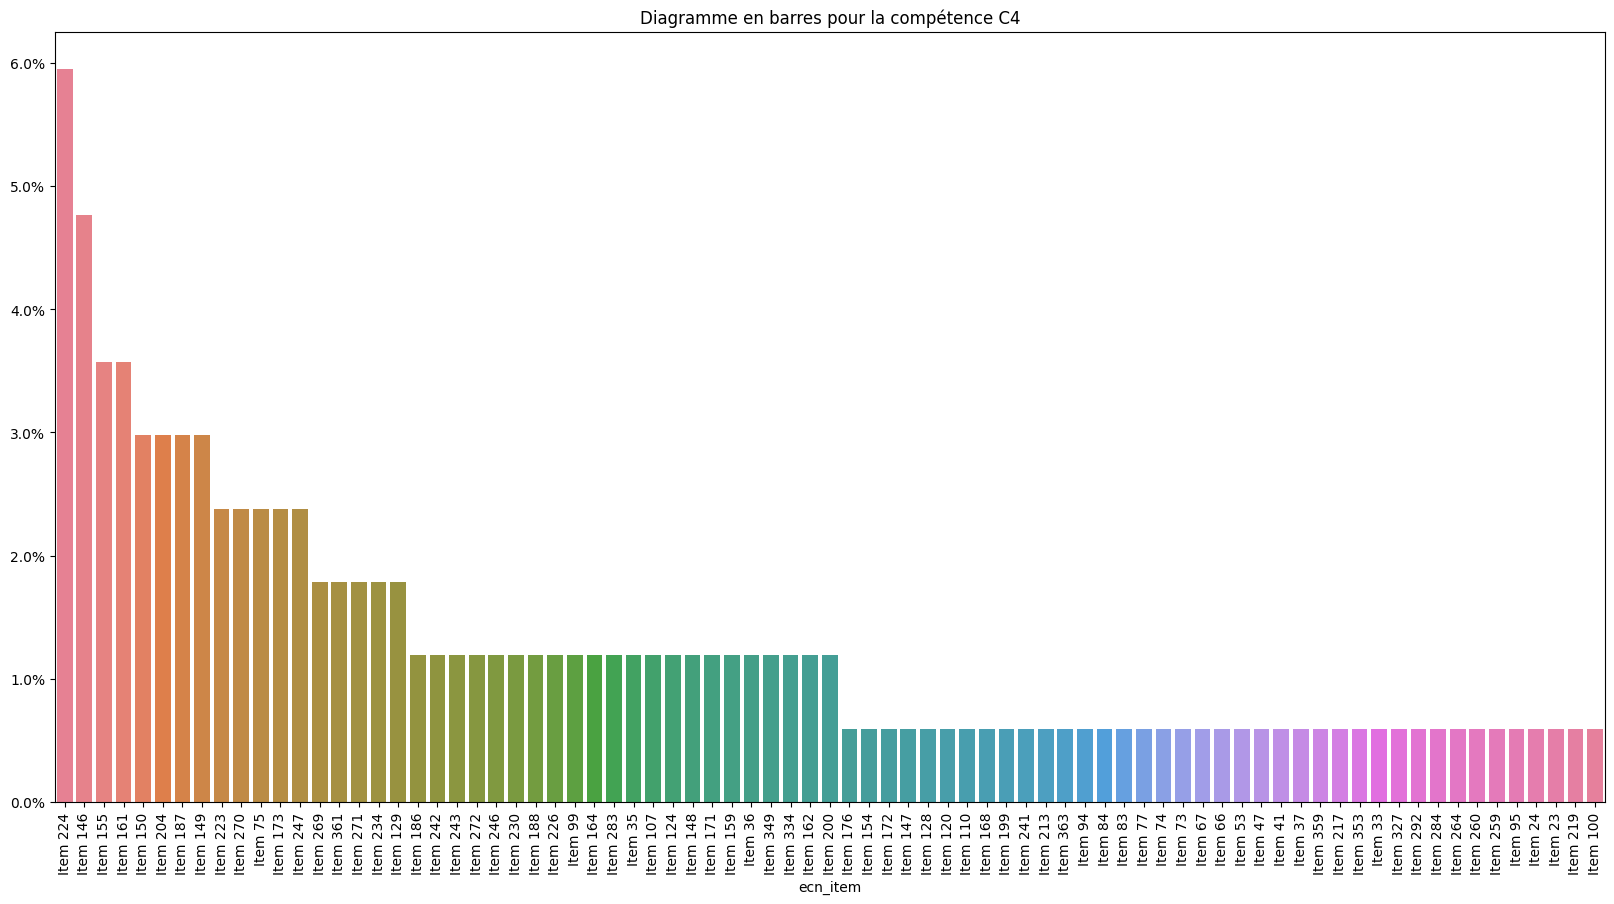

C4
ecn_item  Item 224  Item 146  Item 155  Item 161  Item 150  Item 204  \
skill                                                                  
C4            10.0       8.0       6.0       6.0       5.0       5.0   

ecn_item  Item 187  Item 149  Item 223  Item 270  ...  Item 292  Item 284  \
skill                                             ...                       
C4             5.0       5.0       4.0       4.0  ...       1.0       1.0   

ecn_item  Item 264  Item 260  Item 259  Item 95  Item 24  Item 23  Item 219  \
skill                                                                         
C4             1.0       1.0       1.0      1.0      1.0      1.0       1.0   

ecn_item  Item 100  
skill               
C4             1.0  

[1 rows x 79 columns]


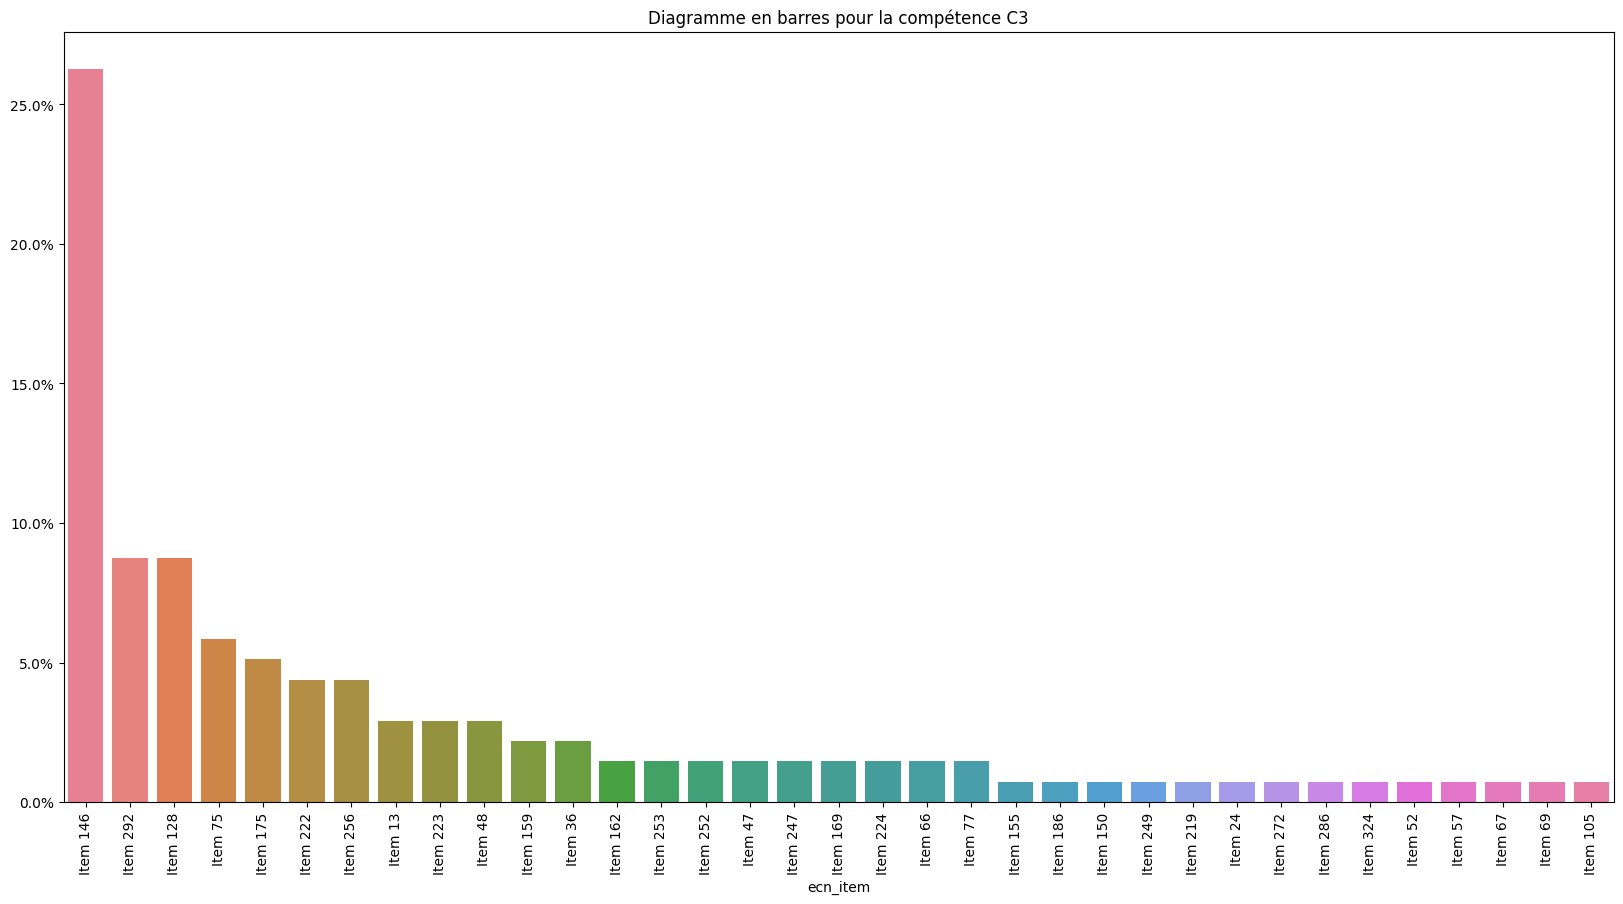

C3
ecn_item  Item 146  Item 292  Item 128  Item 75  Item 175  Item 222  Item 256  \
skill                                                                           
C3            36.0      12.0      12.0      8.0       7.0       6.0       6.0   

ecn_item  Item 13  Item 223  Item 48  ...  Item 219  Item 24  Item 272  \
skill                                 ...                                
C3            4.0       4.0      4.0  ...       1.0      1.0       1.0   

ecn_item  Item 286  Item 324  Item 52  Item 57  Item 67  Item 69  Item 105  
skill                                                                       
C3             1.0       1.0      1.0      1.0      1.0      1.0       1.0  

[1 rows x 35 columns]


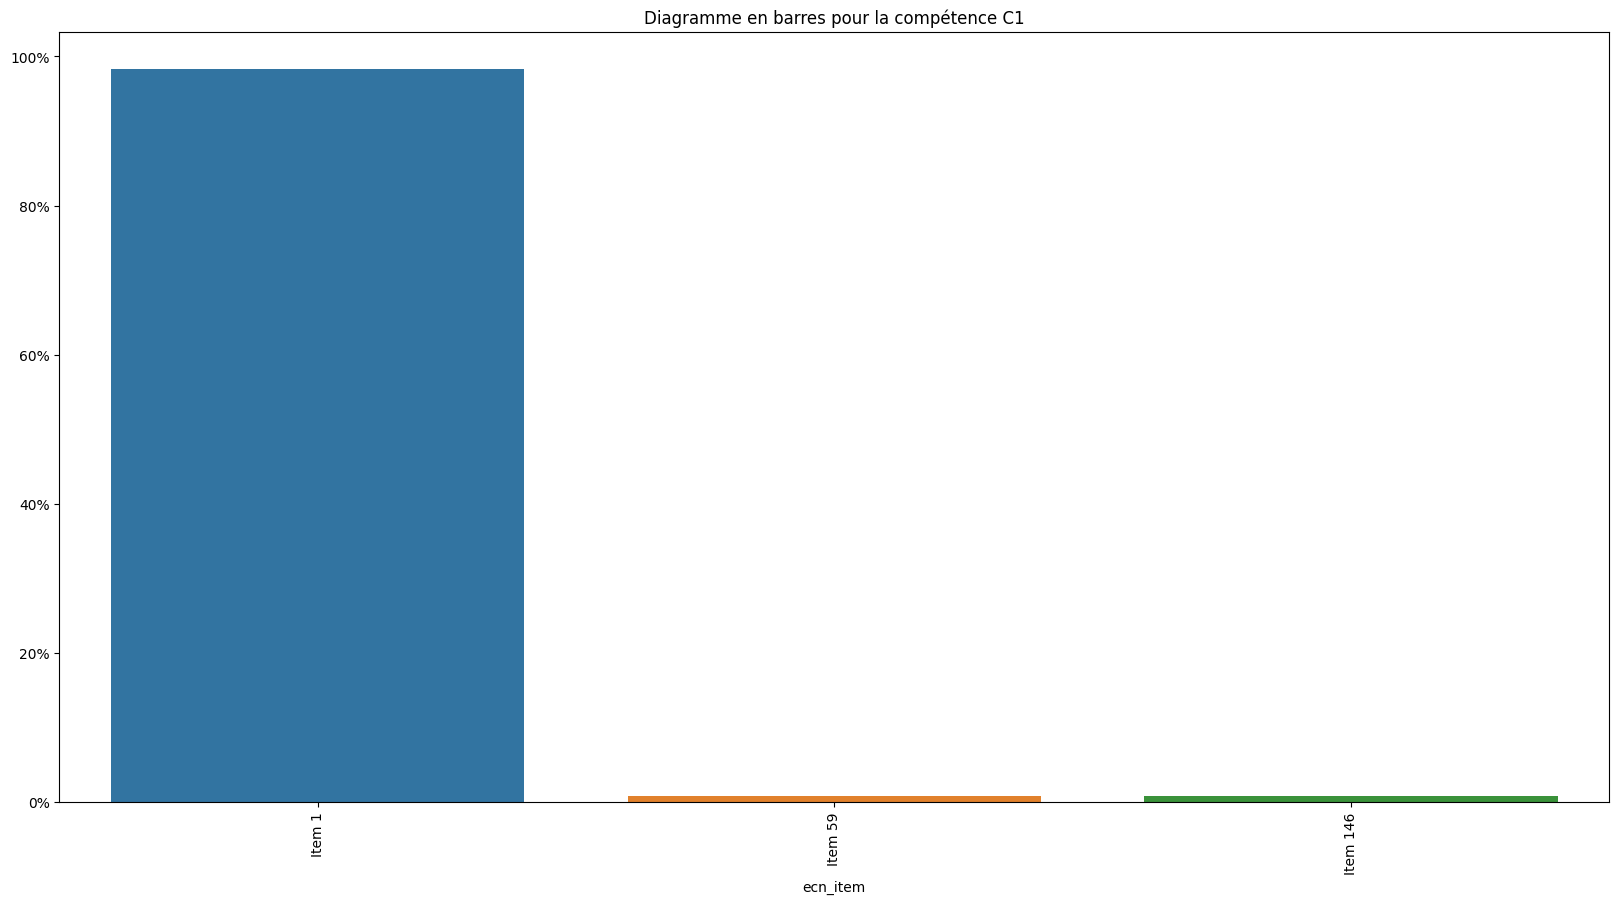

C1
ecn_item  Item 1  Item 59  Item 146
skill                              
C1         118.0      1.0       1.0


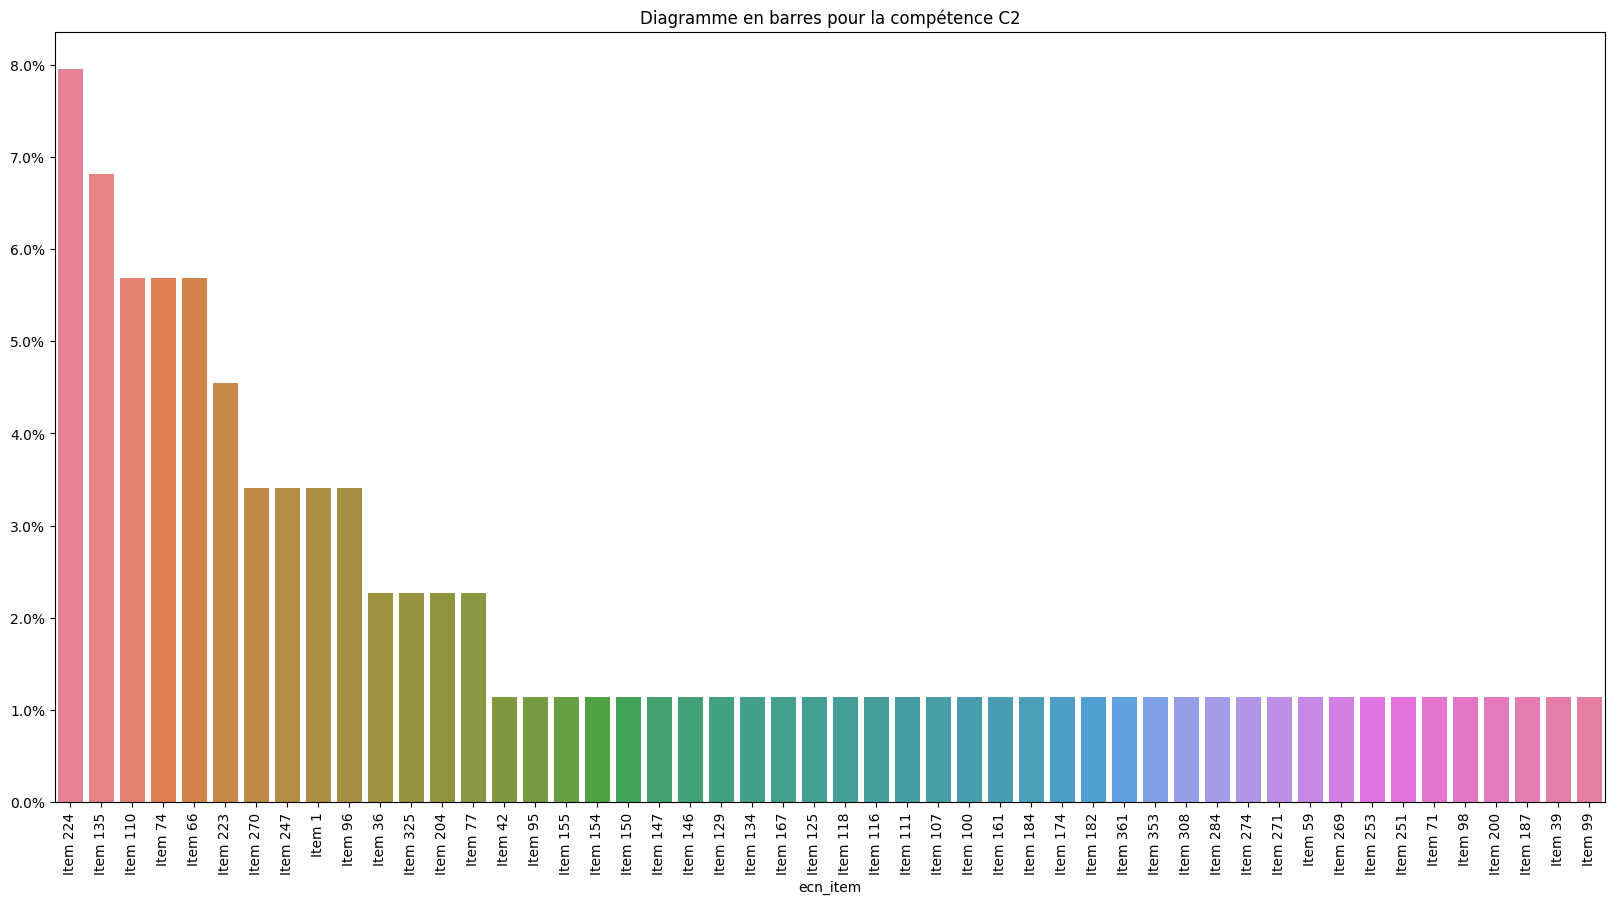

C2
ecn_item  Item 224  Item 135  Item 110  Item 74  Item 66  Item 223  Item 270  \
skill                                                                          
C2             7.0       6.0       5.0      5.0      5.0       4.0       3.0   

ecn_item  Item 247  Item 1  Item 96  ...  Item 59  Item 269  Item 253  \
skill                                ...                                
C2             3.0     3.0      3.0  ...      1.0       1.0       1.0   

ecn_item  Item 251  Item 71  Item 98  Item 200  Item 187  Item 39  Item 99  
skill                                                                       
C2             1.0      1.0      1.0       1.0       1.0      1.0      1.0  

[1 rows x 50 columns]


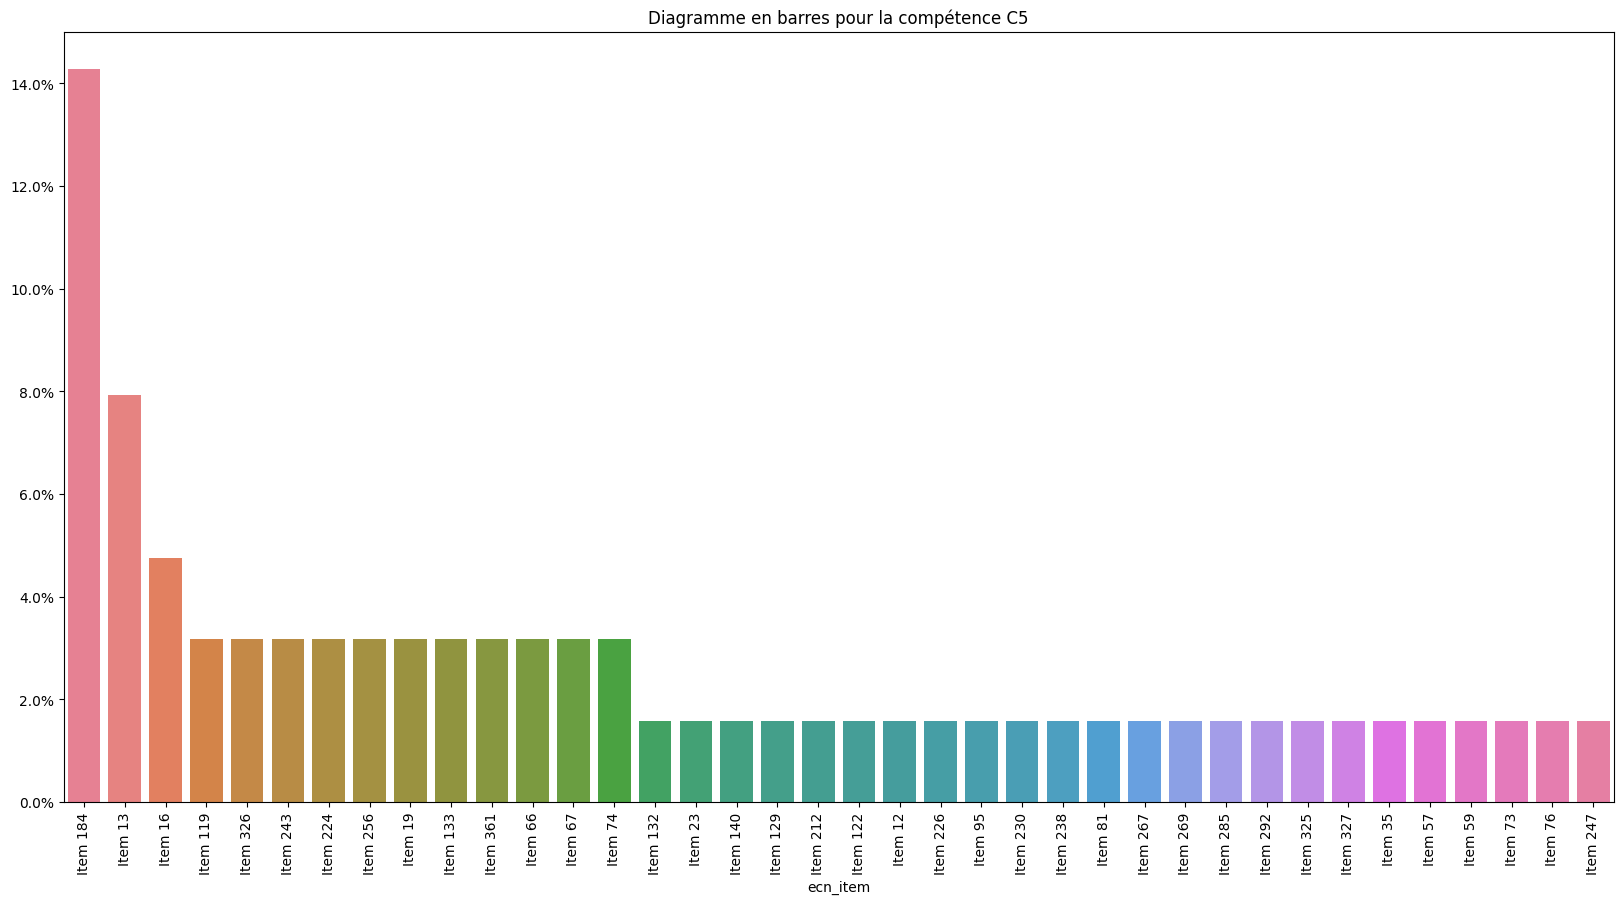

C5
ecn_item  Item 184  Item 13  Item 16  Item 119  Item 326  Item 243  Item 224  \
skill                                                                          
C5             9.0      5.0      3.0       2.0       2.0       2.0       2.0   

ecn_item  Item 256  Item 19  Item 133  ...  Item 285  Item 292  Item 325  \
skill                                  ...                                 
C5             2.0      2.0       2.0  ...       1.0       1.0       1.0   

ecn_item  Item 327  Item 35  Item 57  Item 59  Item 73  Item 76  Item 247  
skill                                                                      
C5             1.0      1.0      1.0      1.0      1.0      1.0       1.0  

[1 rows x 38 columns]


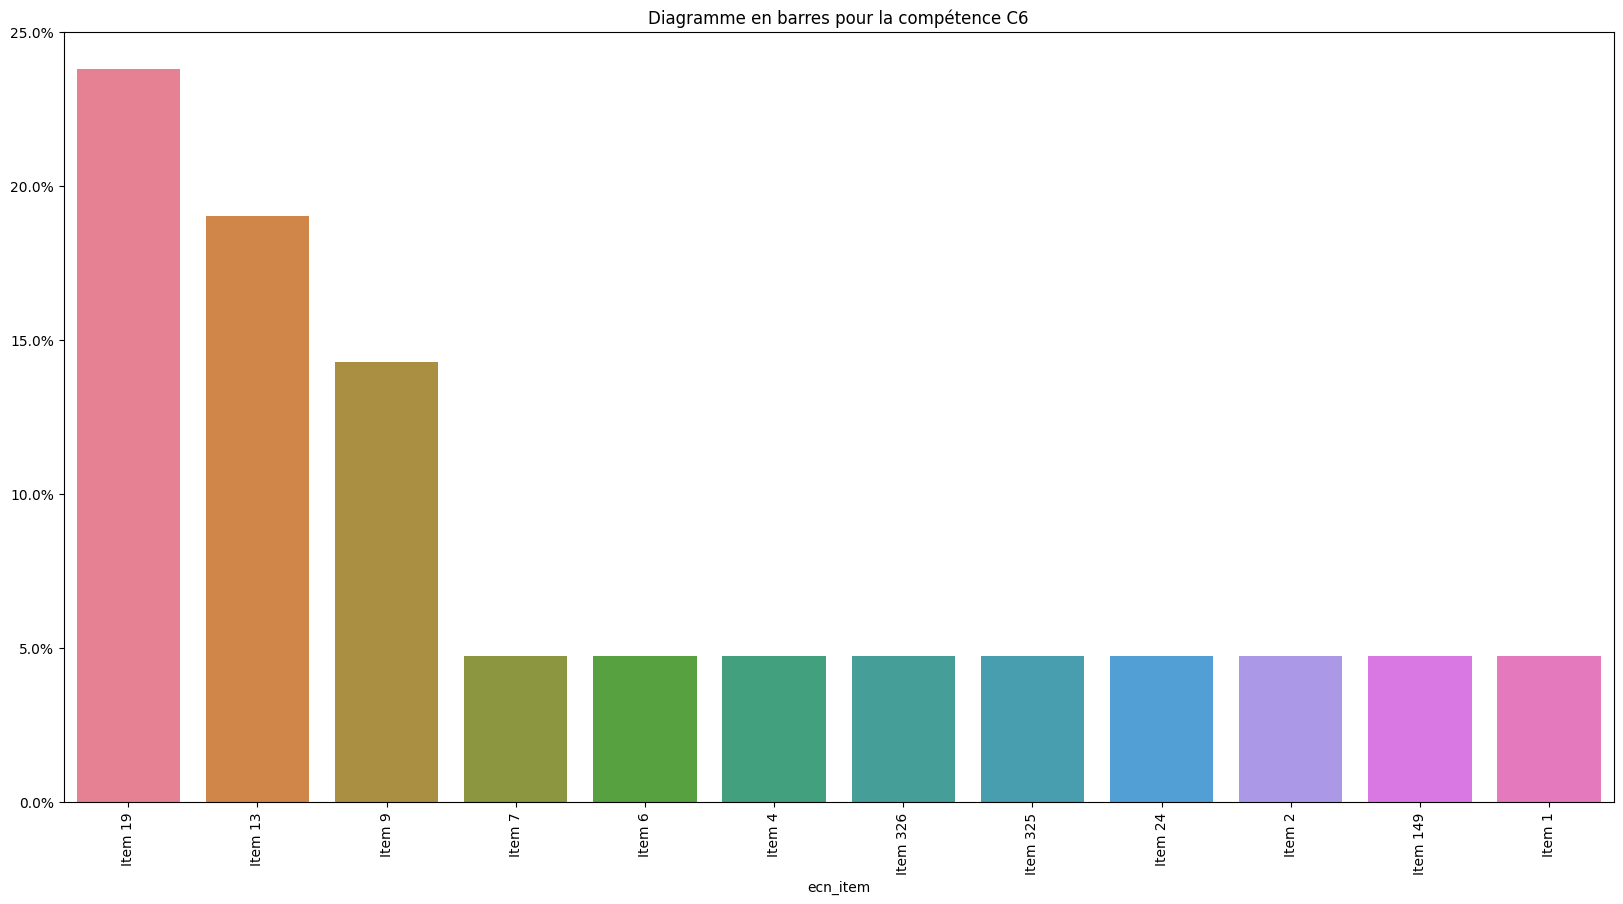

C6
ecn_item  Item 19  Item 13  Item 9  Item 7  Item 6  Item 4  Item 326  \
skill                                                                  
C6            5.0      4.0     3.0     1.0     1.0     1.0       1.0   

ecn_item  Item 325  Item 24  Item 2  Item 149  Item 1  
skill                                                  
C6             1.0      1.0     1.0       1.0     1.0  


In [2]:
data_gp = pd.pivot_table(data, values="record_id", index="skill", columns="ecn_item", aggfunc="count", margins=True)
data_gp = data_gp.sort_values(by=['All'], ascending=False)
data_gp = data_gp.drop(columns='All')
display(data_gp)

for i in range(1,data_gp.shape[0]):
    row = data_gp.iloc[[i]]
    row = row.dropna(axis=1, how='all')
    row = row[row.columns[row.iloc[0].argsort()[::-1]]]

    rowProp = row.copy()
    rowProp[row.columns] = row[row.columns].div(row[row.columns].sum(axis=1), axis=0)

    plt.figure(figsize=(20, 10))
    sns.barplot(rowProp)
    plt.xticks(rotation=90)
    plt.title(f"Diagramme en barres pour la compétence {data_gp.index[i]}")
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
    plt.show()  
    print(data_gp.index[i])
    print(row)

### Diagrammes en barre décrivant la proportion de compétence dans chaque item. 

Les différents Item sont présentées par ordre décroissant. 

skill        C1    C2     C3     C4    C5    C6
ecn_item                                       
All       120.0  88.0  137.0  168.0  63.0  21.0
Item 1    118.0   3.0    NaN    NaN   NaN   1.0
Item 146    1.0   1.0   36.0    8.0   NaN   NaN
Item 224    NaN   7.0    2.0   10.0   2.0   NaN
Item 292    NaN   NaN   12.0    1.0   1.0   NaN
...         ...   ...    ...    ...   ...   ...
Item 241    NaN   NaN    NaN    1.0   NaN   NaN
Item 363    NaN   NaN    NaN    1.0   NaN   NaN
Item 37     NaN   NaN    NaN    1.0   NaN   NaN
Item 39     NaN   1.0    NaN    NaN   NaN   NaN
Item 105    NaN   NaN    1.0    NaN   NaN   NaN

[136 rows x 6 columns]

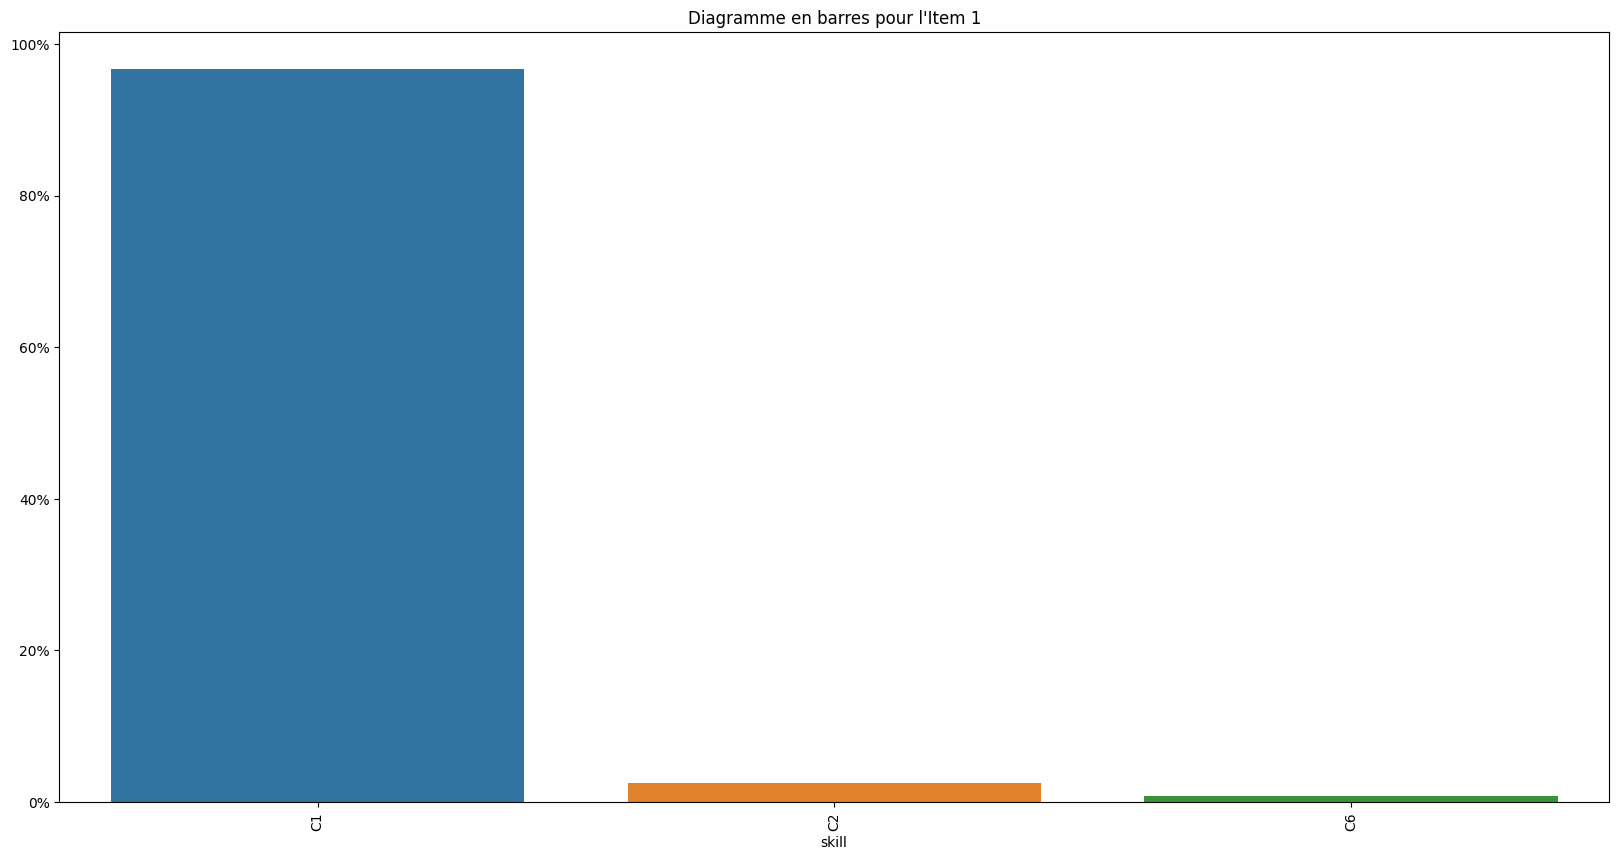

Item 1
skill        C1   C2   C6
ecn_item                 
Item 1    118.0  3.0  1.0


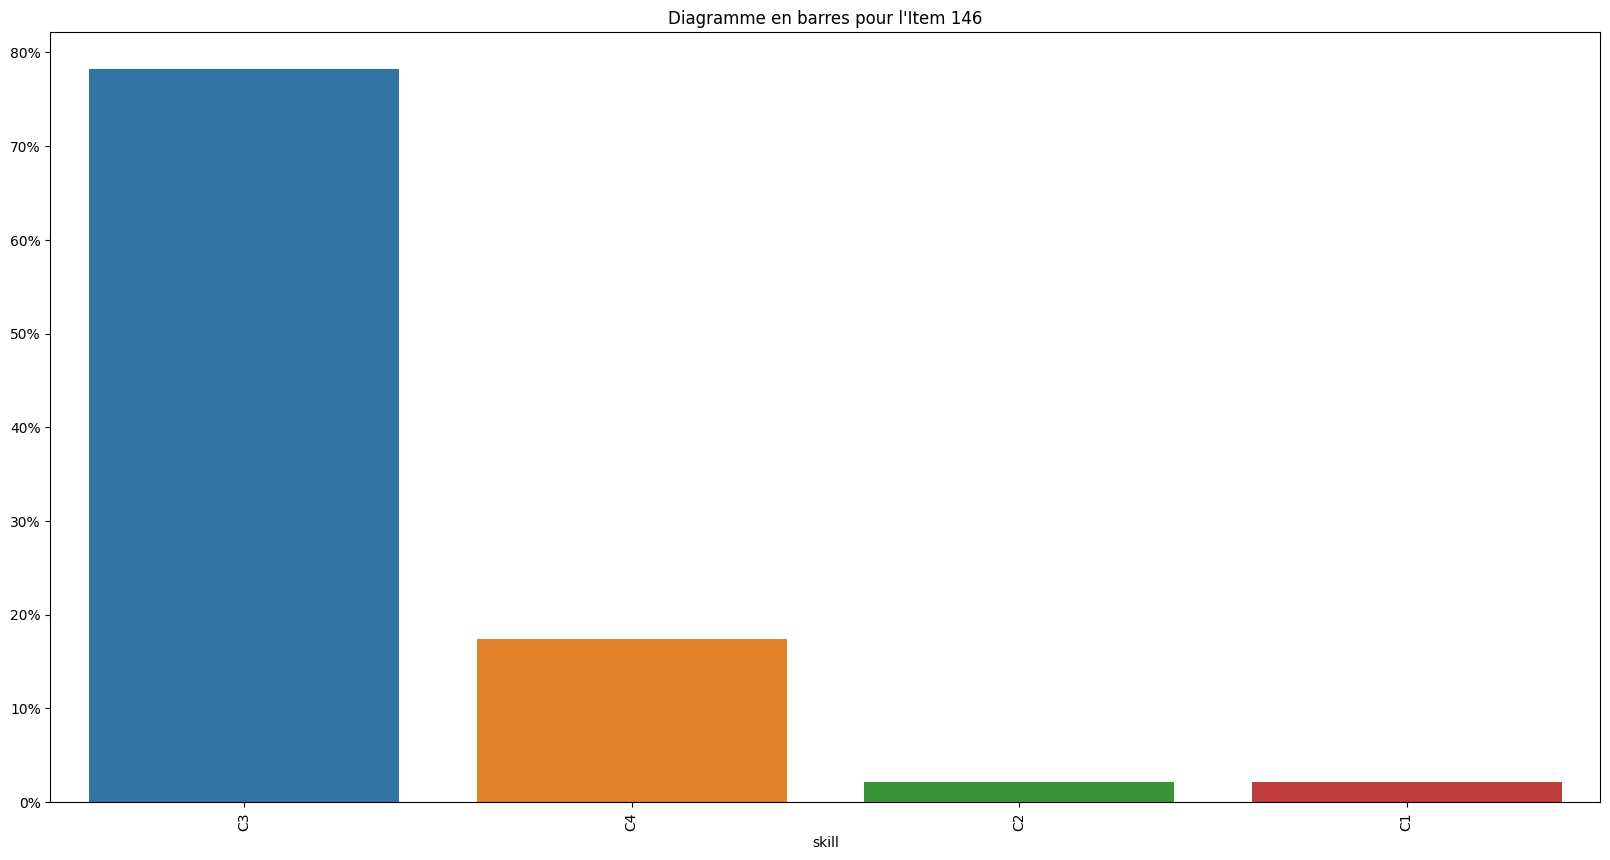

Item 146
skill       C3   C4   C2   C1
ecn_item                     
Item 146  36.0  8.0  1.0  1.0


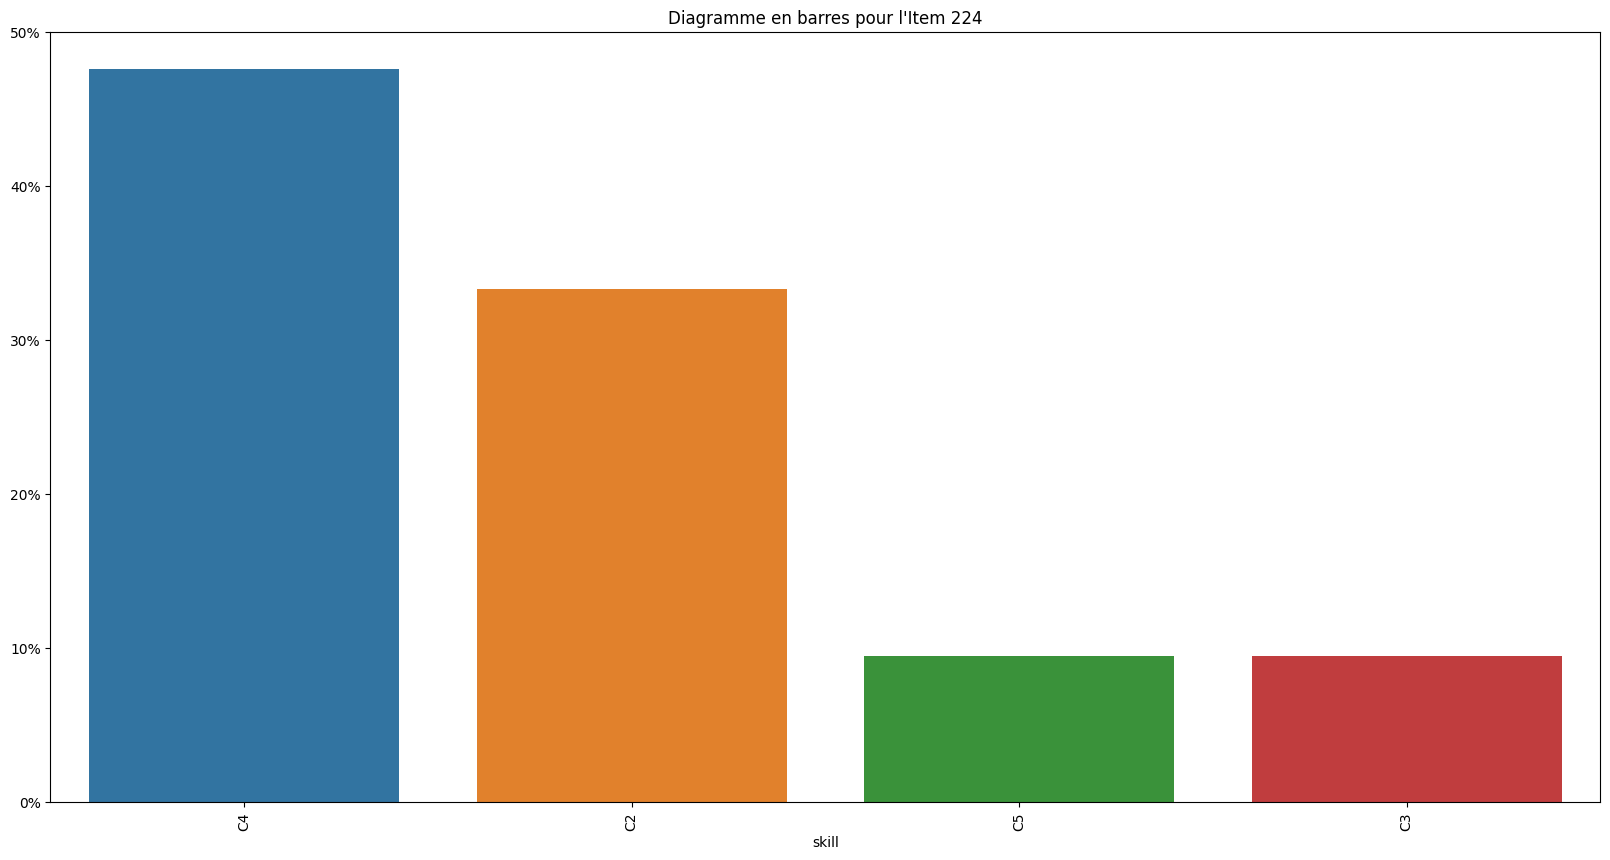

Item 224
skill       C4   C2   C5   C3
ecn_item                     
Item 224  10.0  7.0  2.0  2.0


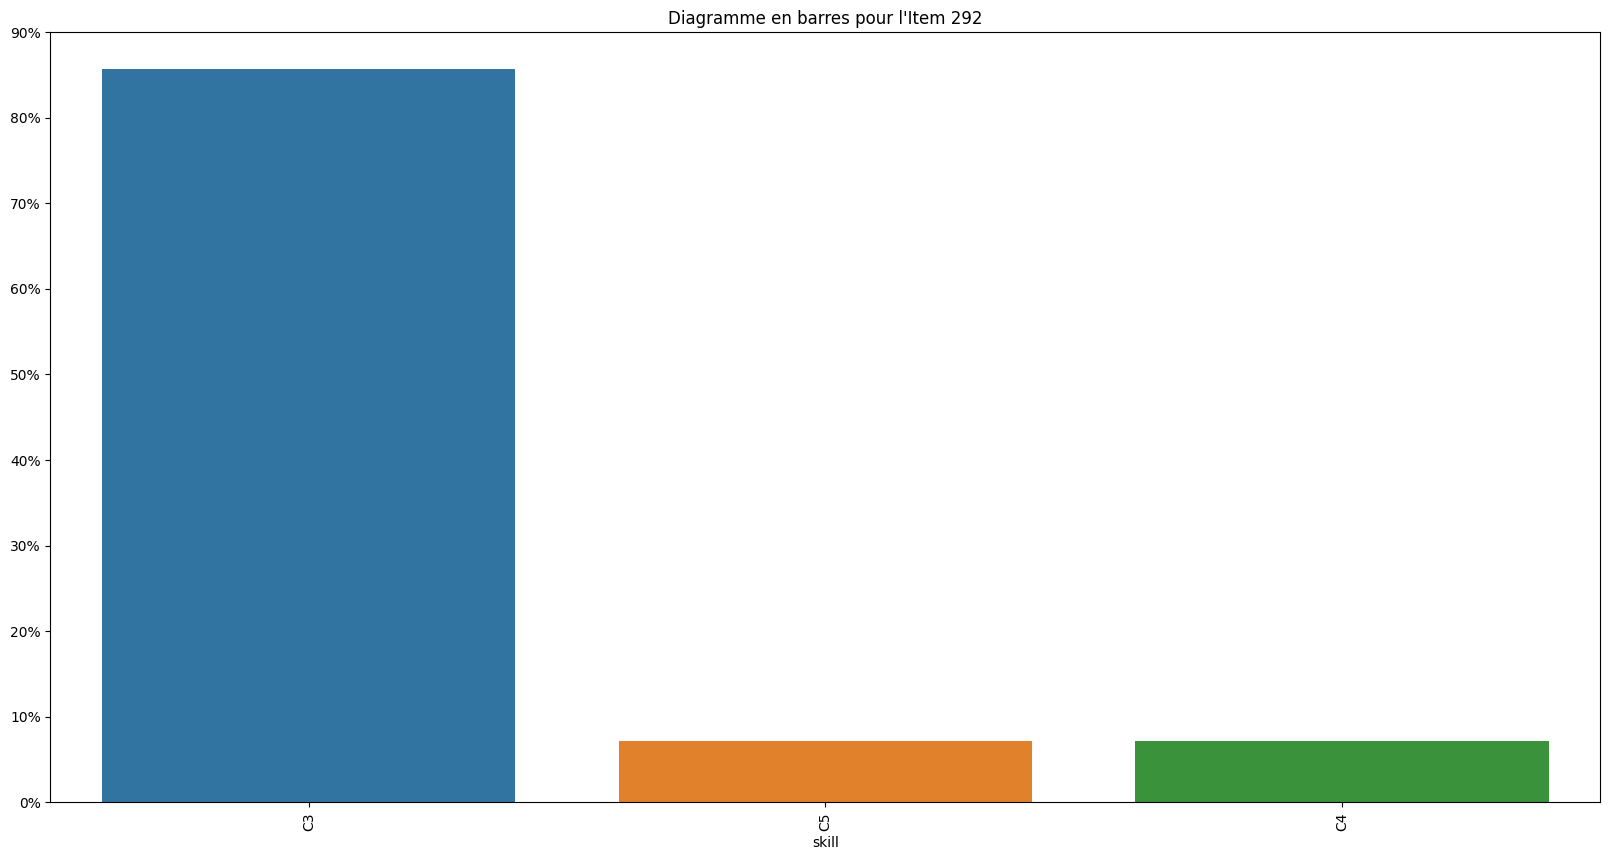

Item 292
skill       C3   C5   C4
ecn_item                
Item 292  12.0  1.0  1.0


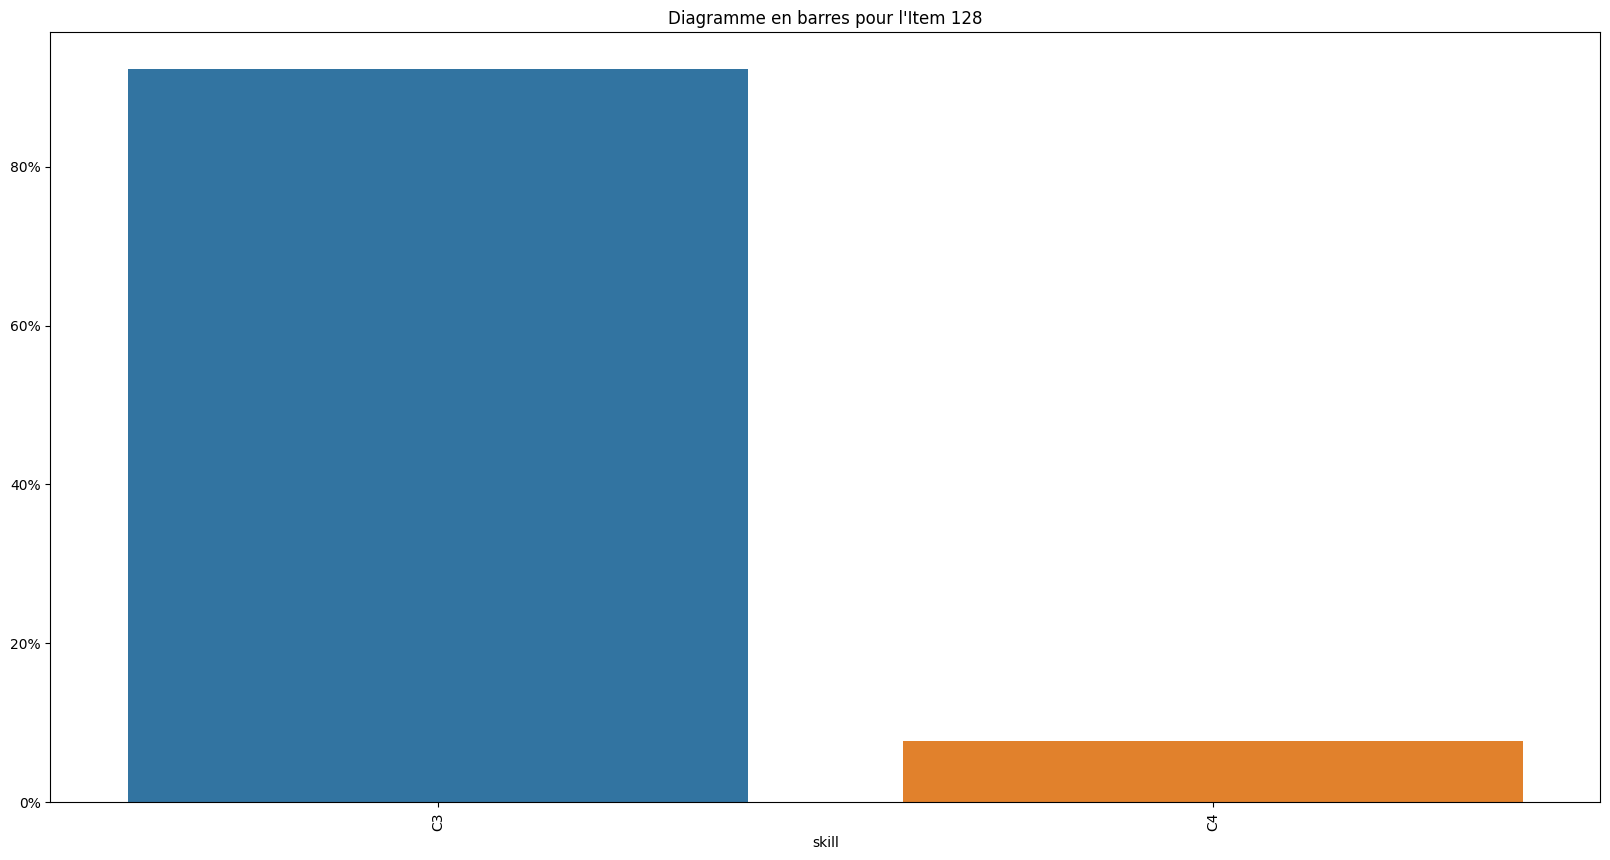

Item 128
skill       C3   C4
ecn_item           
Item 128  12.0  1.0


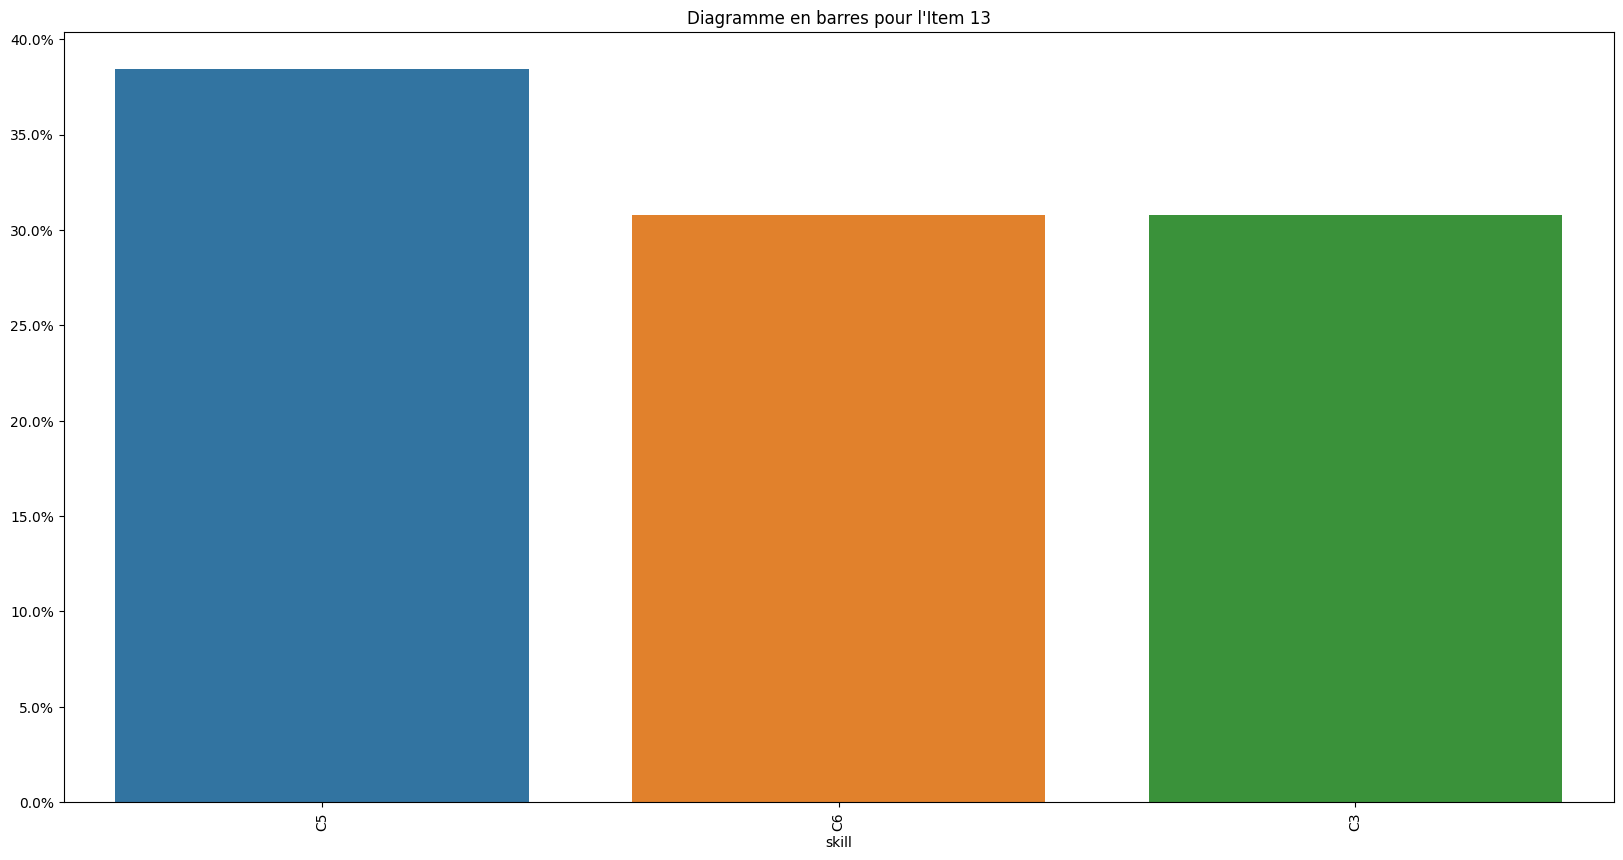

Item 13
skill      C5   C6   C3
ecn_item               
Item 13   5.0  4.0  4.0


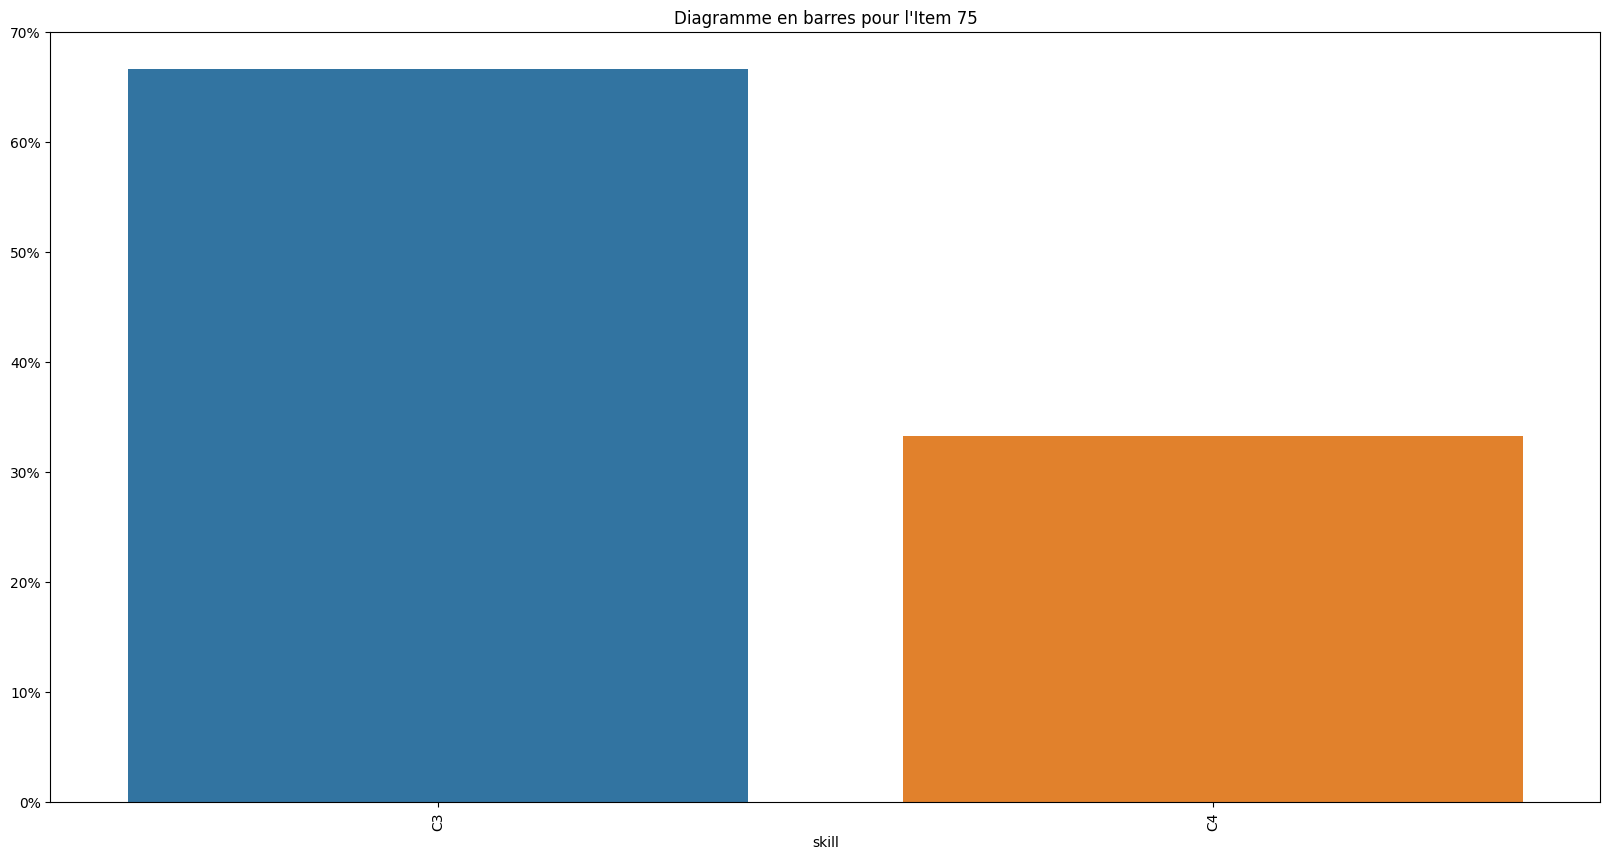

Item 75
skill      C3   C4
ecn_item          
Item 75   8.0  4.0


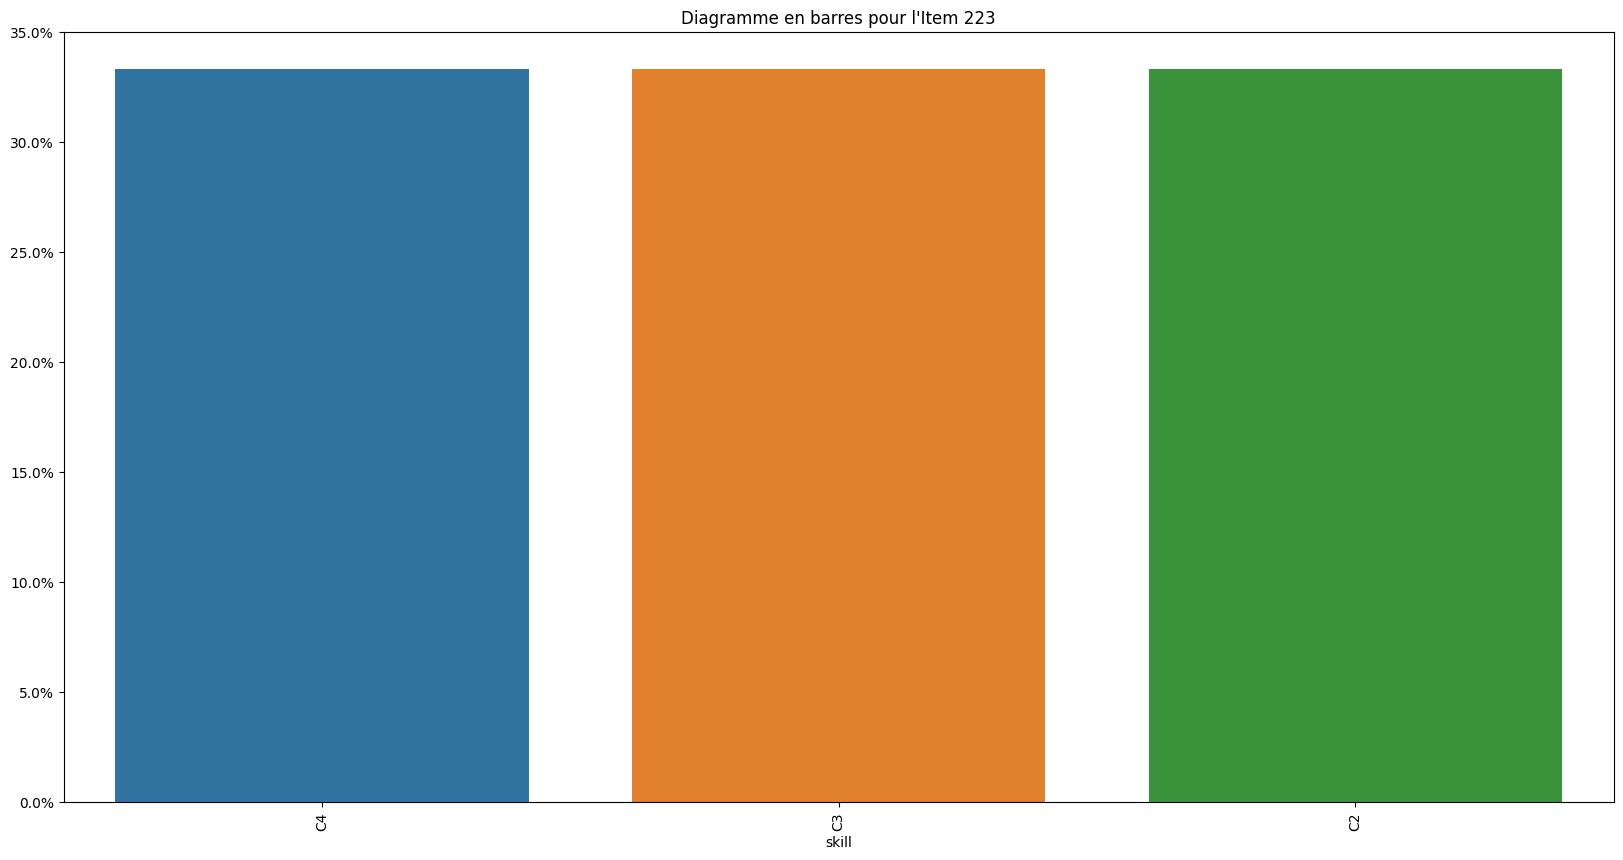

Item 223
skill      C4   C3   C2
ecn_item               
Item 223  4.0  4.0  4.0


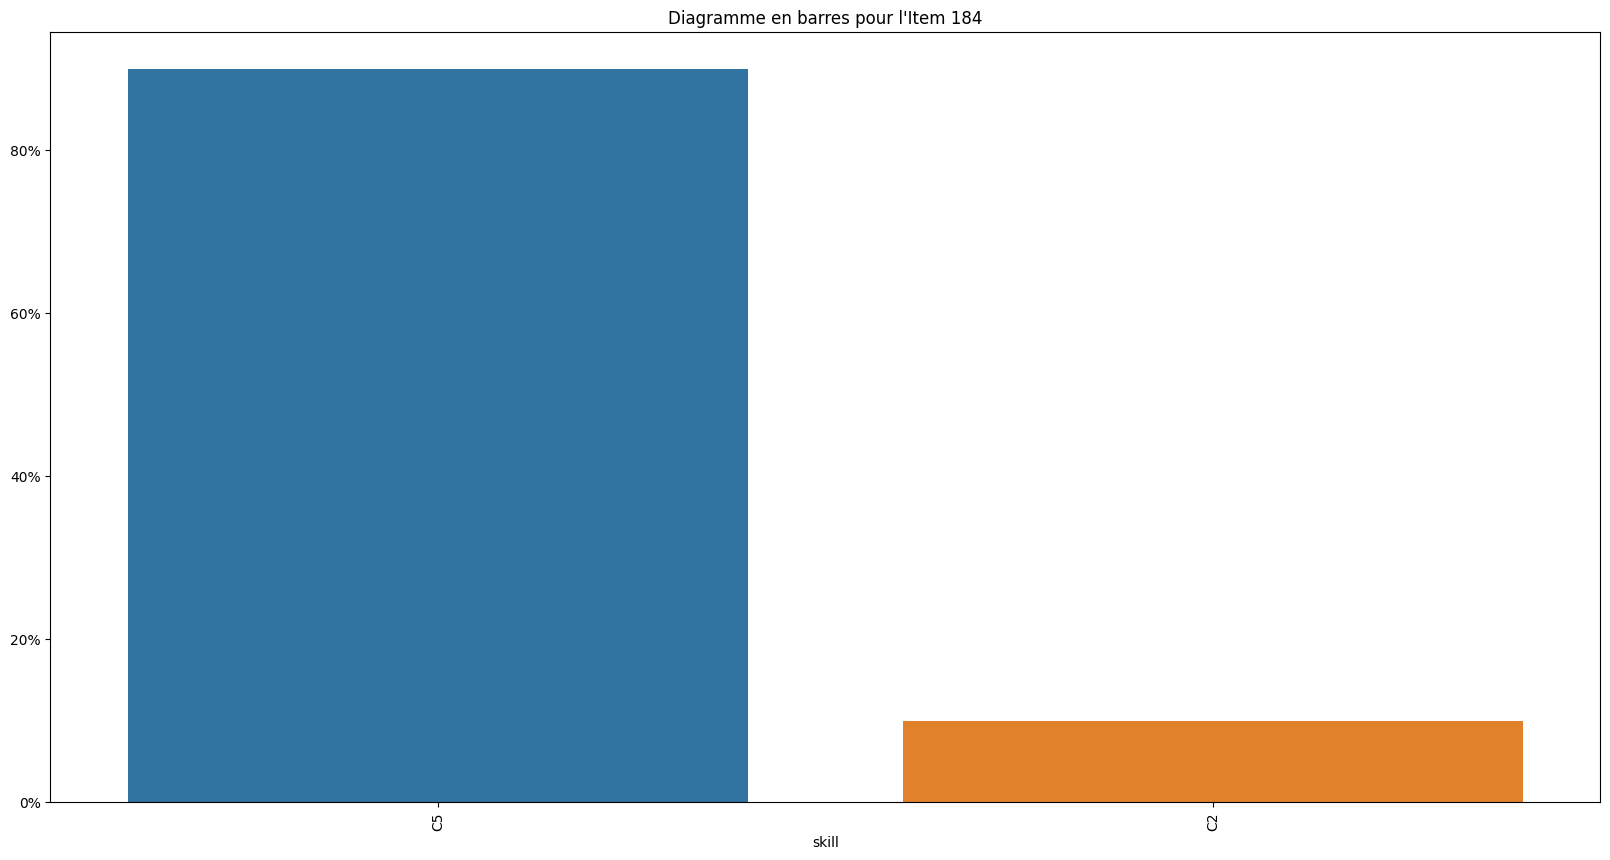

Item 184
skill      C5   C2
ecn_item          
Item 184  9.0  1.0


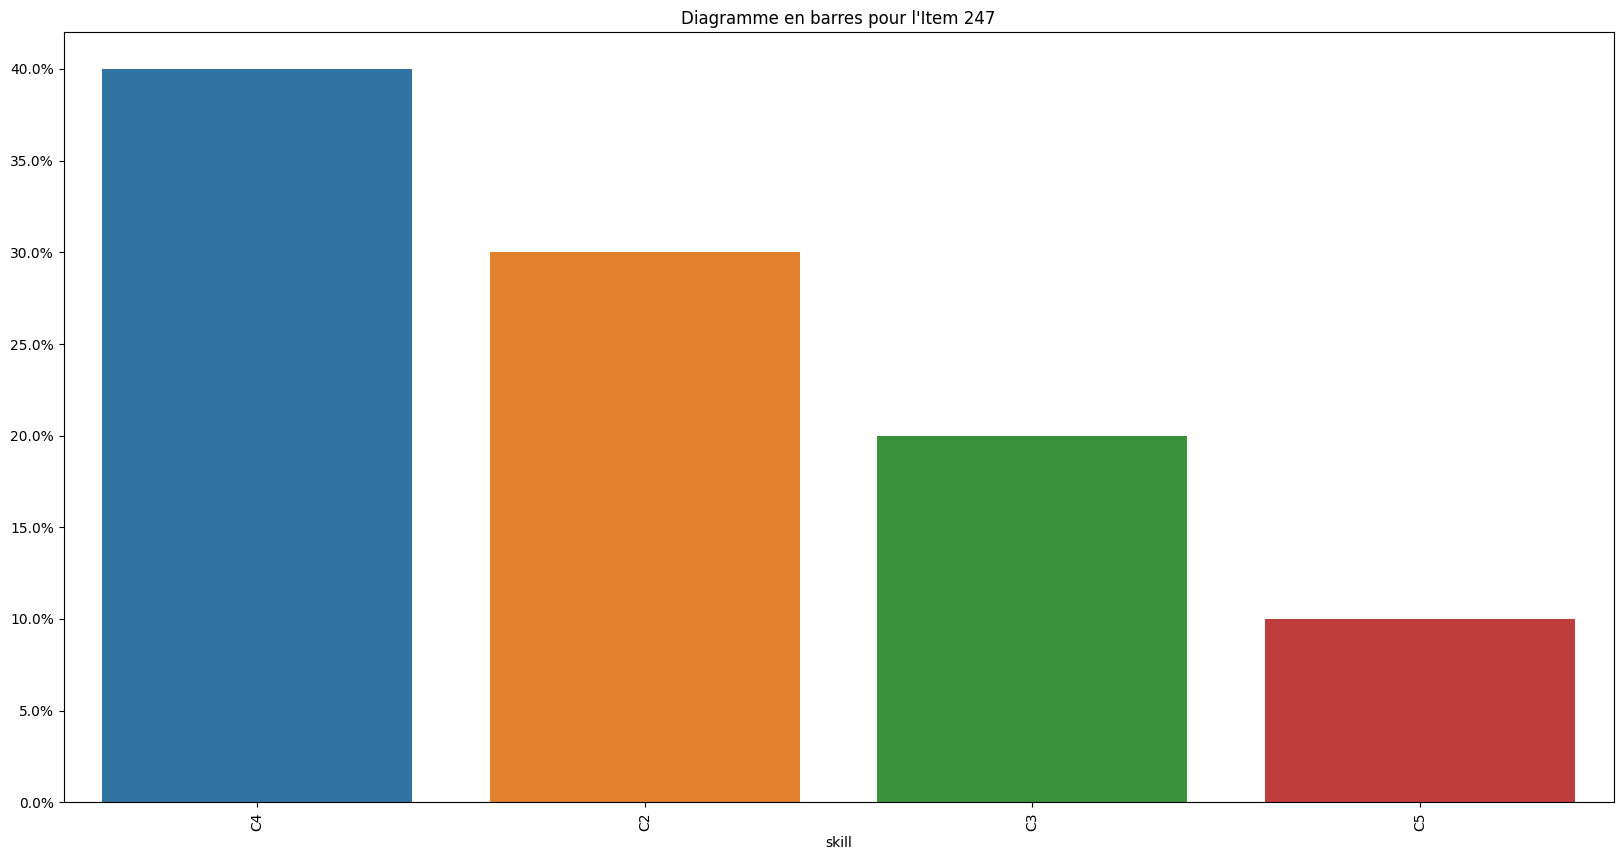

Item 247
skill      C4   C2   C3   C5
ecn_item                    
Item 247  4.0  3.0  2.0  1.0


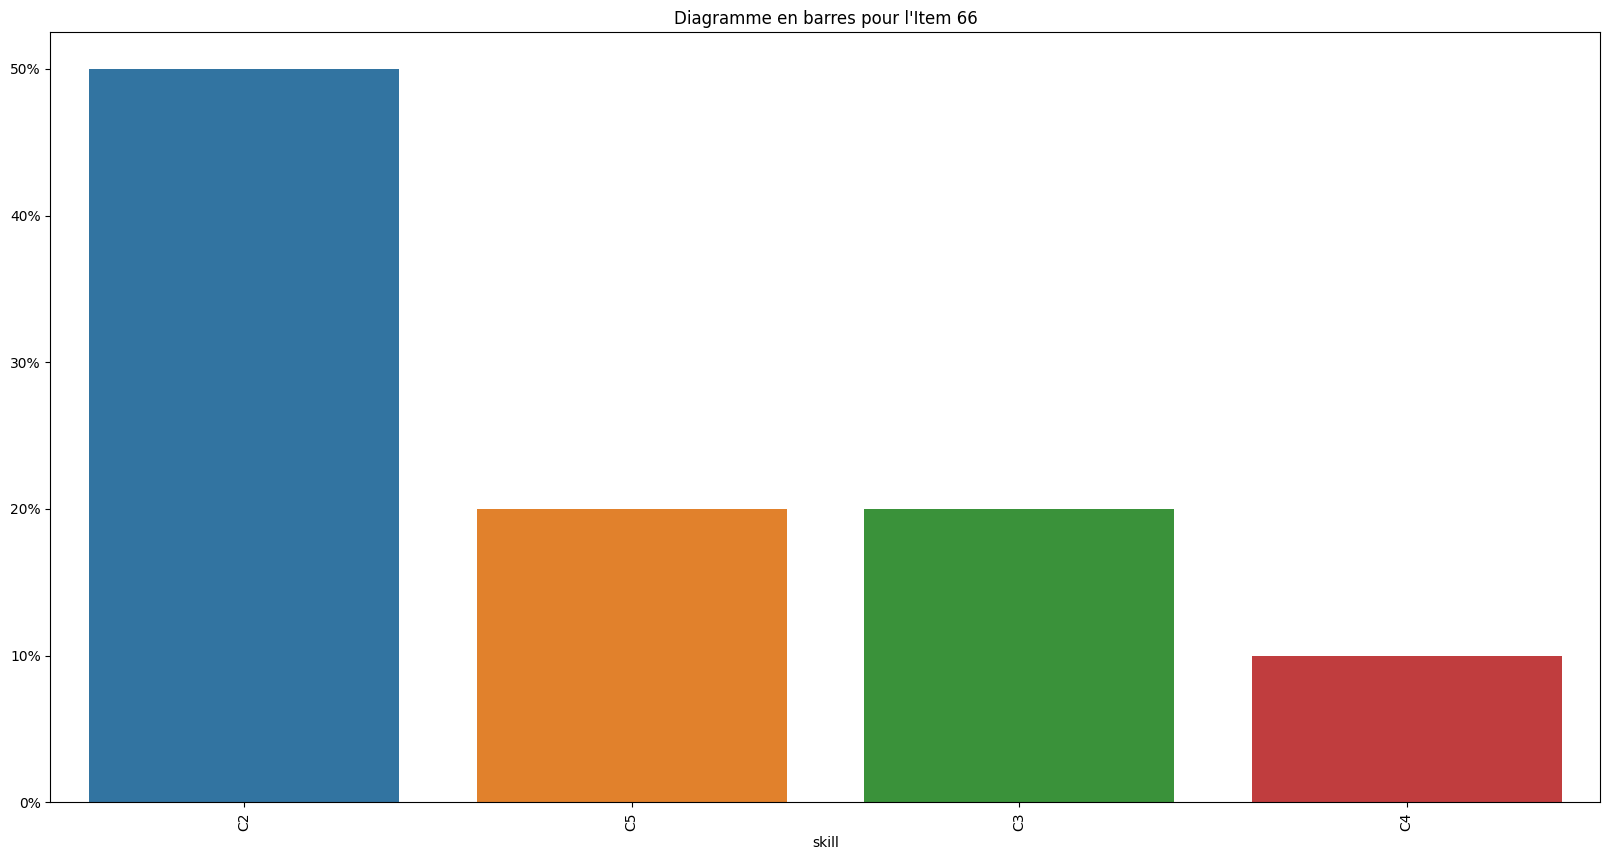

Item 66
skill      C2   C5   C3   C4
ecn_item                    
Item 66   5.0  2.0  2.0  1.0


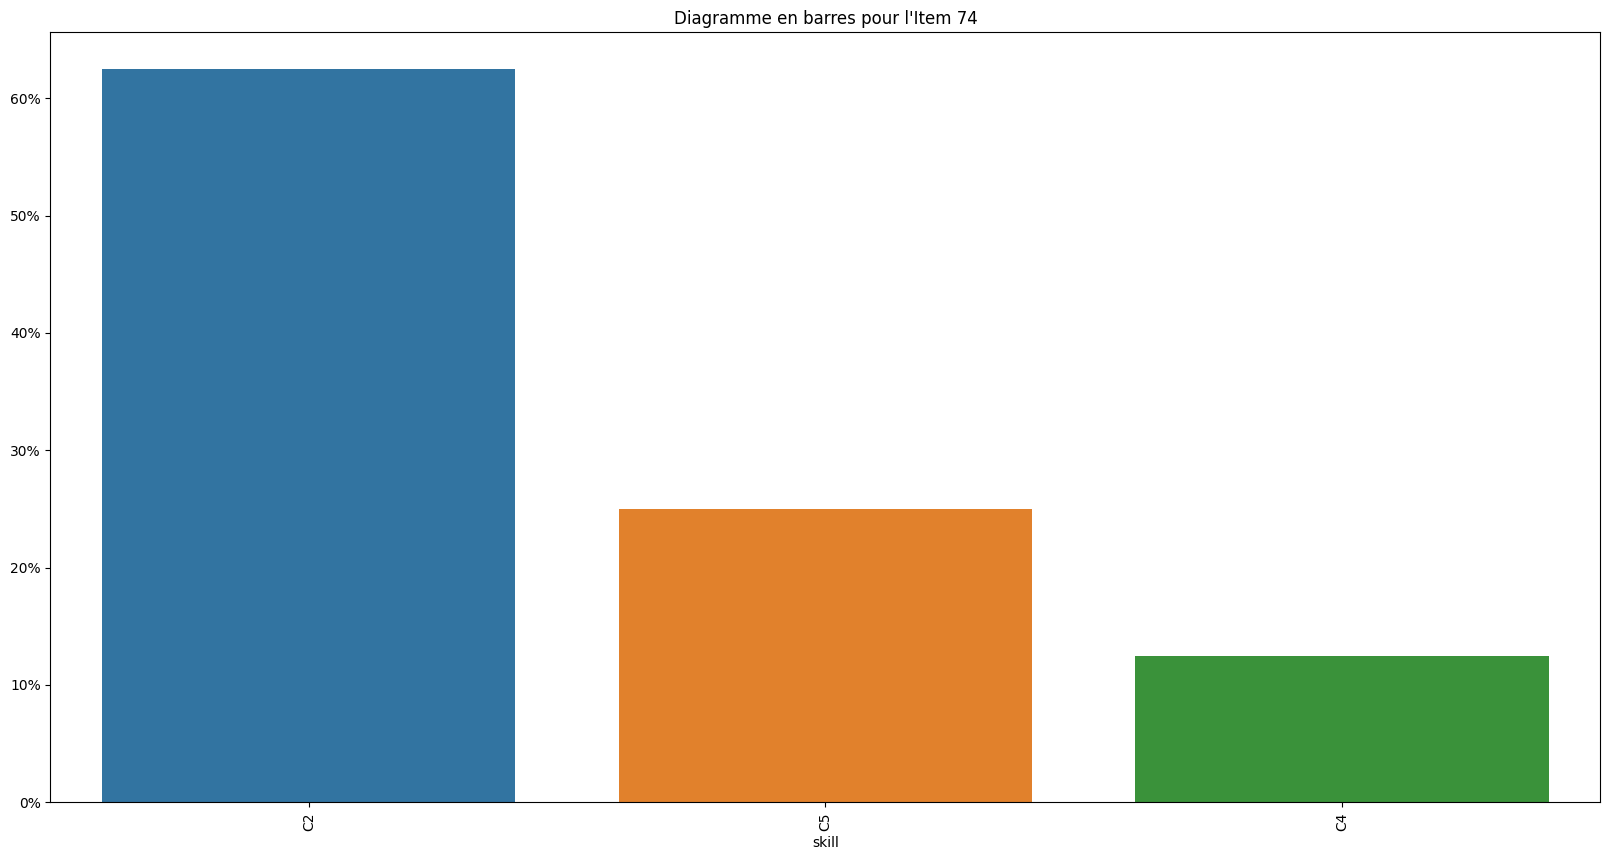

Item 74
skill      C2   C5   C4
ecn_item               
Item 74   5.0  2.0  1.0


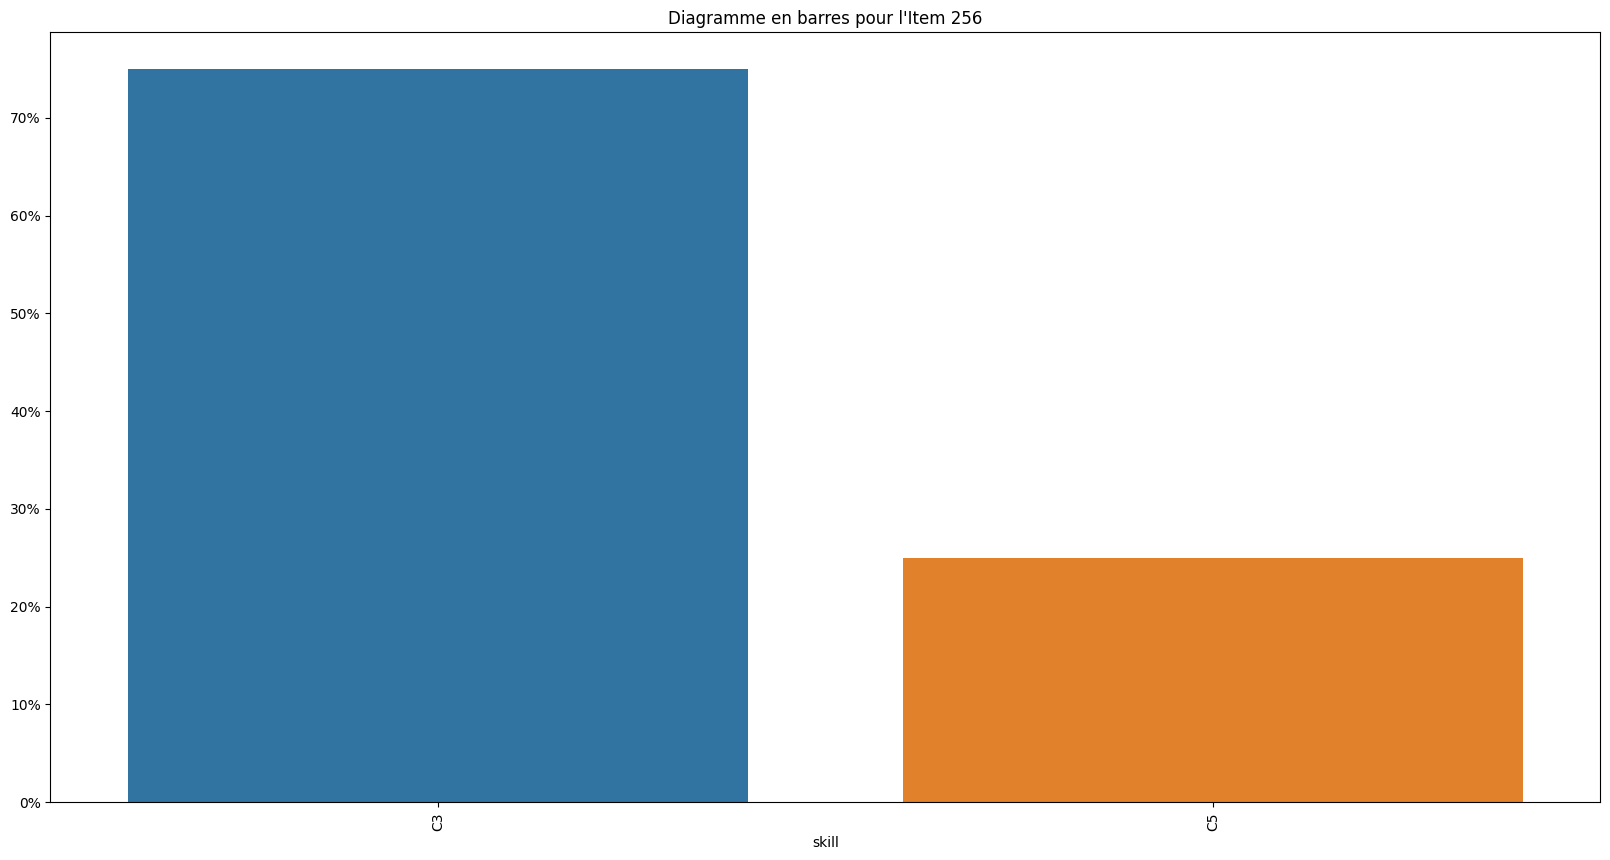

Item 256
skill      C3   C5
ecn_item          
Item 256  6.0  2.0


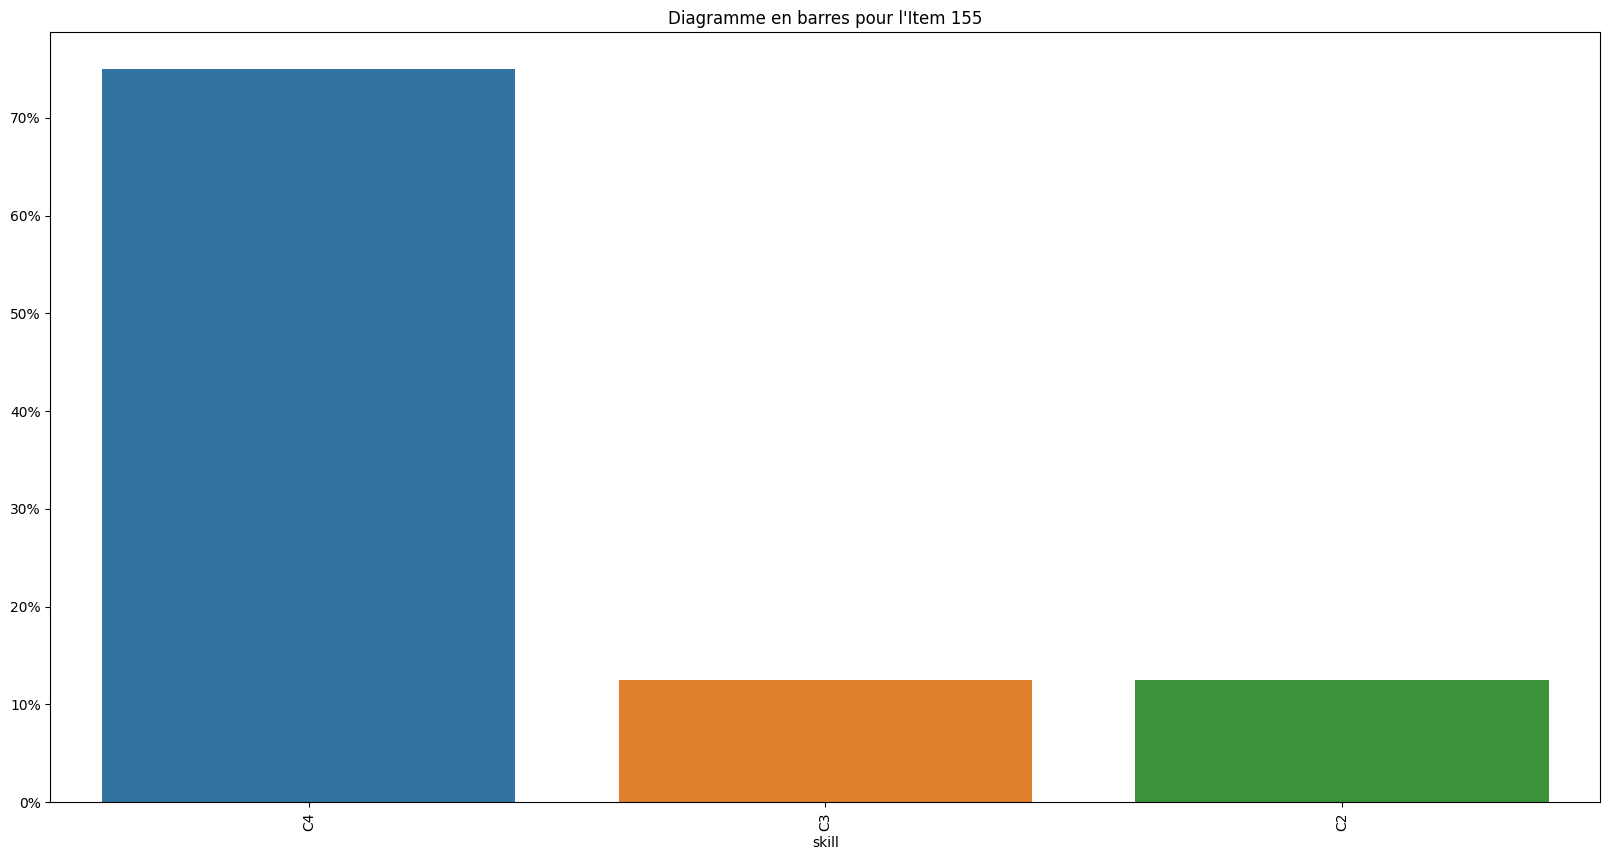

Item 155
skill      C4   C3   C2
ecn_item               
Item 155  6.0  1.0  1.0


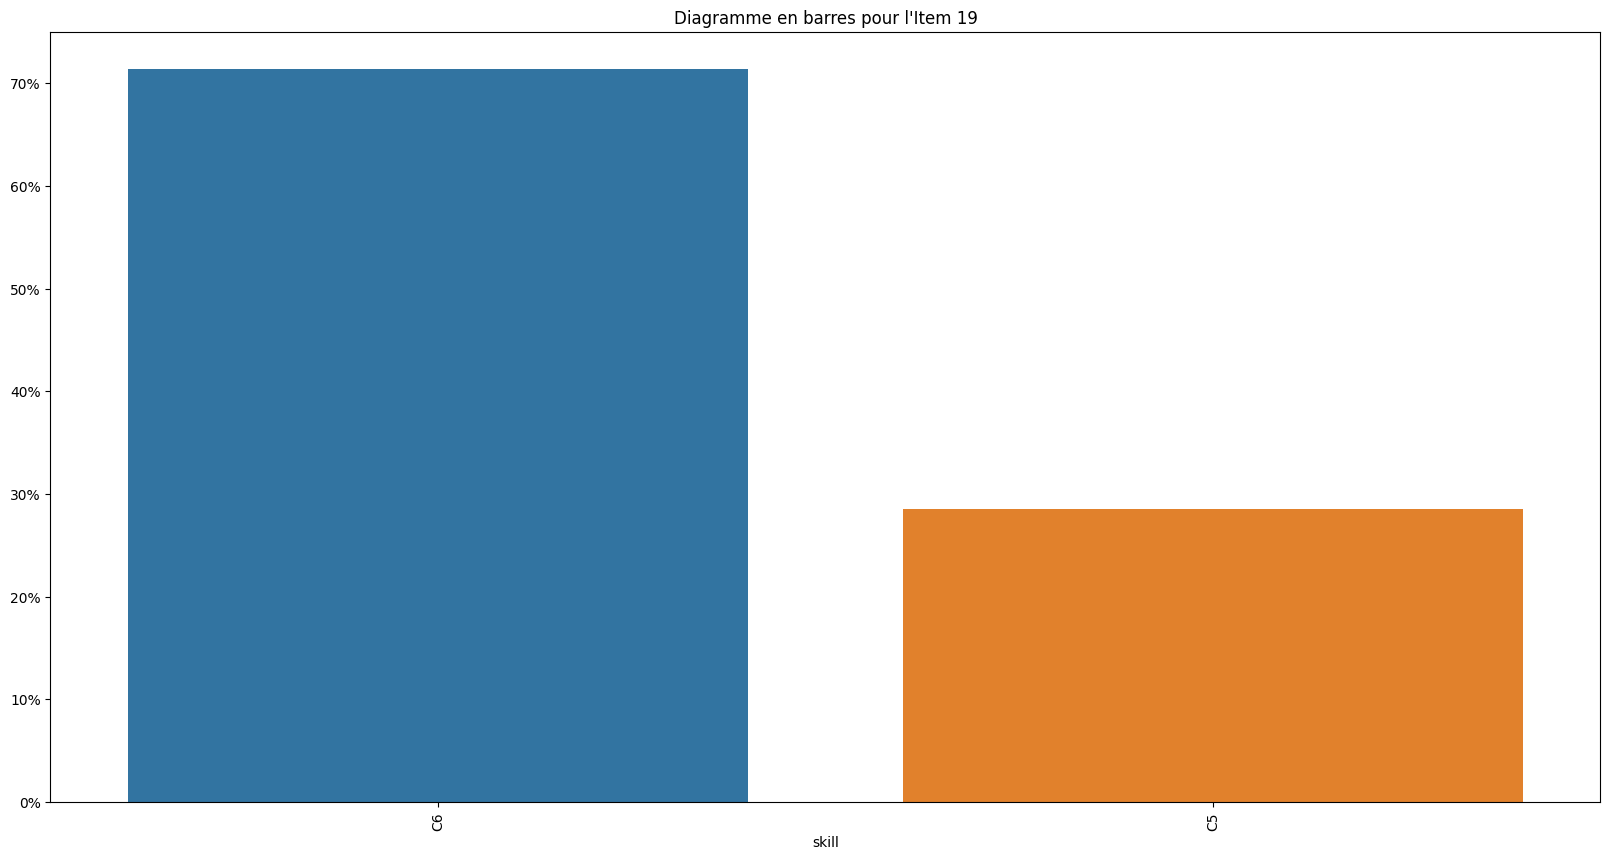

Item 19
skill      C6   C5
ecn_item          
Item 19   5.0  2.0


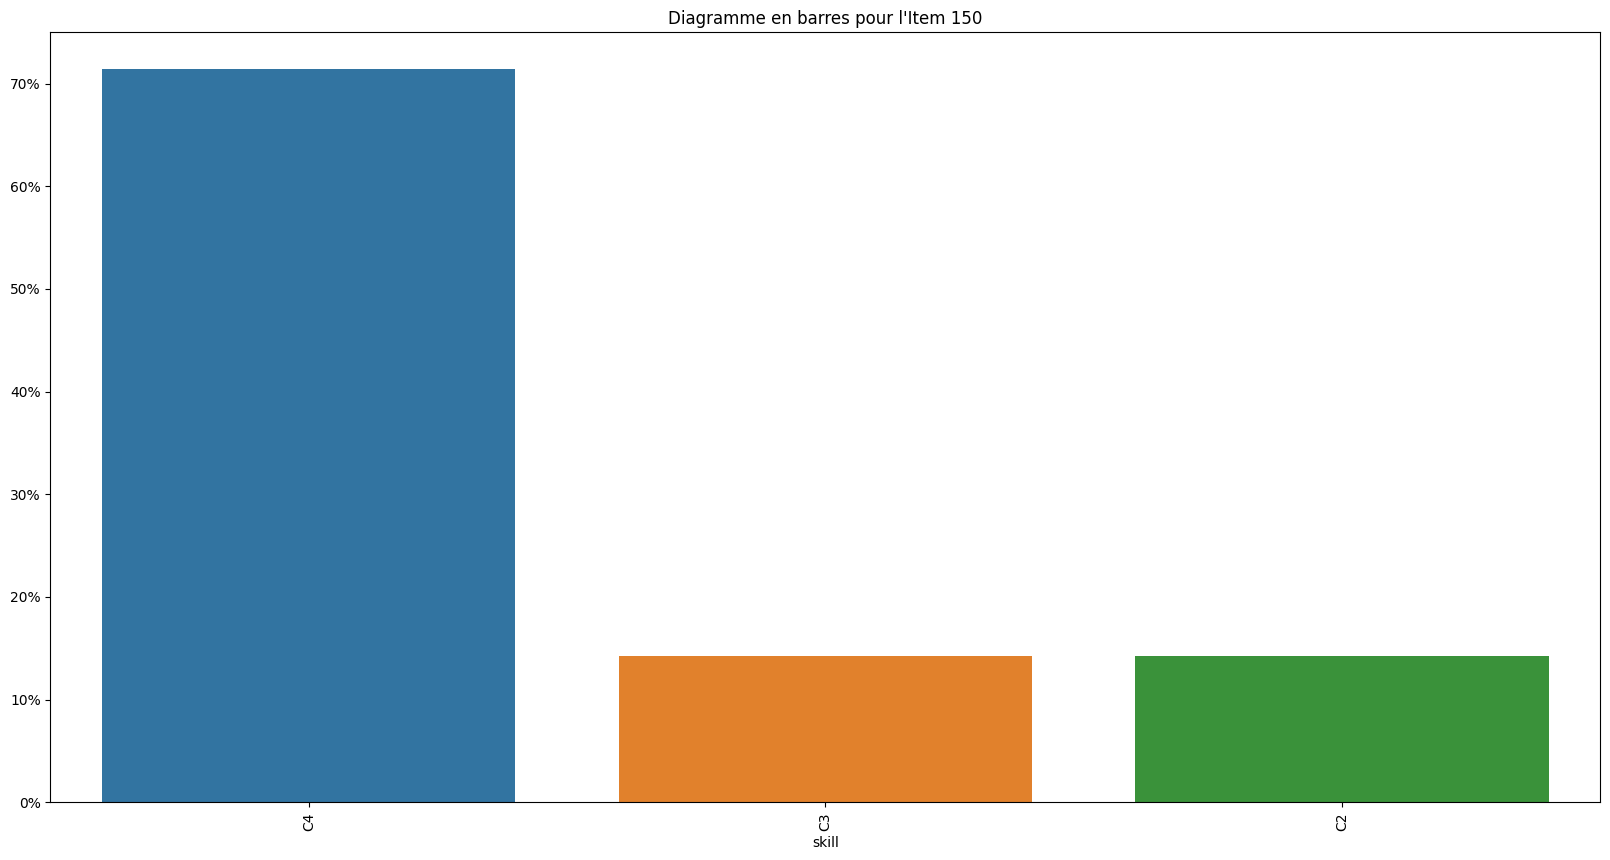

Item 150
skill      C4   C3   C2
ecn_item               
Item 150  5.0  1.0  1.0


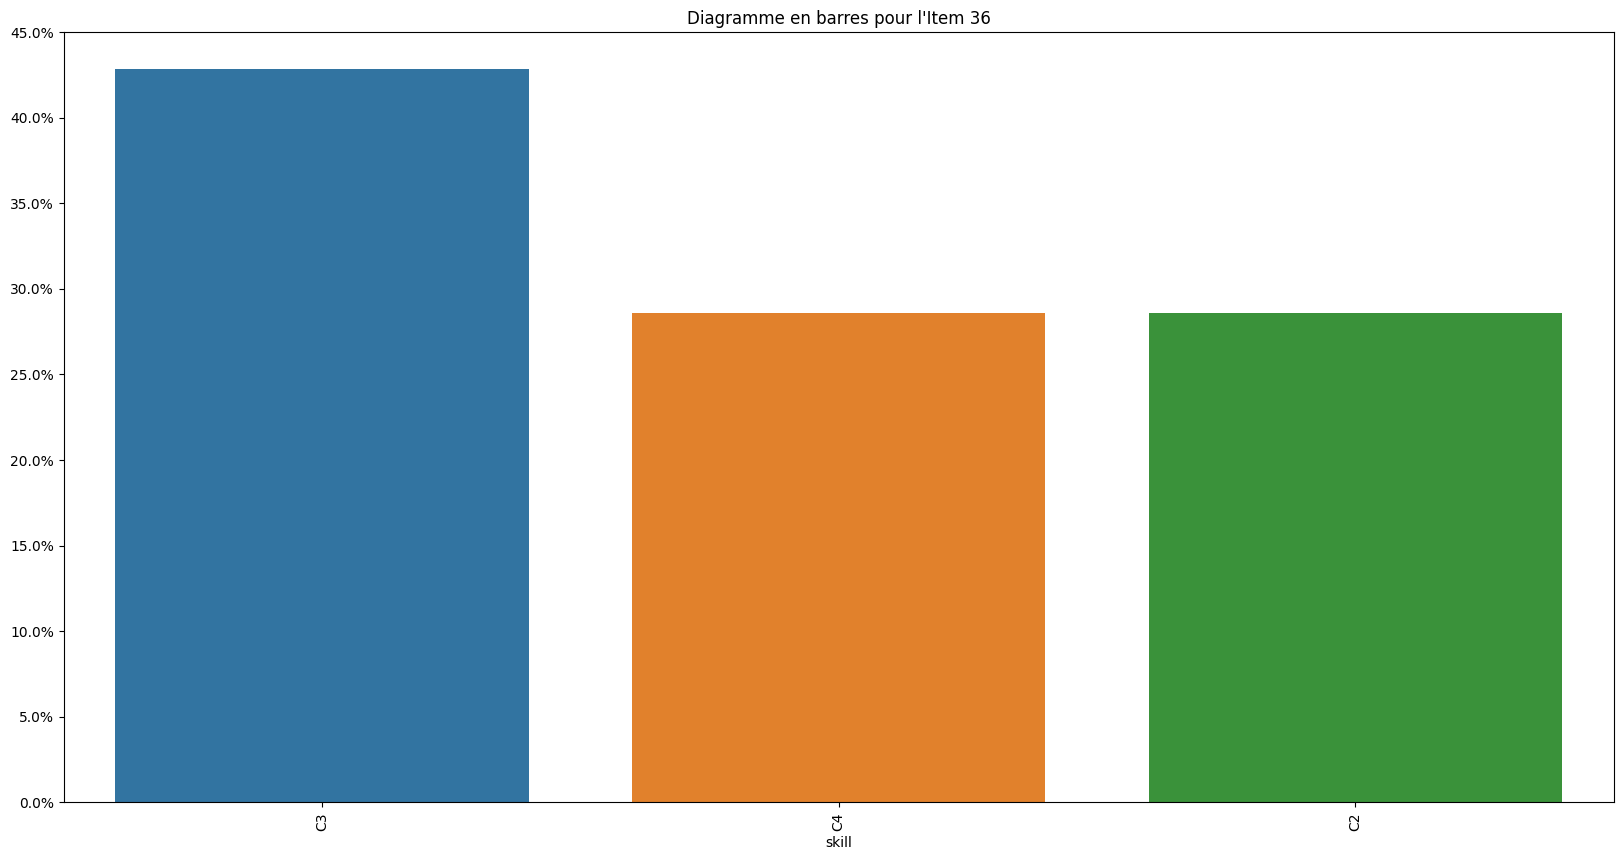

Item 36
skill      C3   C4   C2
ecn_item               
Item 36   3.0  2.0  2.0


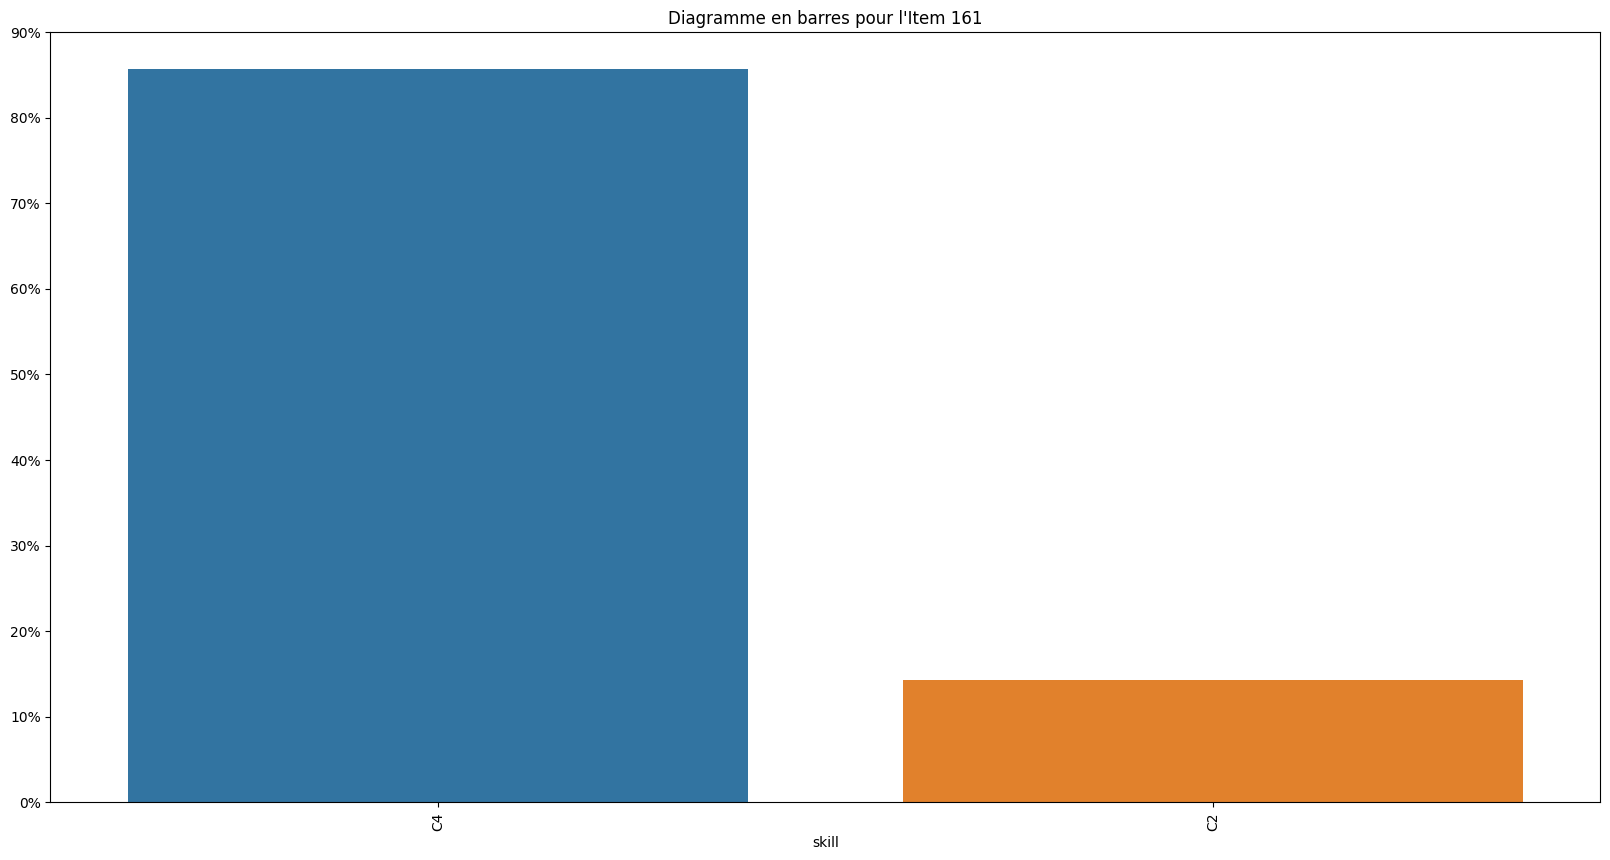

Item 161
skill      C4   C2
ecn_item          
Item 161  6.0  1.0


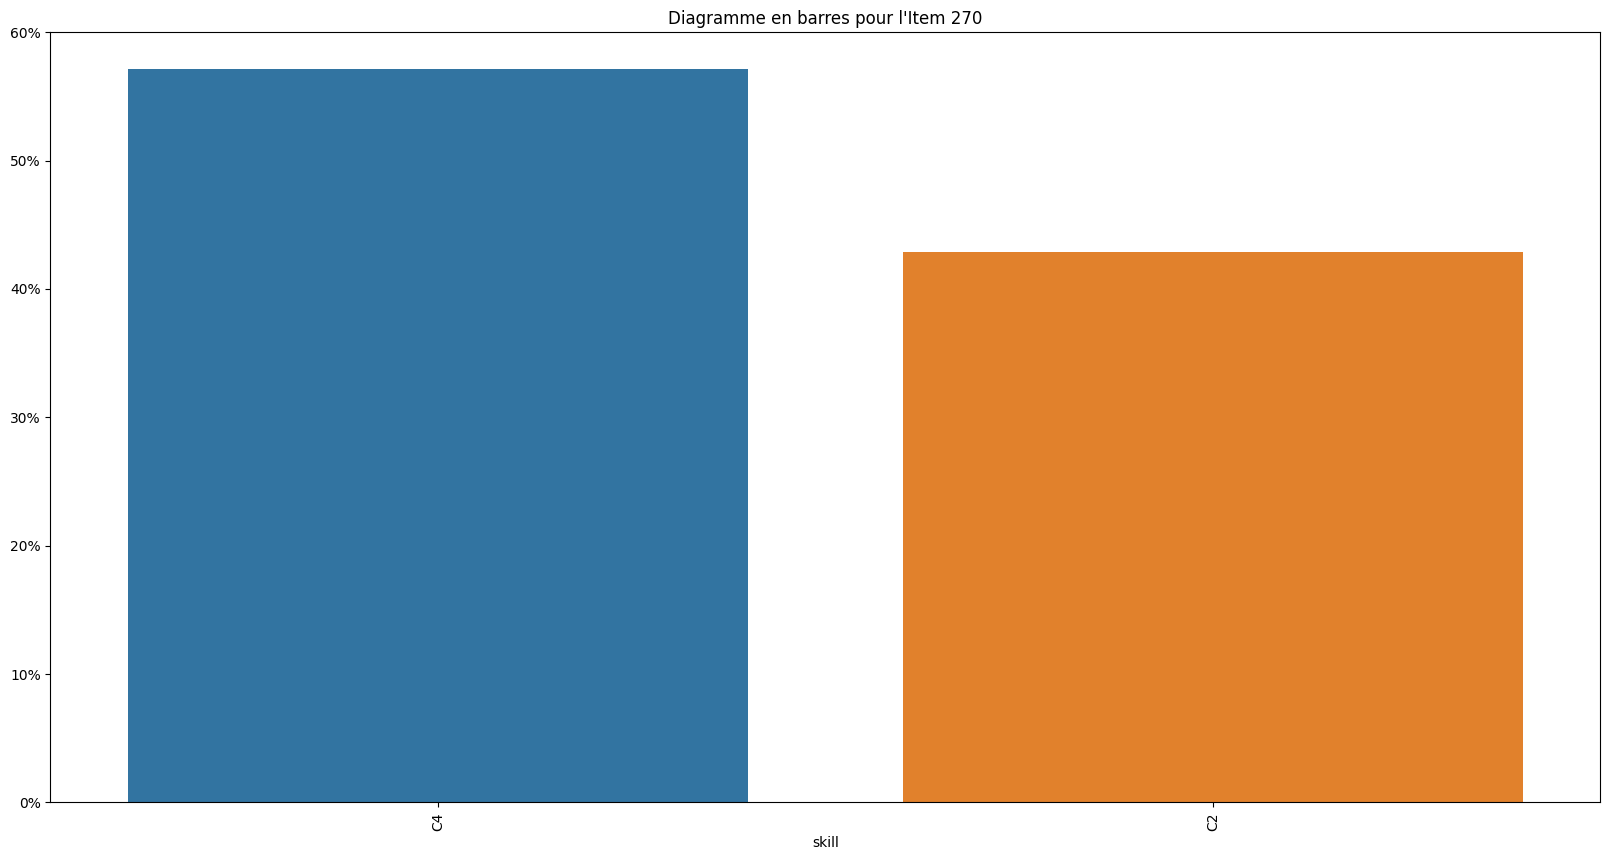

Item 270
skill      C4   C2
ecn_item          
Item 270  4.0  3.0


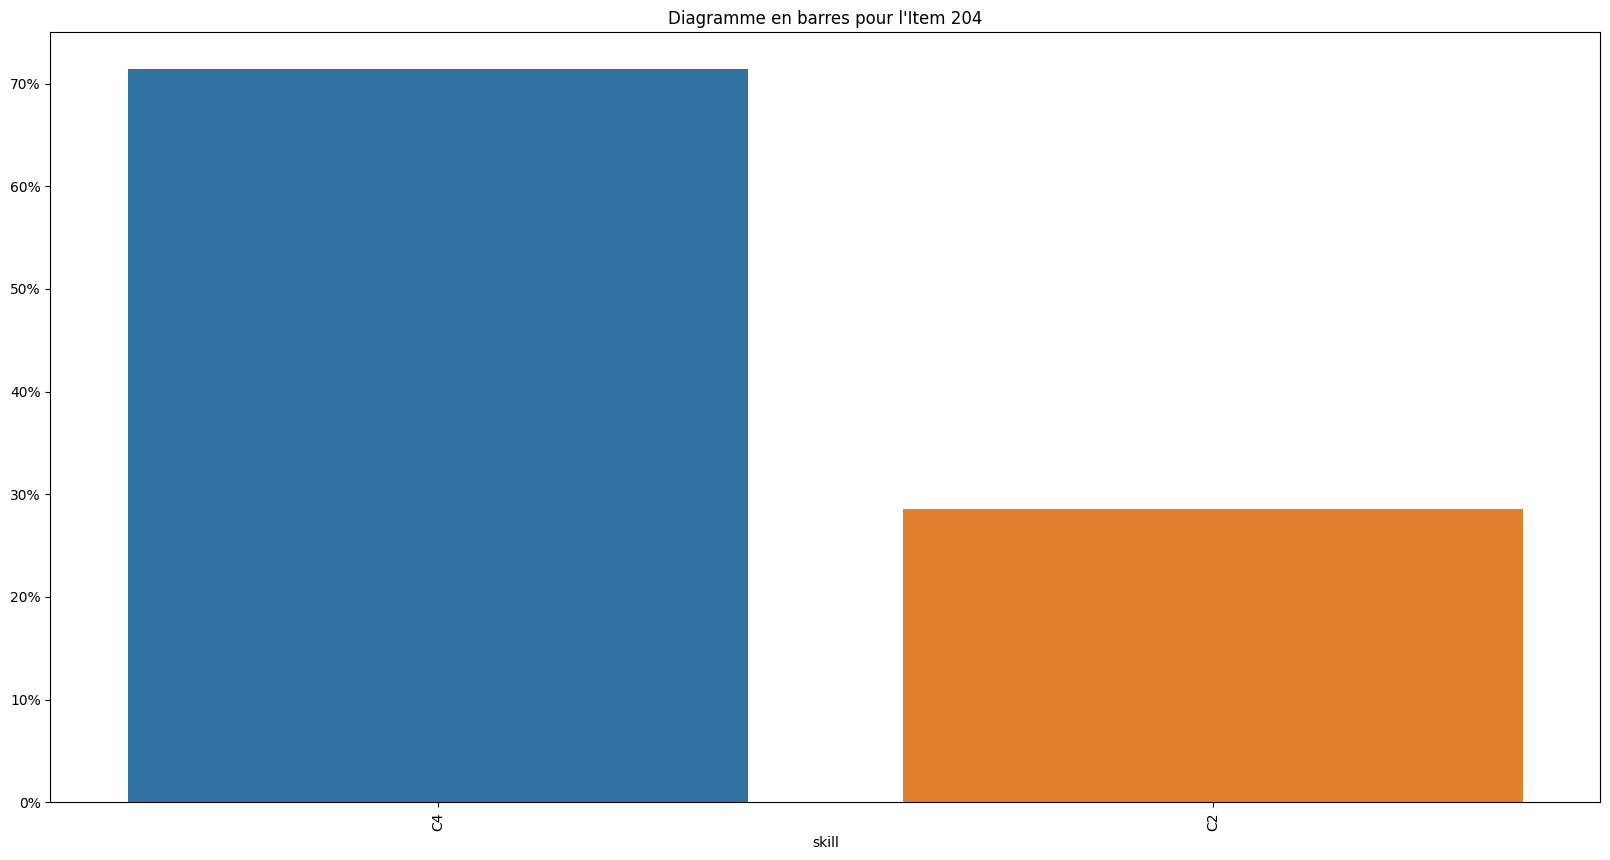

Item 204
skill      C4   C2
ecn_item          
Item 204  5.0  2.0


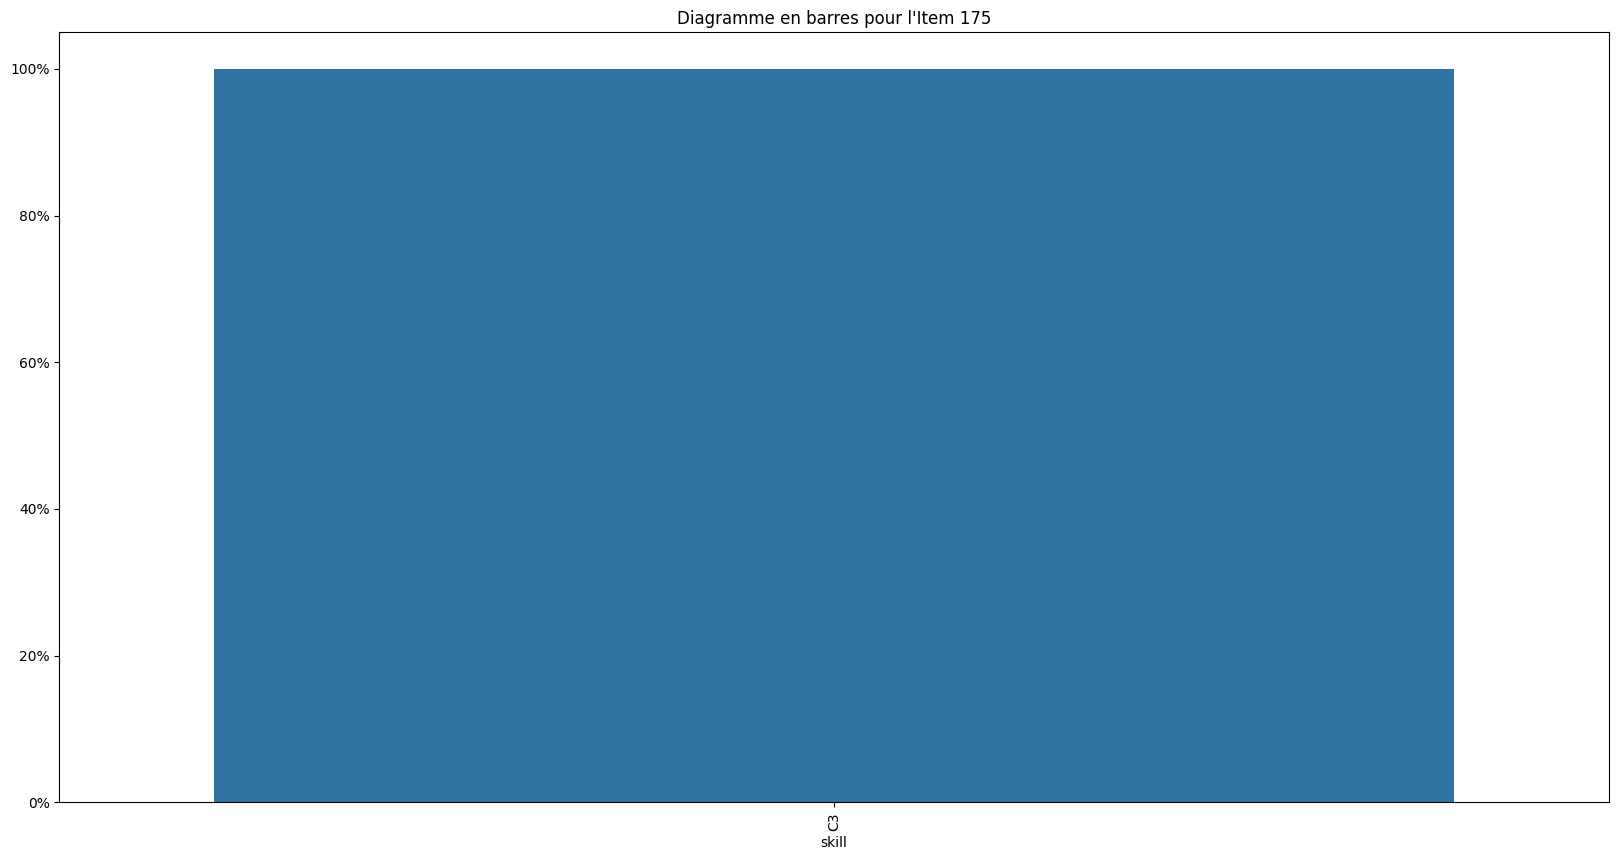

Item 175
skill      C3
ecn_item     
Item 175  7.0


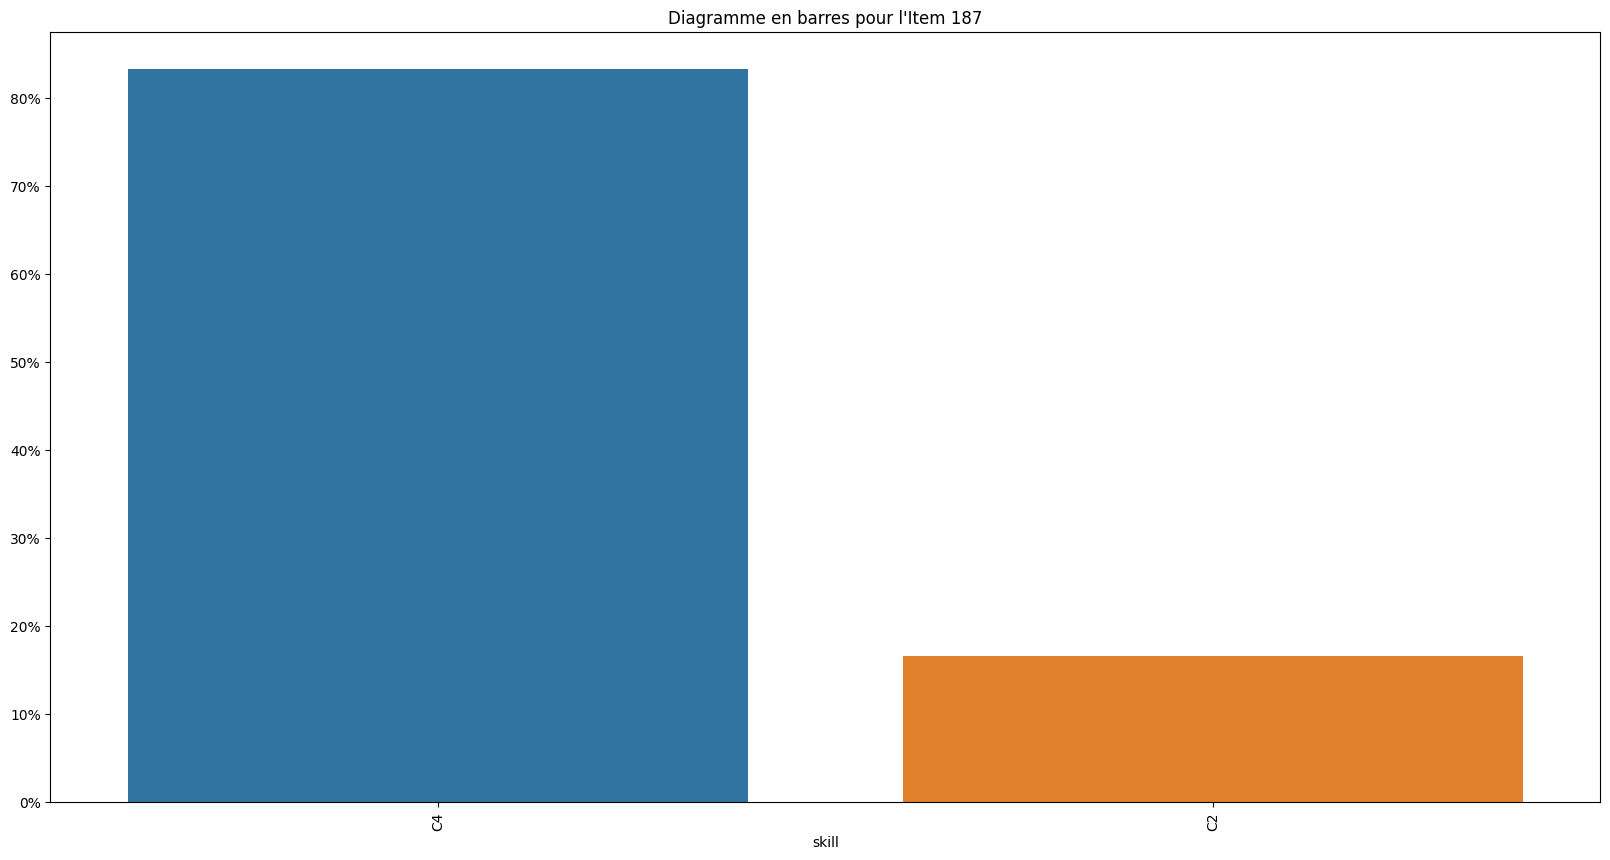

Item 187
skill      C4   C2
ecn_item          
Item 187  5.0  1.0


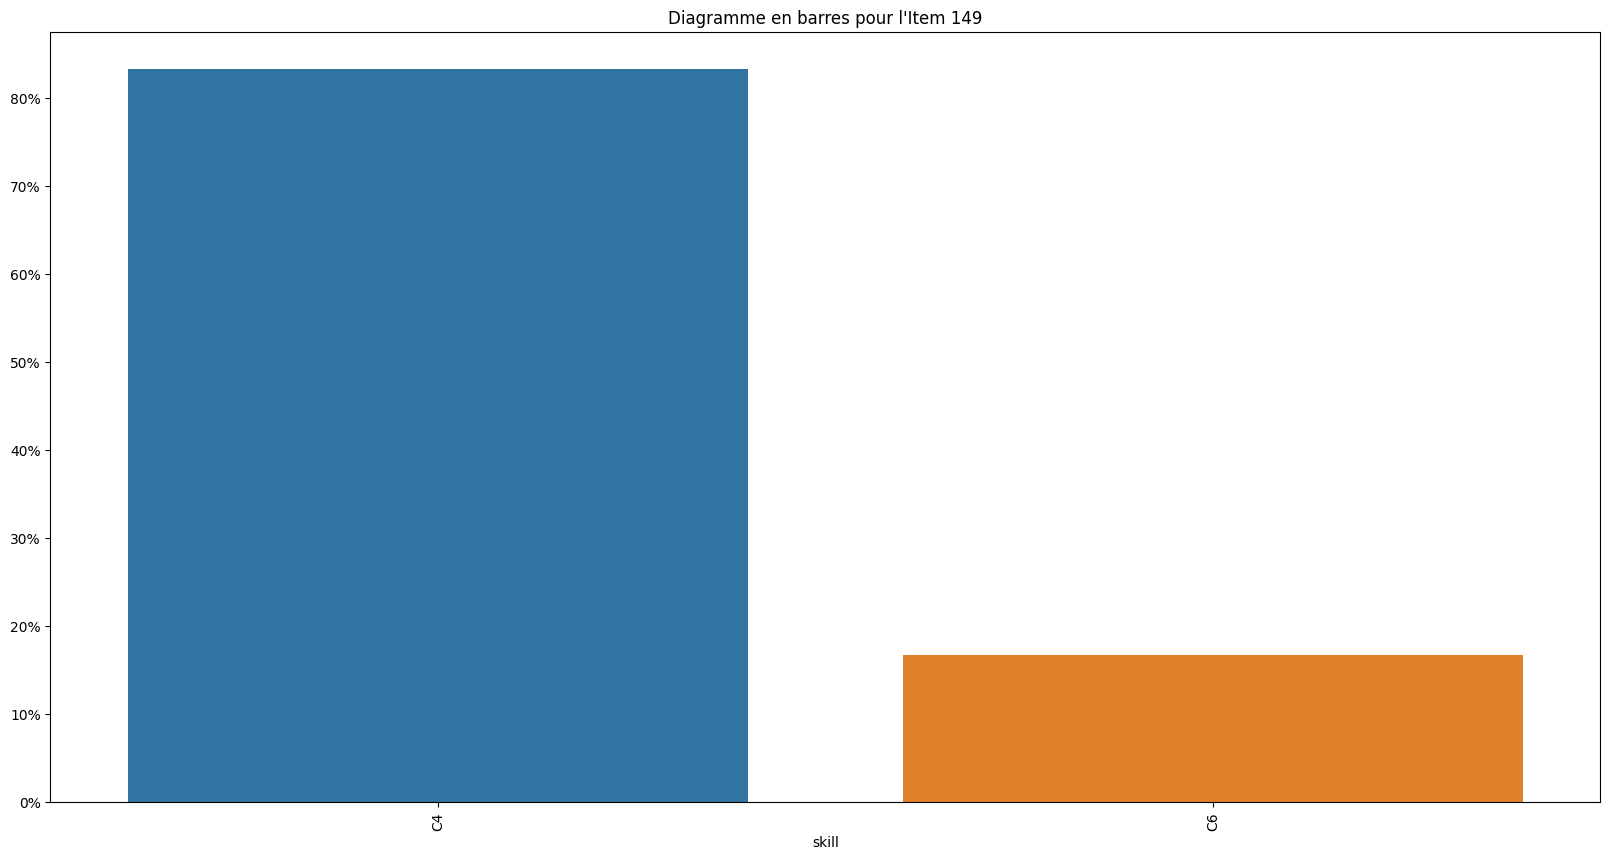

Item 149
skill      C4   C6
ecn_item          
Item 149  5.0  1.0


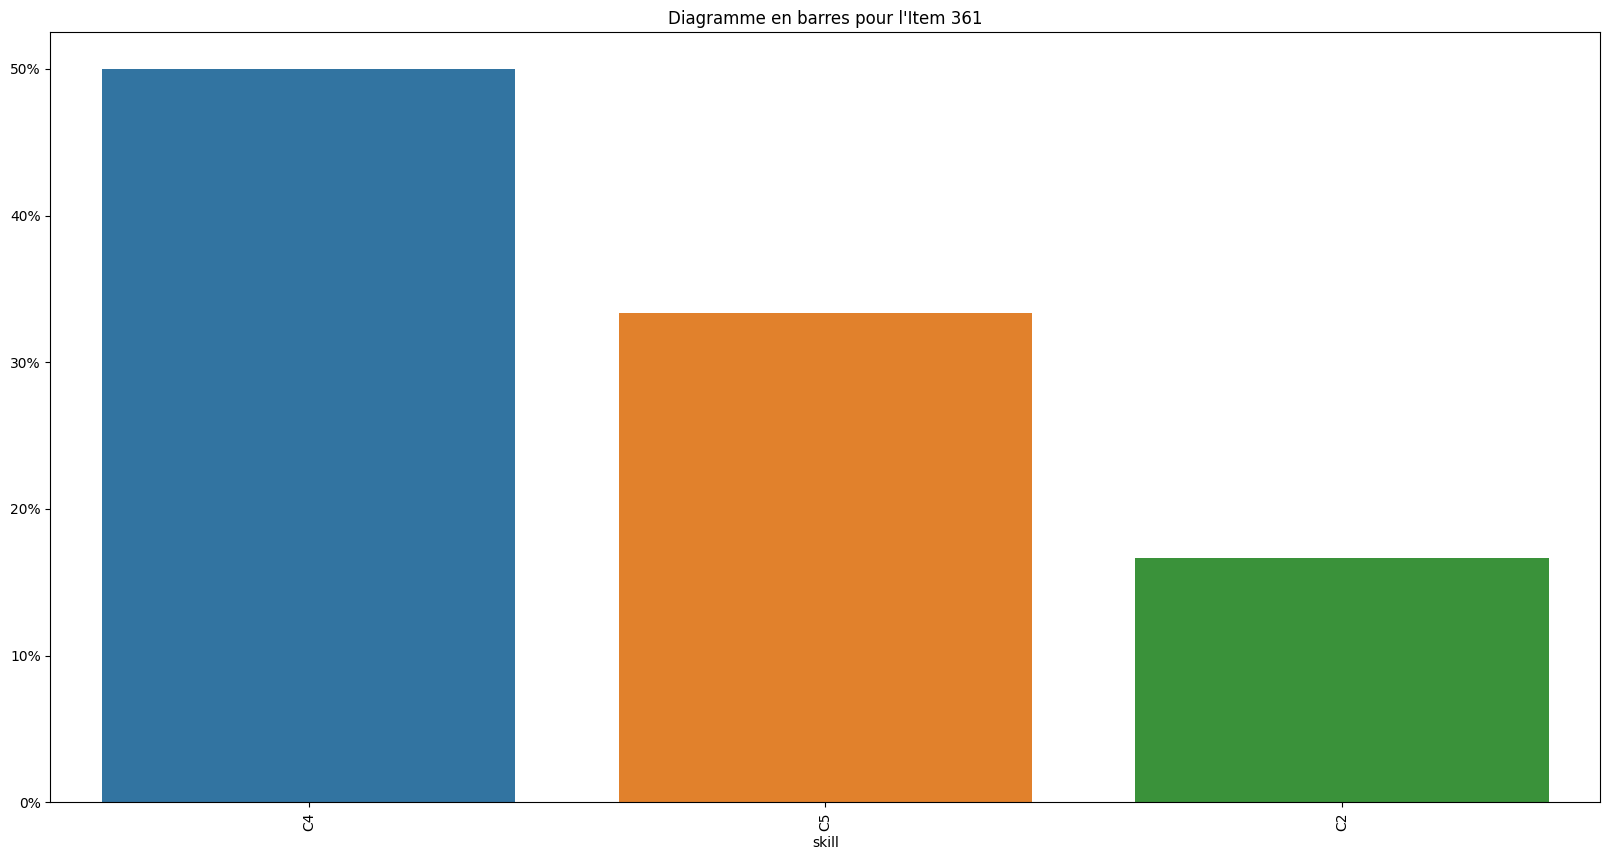

Item 361
skill      C4   C5   C2
ecn_item               
Item 361  3.0  2.0  1.0


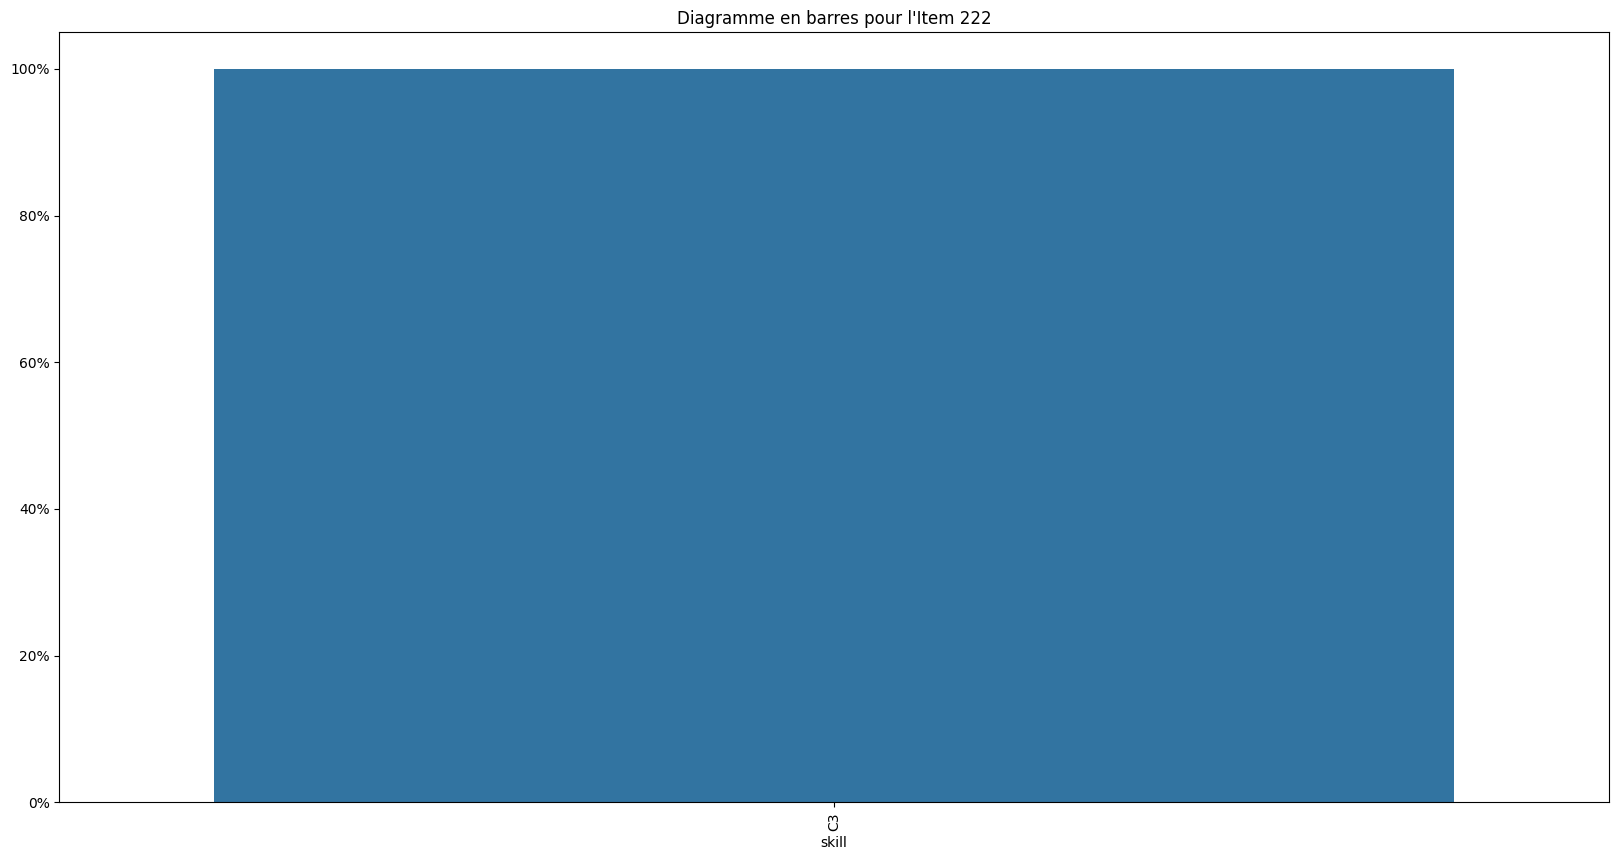

Item 222
skill      C3
ecn_item     
Item 222  6.0


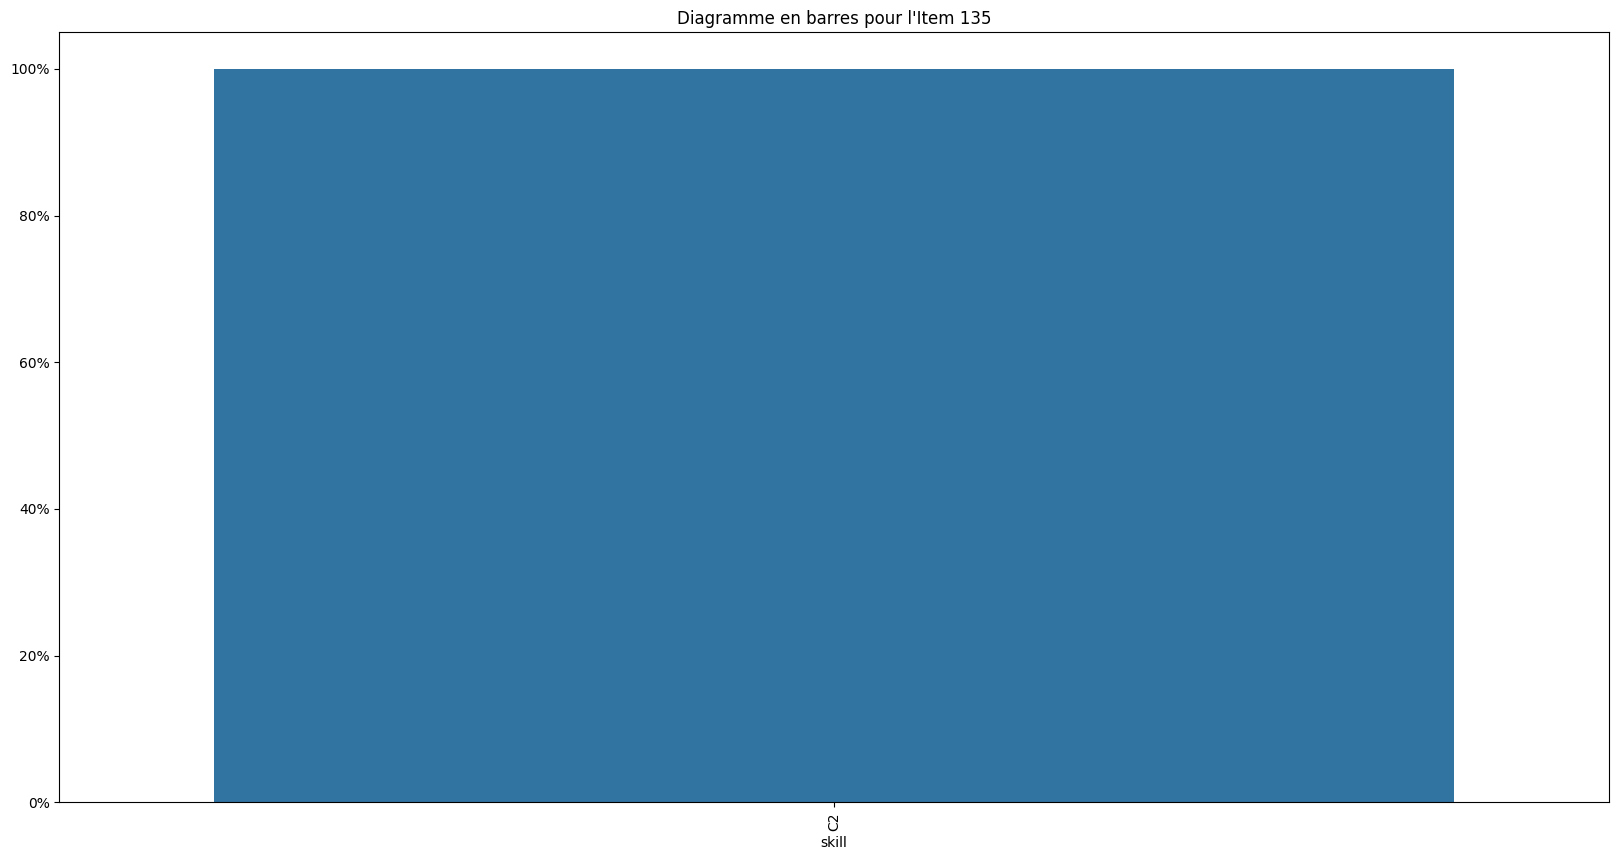

Item 135
skill      C2
ecn_item     
Item 135  6.0


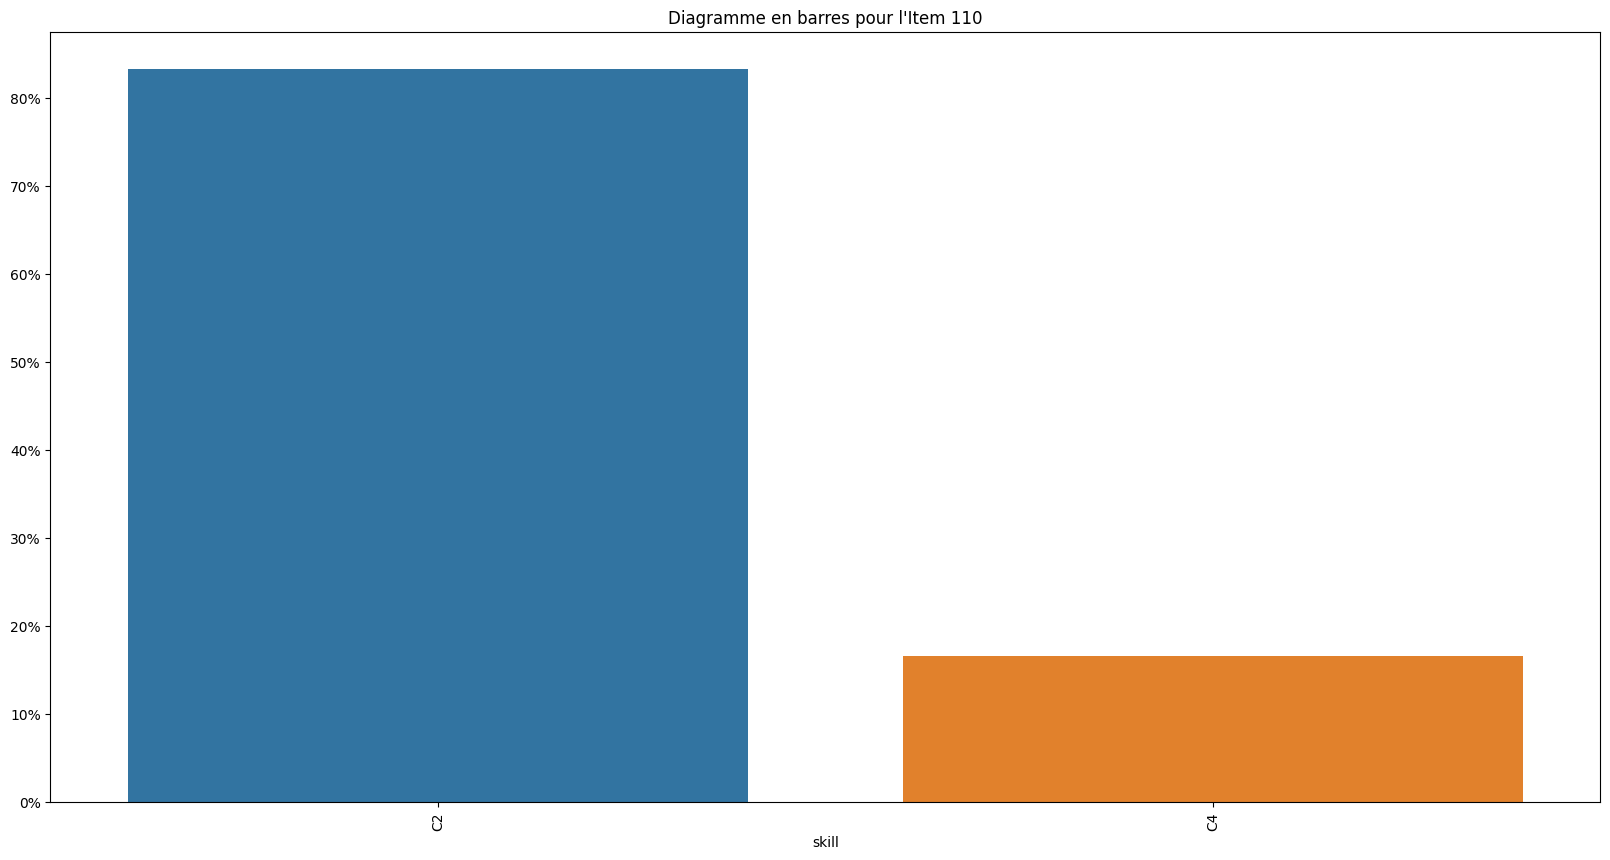

Item 110
skill      C2   C4
ecn_item          
Item 110  5.0  1.0


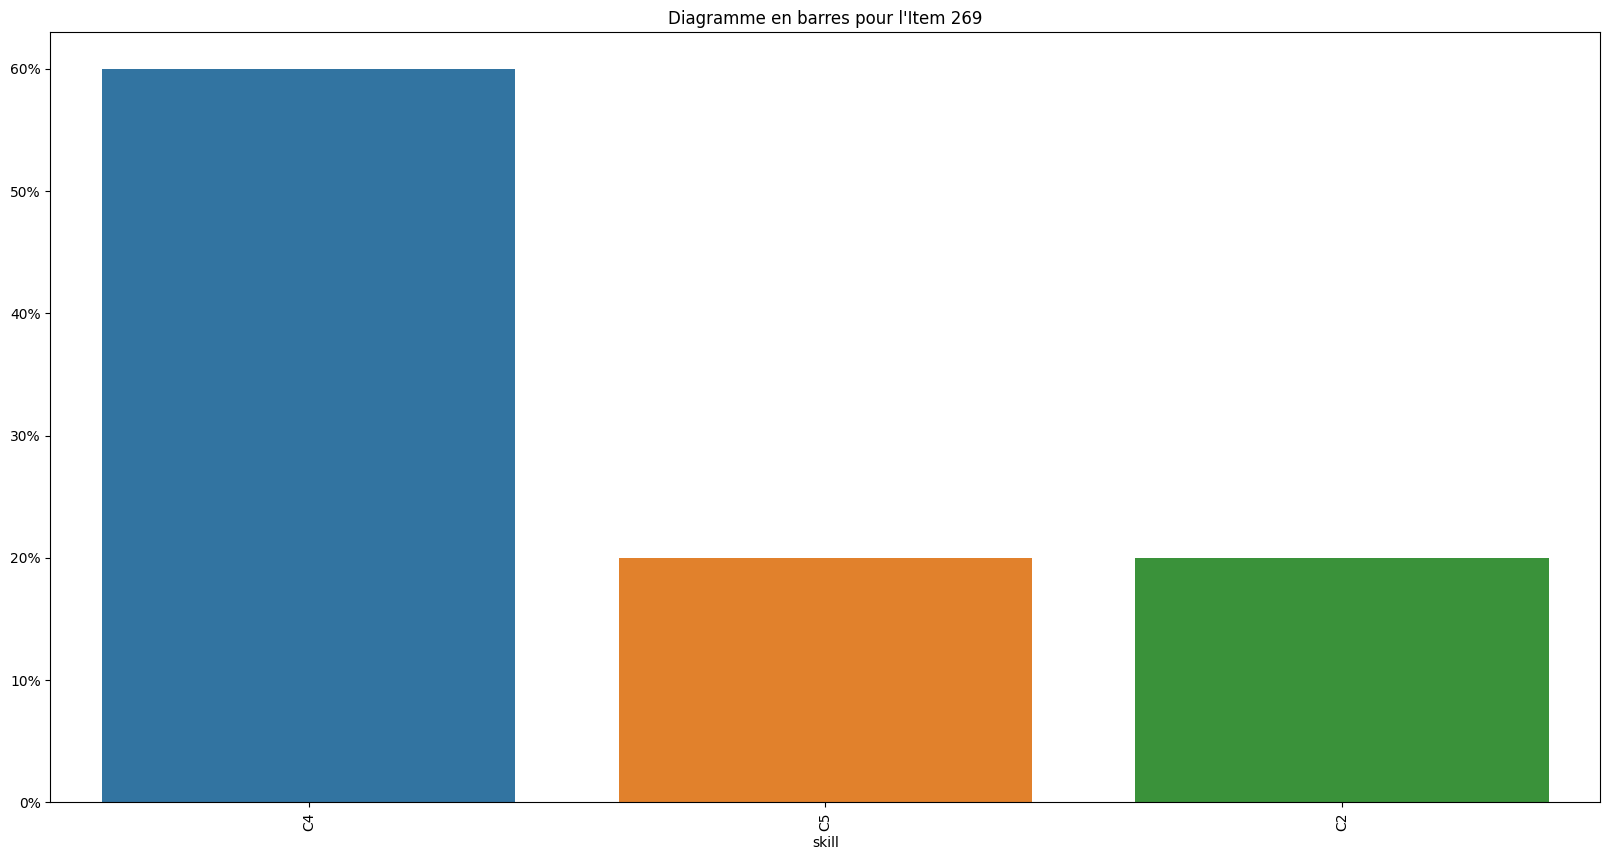

Item 269
skill      C4   C5   C2
ecn_item               
Item 269  3.0  1.0  1.0


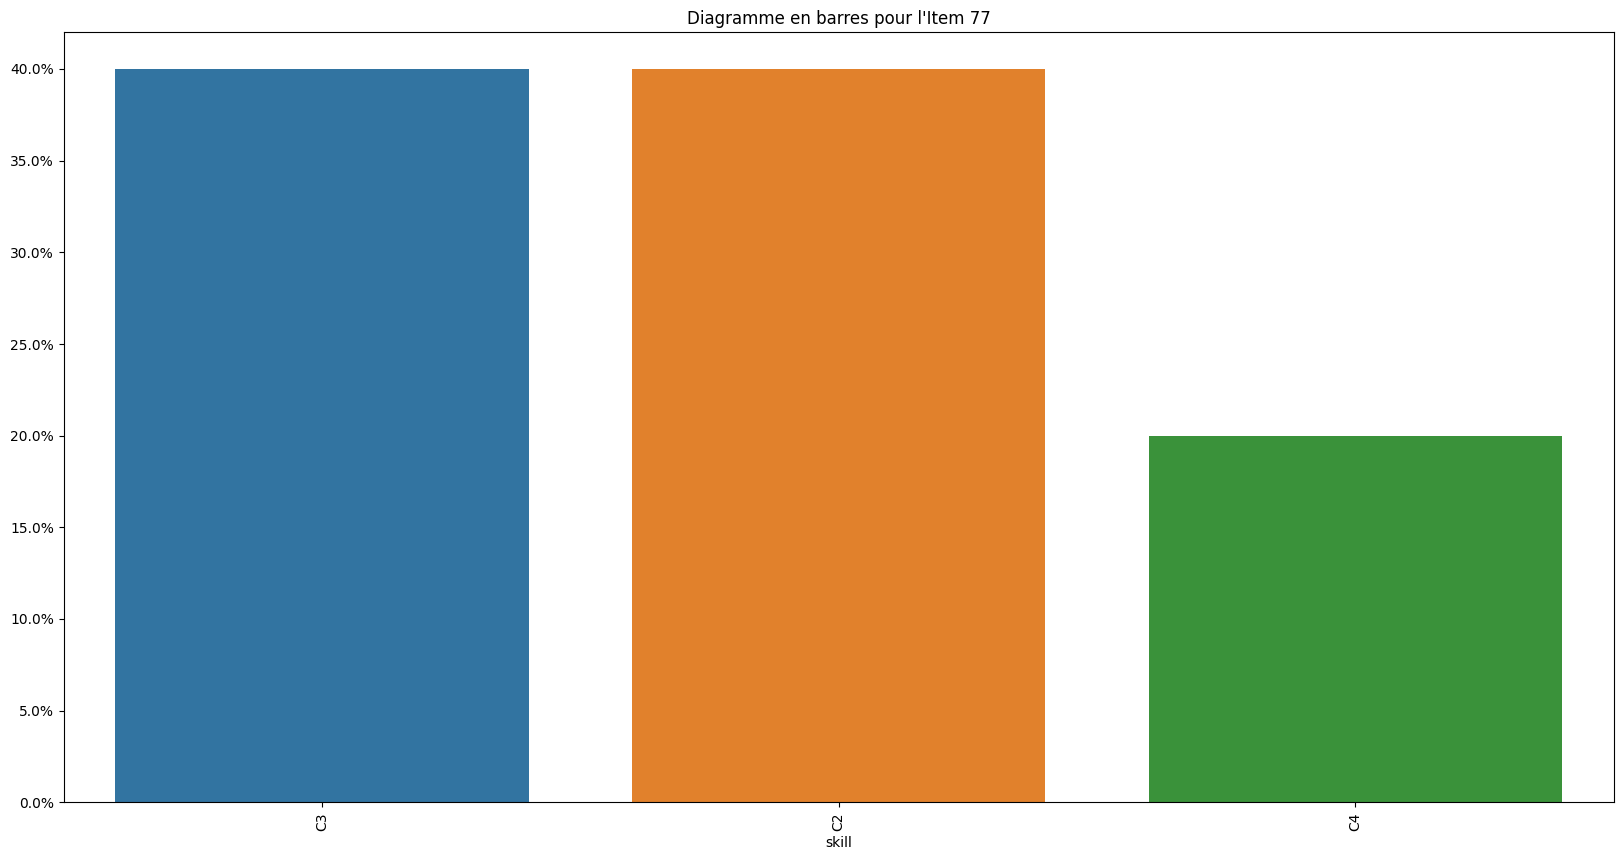

Item 77
skill      C3   C2   C4
ecn_item               
Item 77   2.0  2.0  1.0


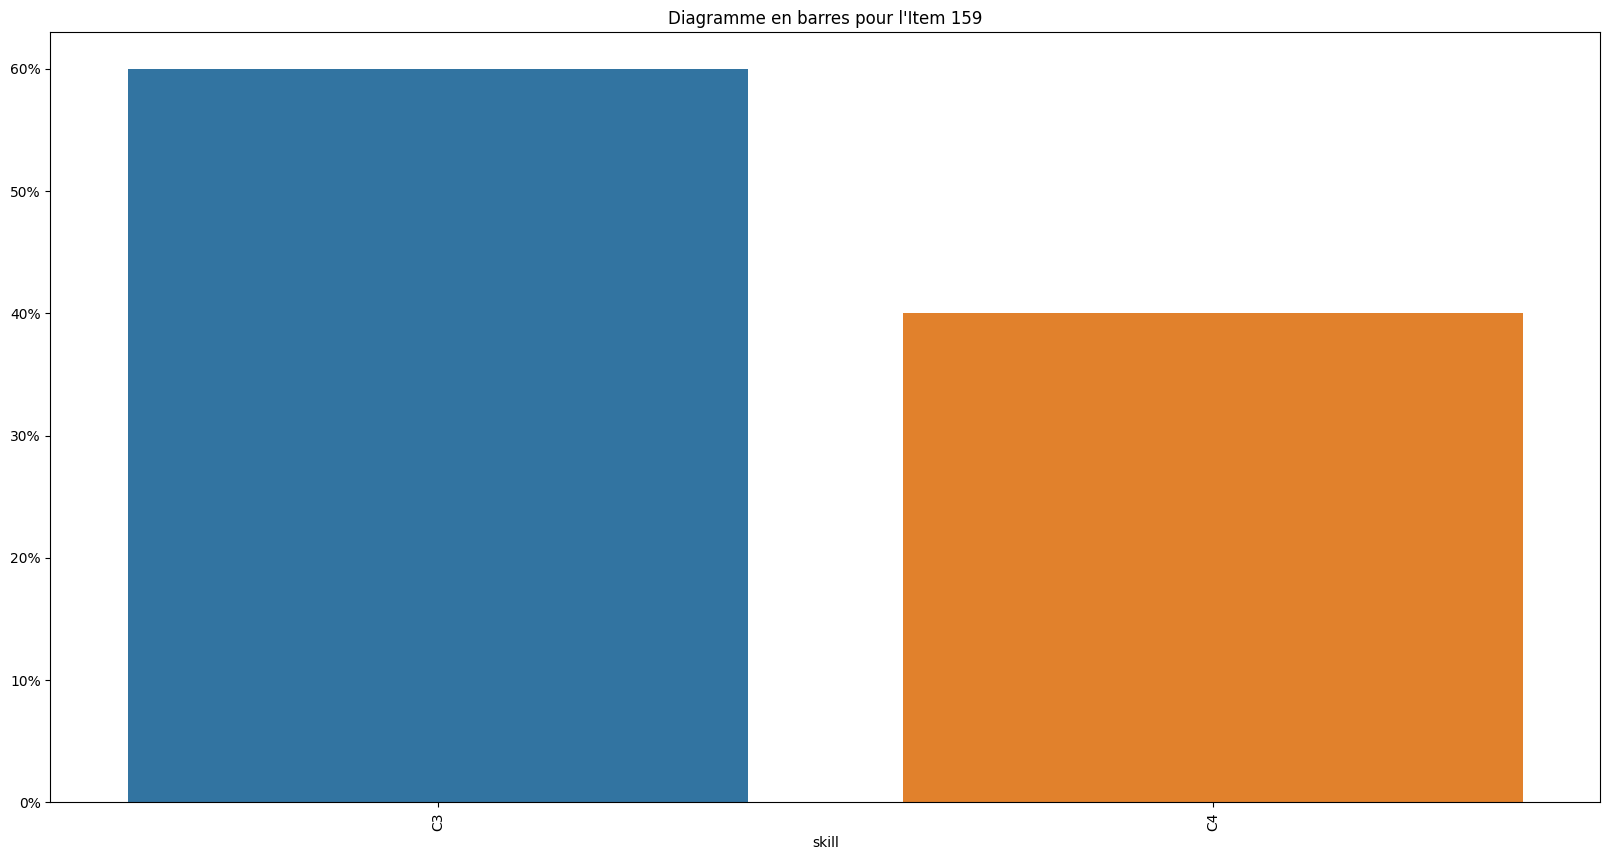

Item 159
skill      C3   C4
ecn_item          
Item 159  3.0  2.0


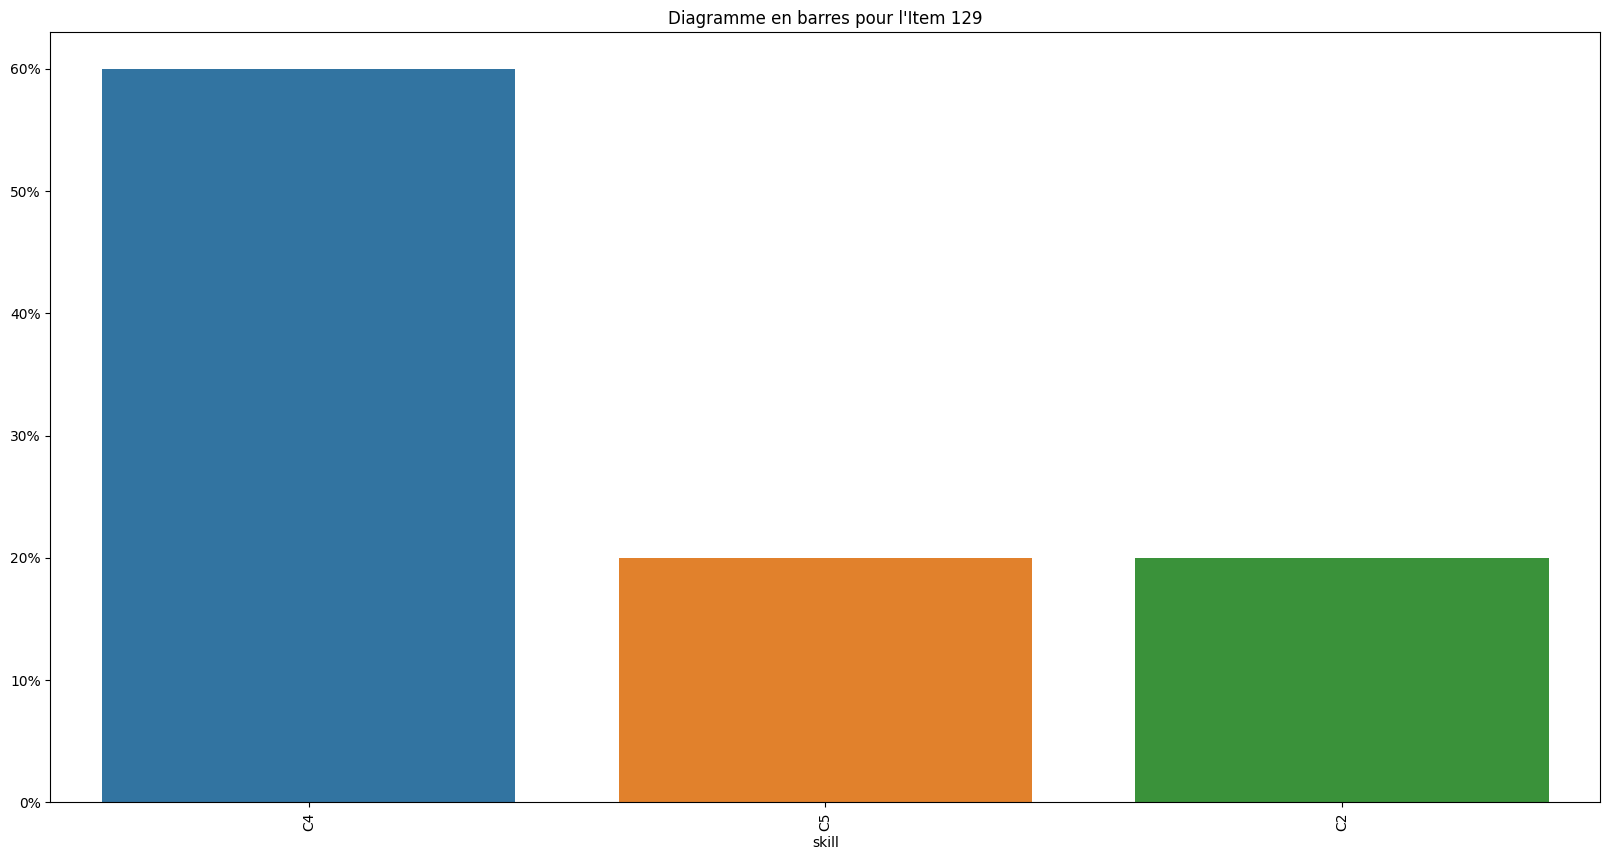

Item 129
skill      C4   C5   C2
ecn_item               
Item 129  3.0  1.0  1.0


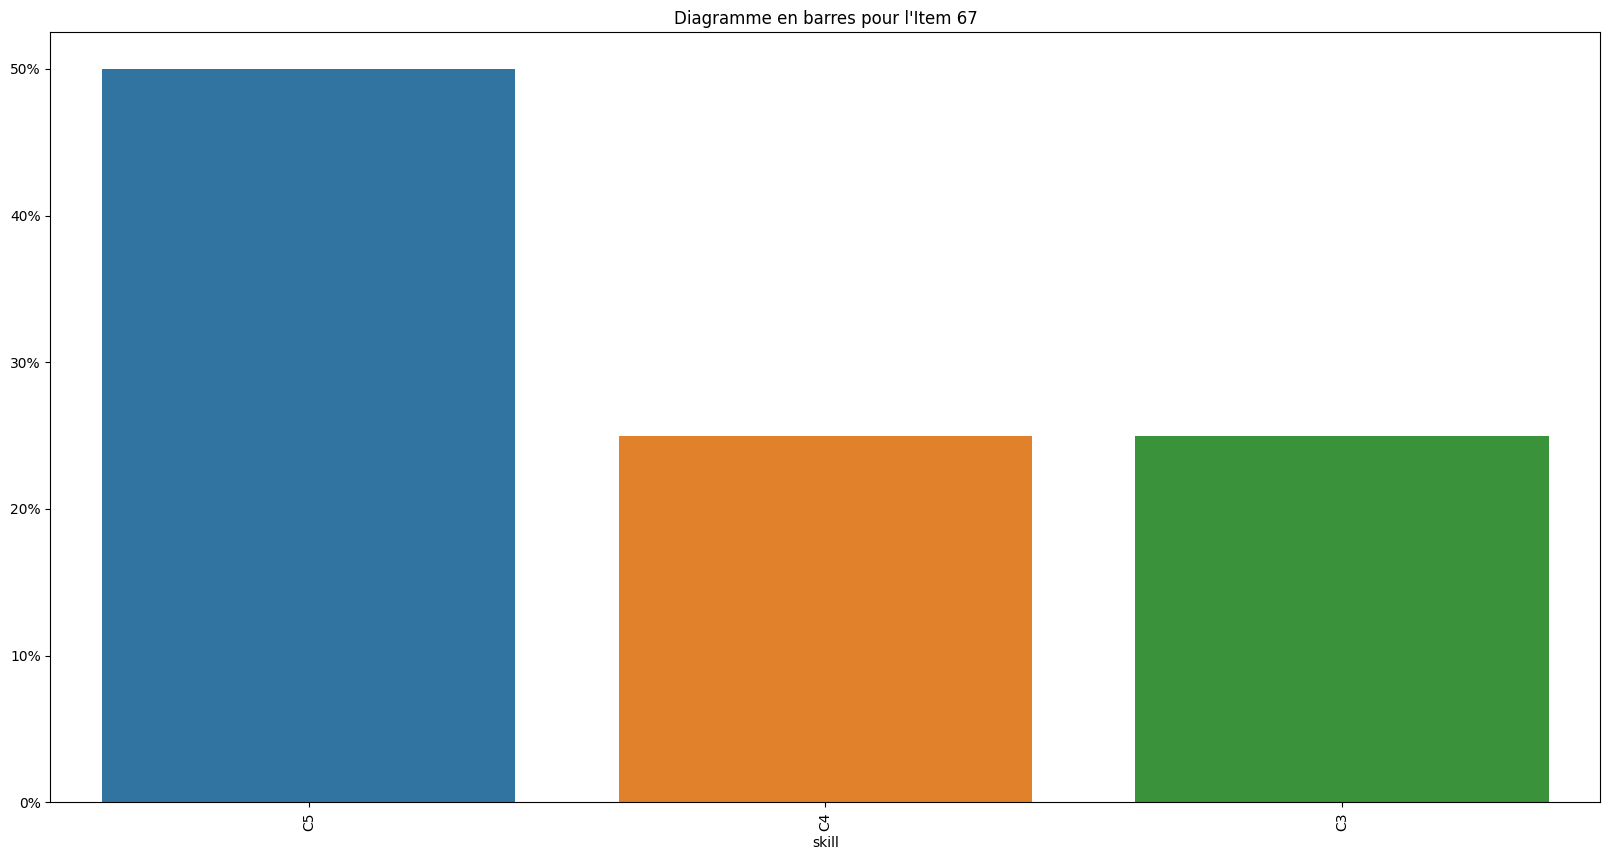

Item 67
skill      C5   C4   C3
ecn_item               
Item 67   2.0  1.0  1.0


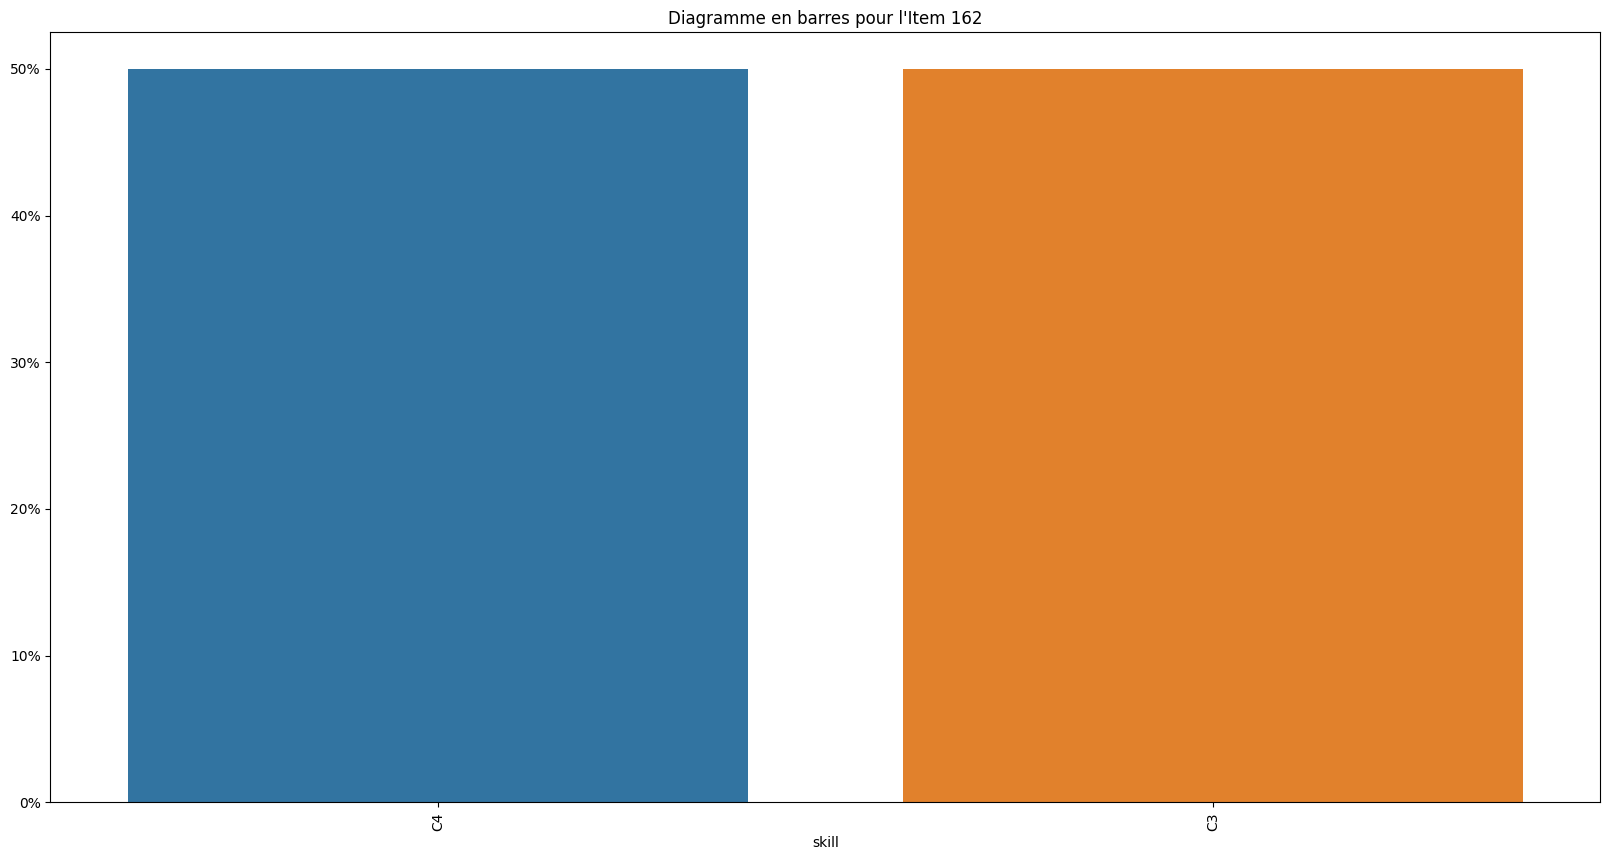

Item 162
skill      C4   C3
ecn_item          
Item 162  2.0  2.0


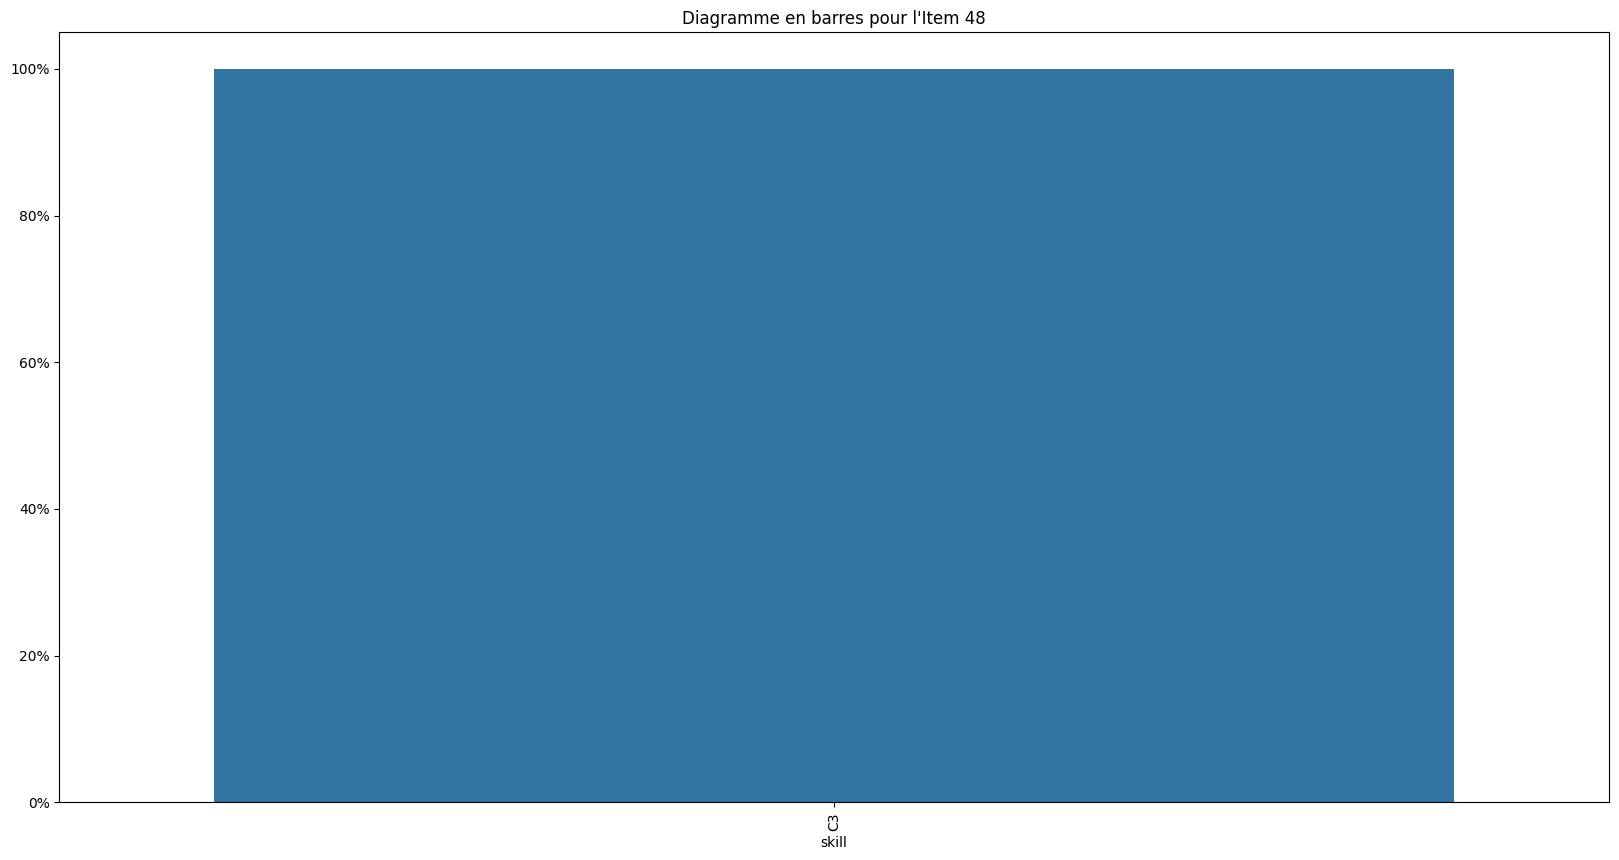

Item 48
skill      C3
ecn_item     
Item 48   4.0


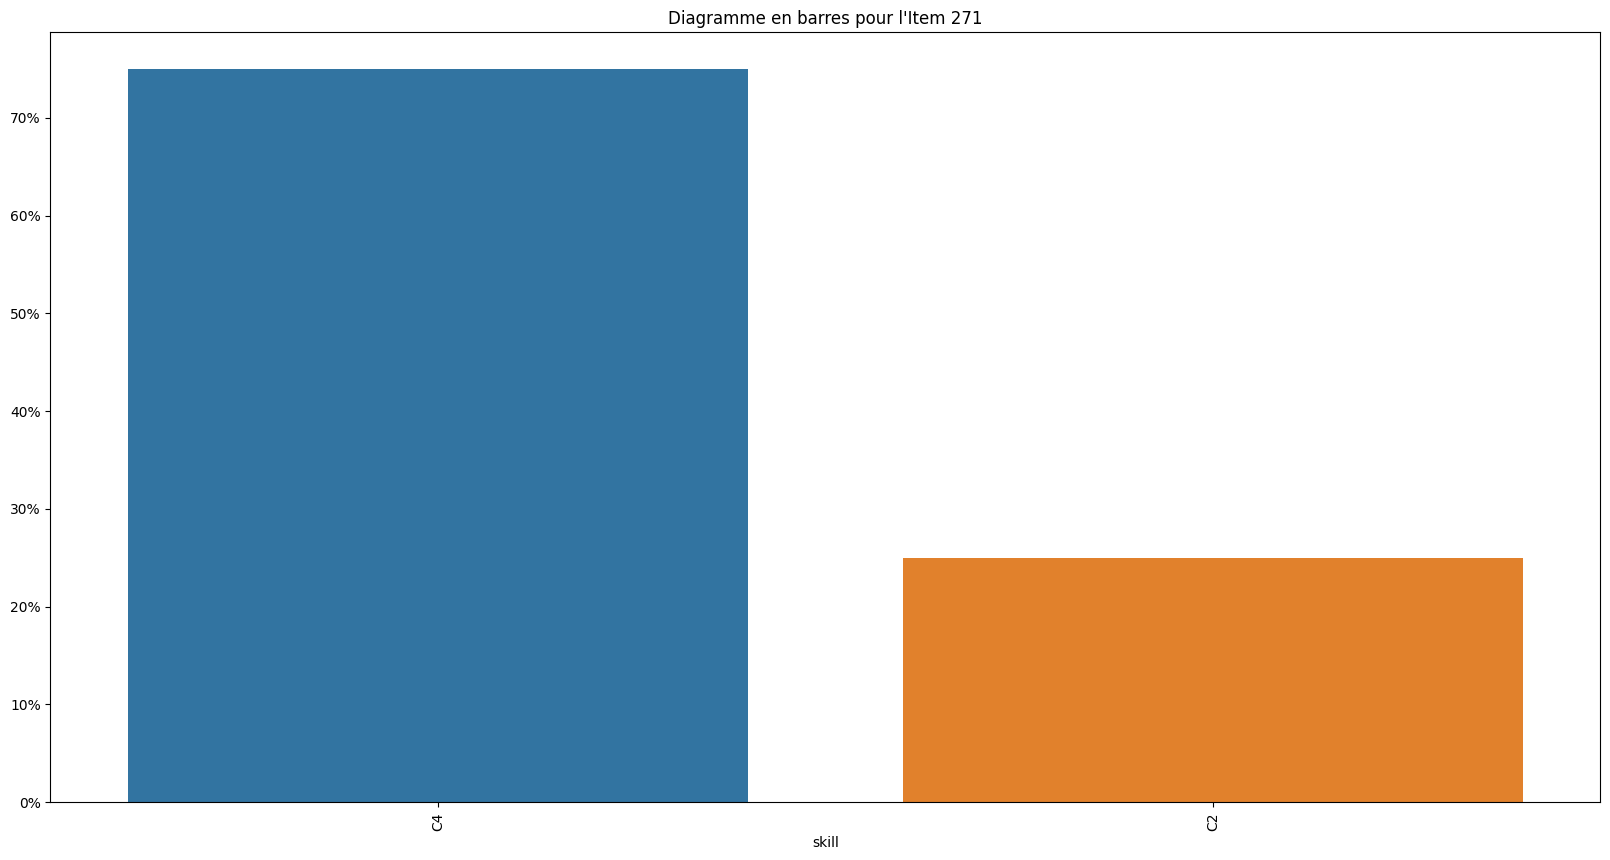

Item 271
skill      C4   C2
ecn_item          
Item 271  3.0  1.0


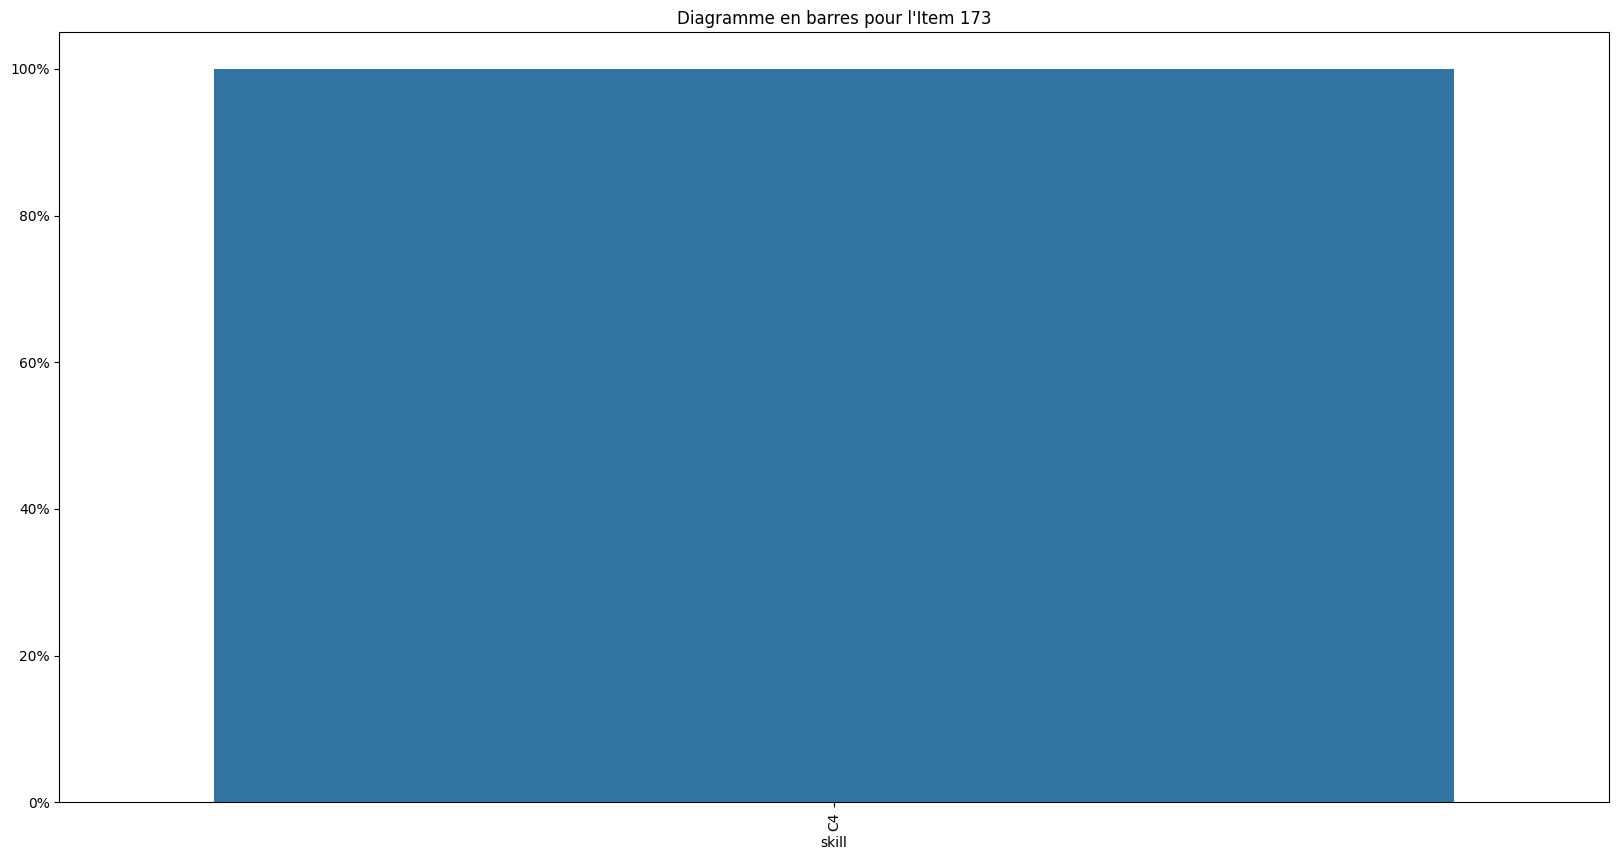

Item 173
skill      C4
ecn_item     
Item 173  4.0


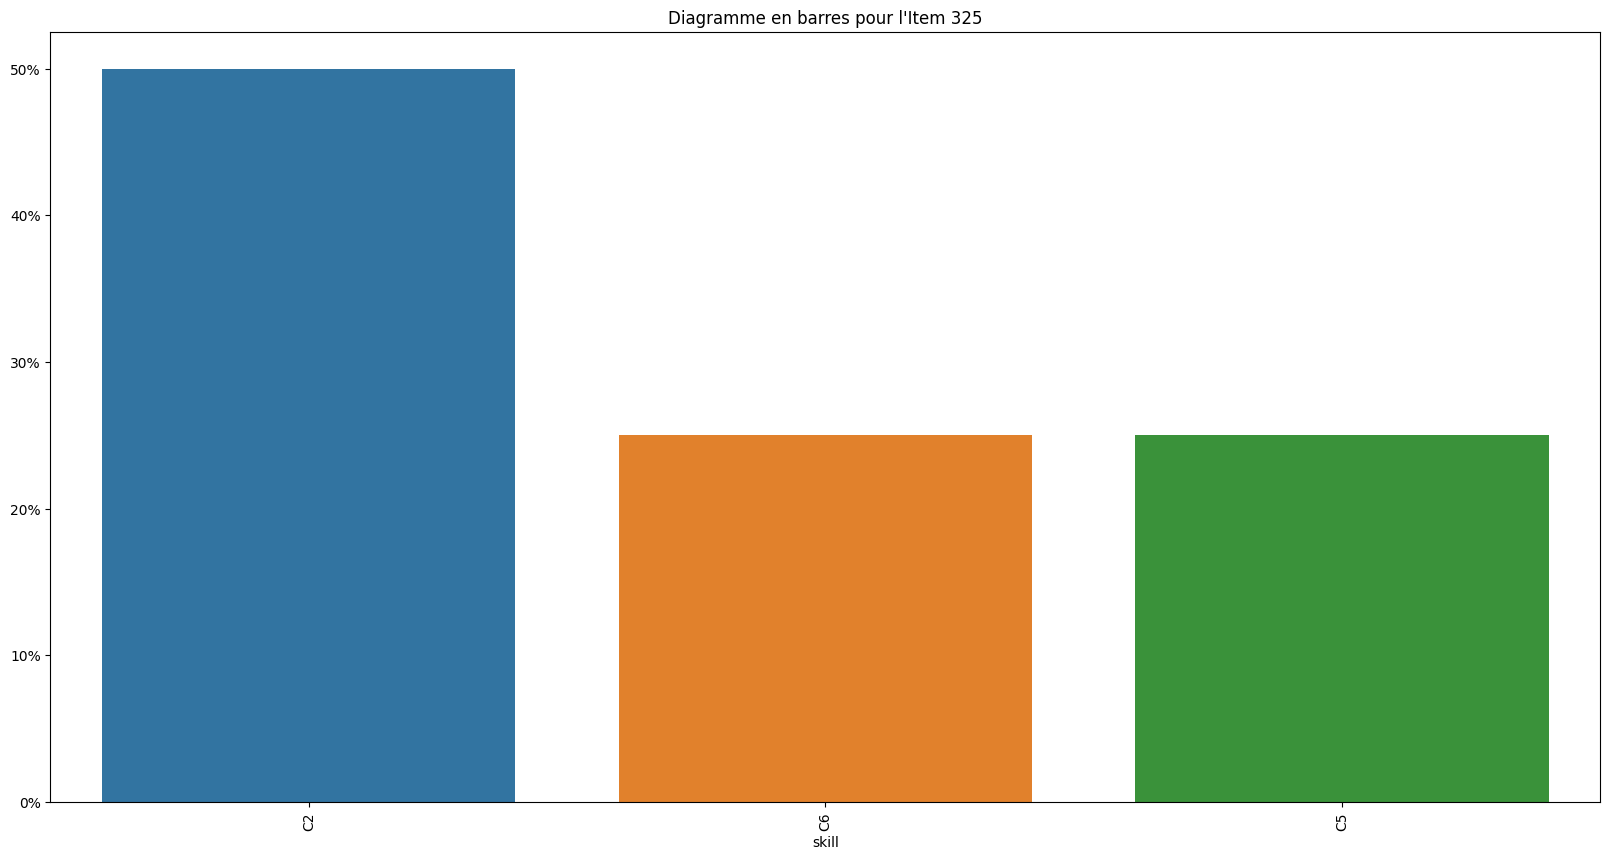

Item 325
skill      C2   C6   C5
ecn_item               
Item 325  2.0  1.0  1.0


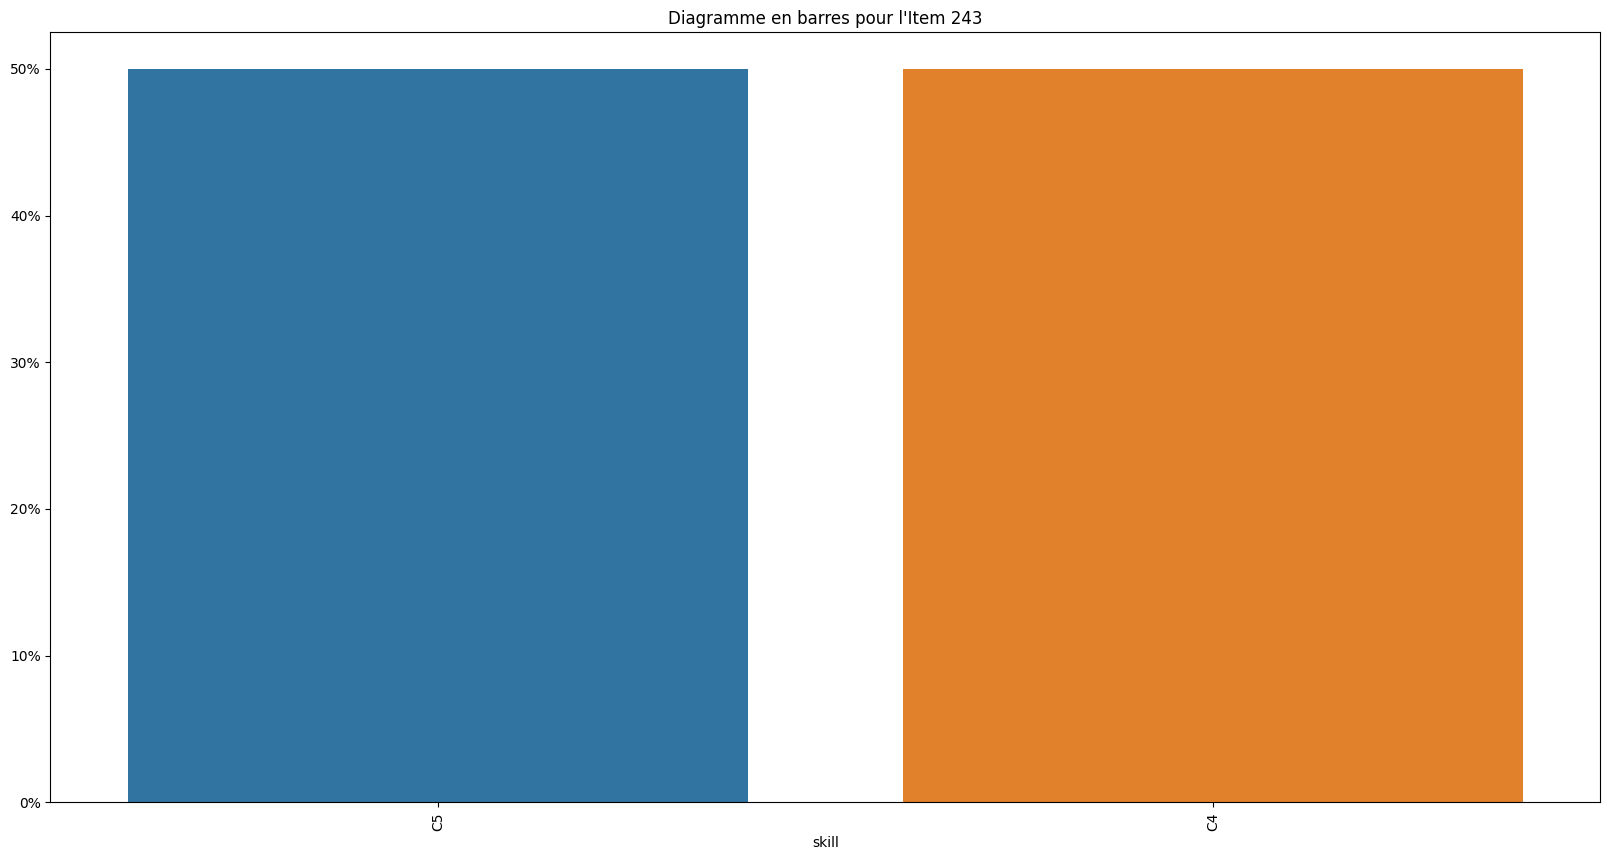

Item 243
skill      C5   C4
ecn_item          
Item 243  2.0  2.0


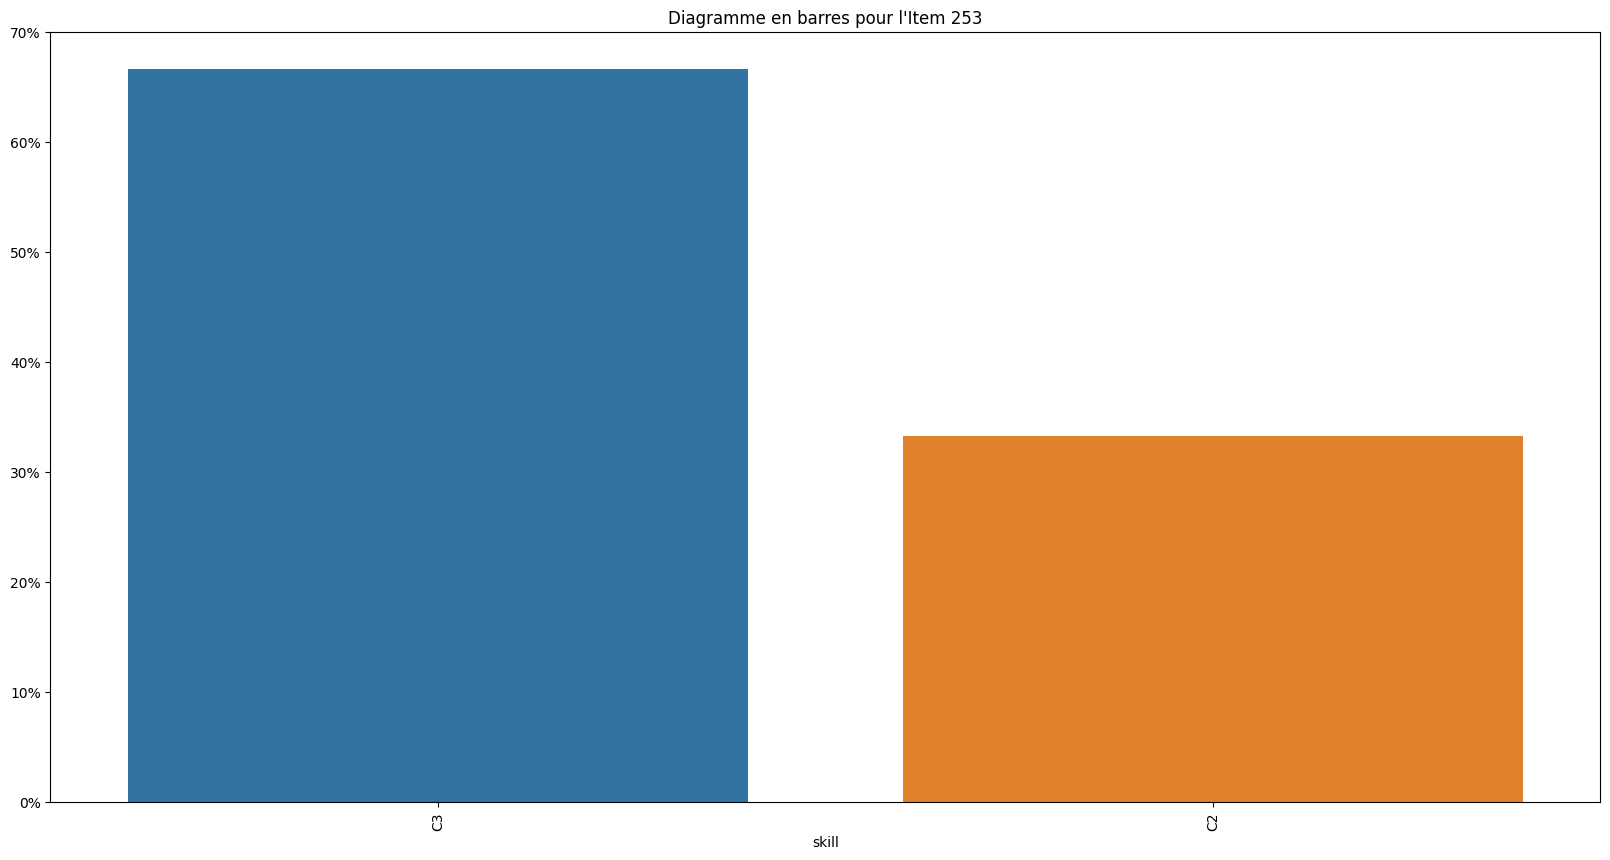

Item 253
skill      C3   C2
ecn_item          
Item 253  2.0  1.0


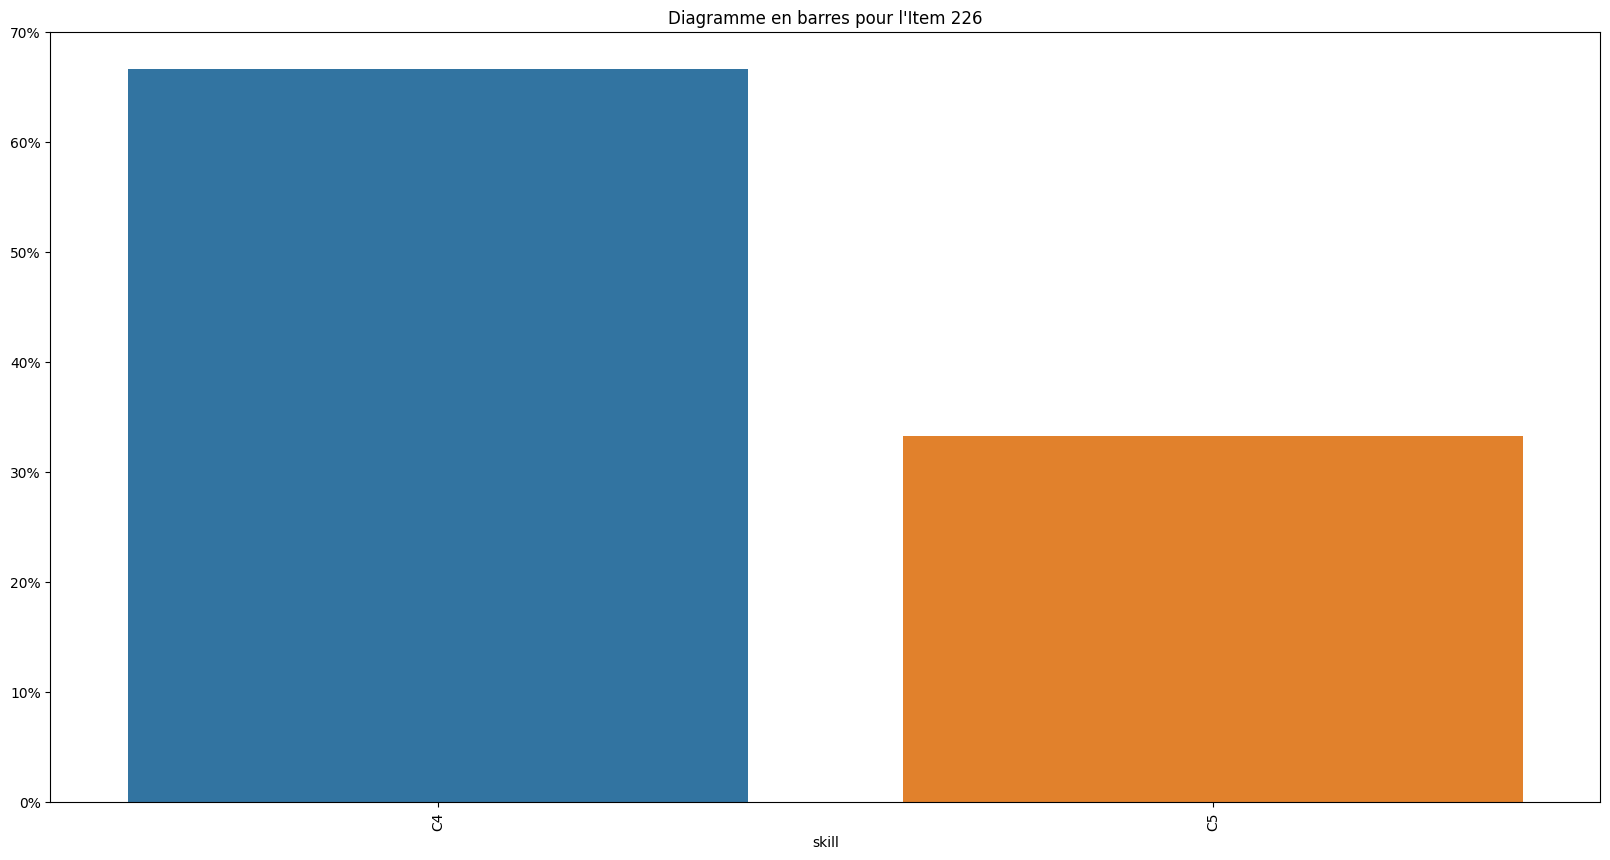

Item 226
skill      C4   C5
ecn_item          
Item 226  2.0  1.0


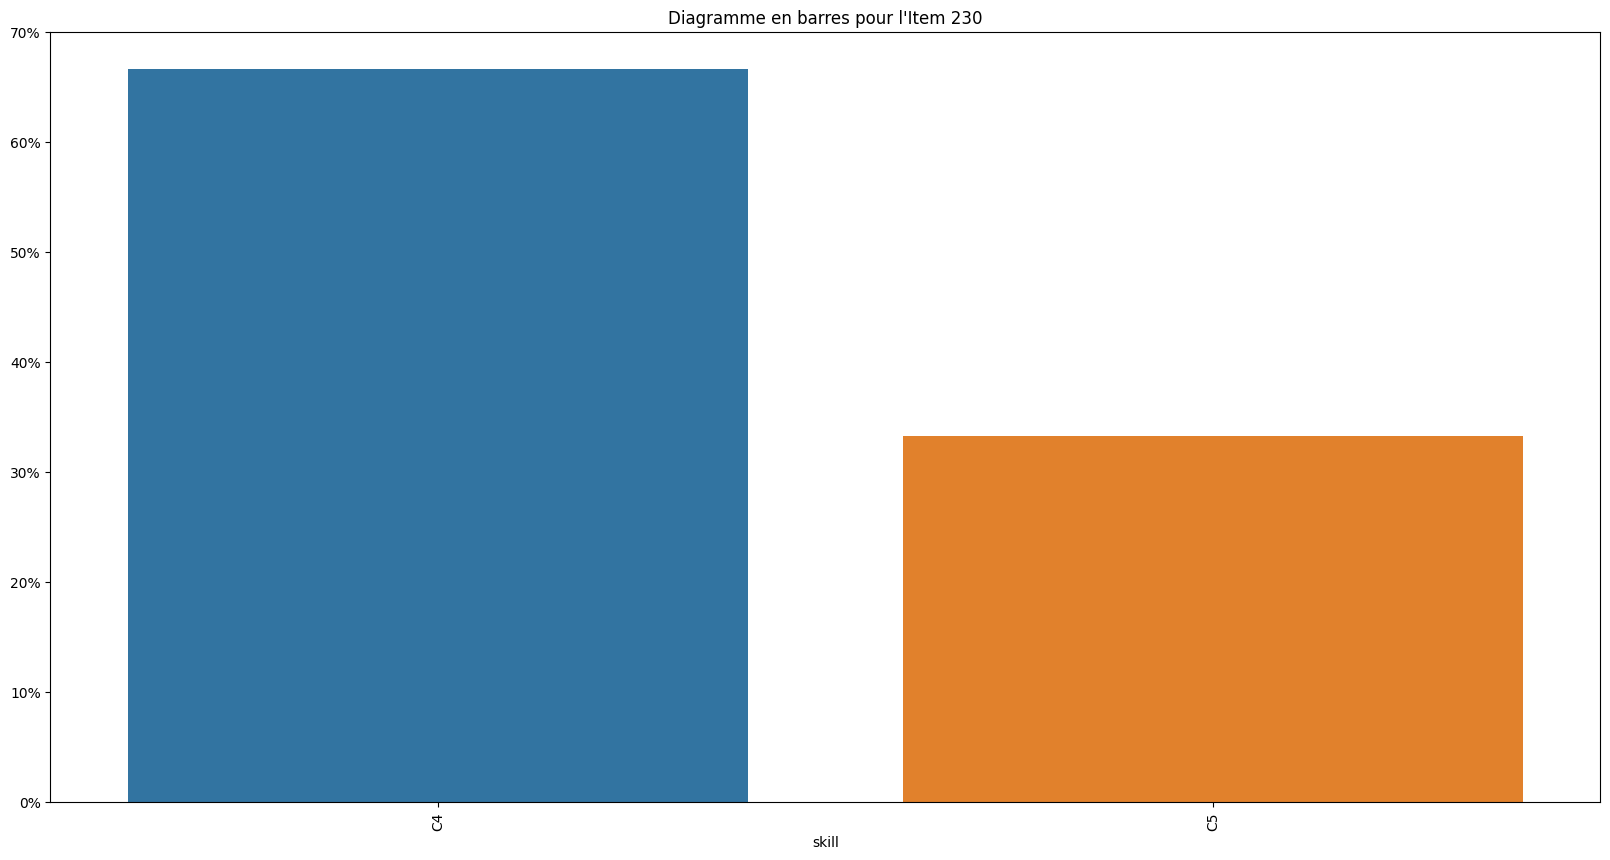

Item 230
skill      C4   C5
ecn_item          
Item 230  2.0  1.0


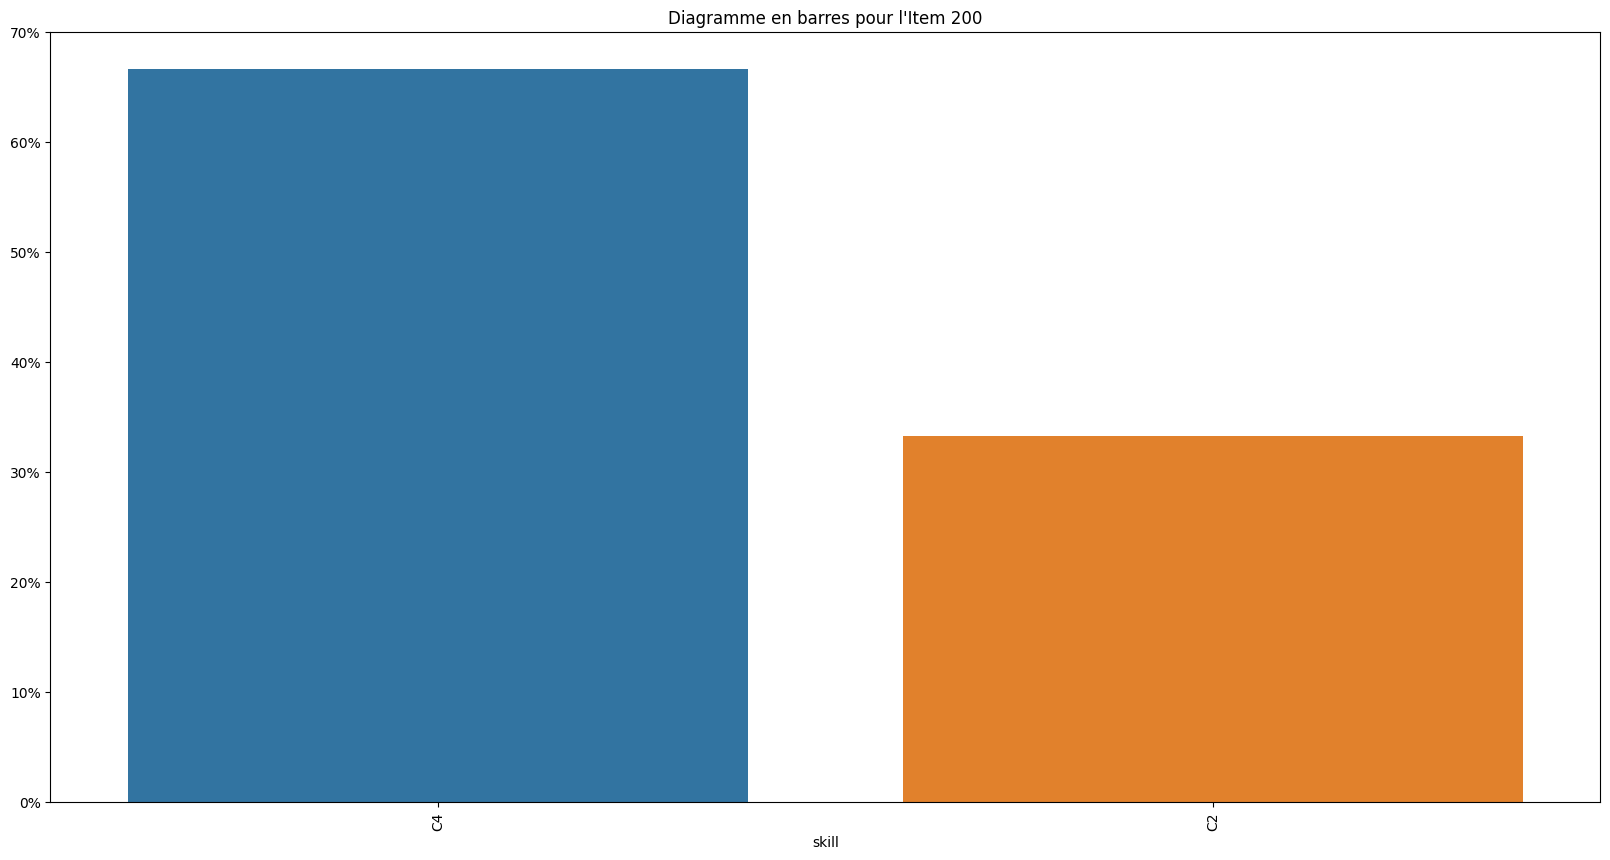

Item 200
skill      C4   C2
ecn_item          
Item 200  2.0  1.0


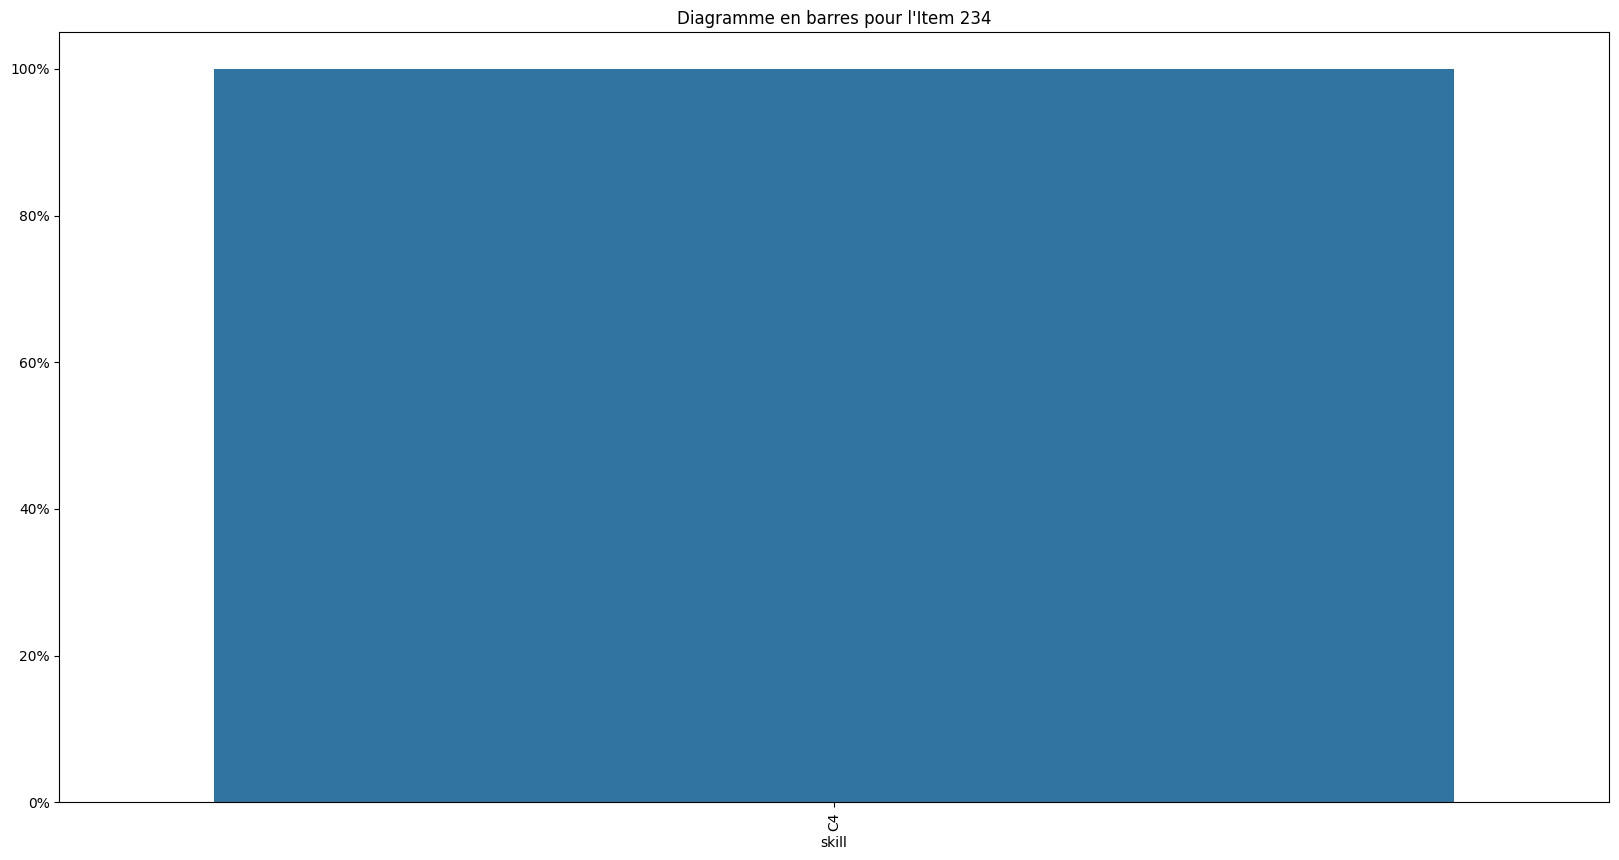

Item 234
skill      C4
ecn_item     
Item 234  3.0


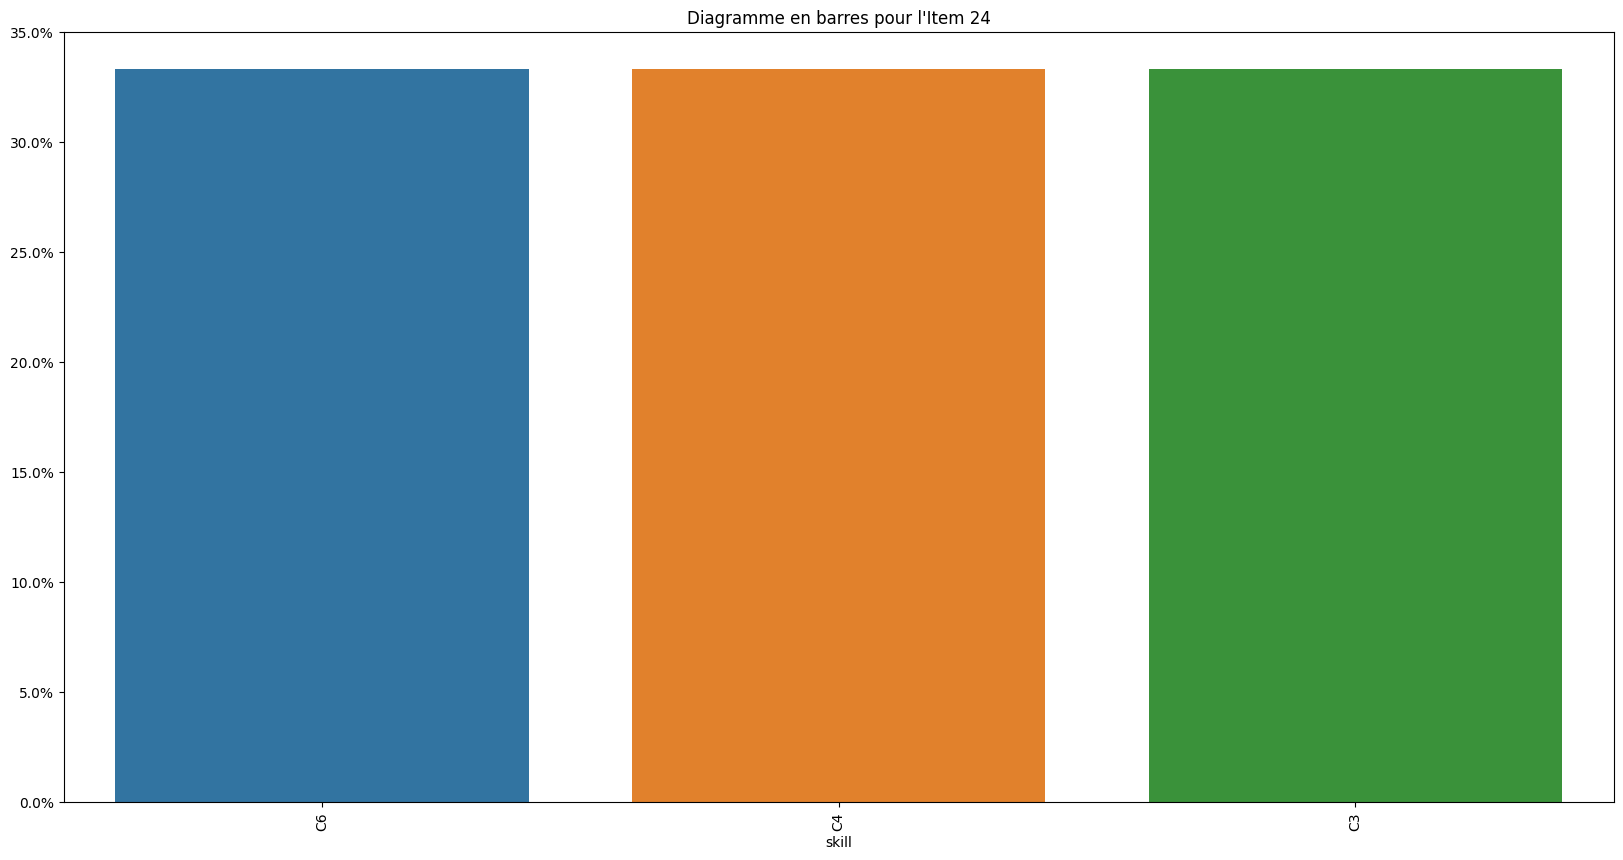

Item 24
skill      C6   C4   C3
ecn_item               
Item 24   1.0  1.0  1.0


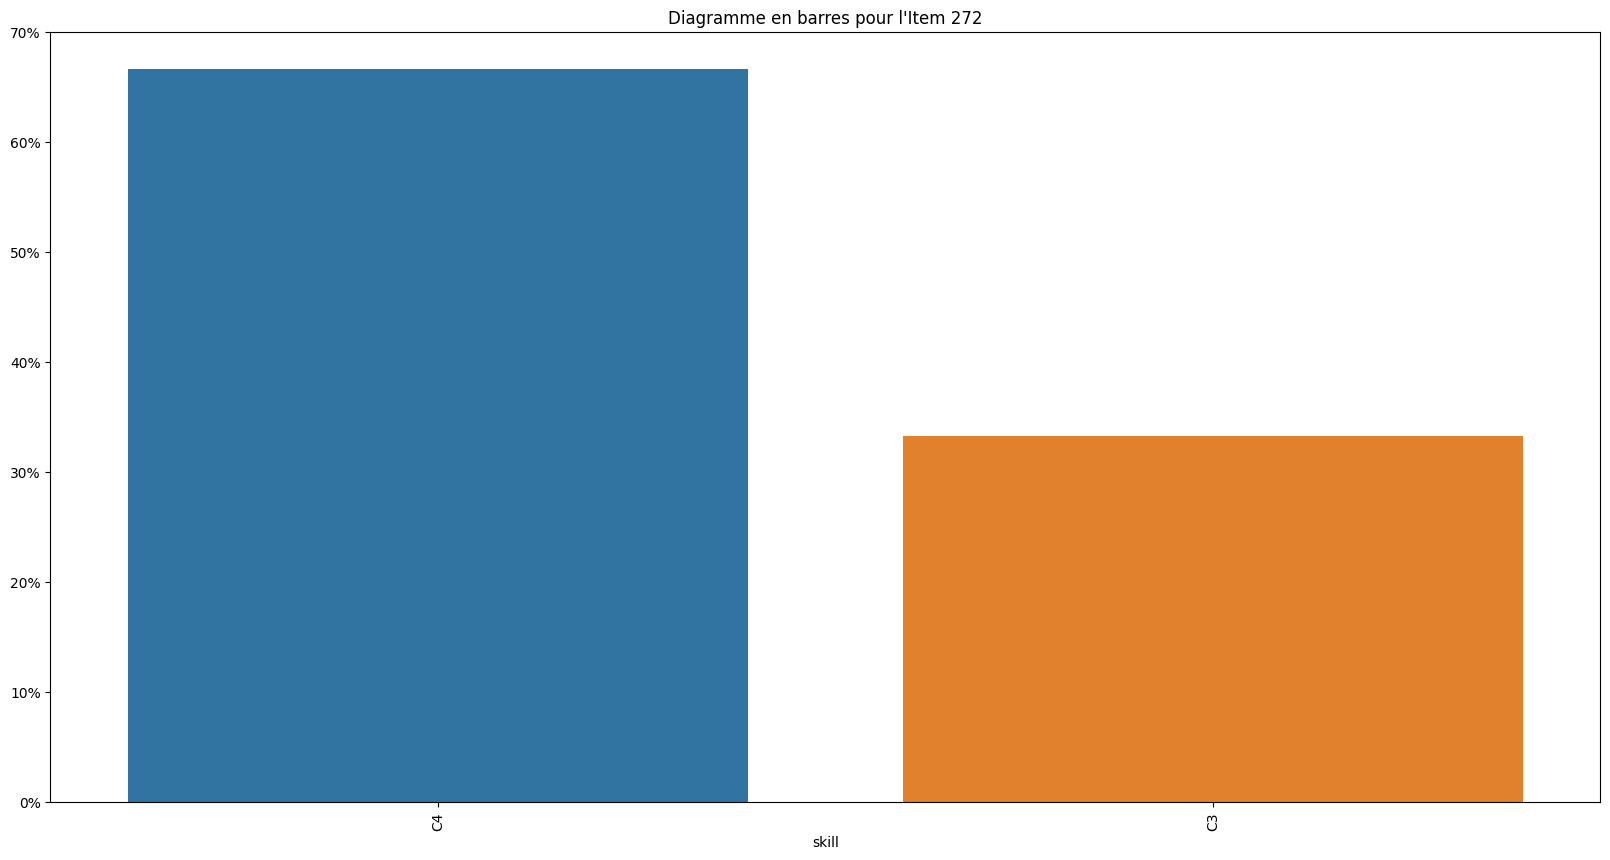

Item 272
skill      C4   C3
ecn_item          
Item 272  2.0  1.0


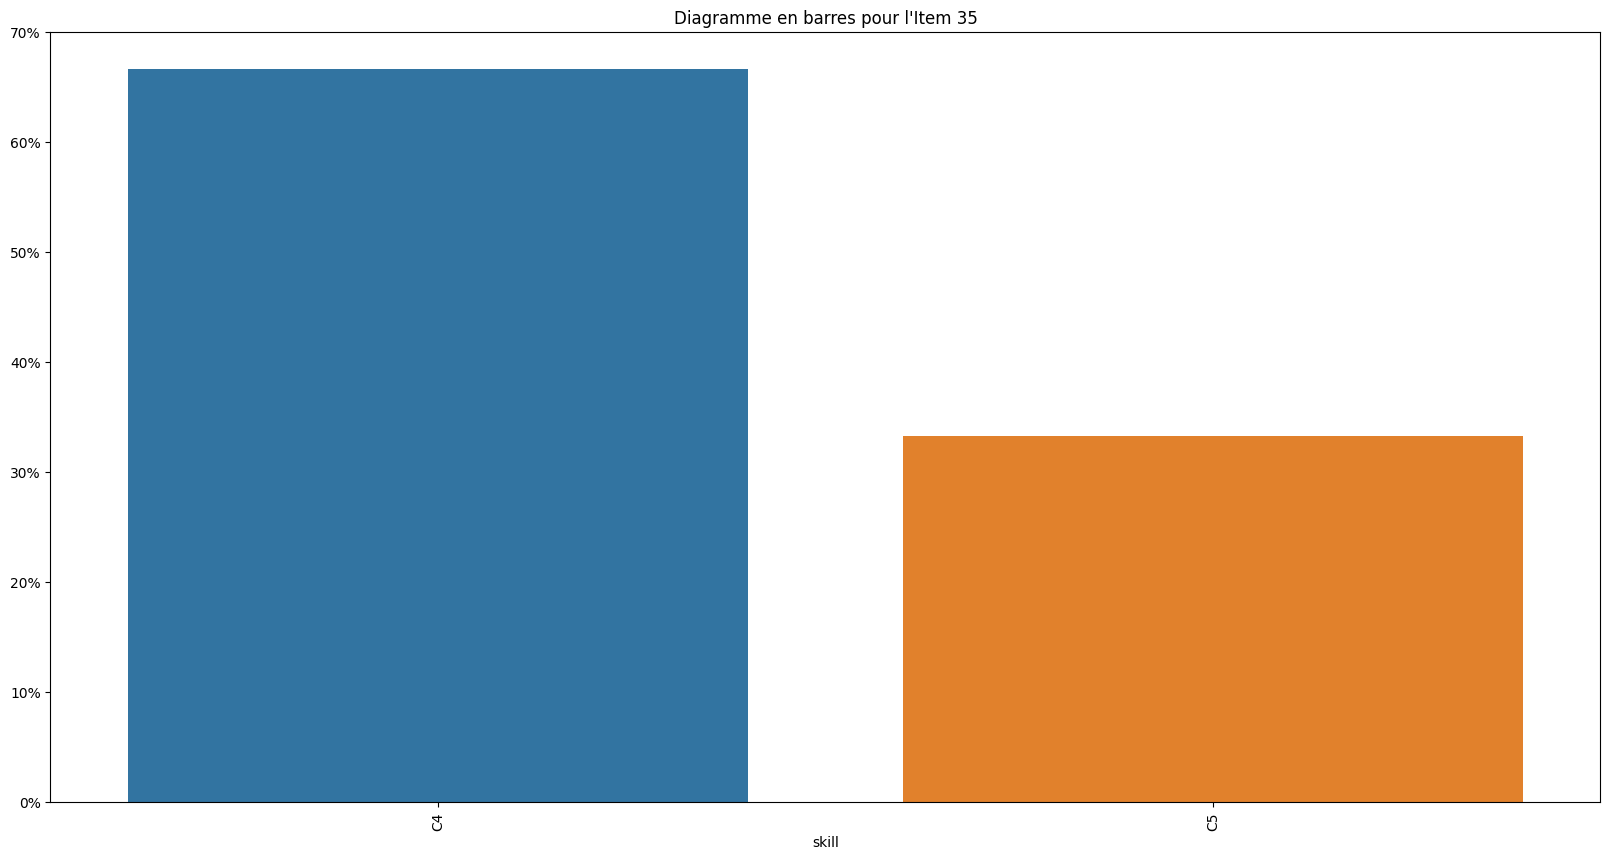

Item 35
skill      C4   C5
ecn_item          
Item 35   2.0  1.0


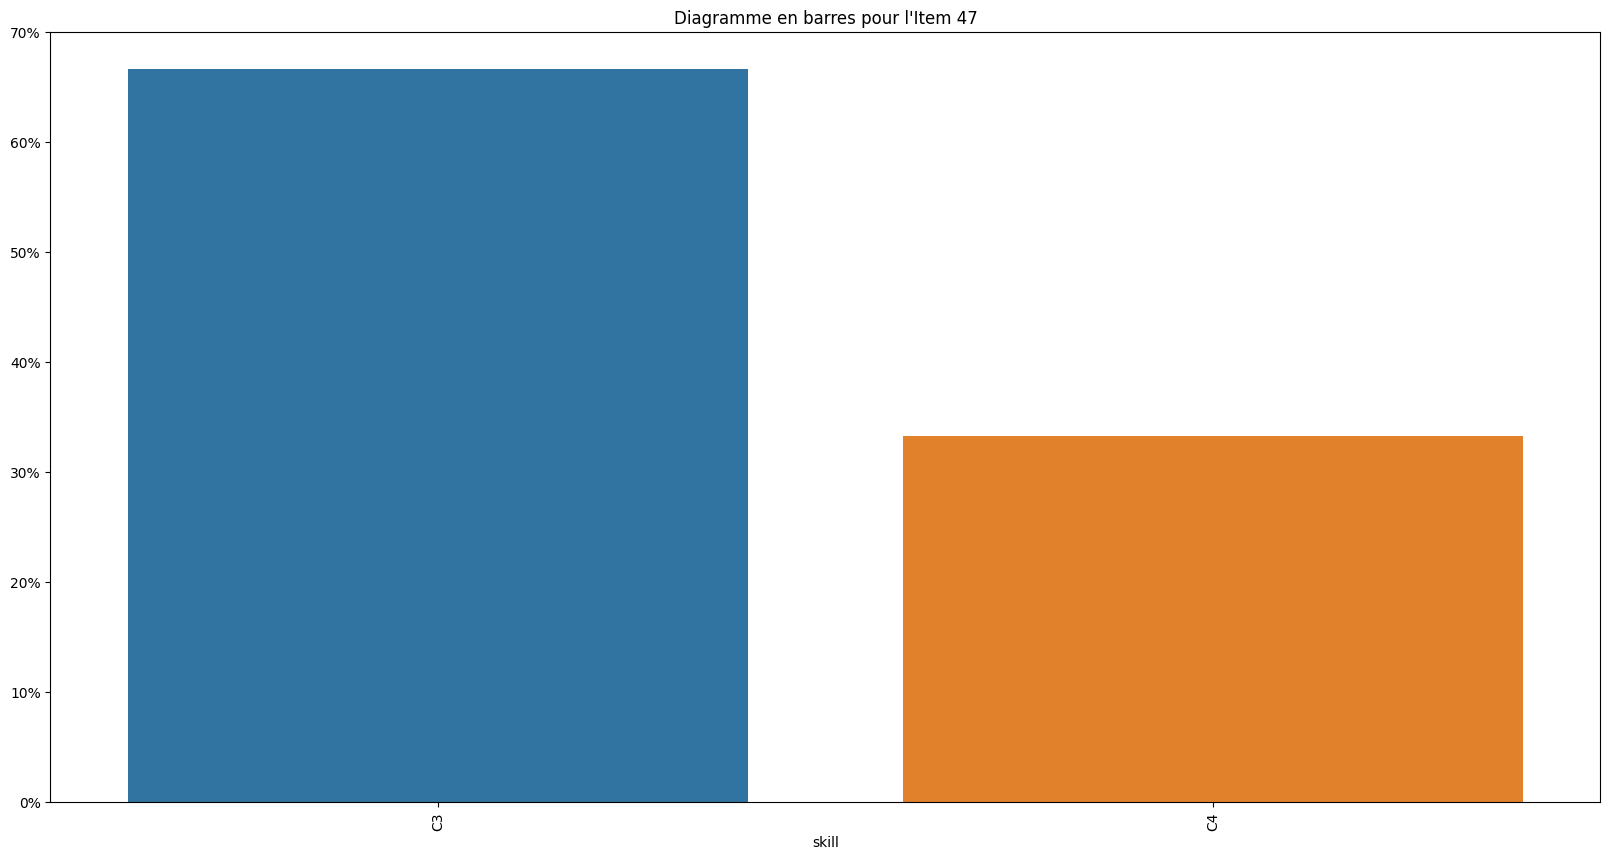

Item 47
skill      C3   C4
ecn_item          
Item 47   2.0  1.0


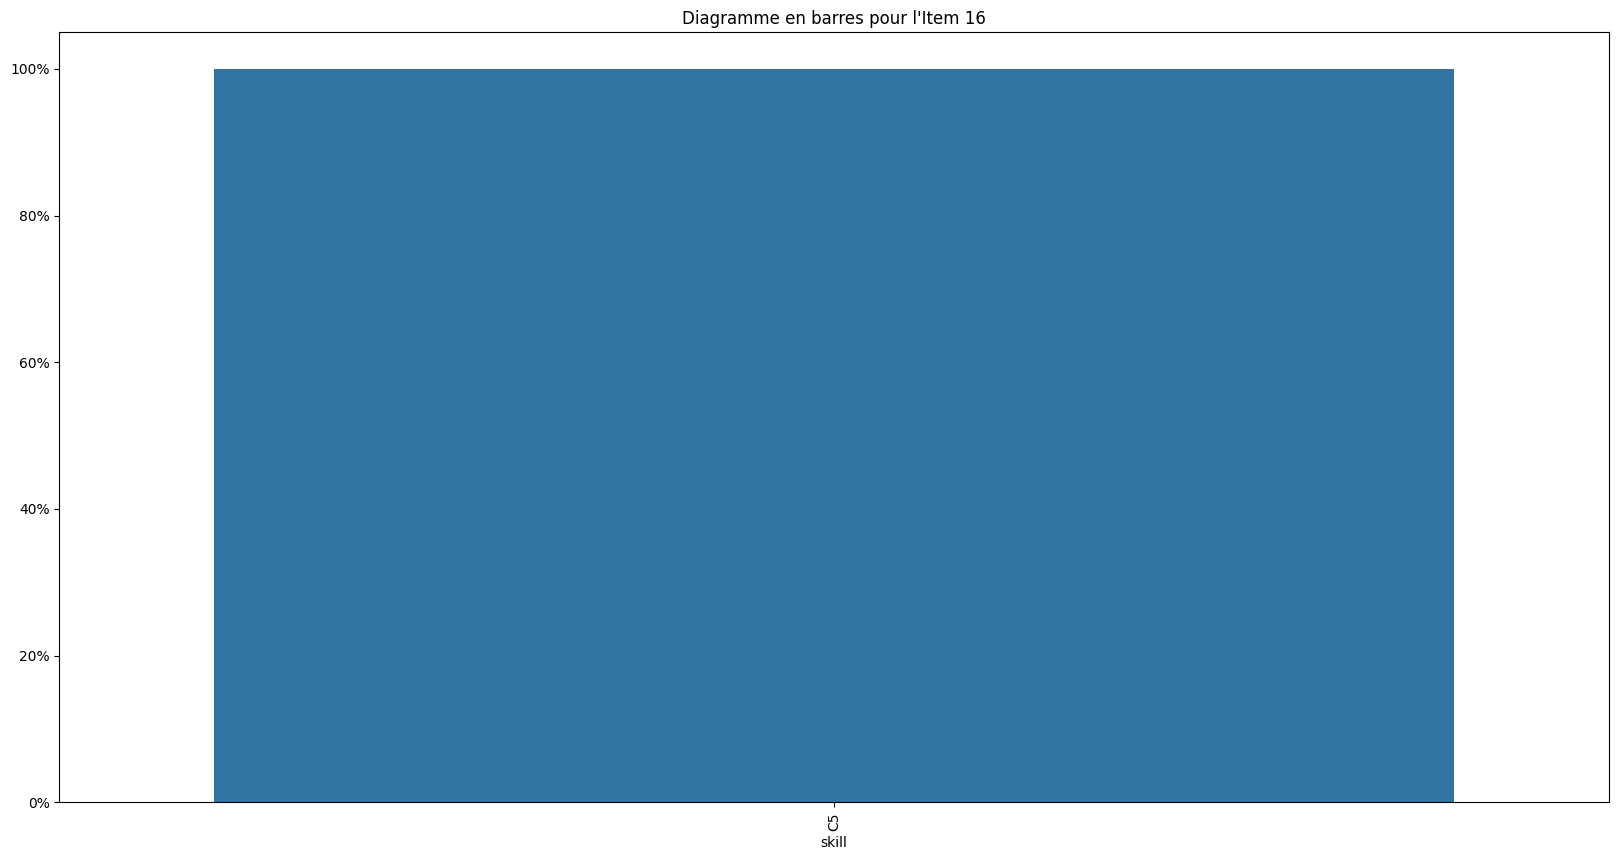

Item 16
skill      C5
ecn_item     
Item 16   3.0


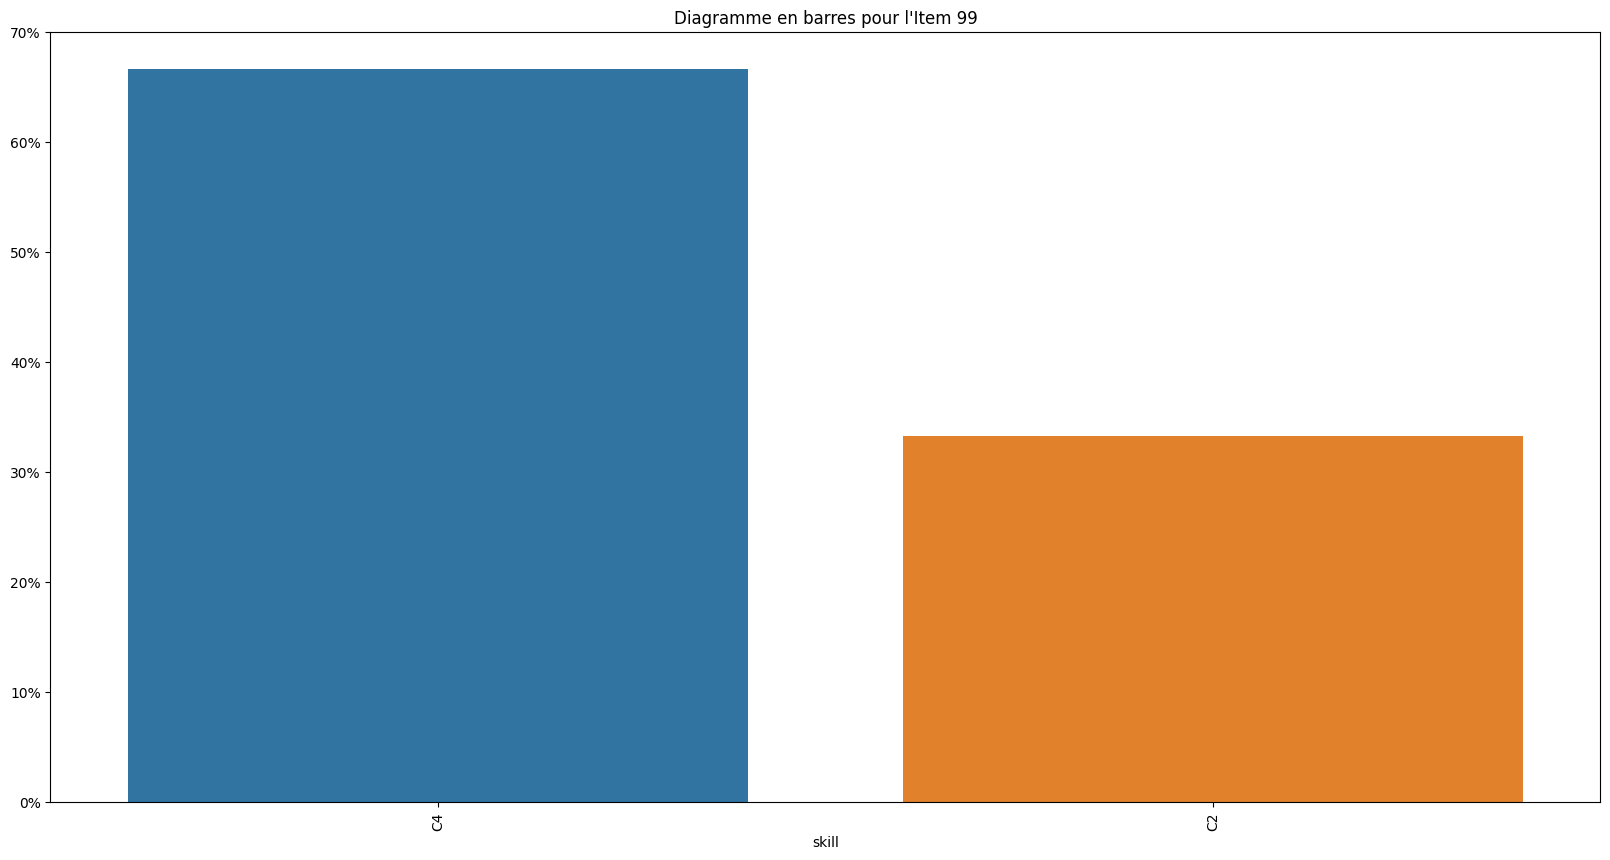

Item 99
skill      C4   C2
ecn_item          
Item 99   2.0  1.0


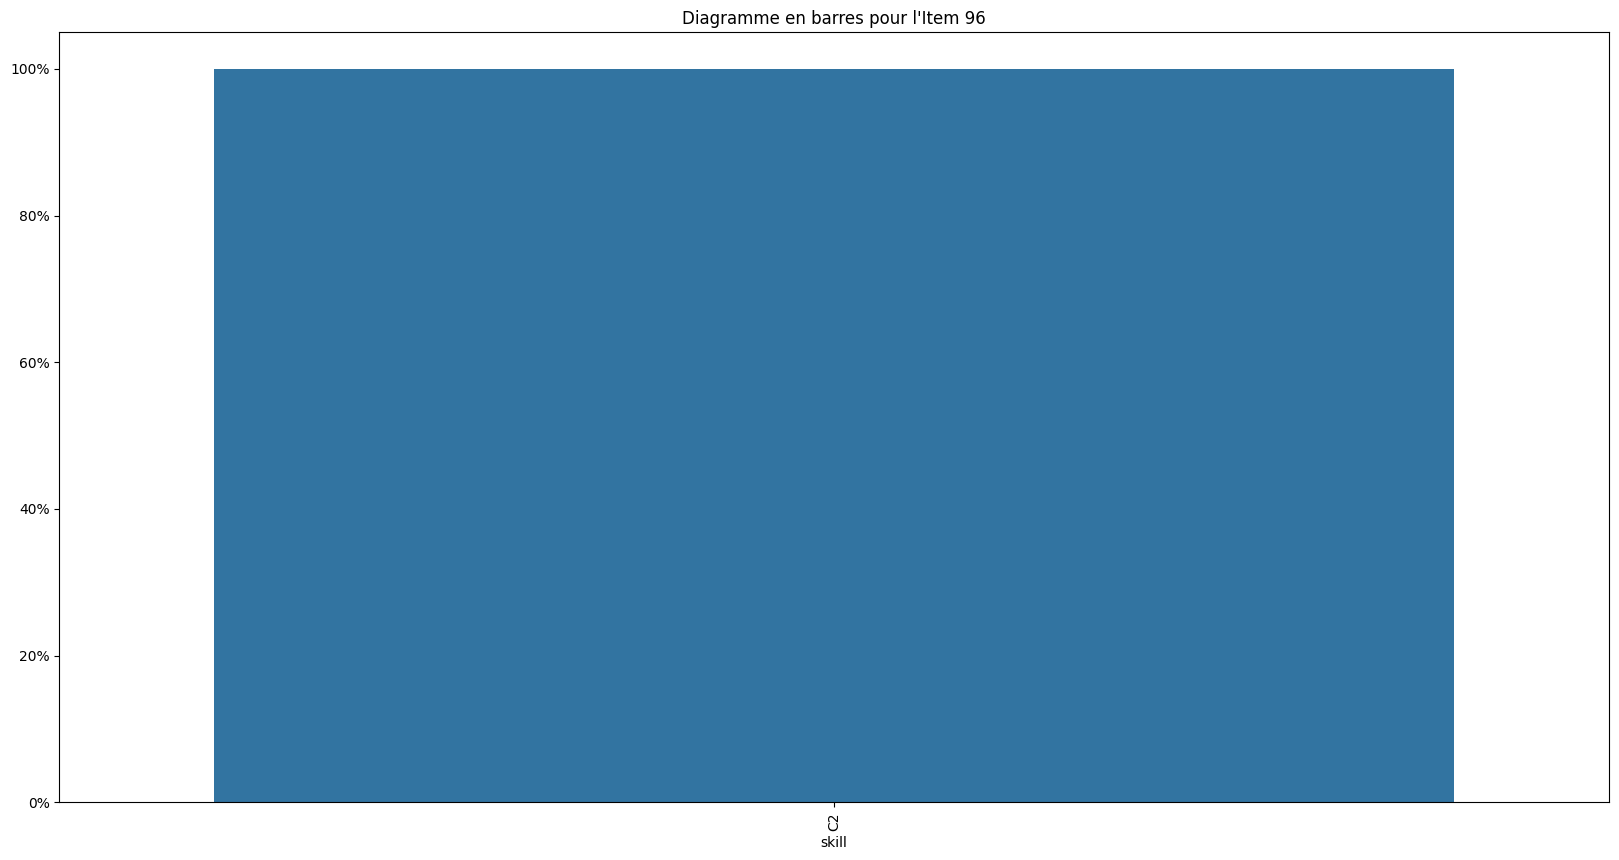

Item 96
skill      C2
ecn_item     
Item 96   3.0


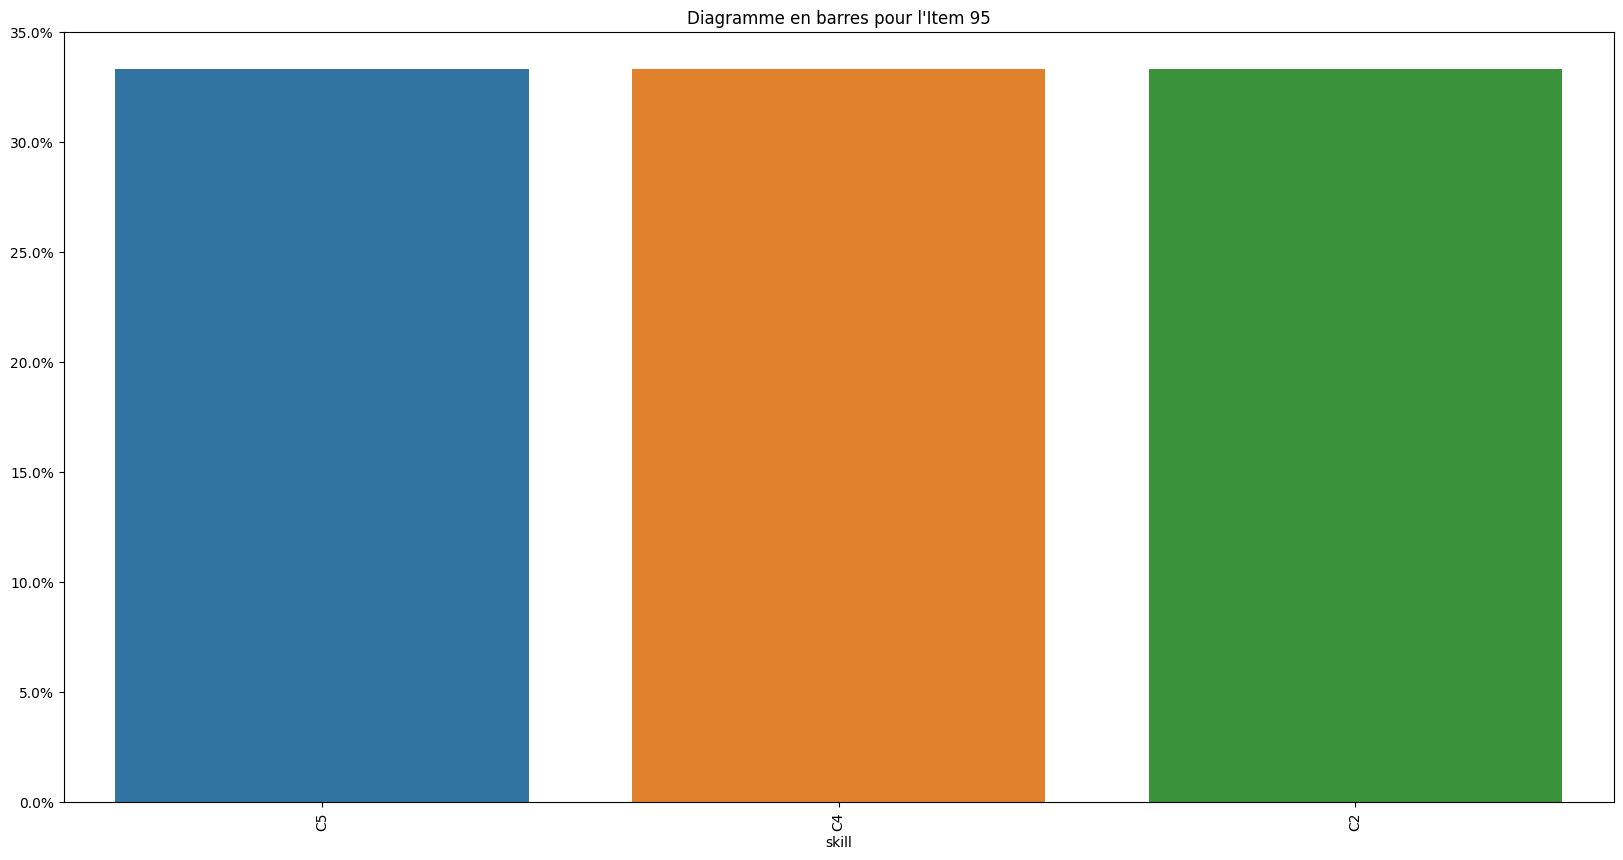

Item 95
skill      C5   C4   C2
ecn_item               
Item 95   1.0  1.0  1.0


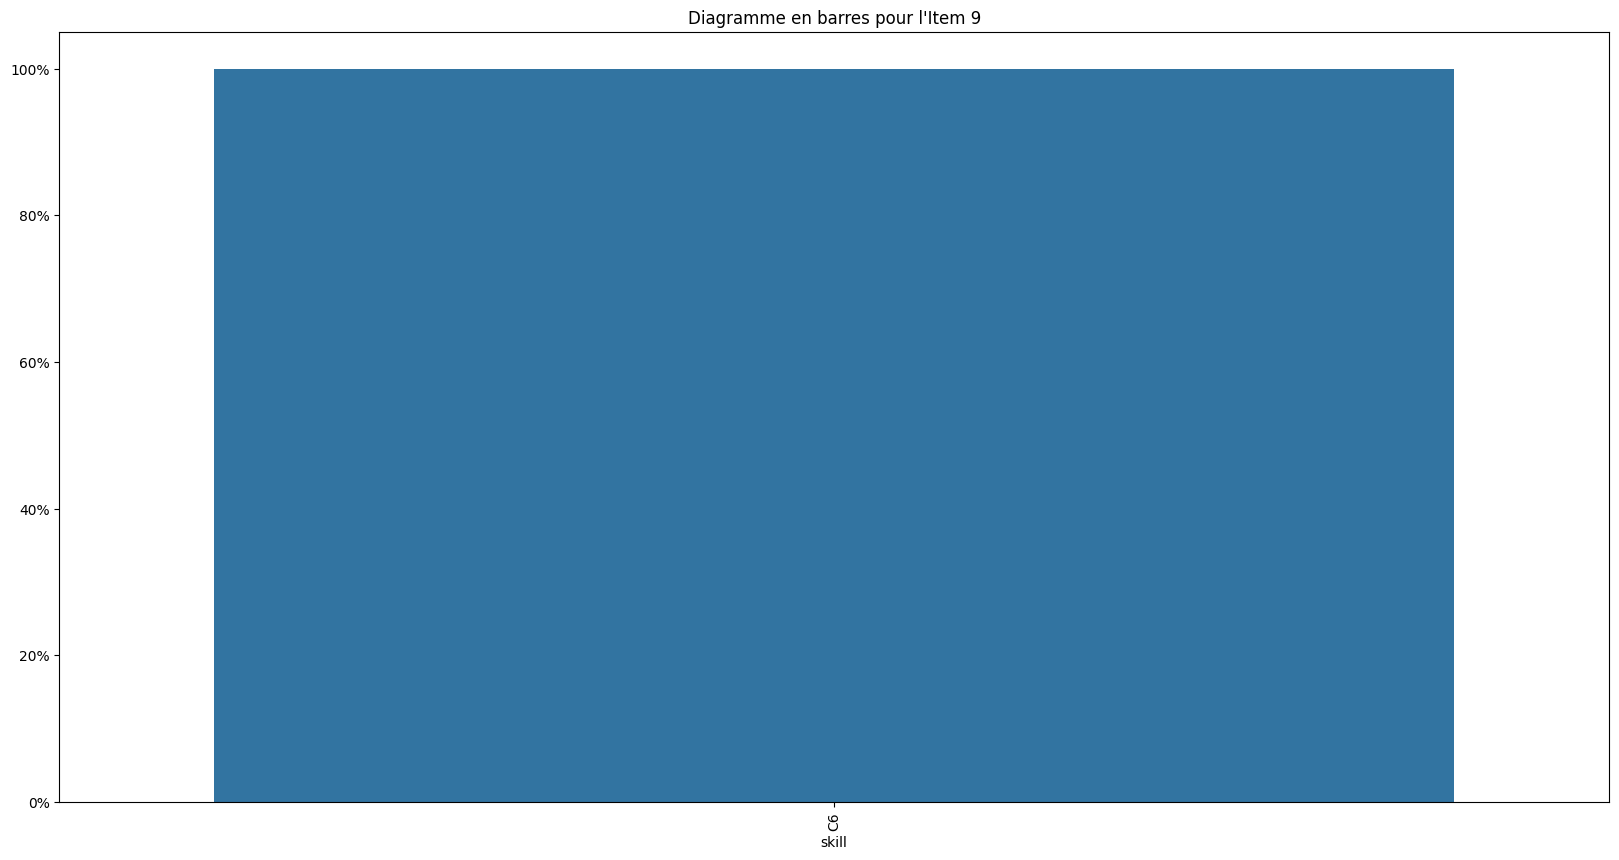

Item 9
skill      C6
ecn_item     
Item 9    3.0


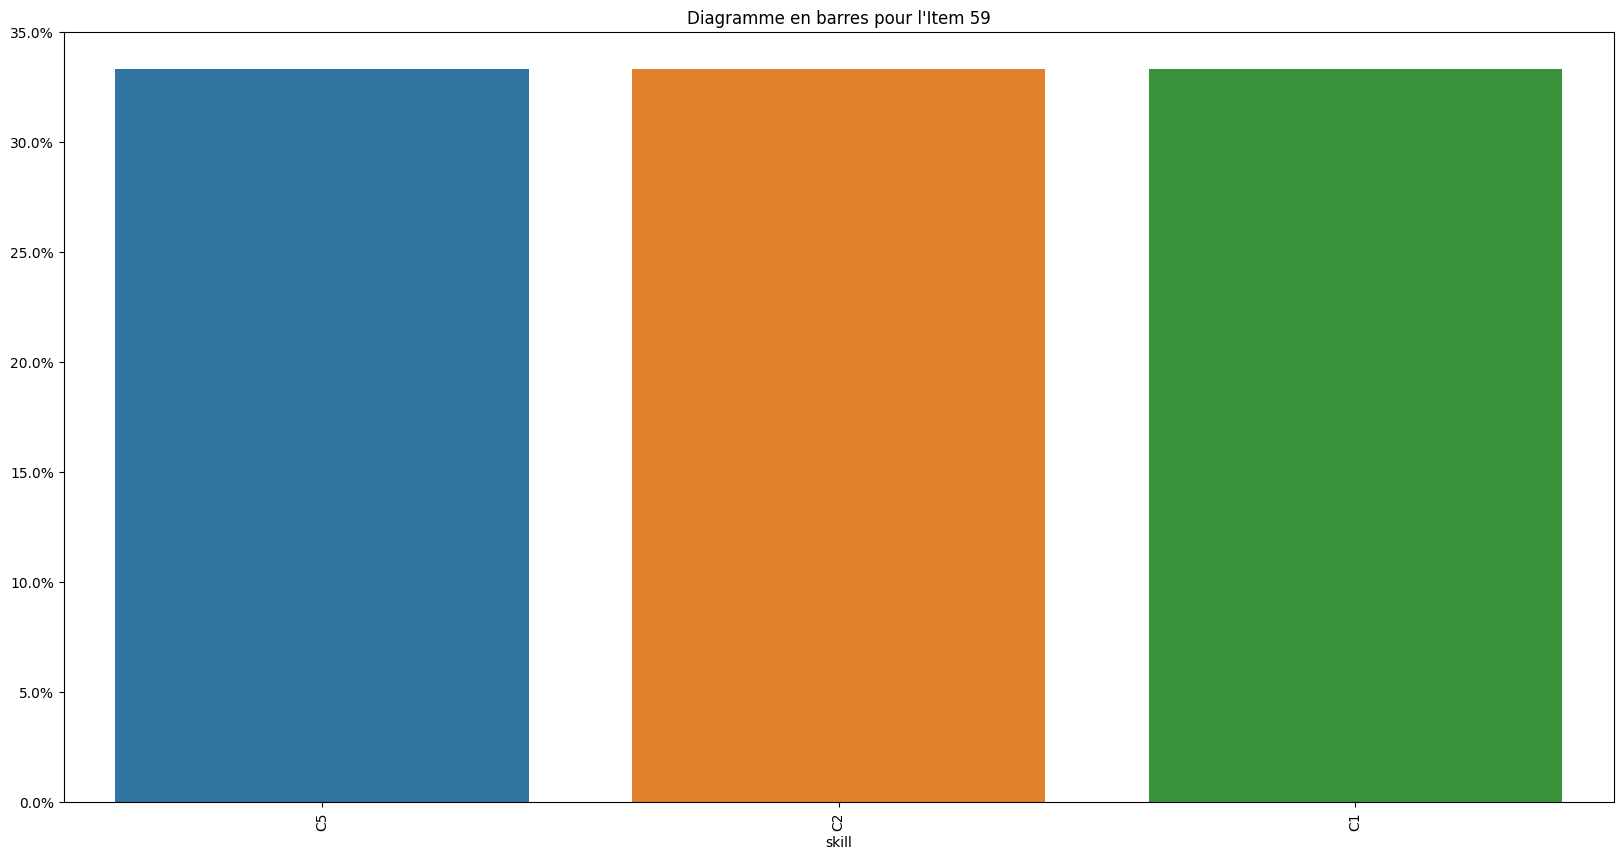

Item 59
skill      C5   C2   C1
ecn_item               
Item 59   1.0  1.0  1.0


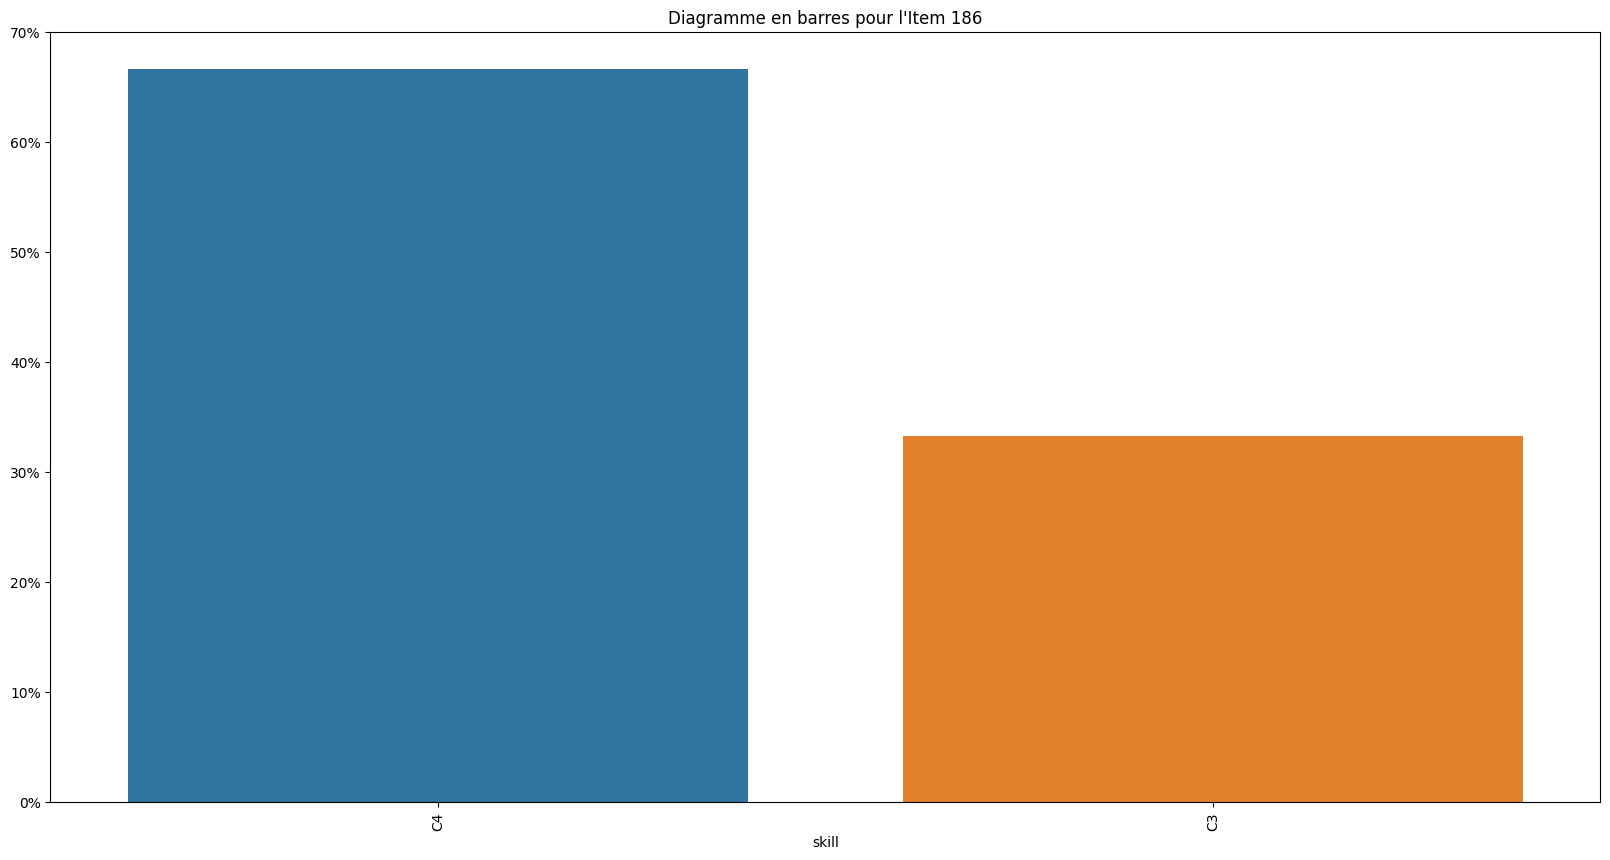

Item 186
skill      C4   C3
ecn_item          
Item 186  2.0  1.0


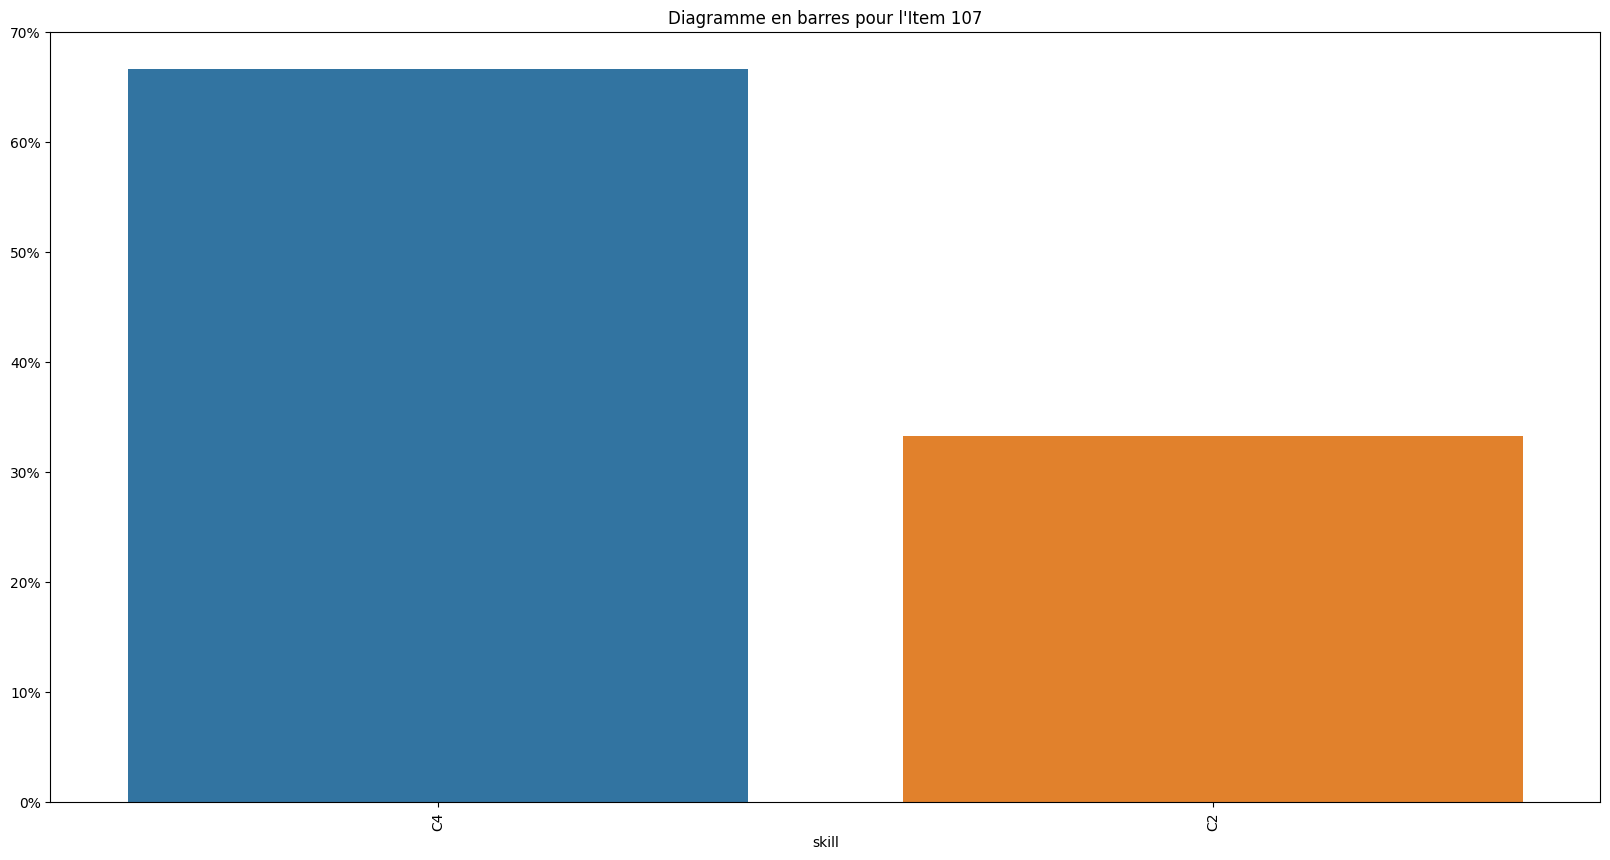

Item 107
skill      C4   C2
ecn_item          
Item 107  2.0  1.0


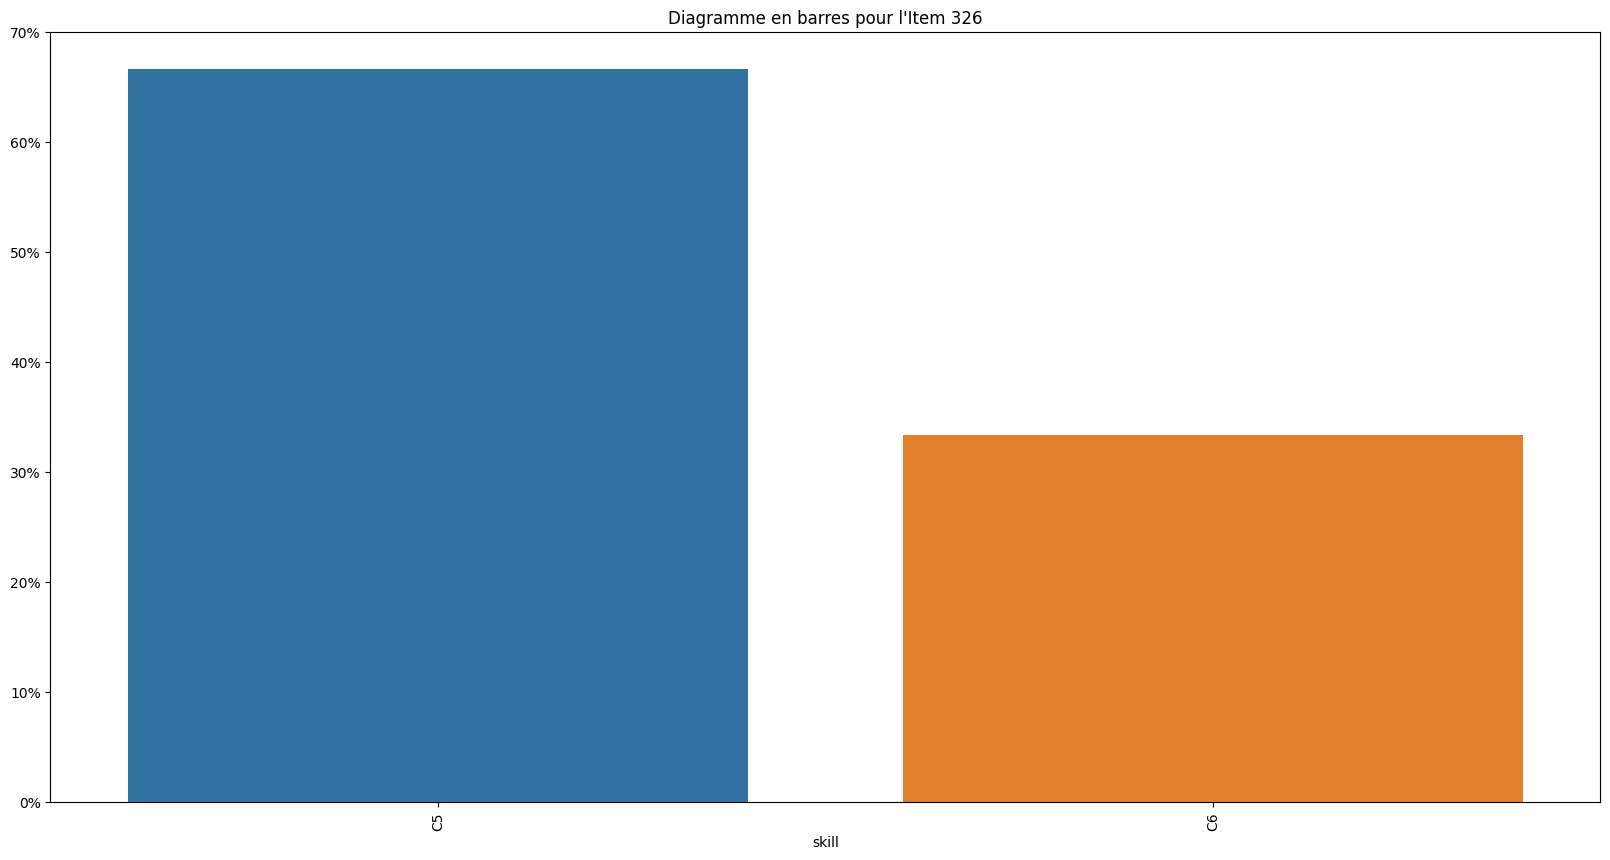

Item 326
skill      C5   C6
ecn_item          
Item 326  2.0  1.0


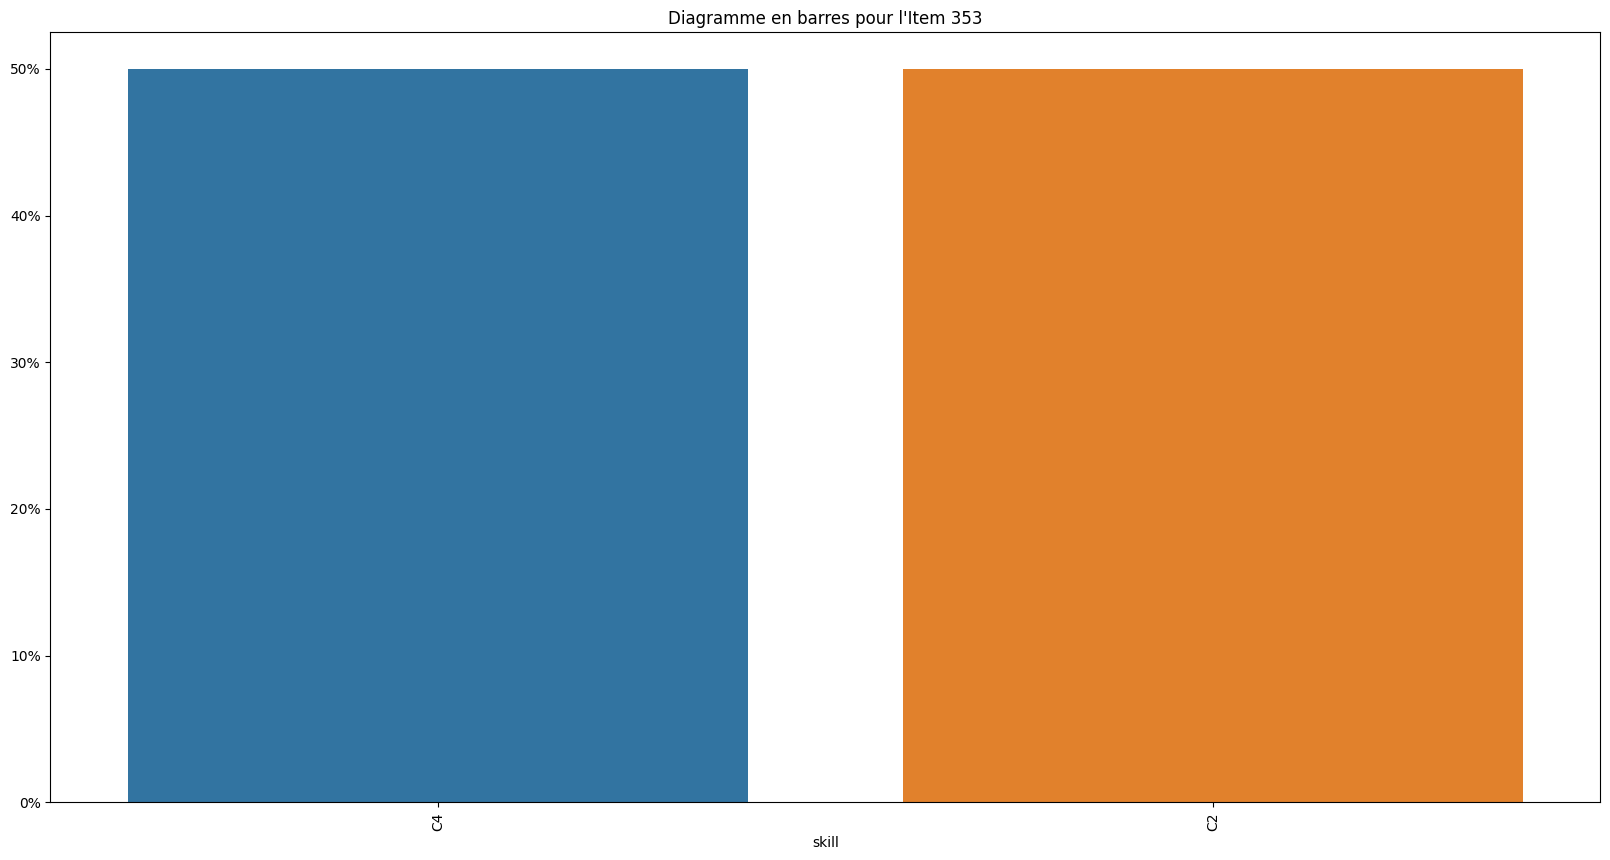

Item 353
skill      C4   C2
ecn_item          
Item 353  1.0  1.0


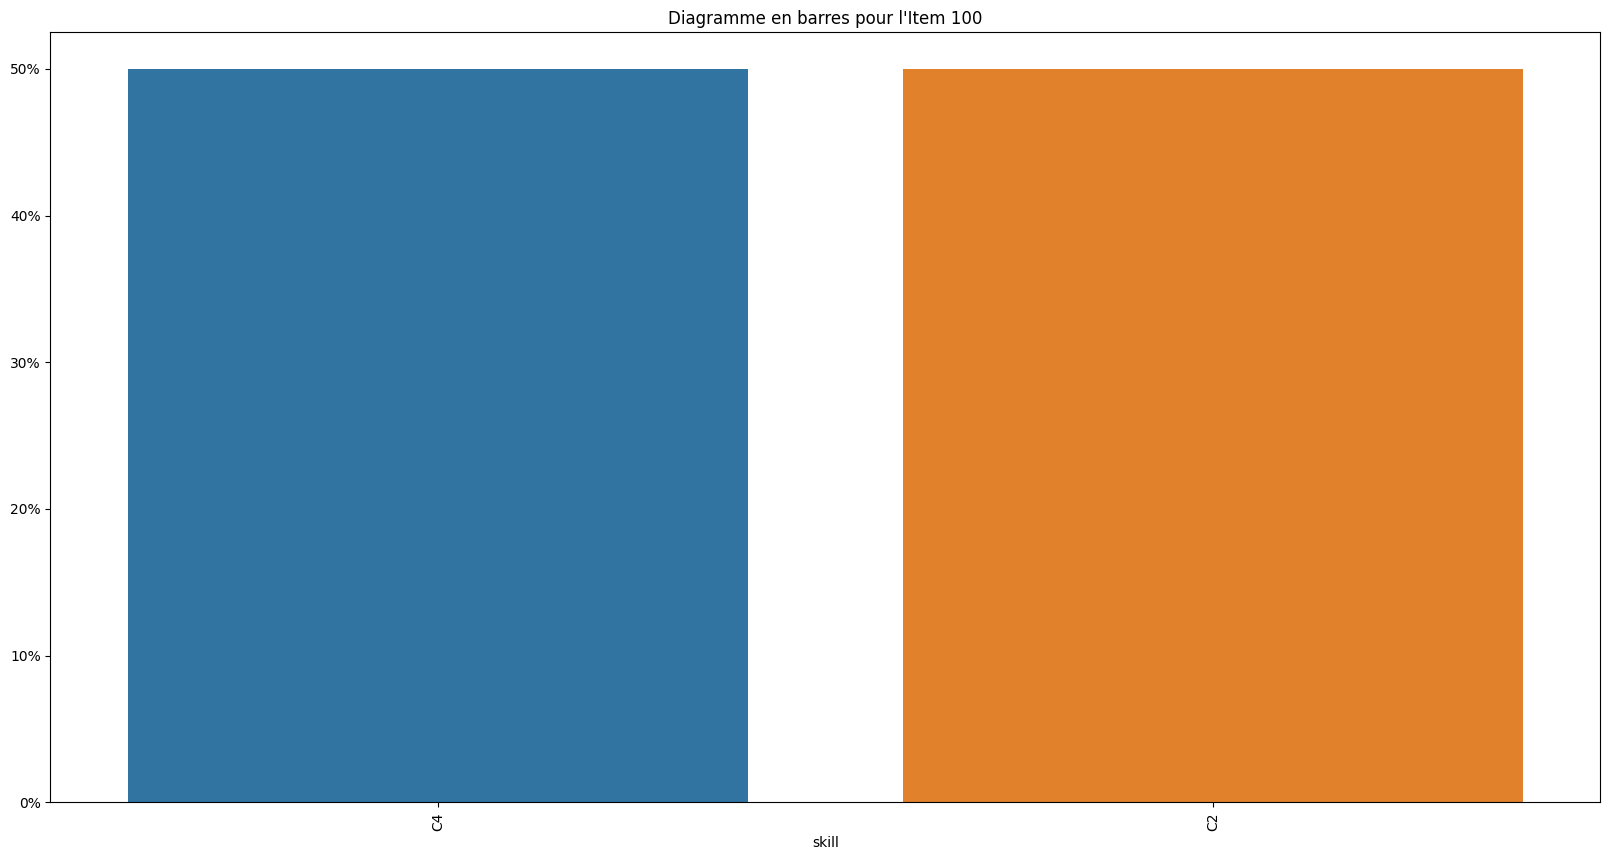

Item 100
skill      C4   C2
ecn_item          
Item 100  1.0  1.0


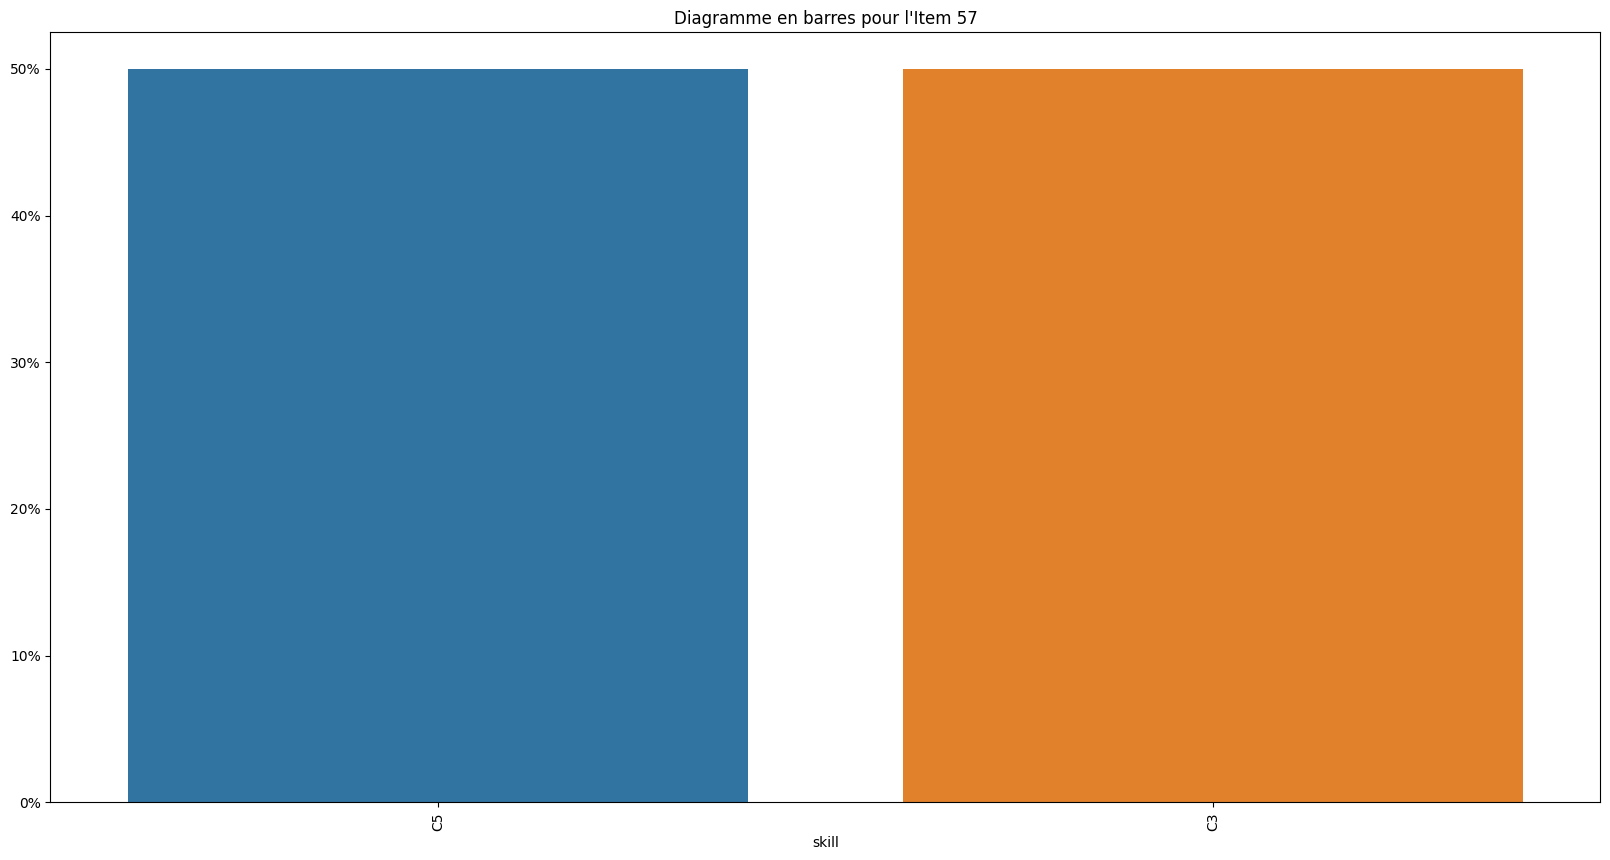

Item 57
skill      C5   C3
ecn_item          
Item 57   1.0  1.0


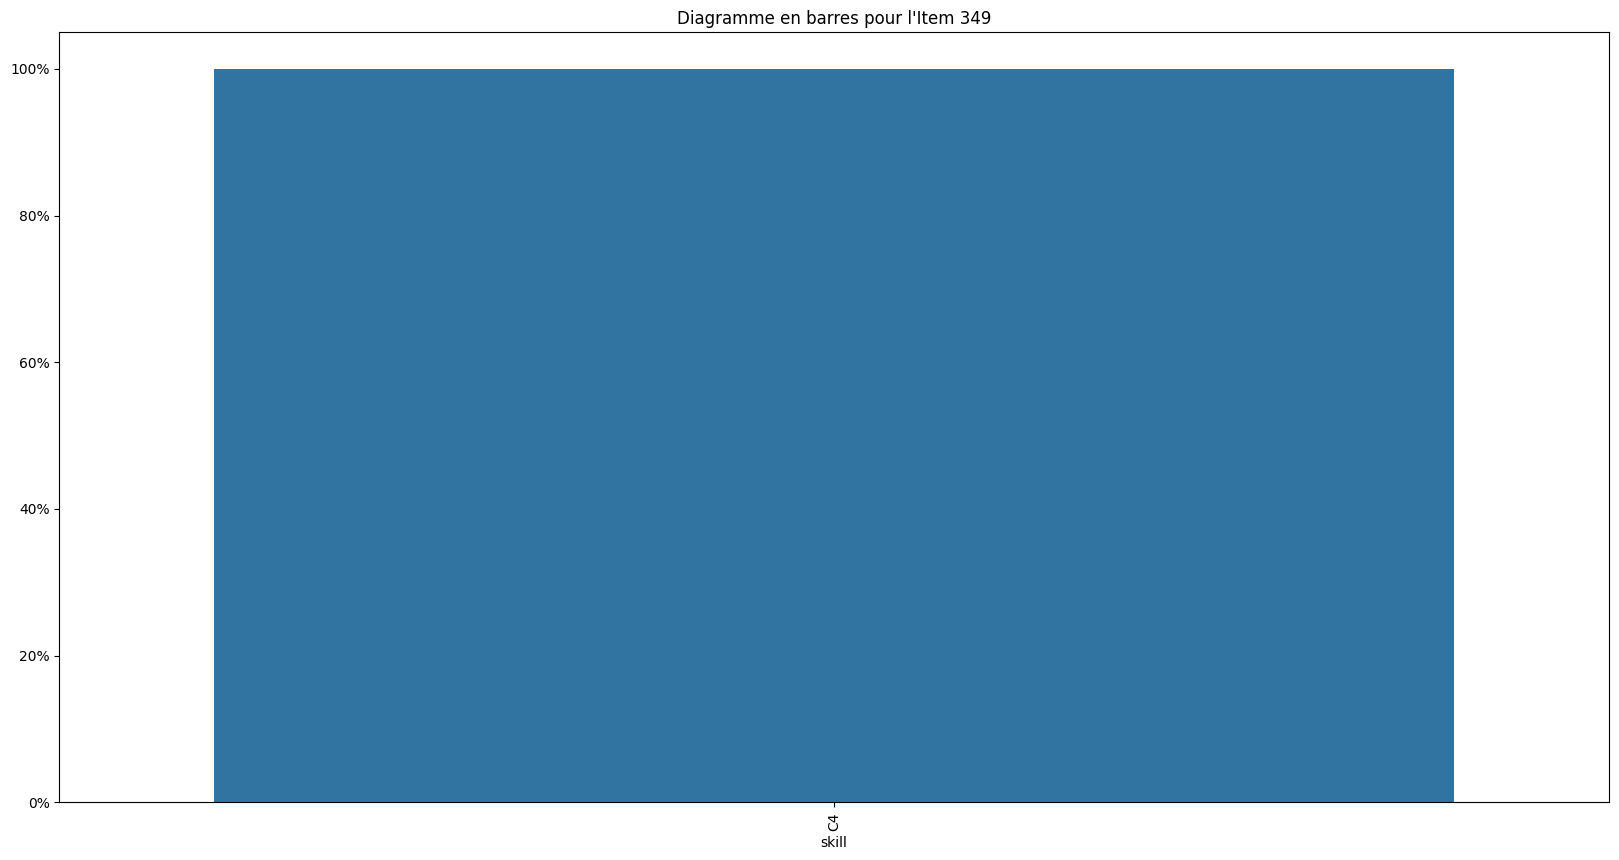

Item 349
skill      C4
ecn_item     
Item 349  2.0


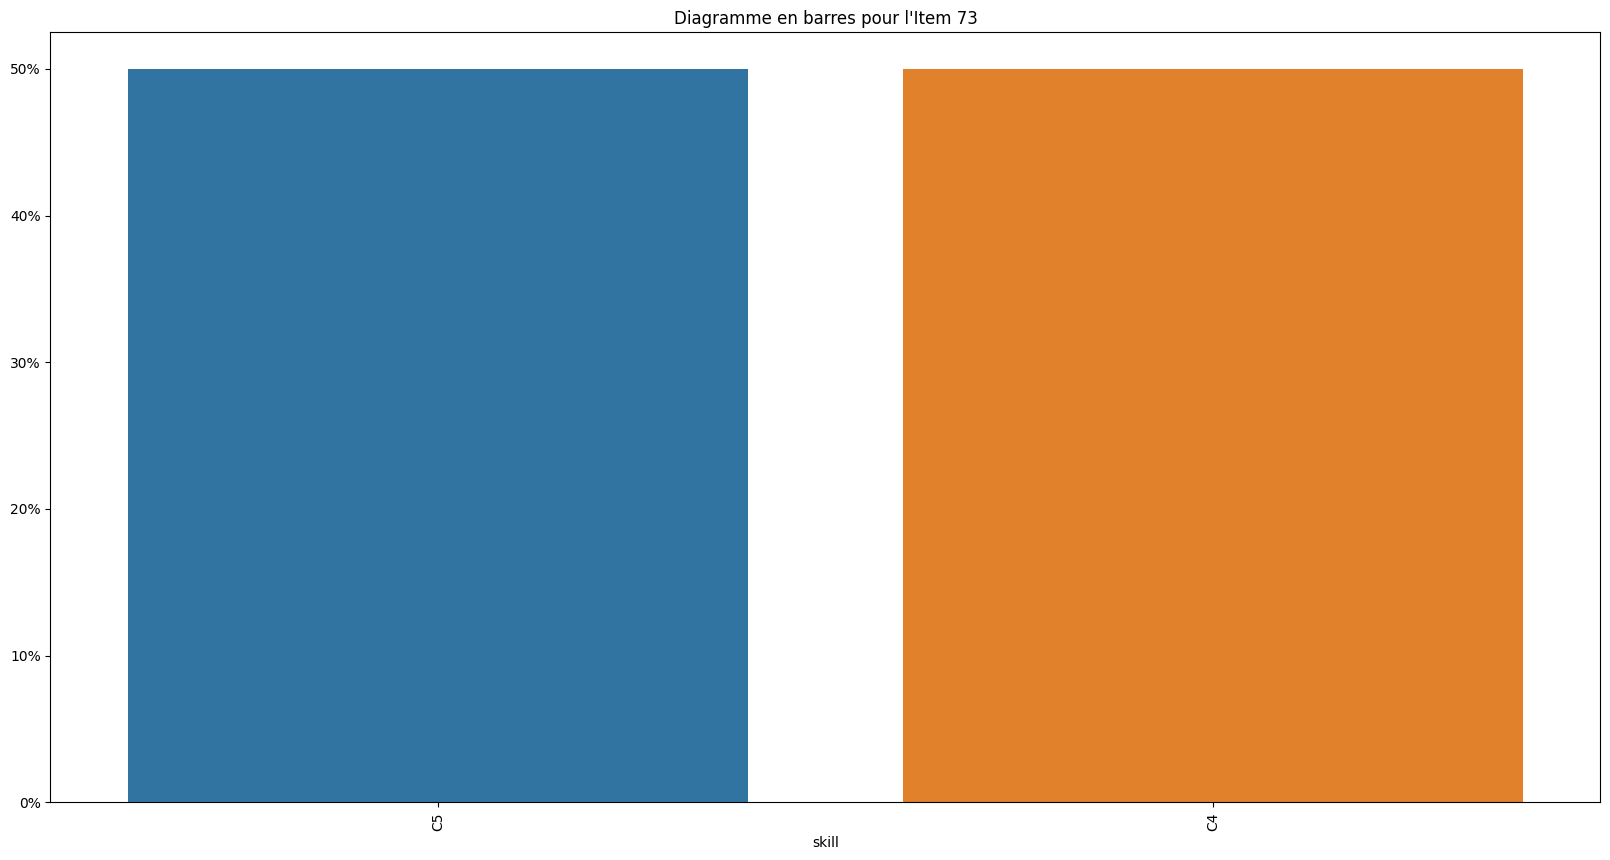

Item 73
skill      C5   C4
ecn_item          
Item 73   1.0  1.0


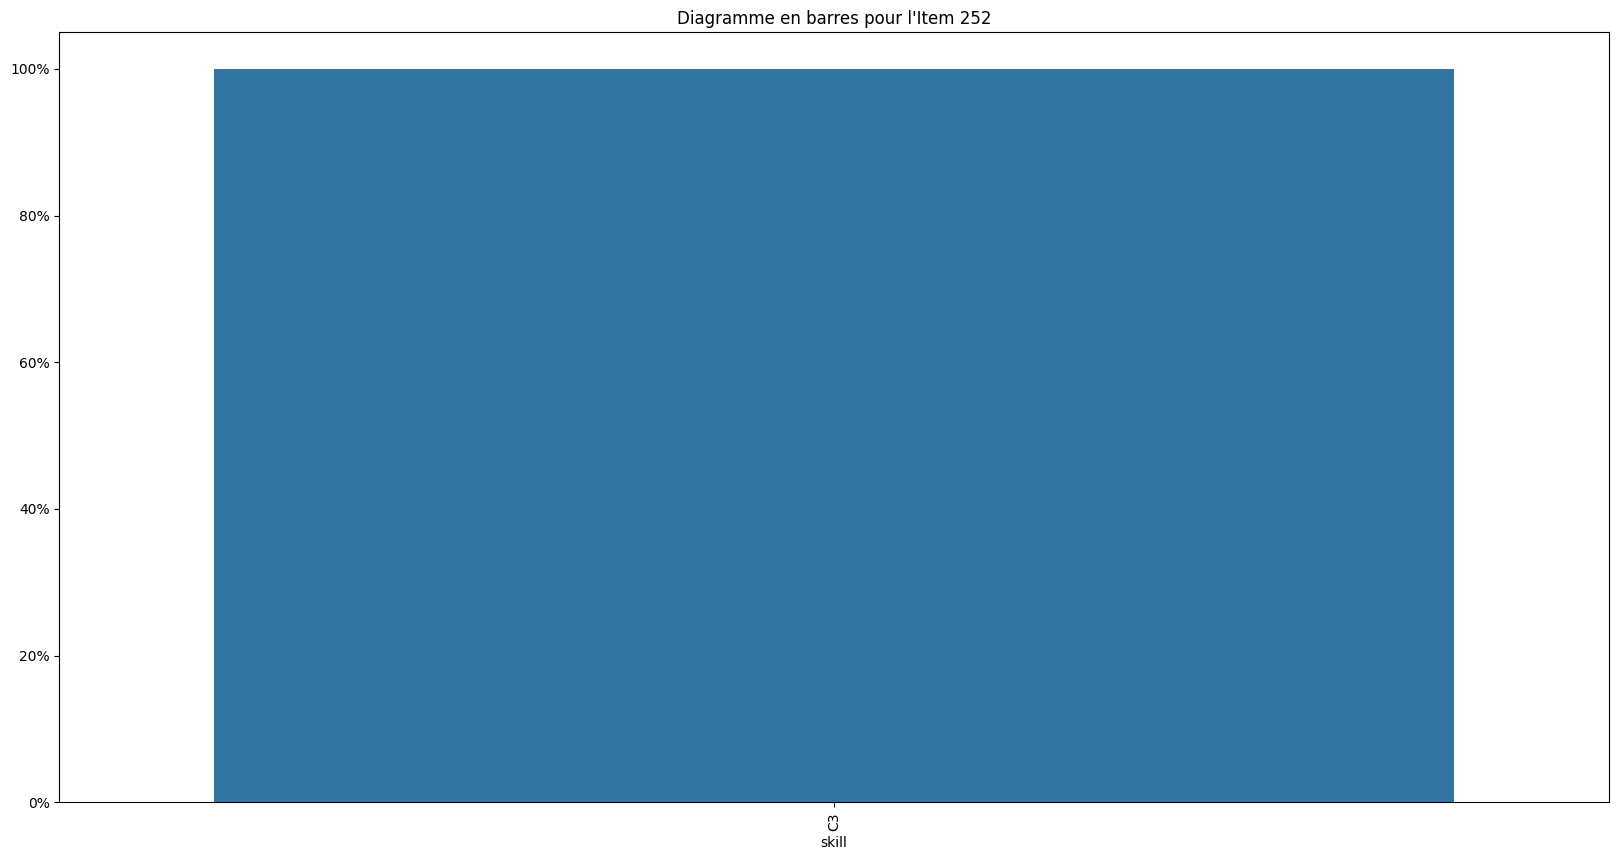

Item 252
skill      C3
ecn_item     
Item 252  2.0


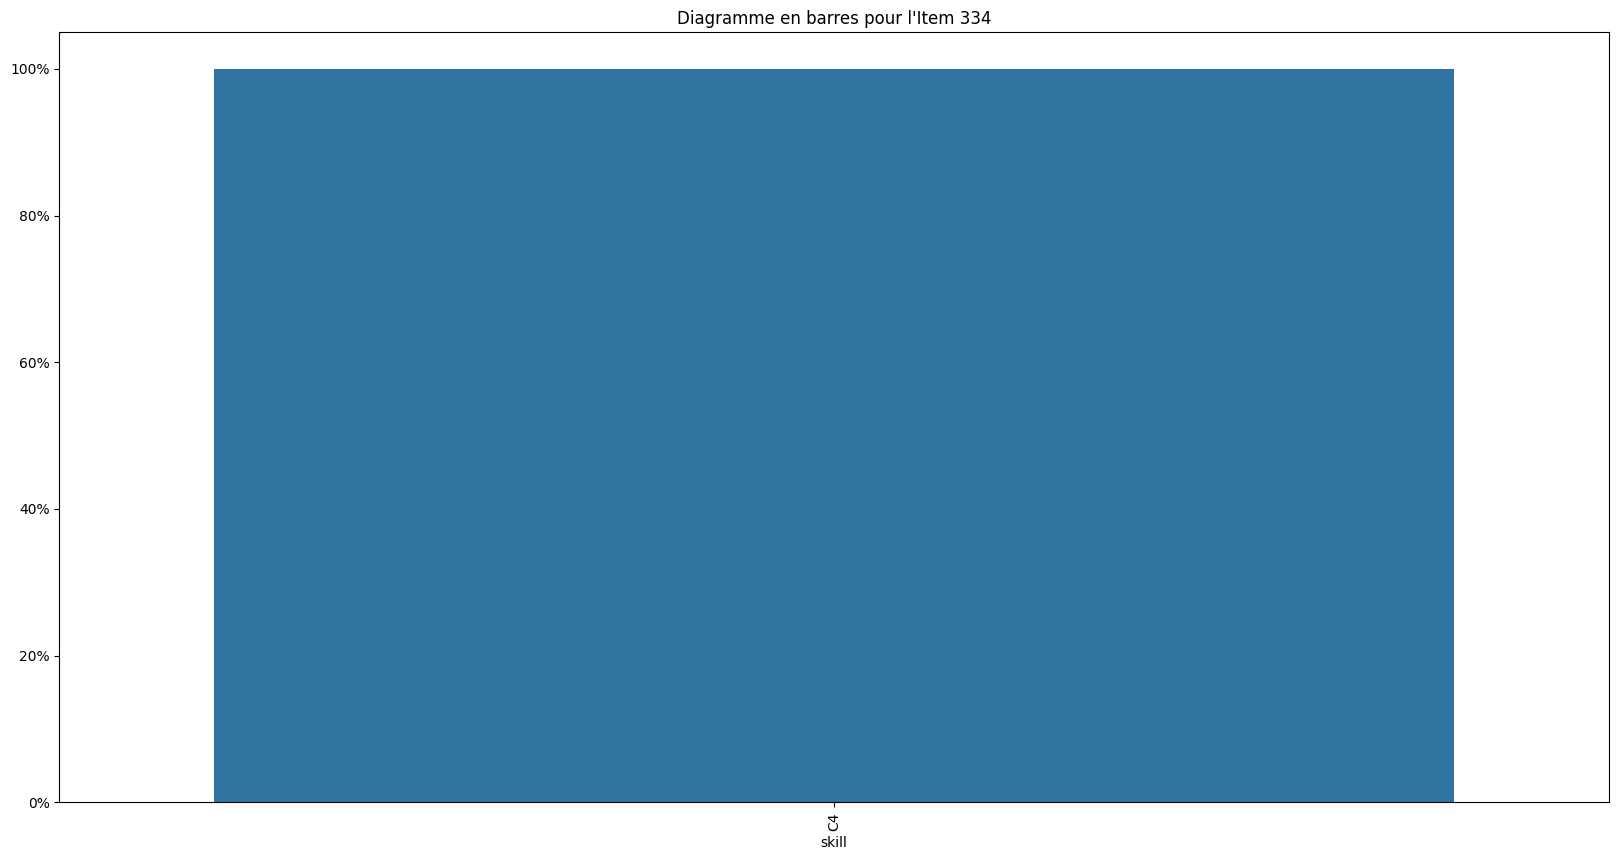

Item 334
skill      C4
ecn_item     
Item 334  2.0


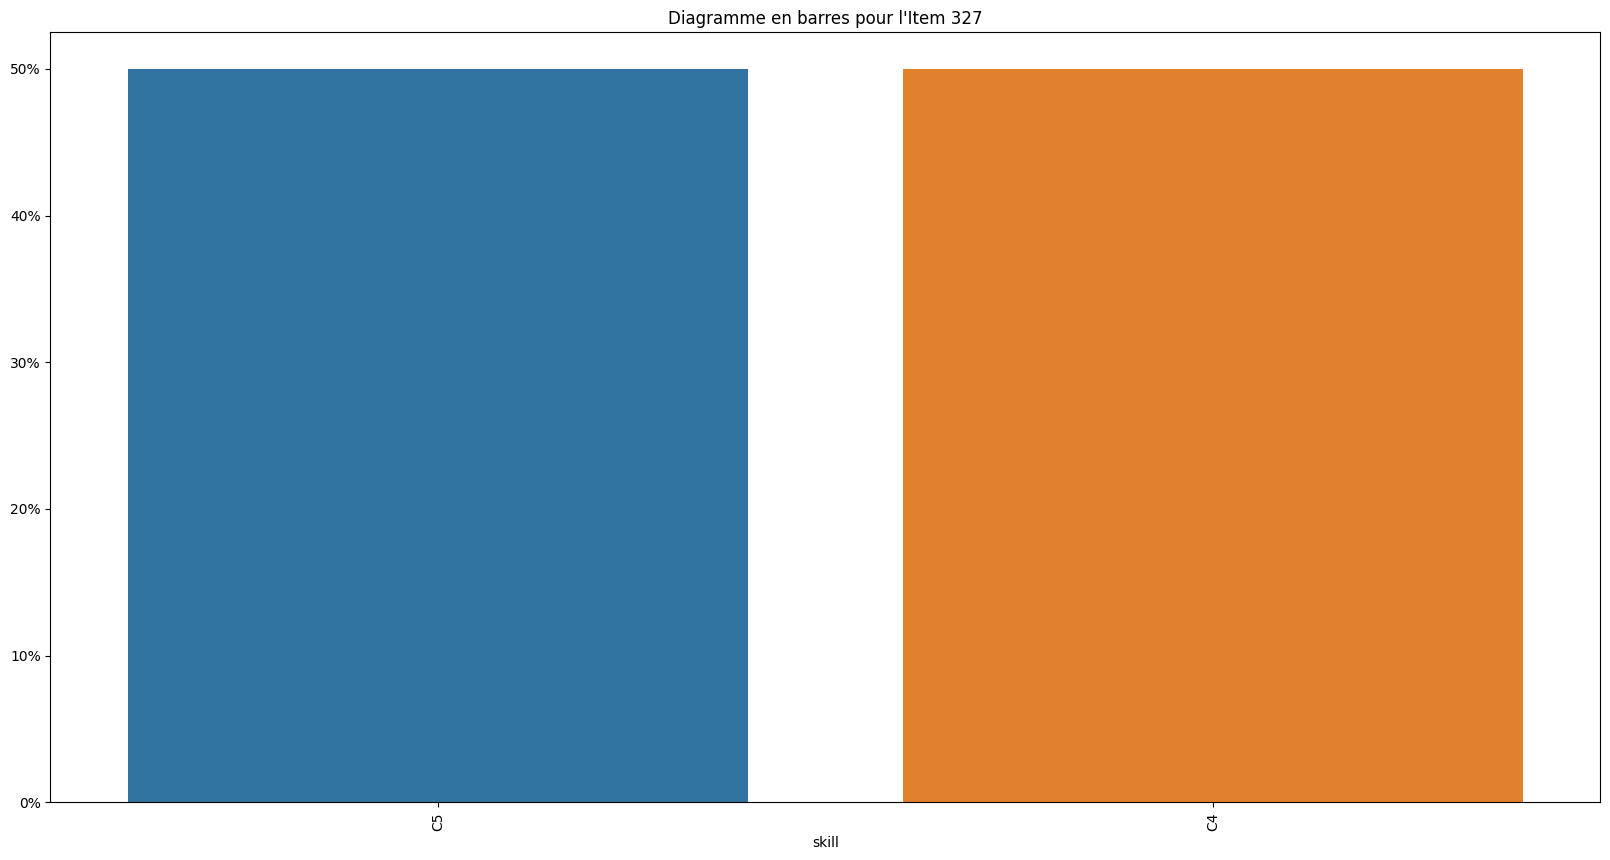

Item 327
skill      C5   C4
ecn_item          
Item 327  1.0  1.0


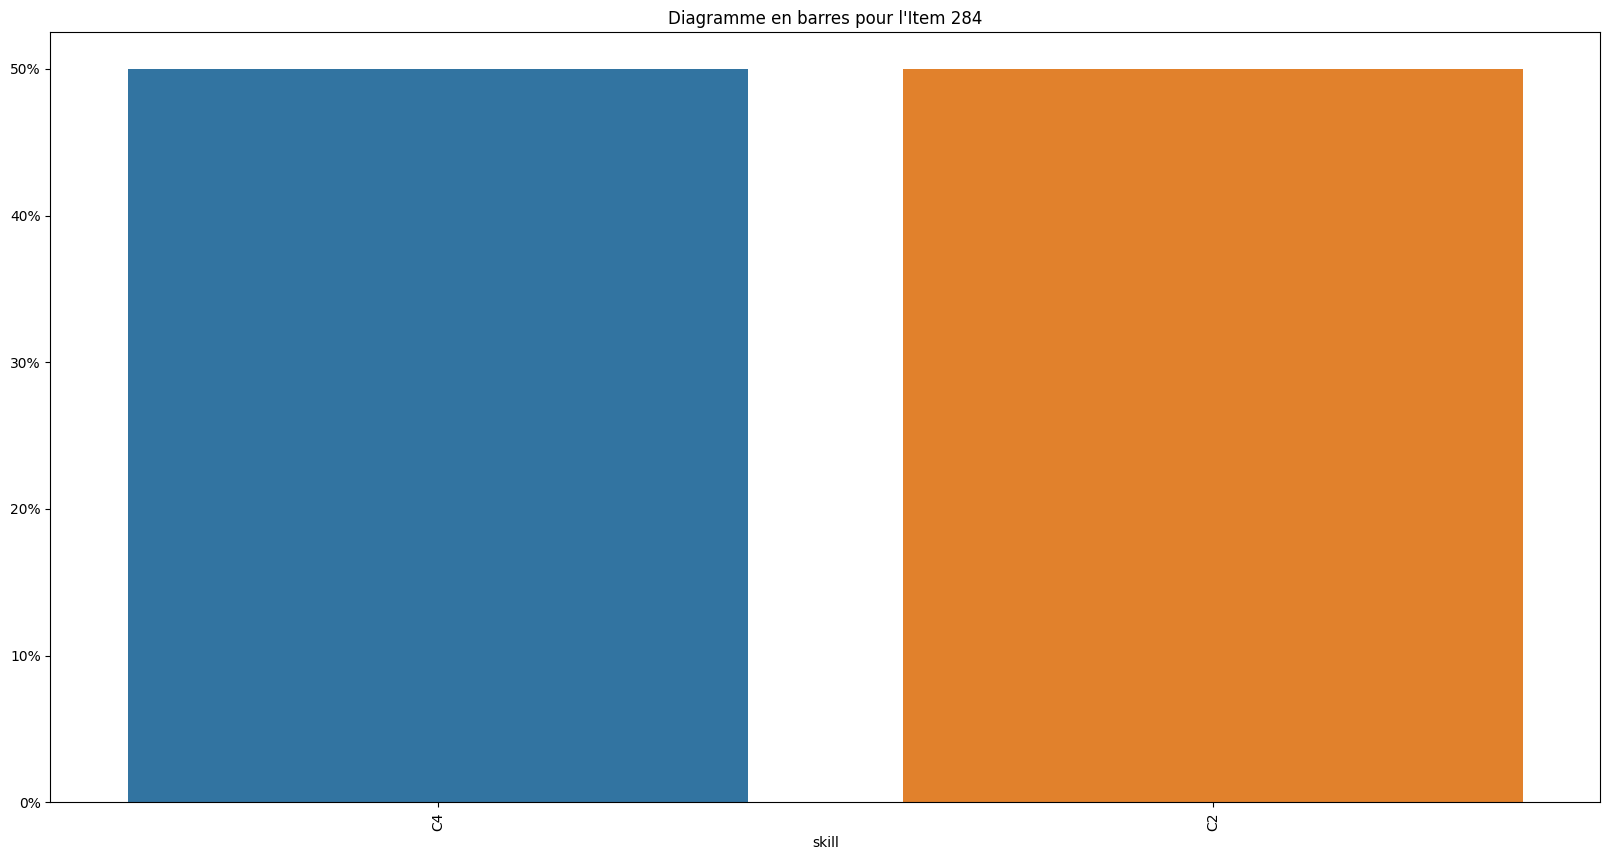

Item 284
skill      C4   C2
ecn_item          
Item 284  1.0  1.0


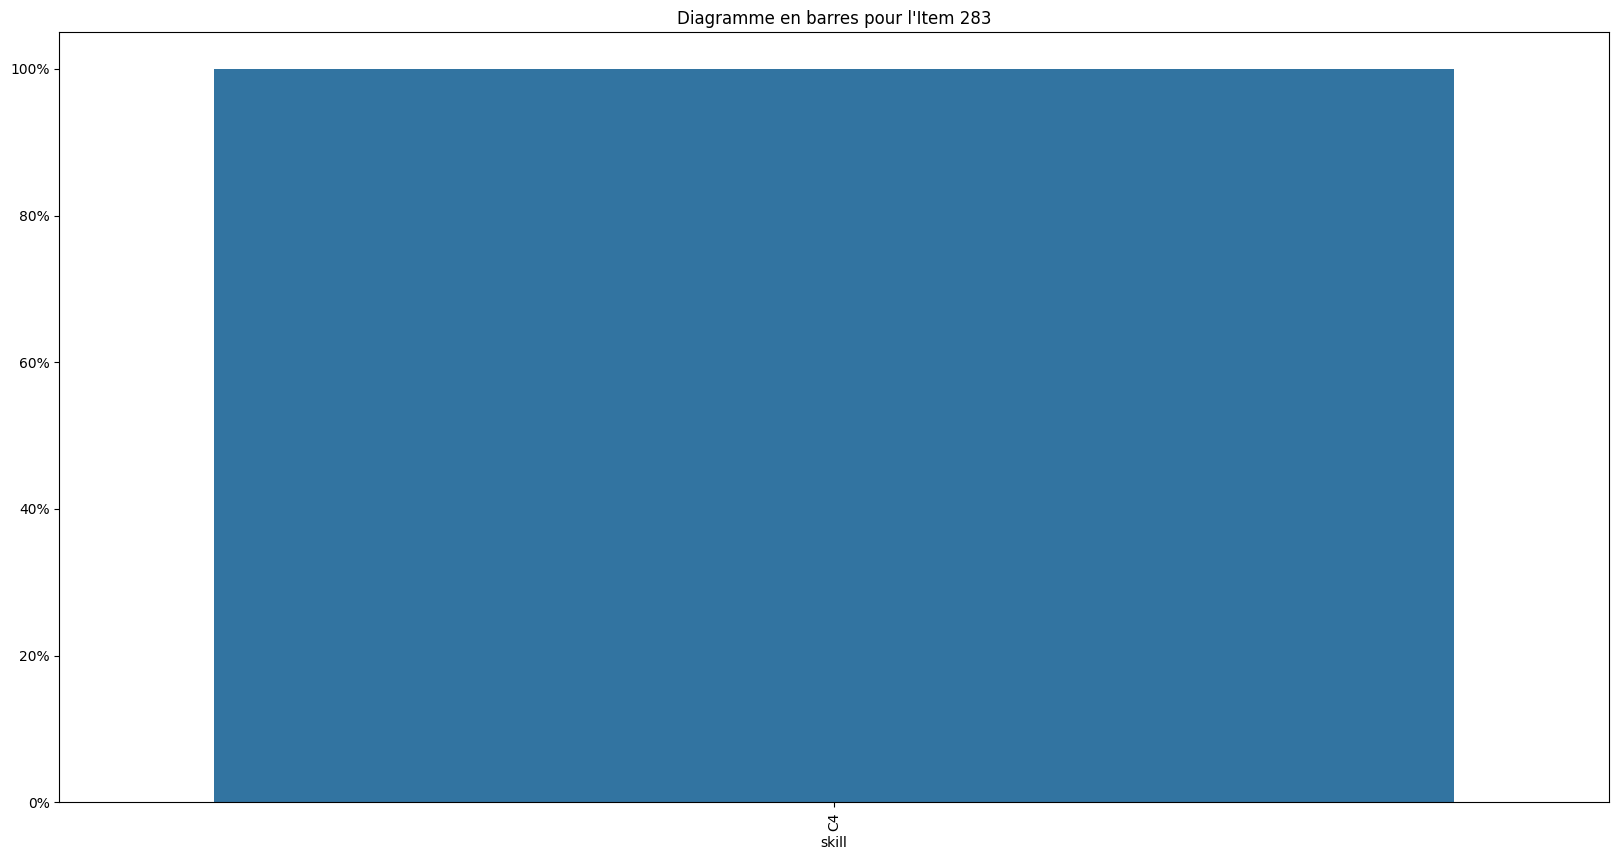

Item 283
skill      C4
ecn_item     
Item 283  2.0


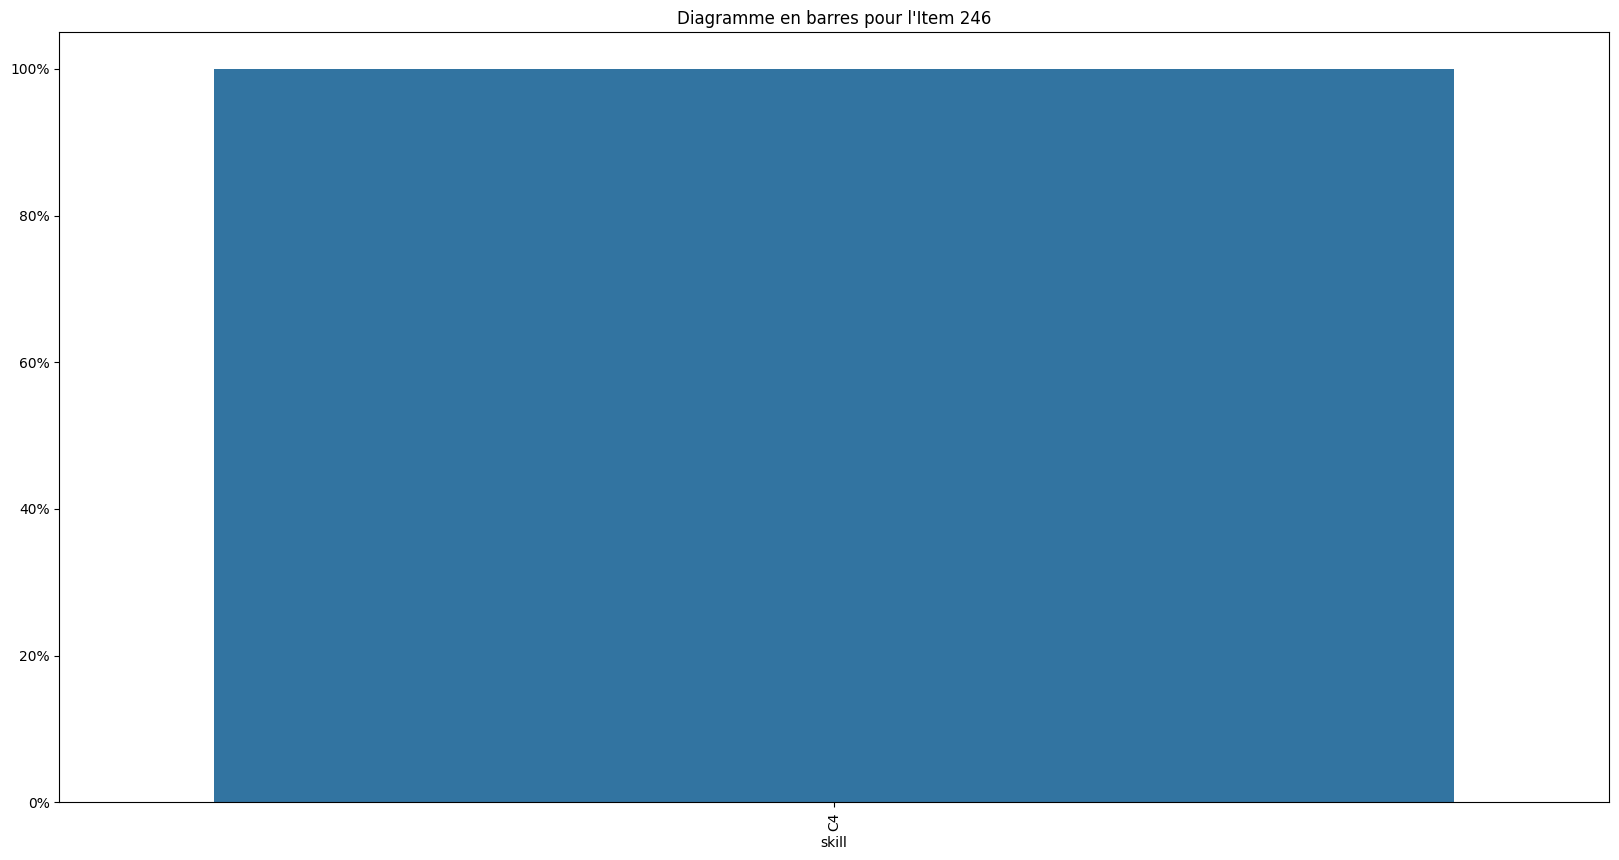

Item 246
skill      C4
ecn_item     
Item 246  2.0


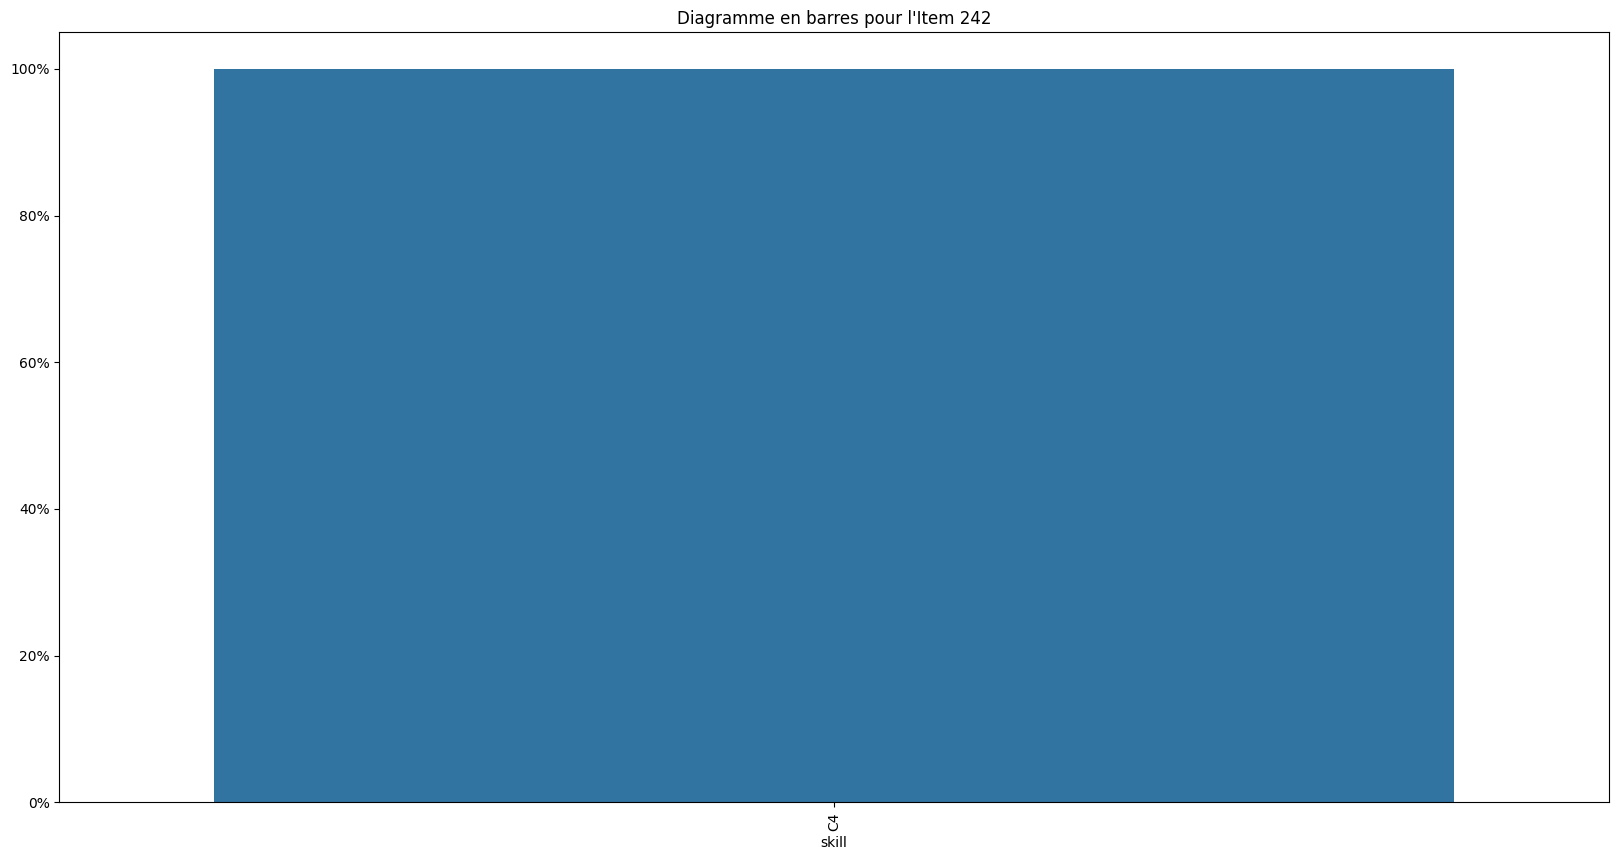

Item 242
skill      C4
ecn_item     
Item 242  2.0


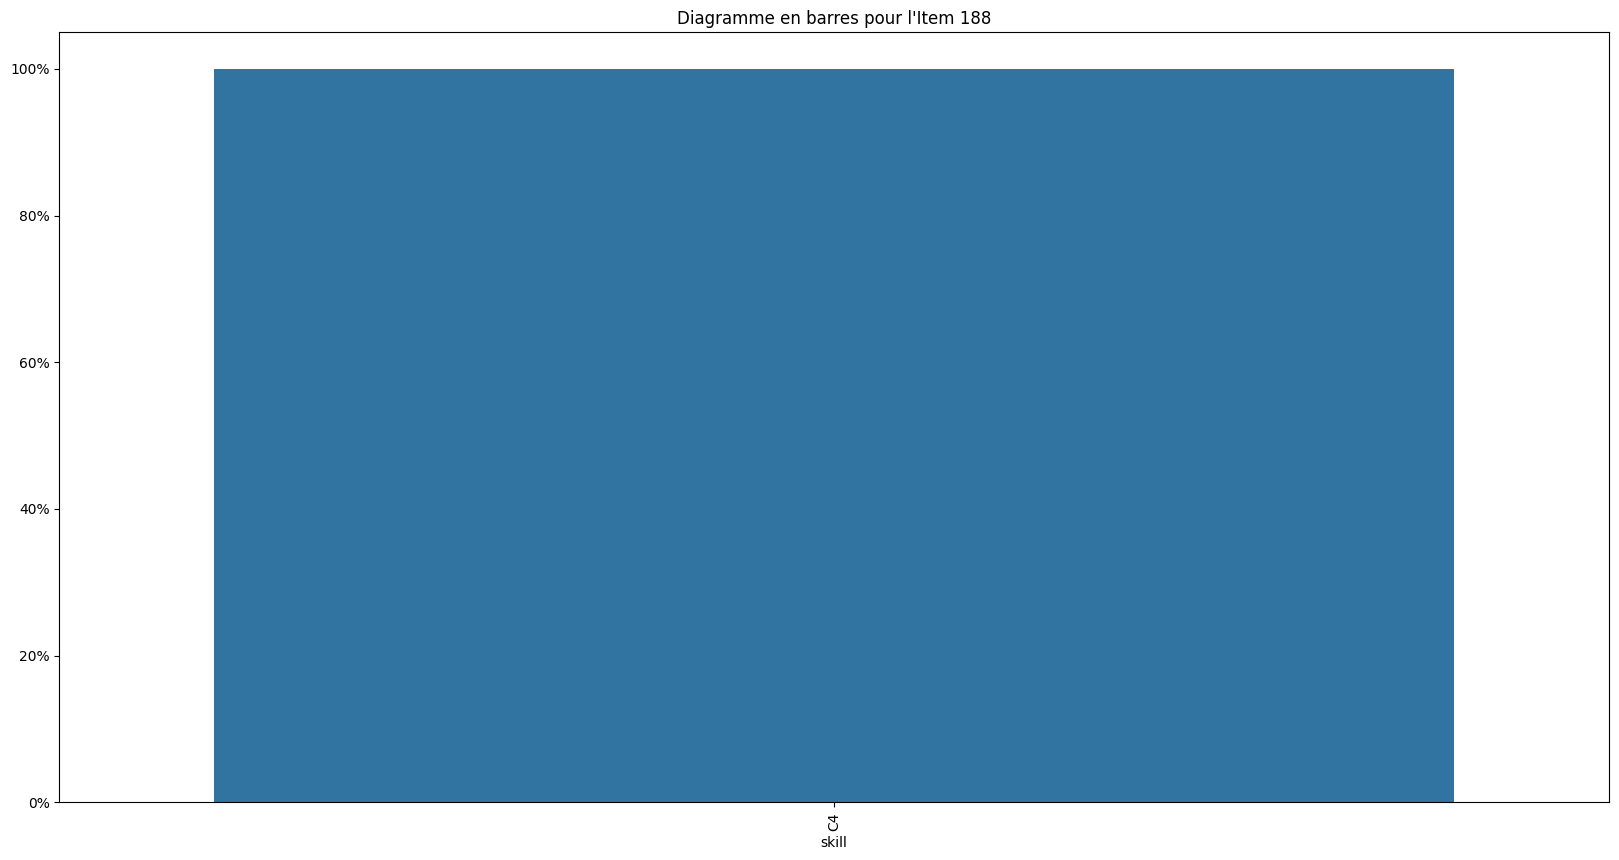

Item 188
skill      C4
ecn_item     
Item 188  2.0


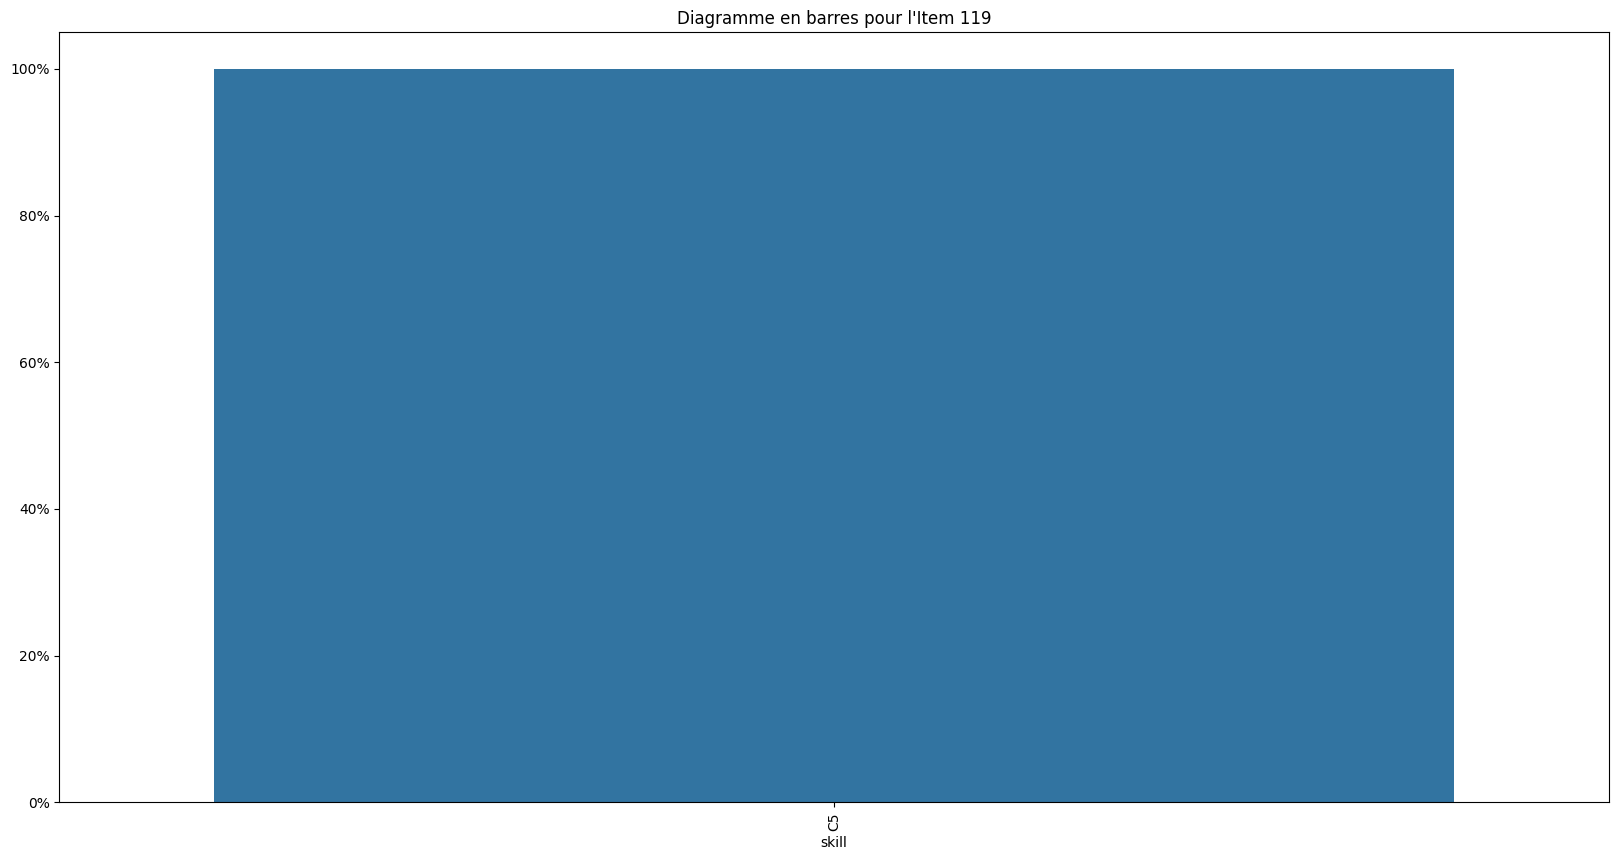

Item 119
skill      C5
ecn_item     
Item 119  2.0


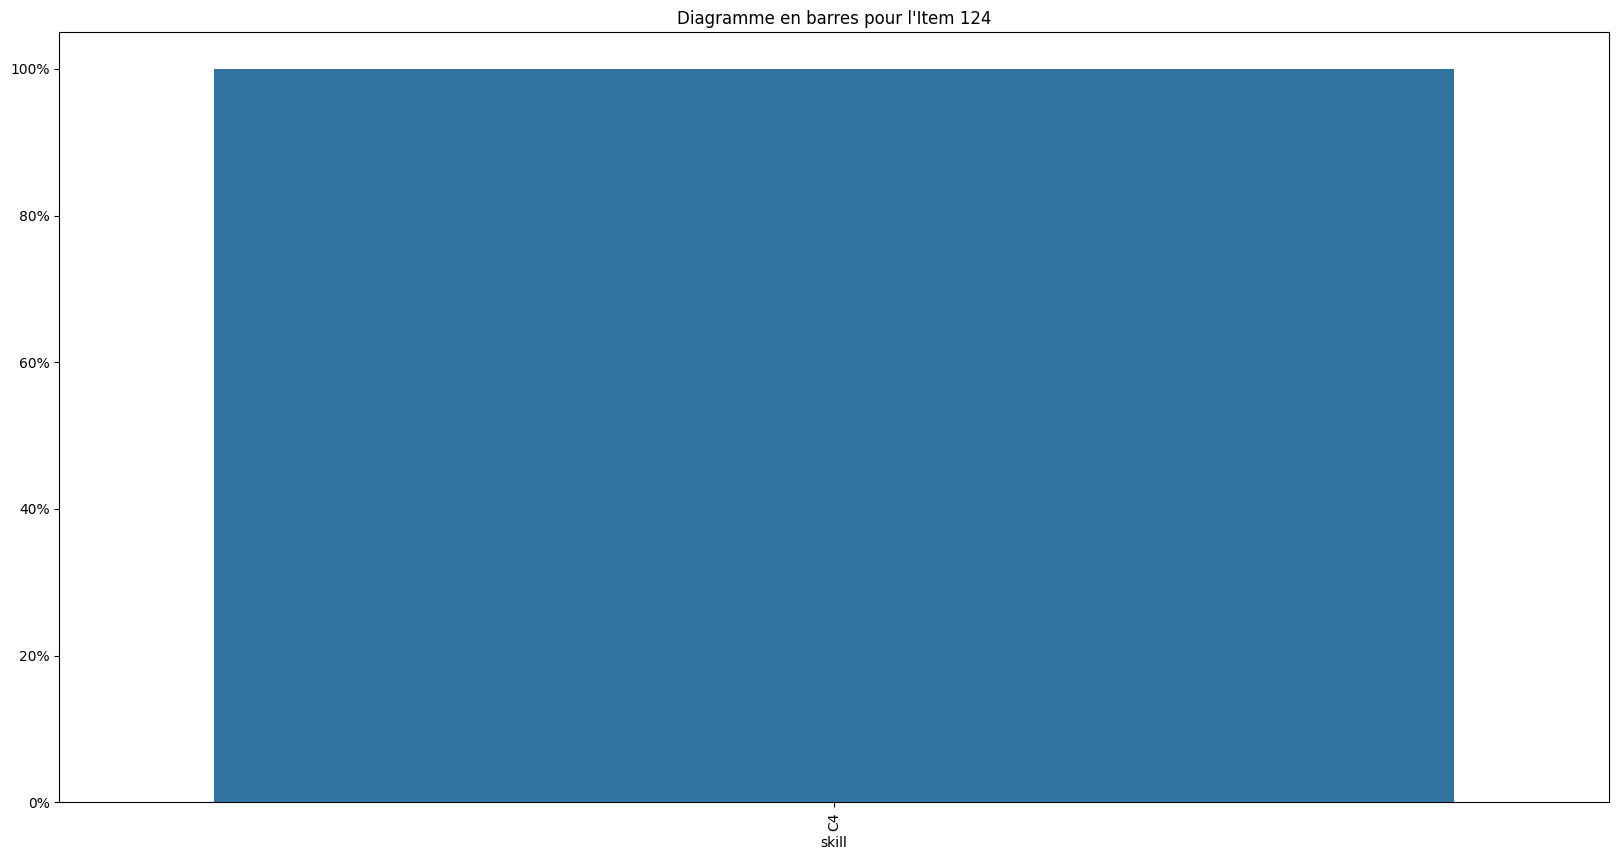

Item 124
skill      C4
ecn_item     
Item 124  2.0


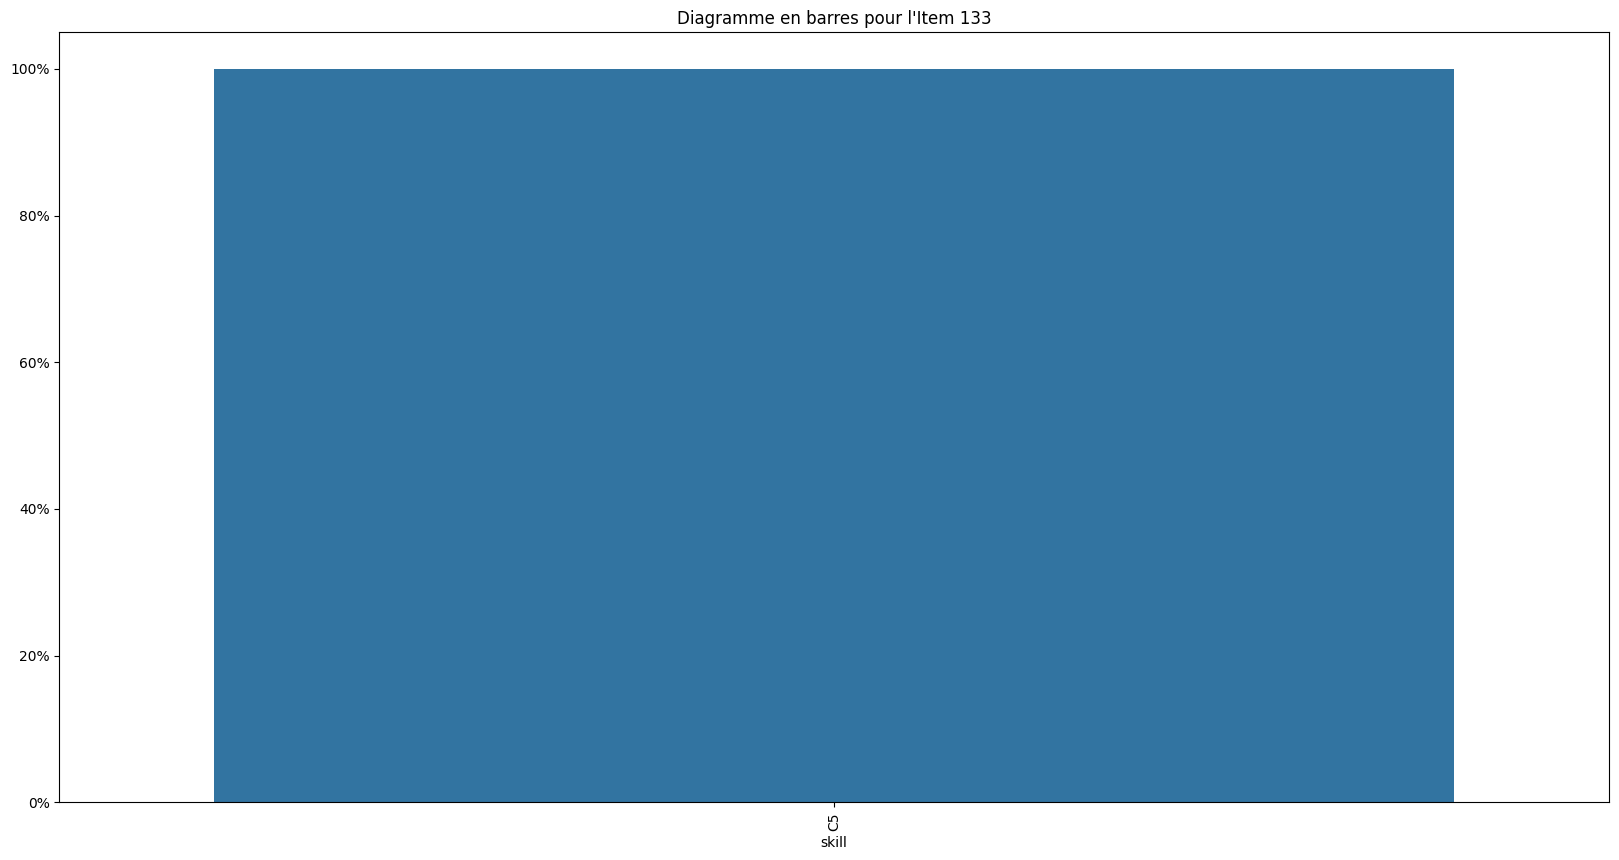

Item 133
skill      C5
ecn_item     
Item 133  2.0


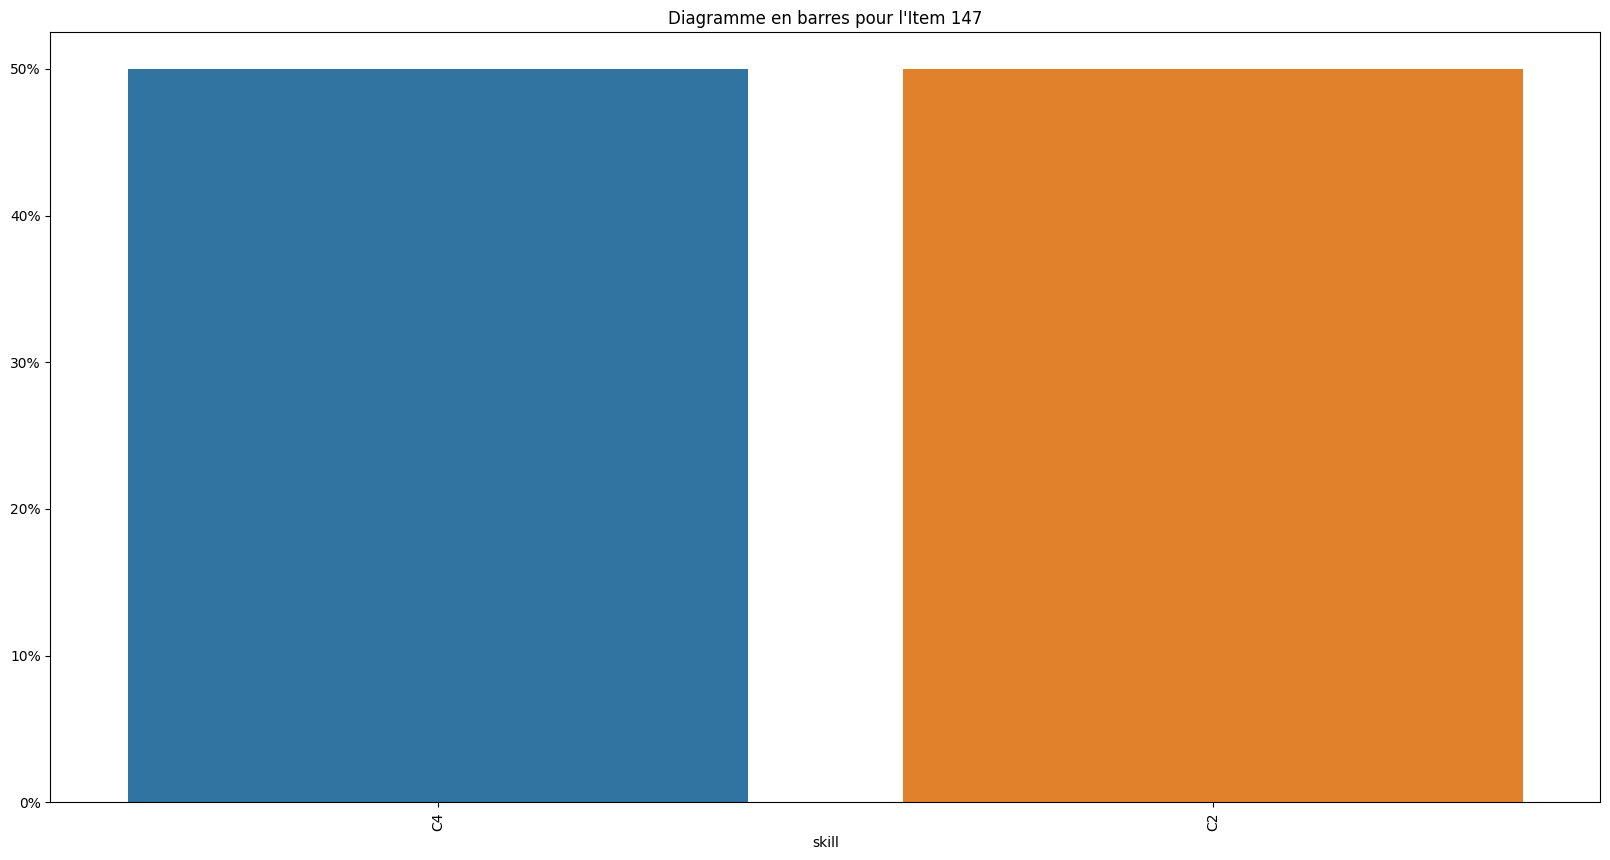

Item 147
skill      C4   C2
ecn_item          
Item 147  1.0  1.0


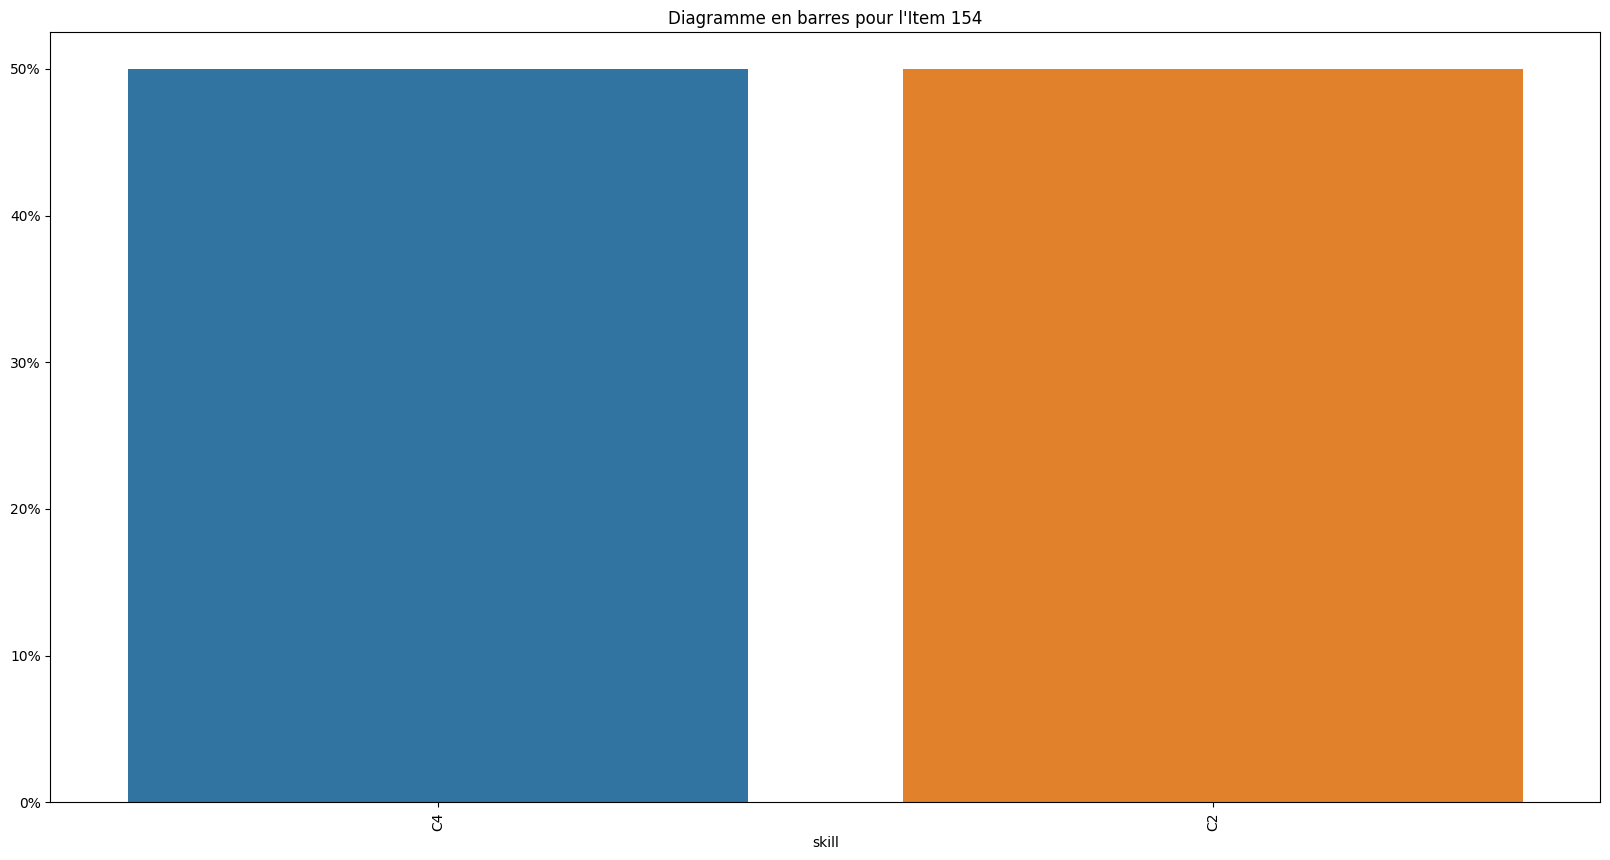

Item 154
skill      C4   C2
ecn_item          
Item 154  1.0  1.0


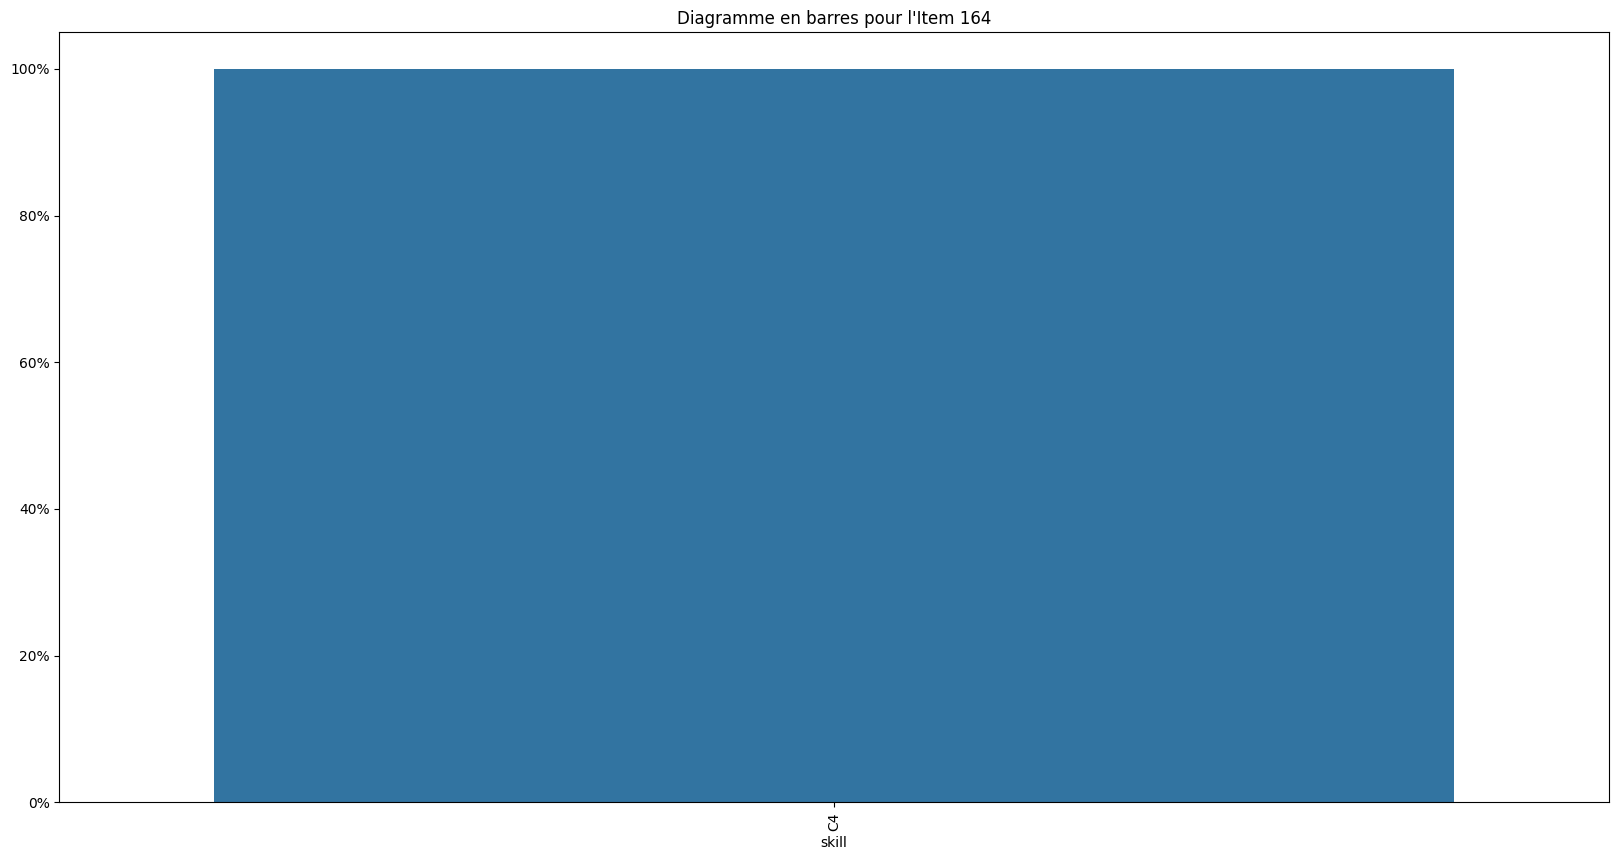

Item 164
skill      C4
ecn_item     
Item 164  2.0


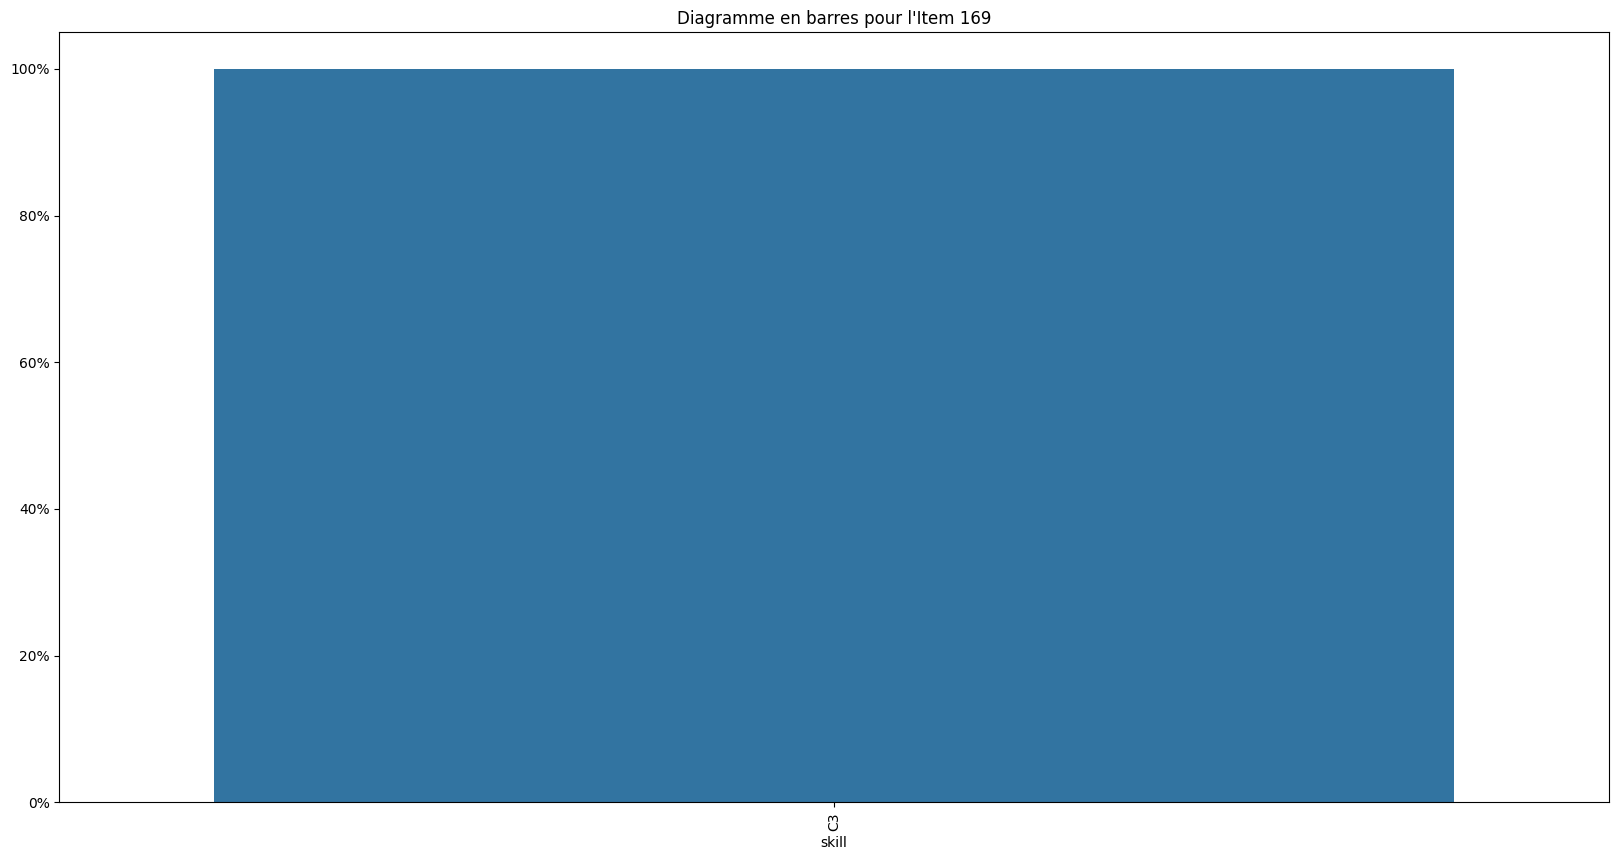

Item 169
skill      C3
ecn_item     
Item 169  2.0


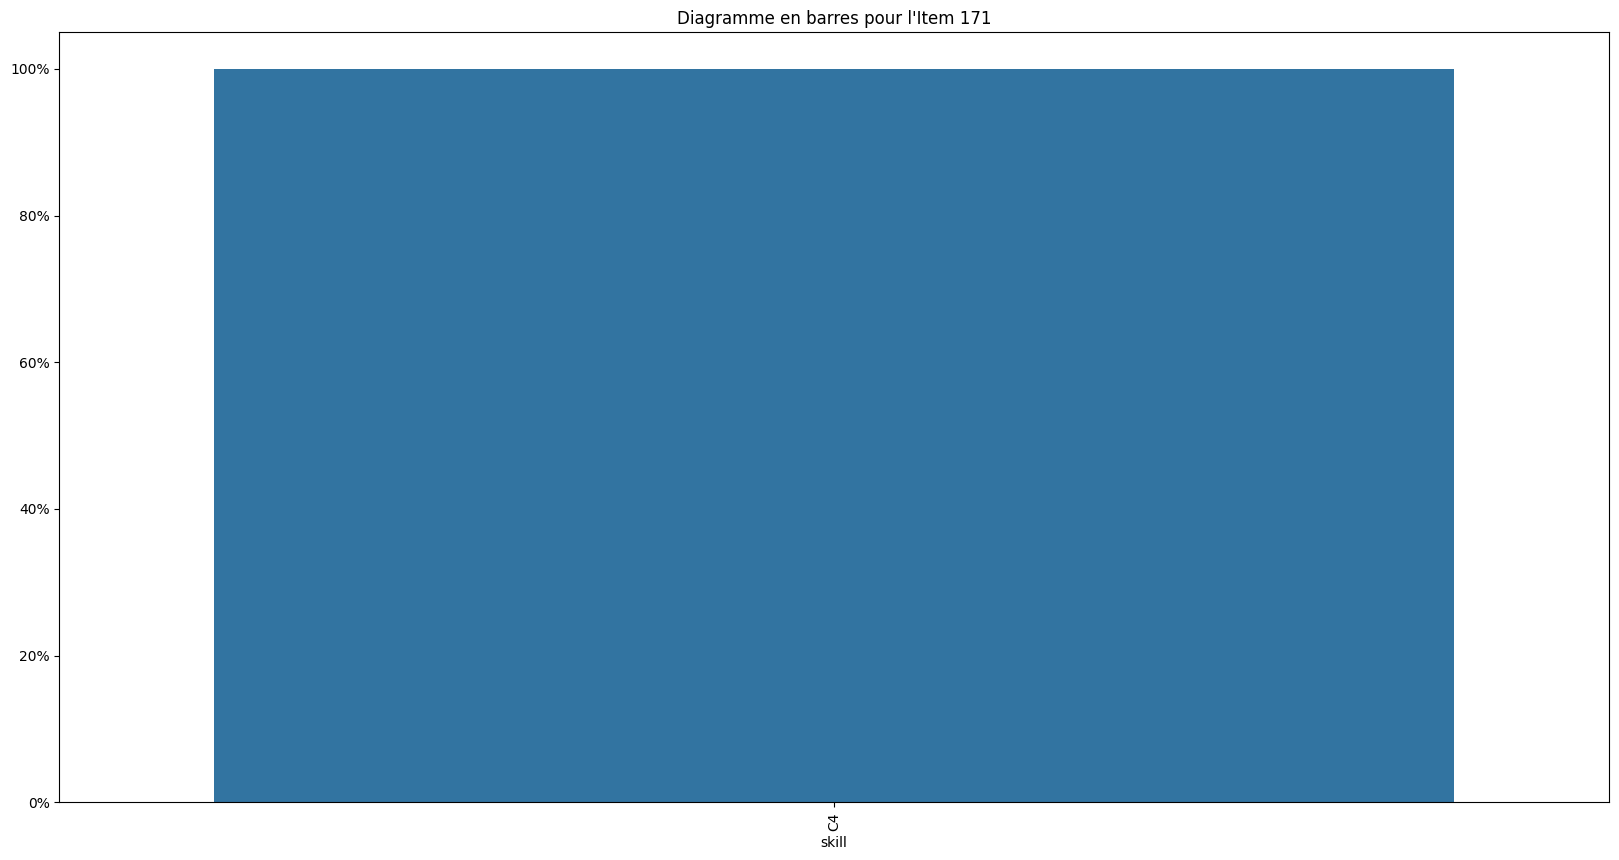

Item 171
skill      C4
ecn_item     
Item 171  2.0


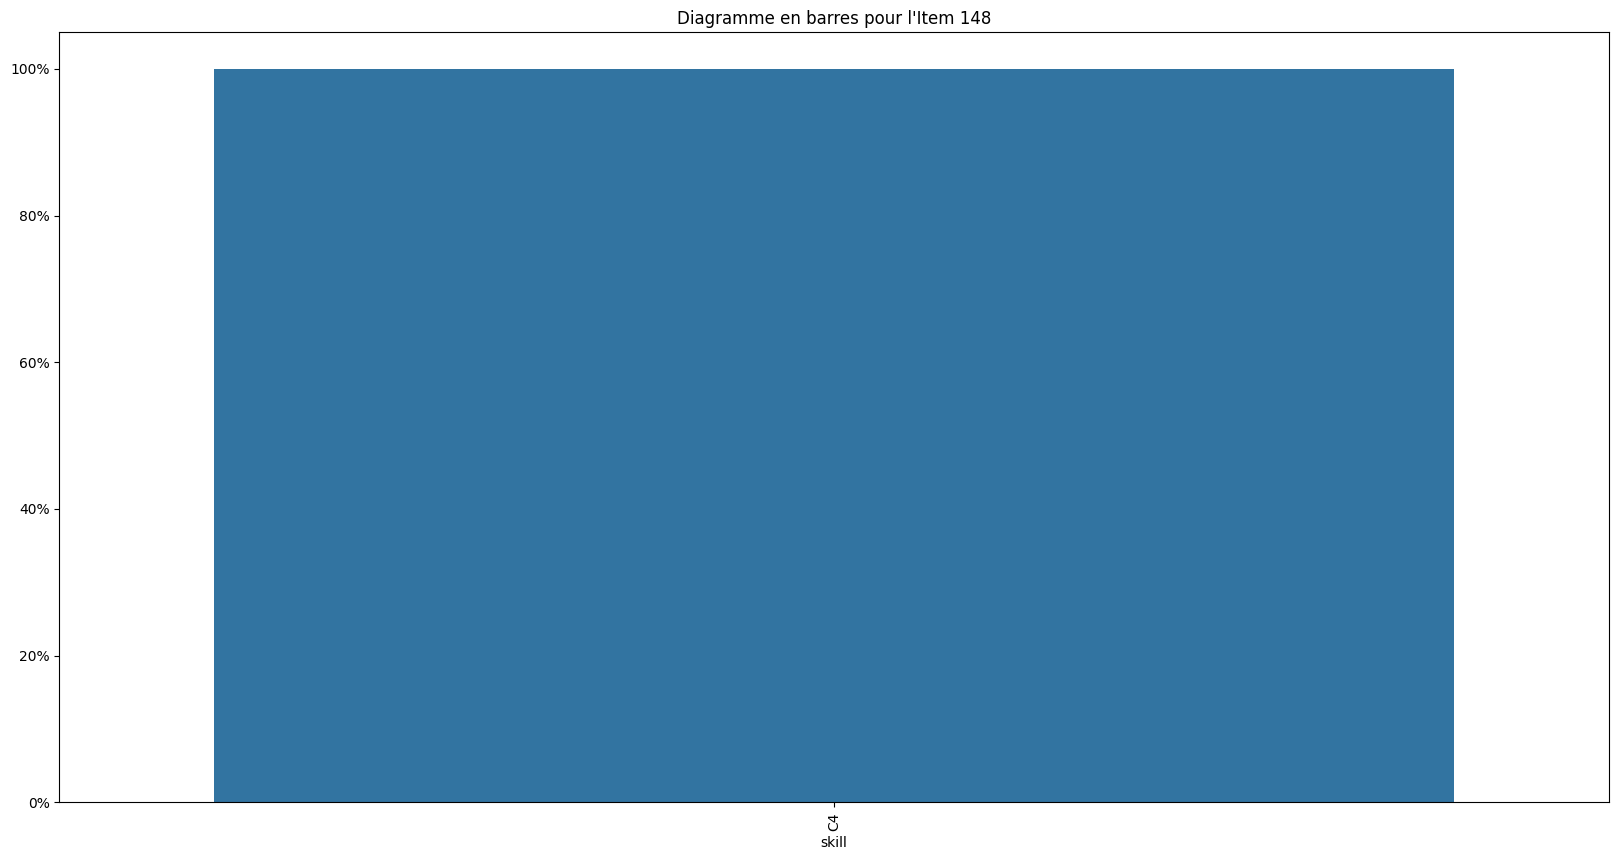

Item 148
skill      C4
ecn_item     
Item 148  2.0


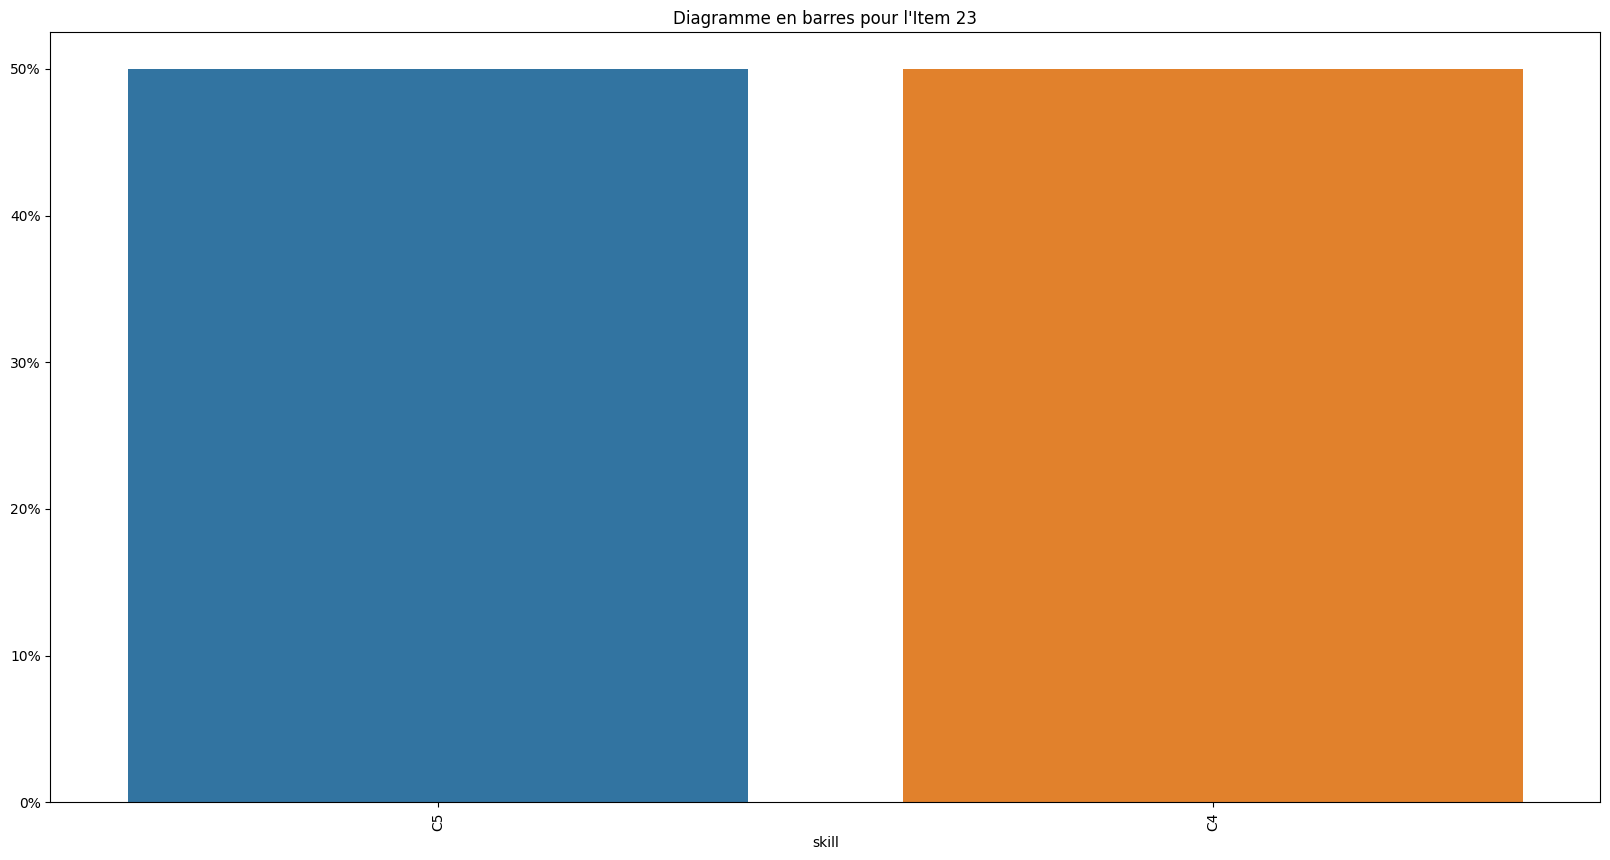

Item 23
skill      C5   C4
ecn_item          
Item 23   1.0  1.0


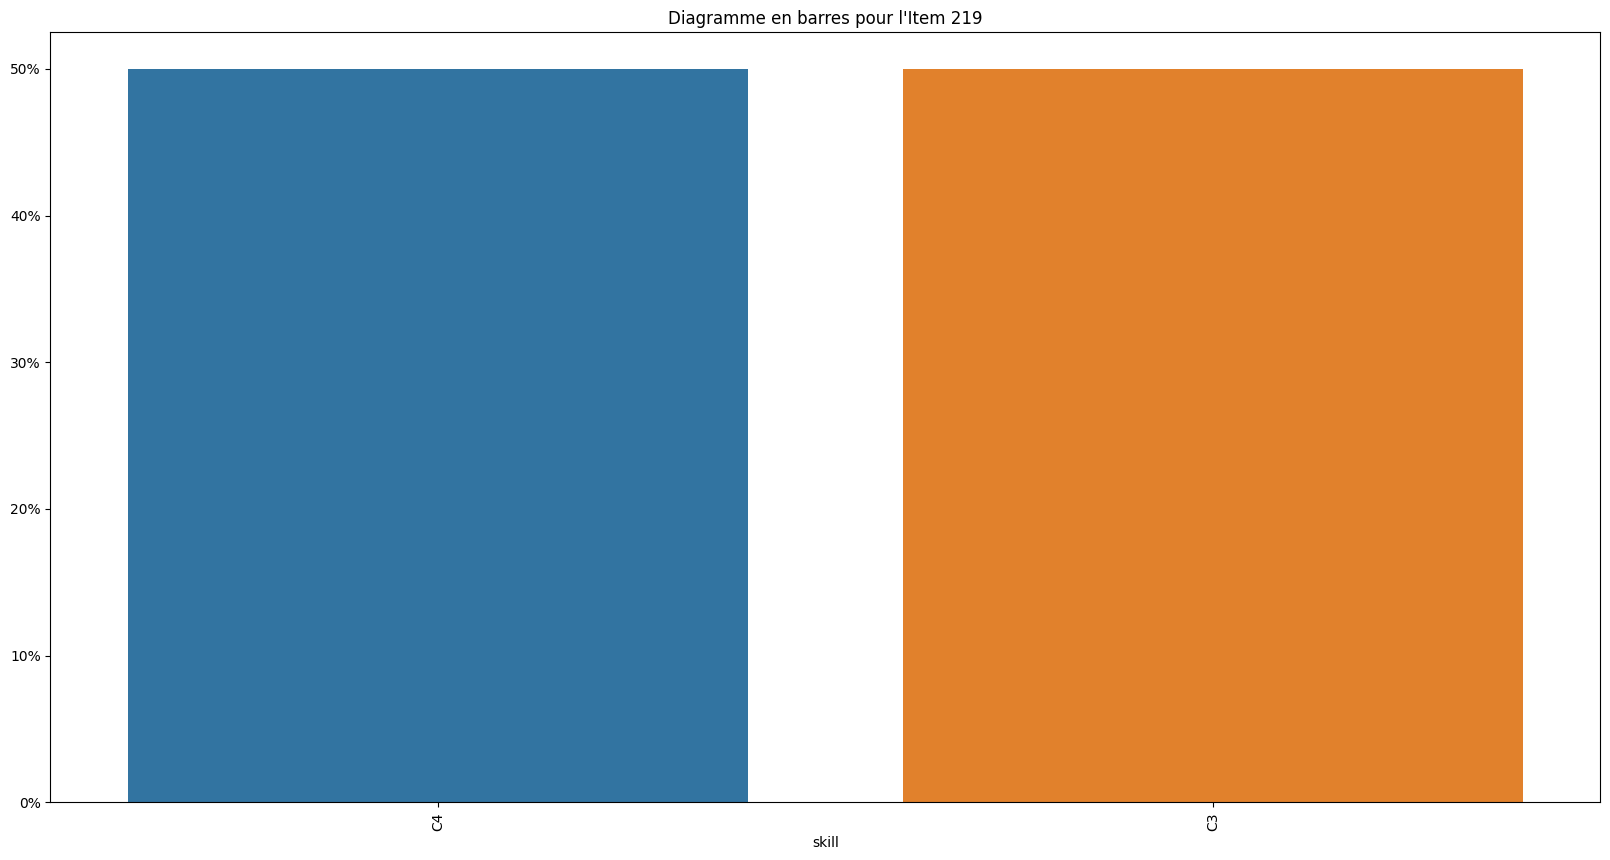

Item 219
skill      C4   C3
ecn_item          
Item 219  1.0  1.0


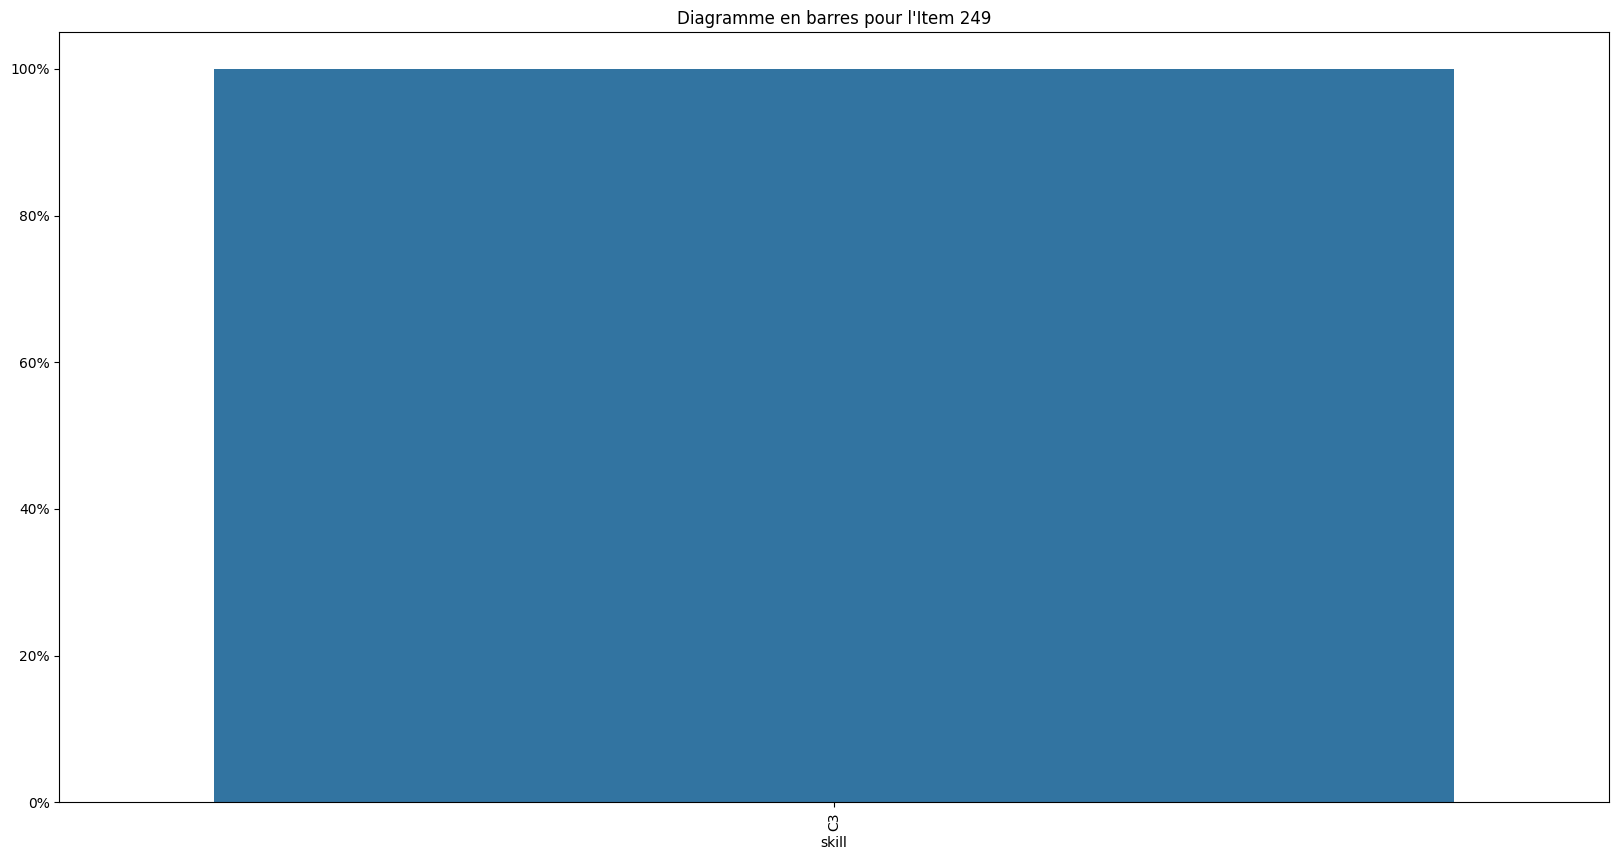

Item 249
skill      C3
ecn_item     
Item 249  1.0


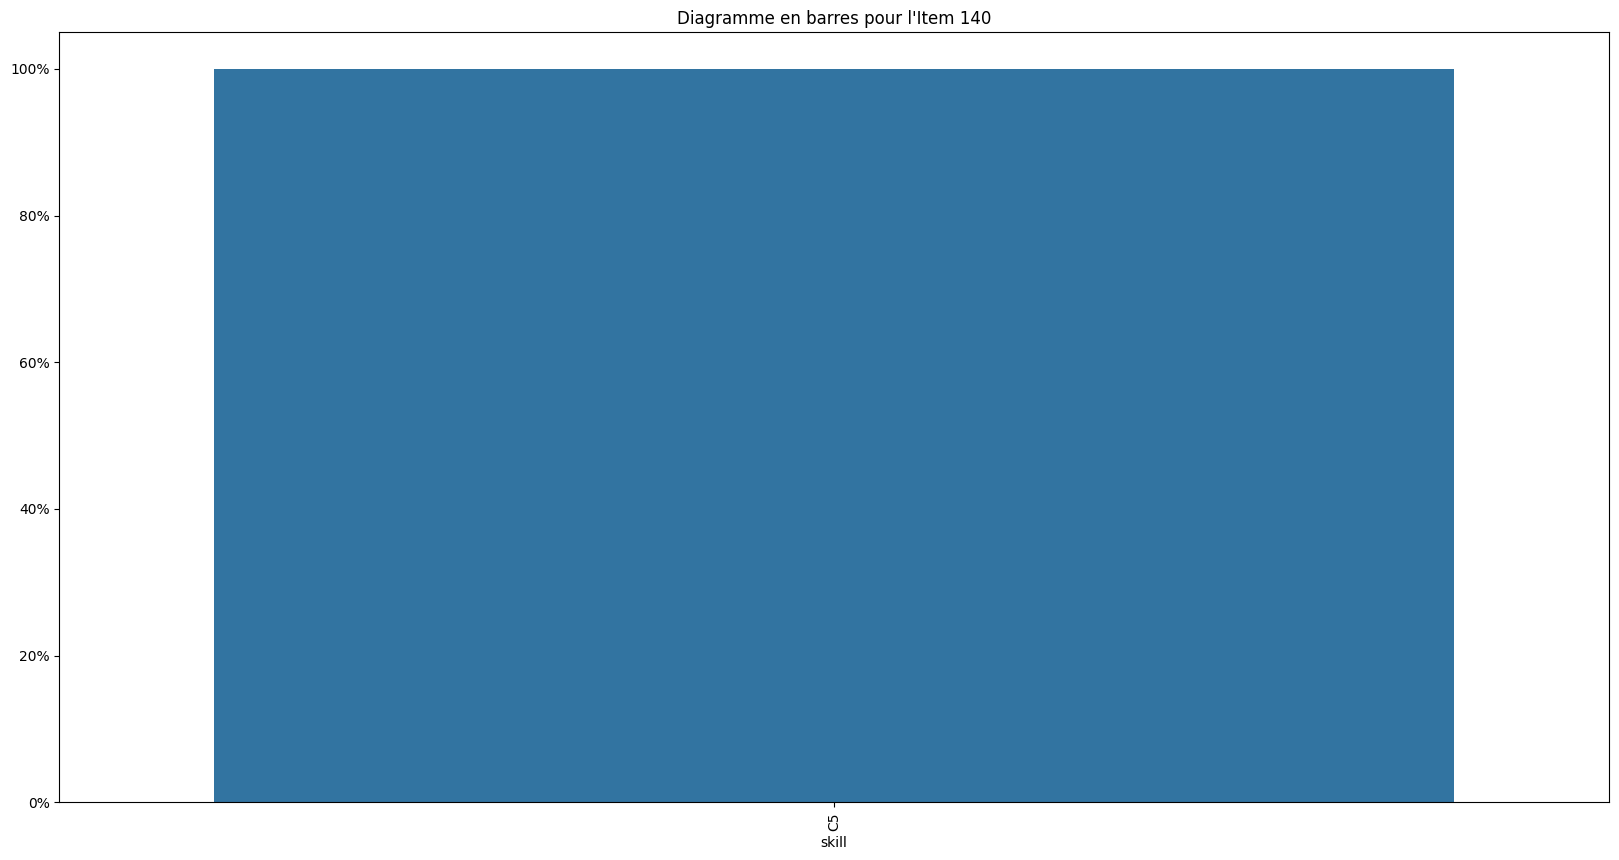

Item 140
skill      C5
ecn_item     
Item 140  1.0


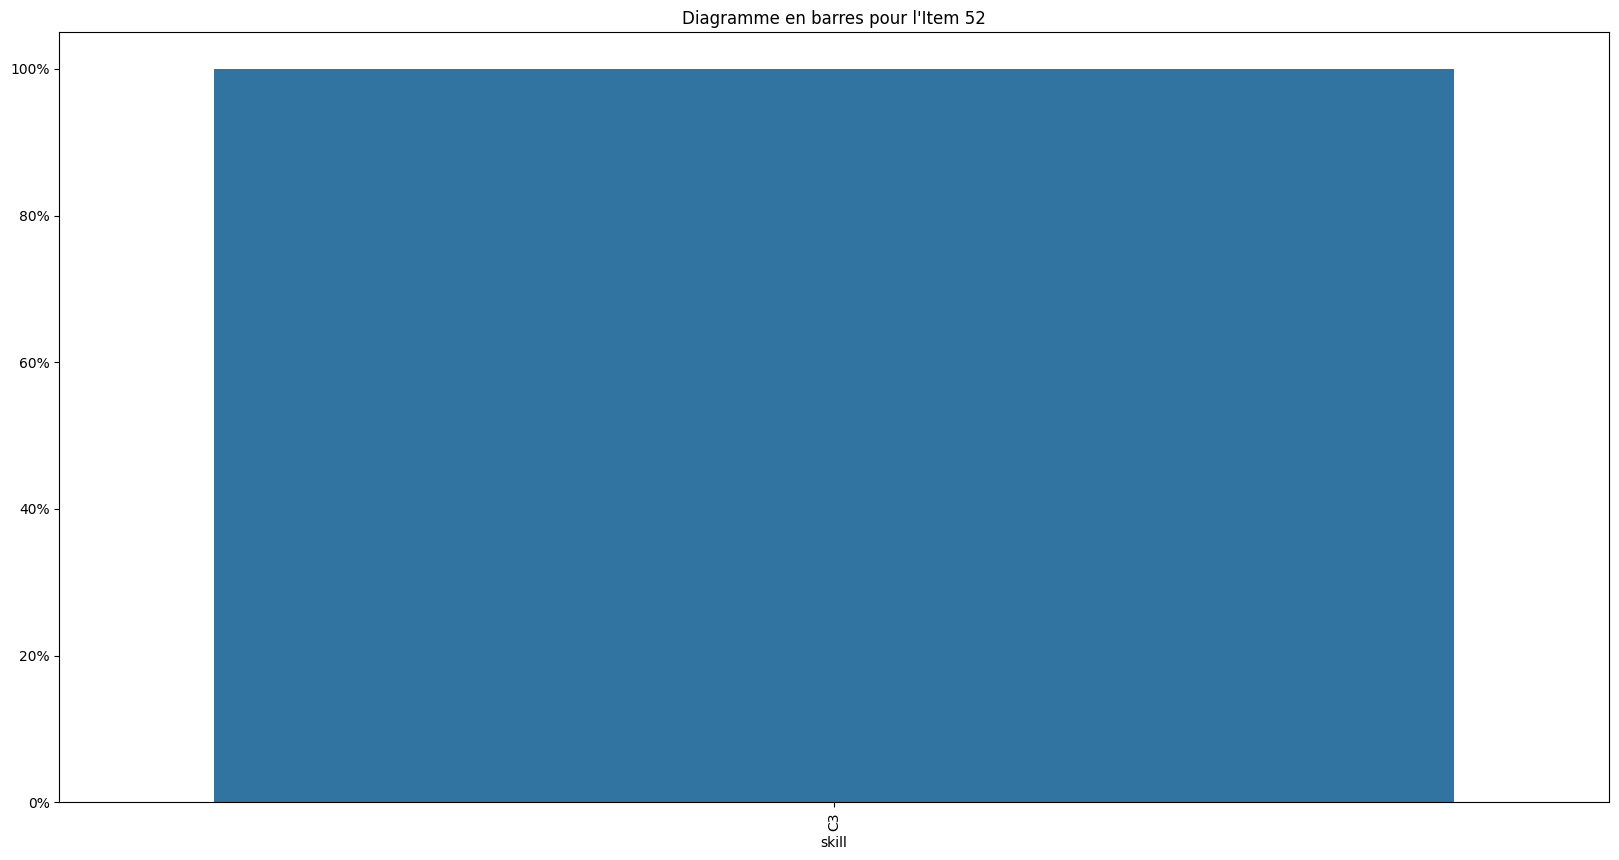

Item 52
skill      C3
ecn_item     
Item 52   1.0


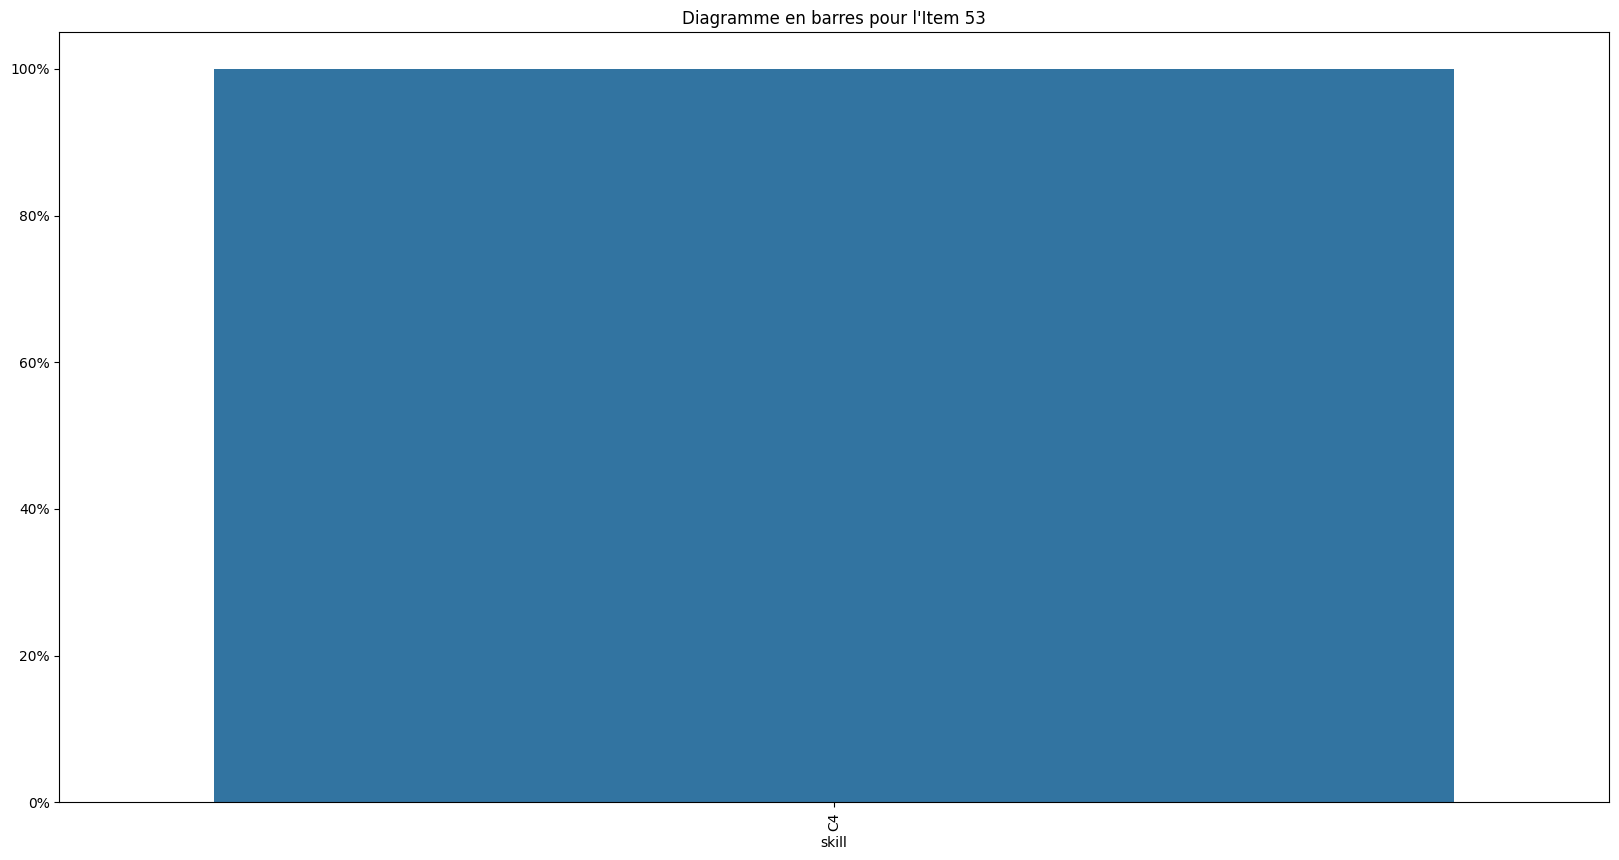

Item 53
skill      C4
ecn_item     
Item 53   1.0


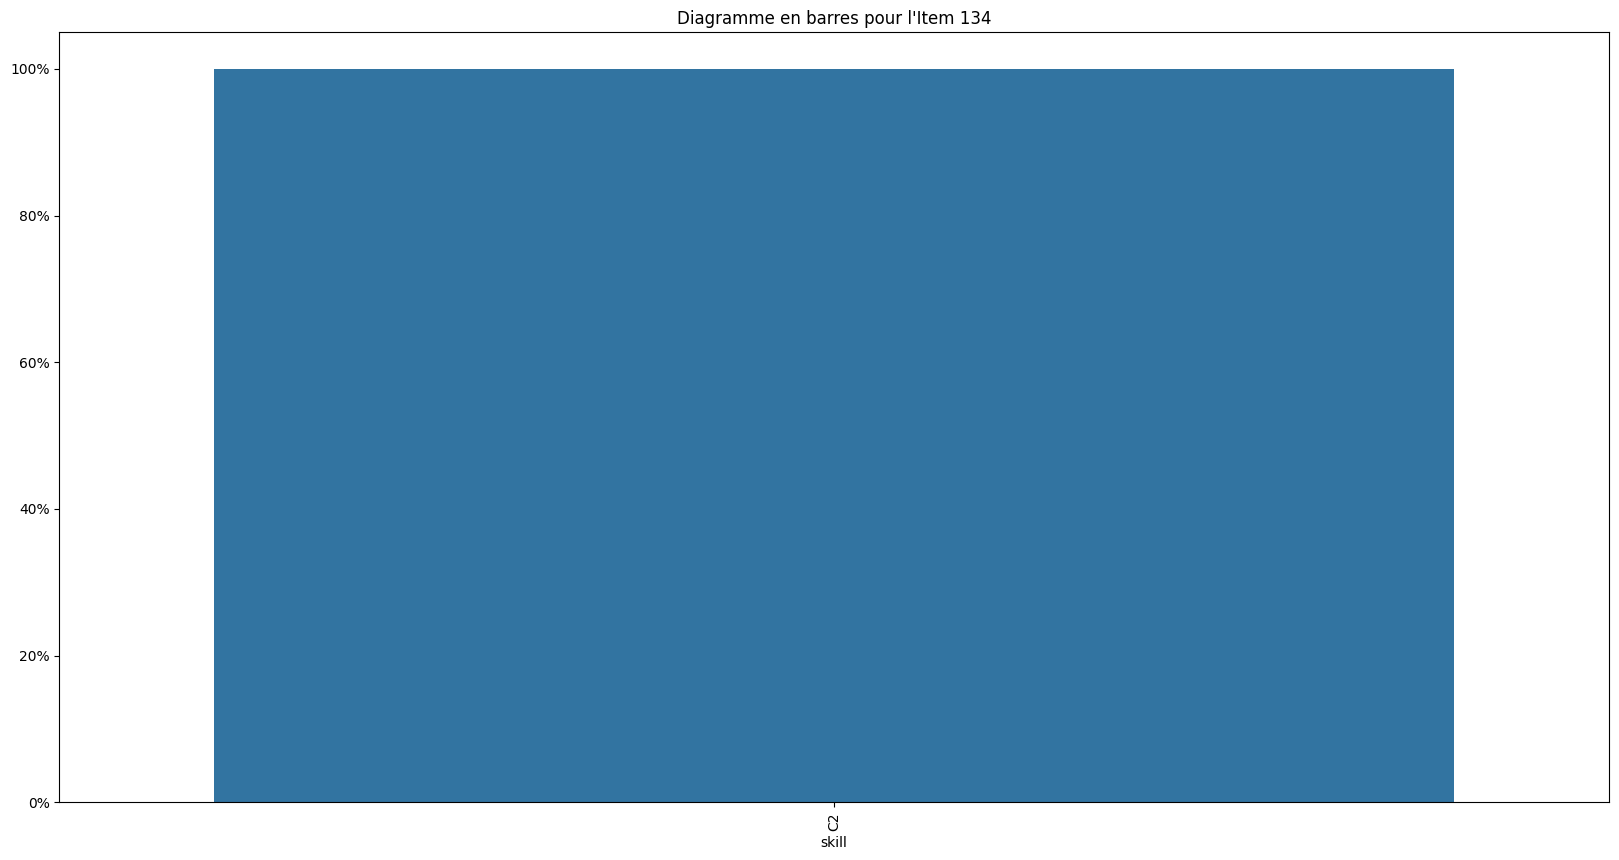

Item 134
skill      C2
ecn_item     
Item 134  1.0


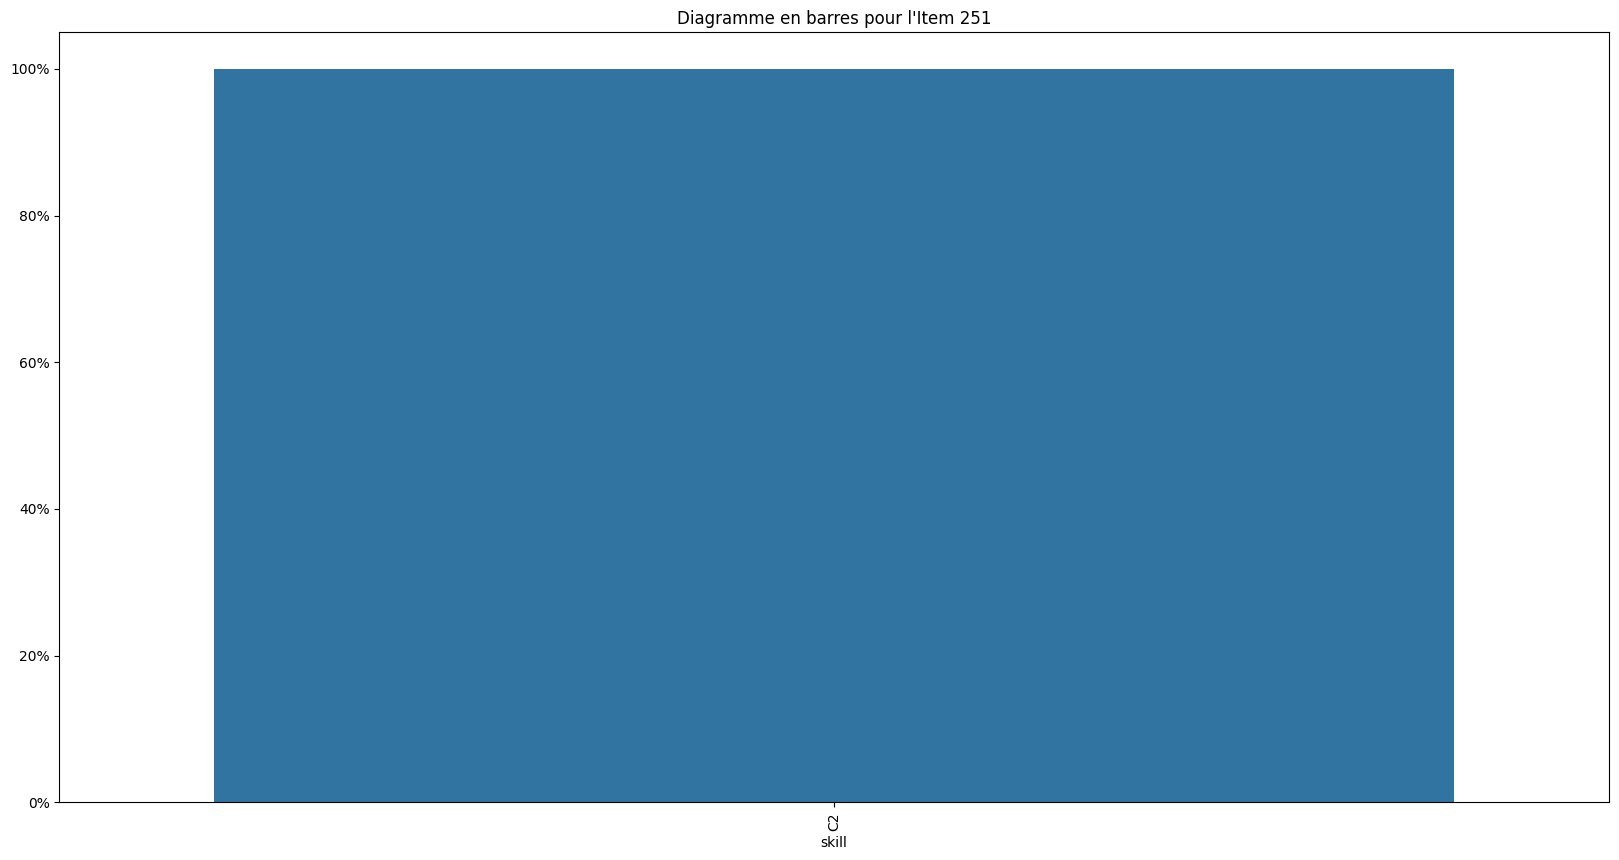

Item 251
skill      C2
ecn_item     
Item 251  1.0


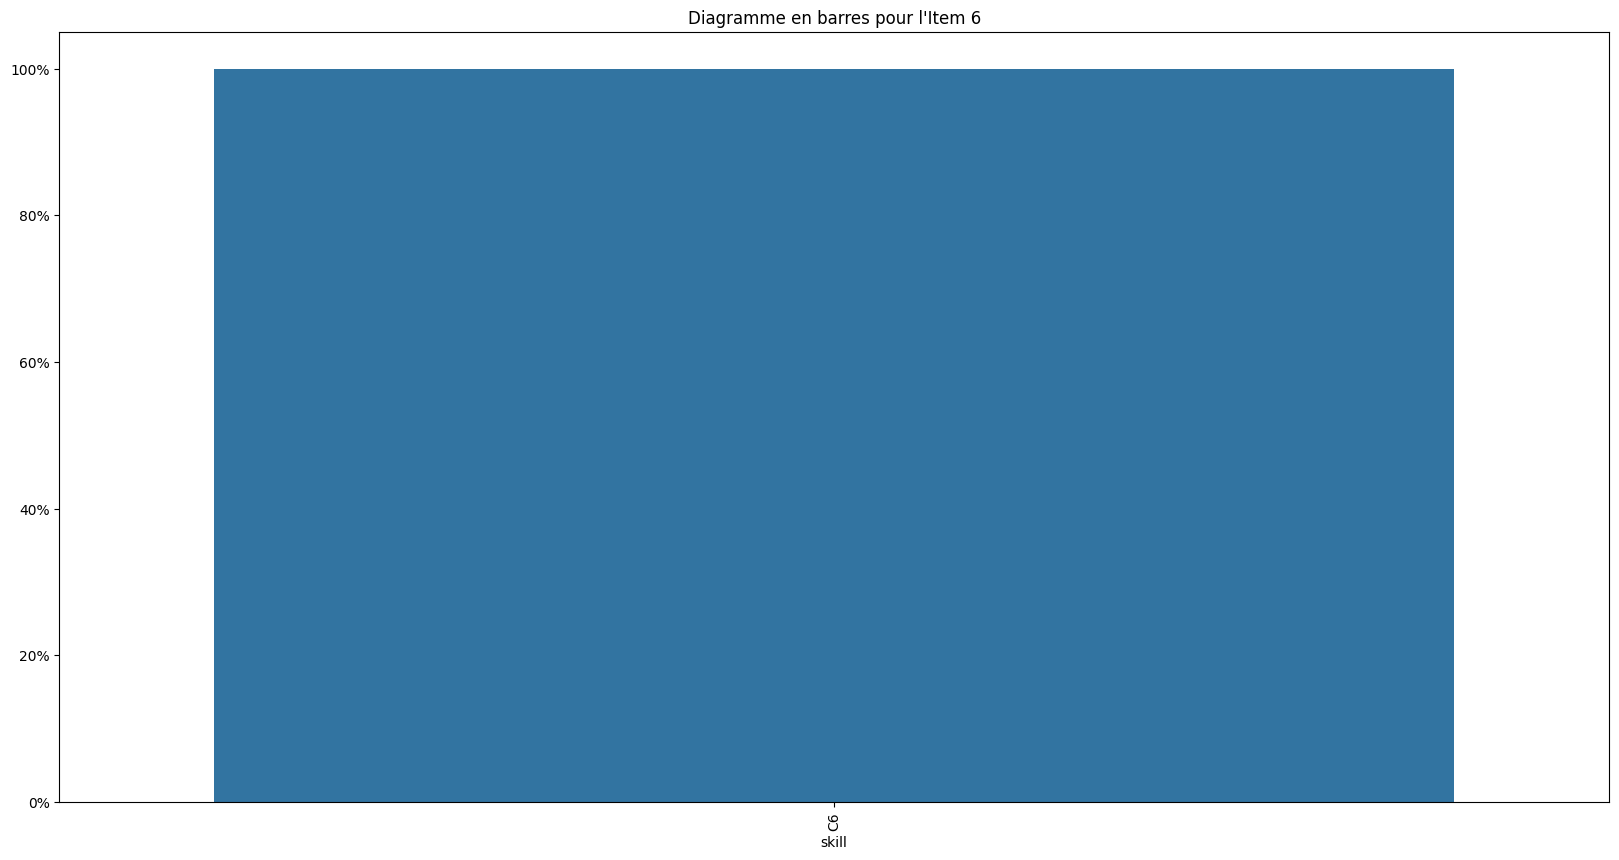

Item 6
skill      C6
ecn_item     
Item 6    1.0


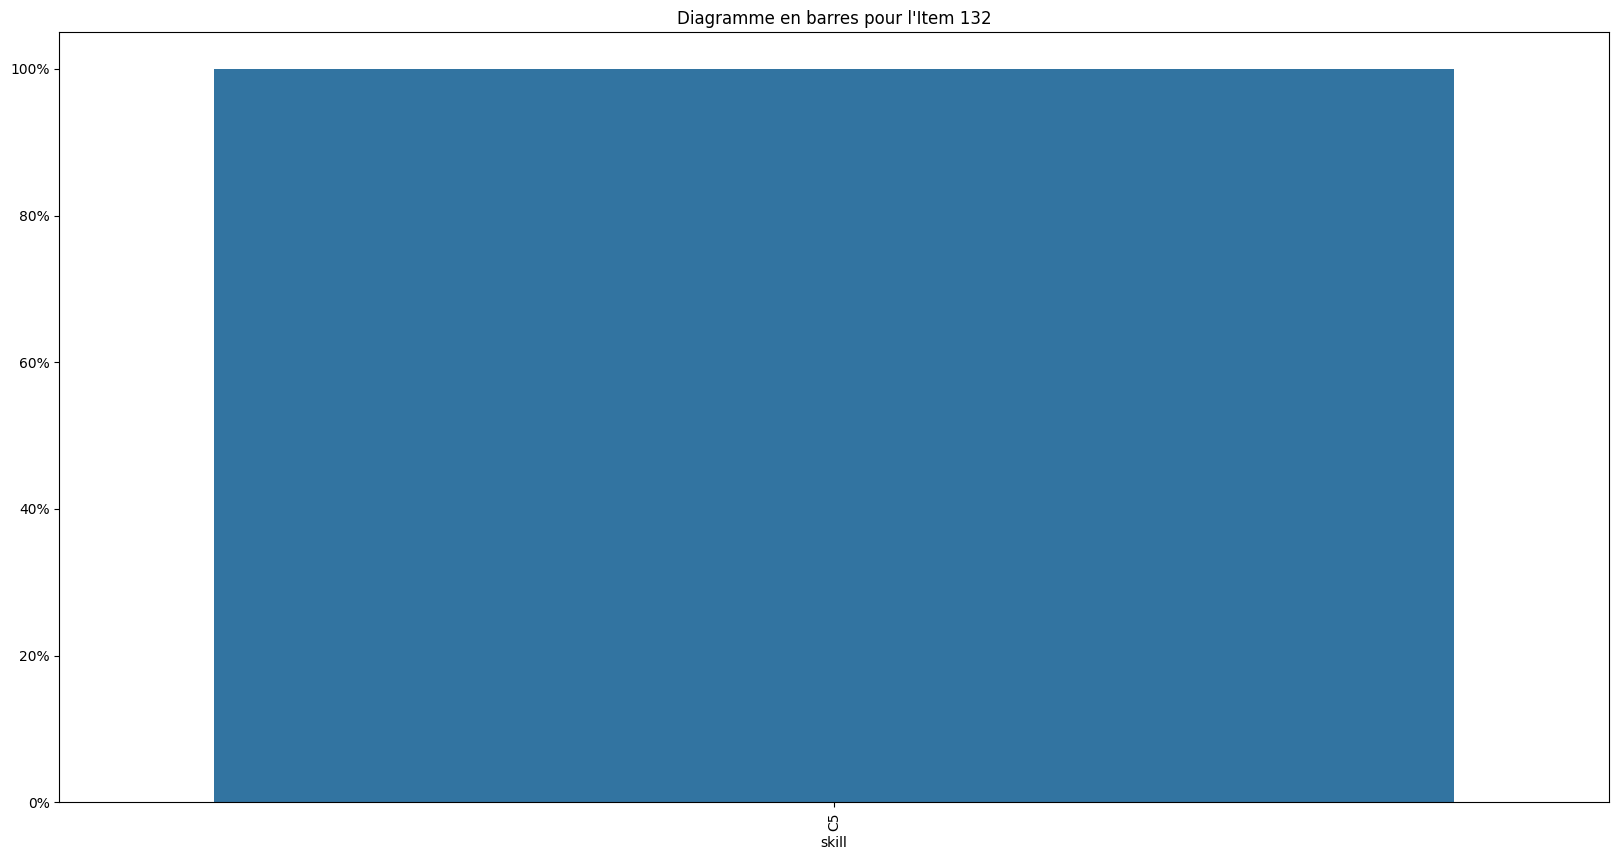

Item 132
skill      C5
ecn_item     
Item 132  1.0


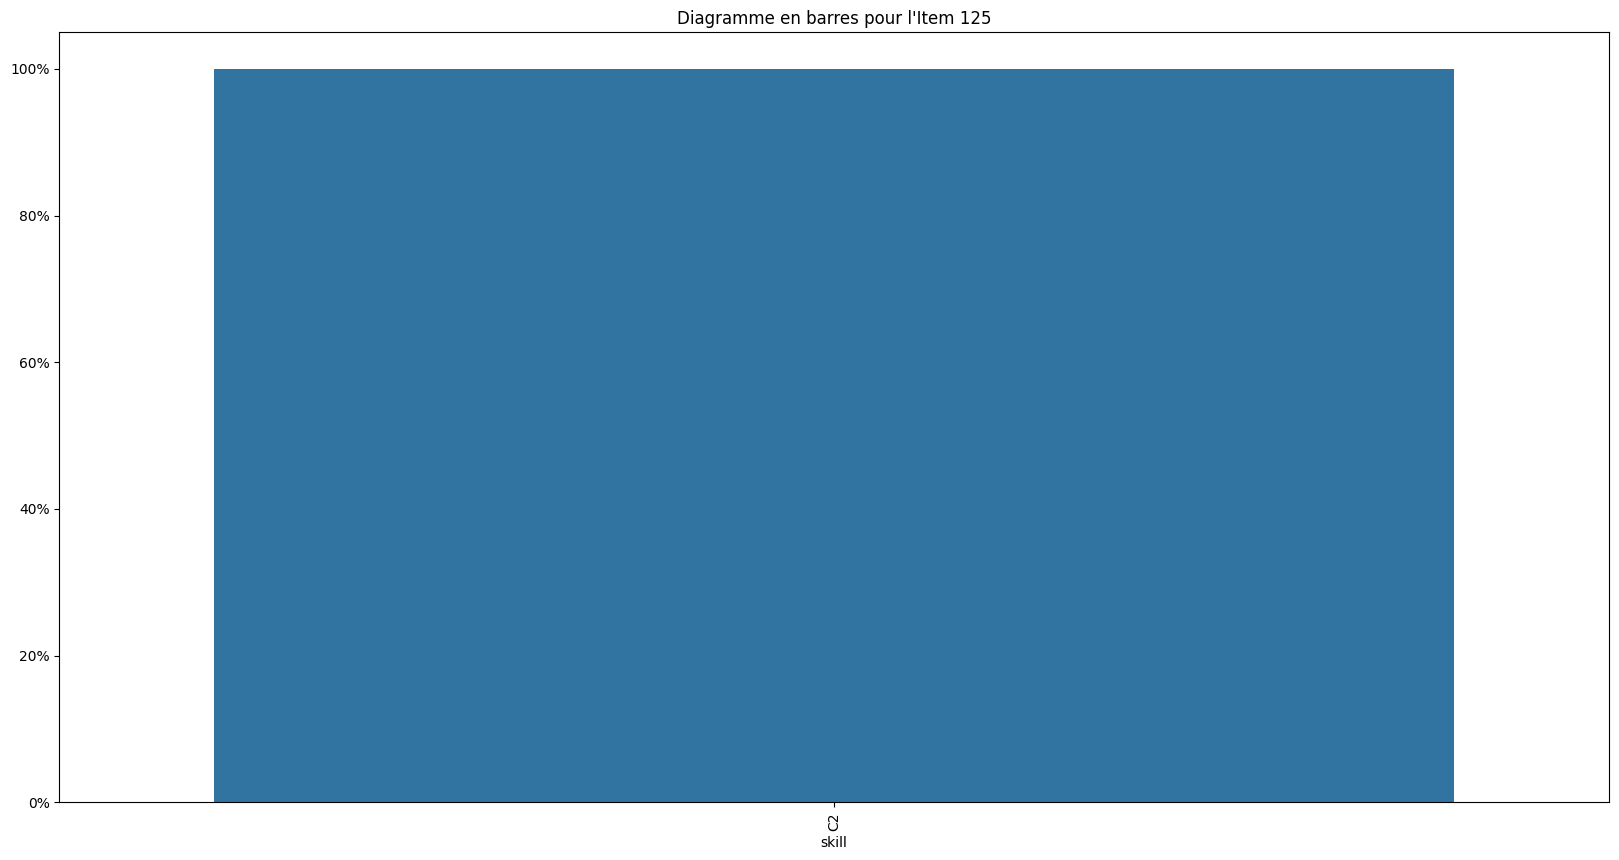

Item 125
skill      C2
ecn_item     
Item 125  1.0


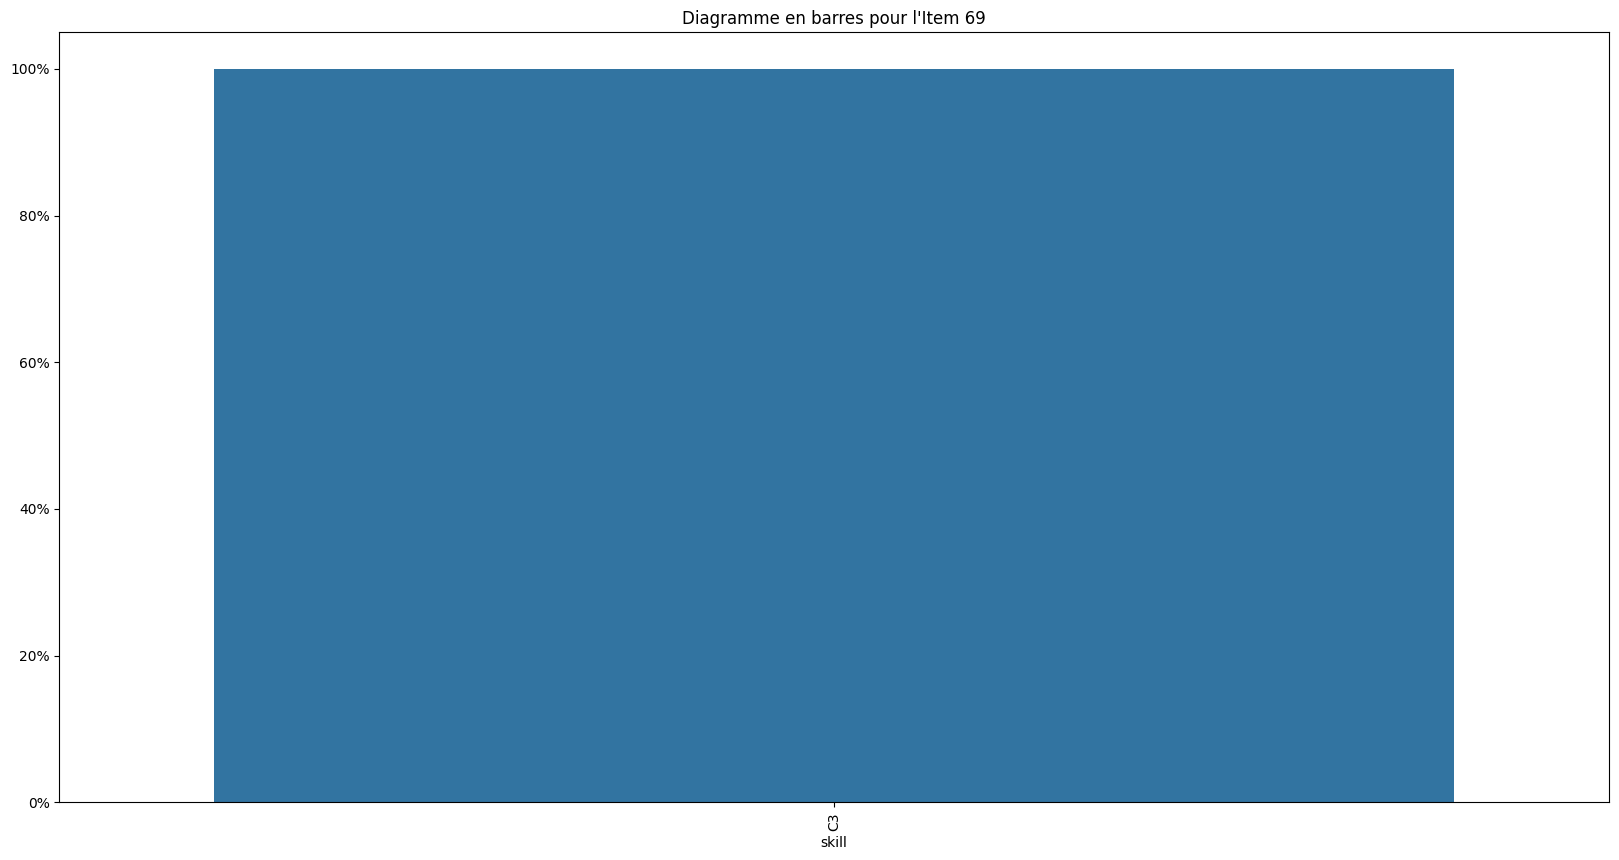

Item 69
skill      C3
ecn_item     
Item 69   1.0


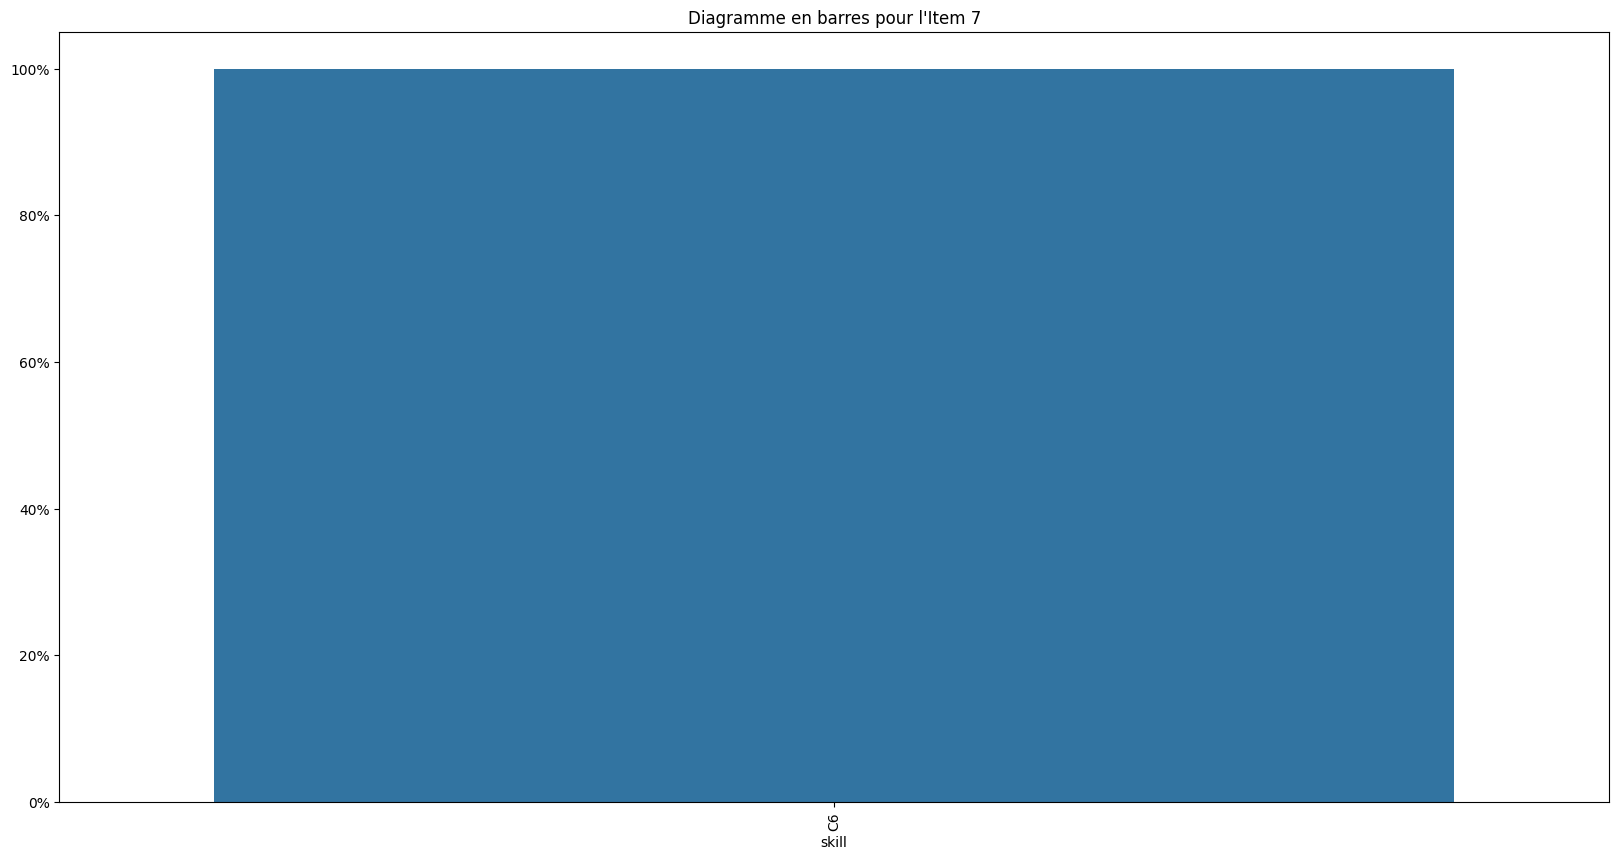

Item 7
skill      C6
ecn_item     
Item 7    1.0


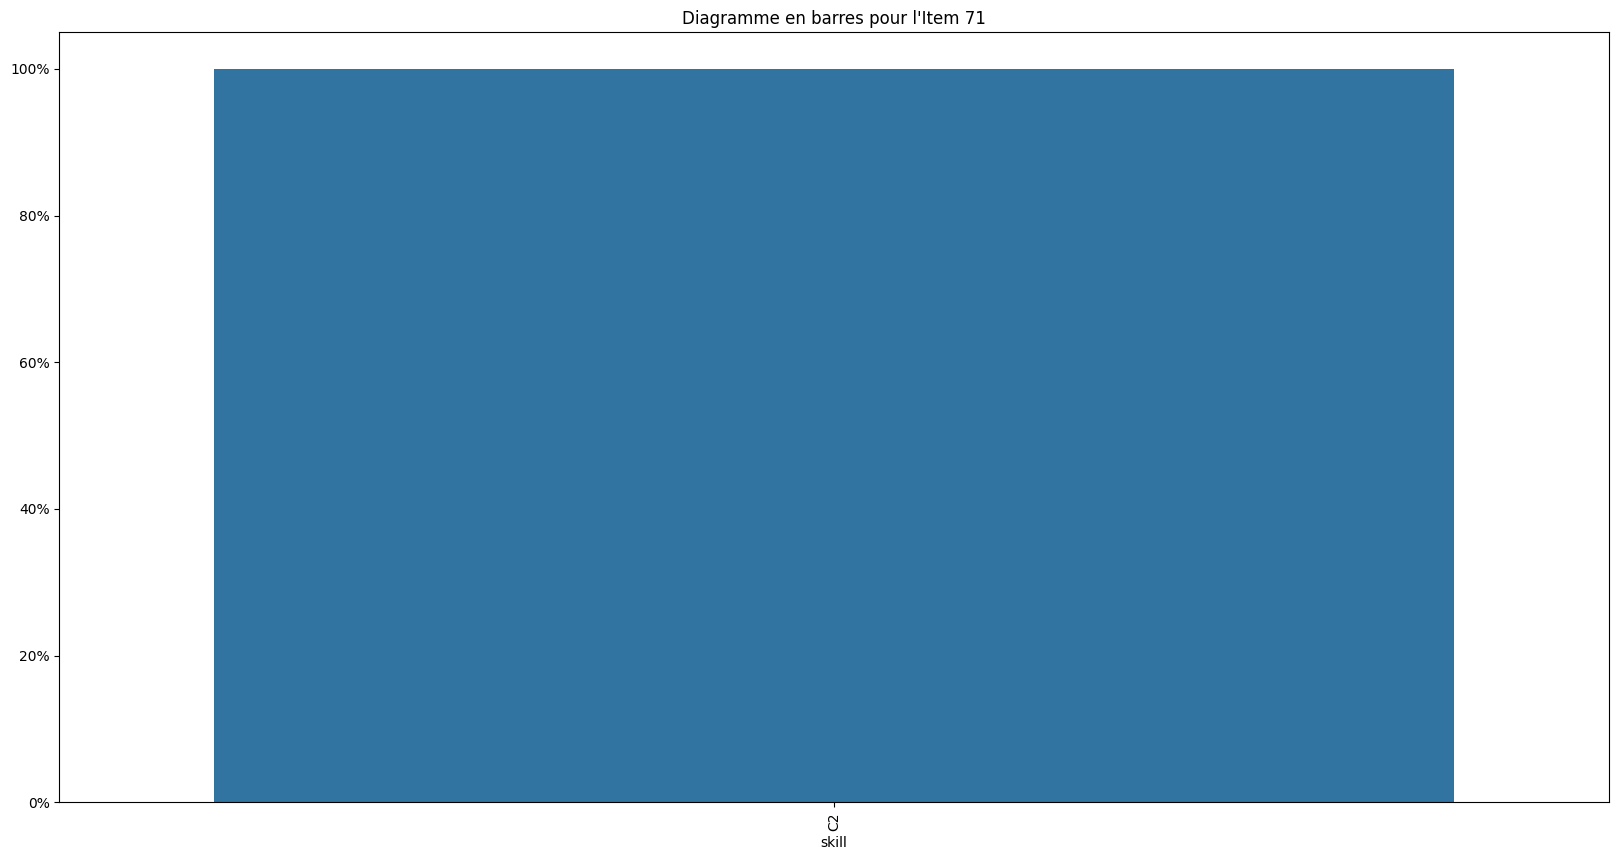

Item 71
skill      C2
ecn_item     
Item 71   1.0


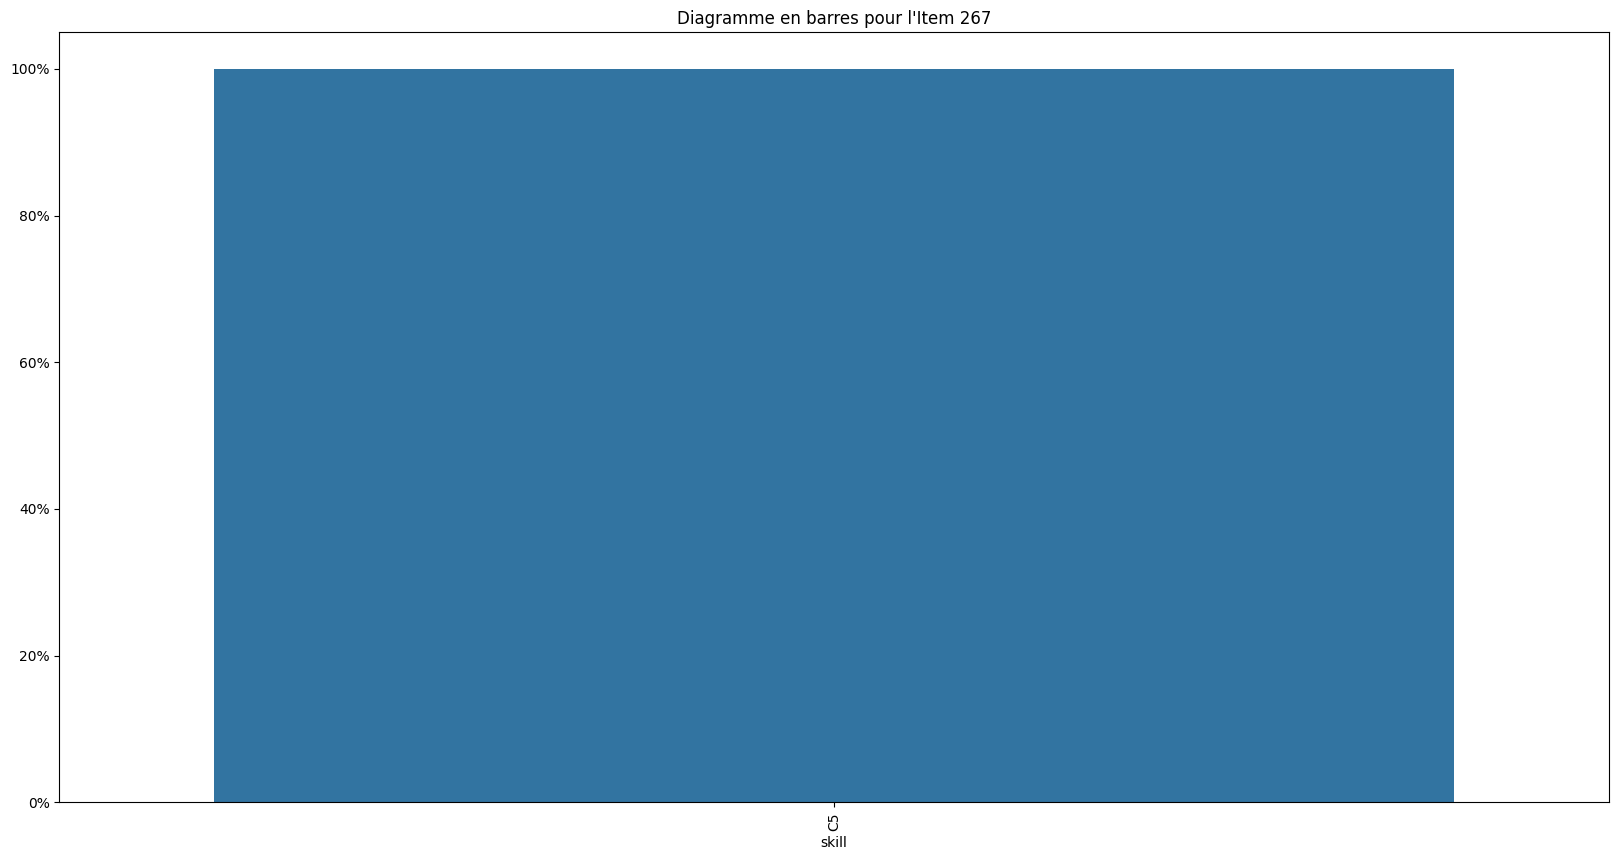

Item 267
skill      C5
ecn_item     
Item 267  1.0


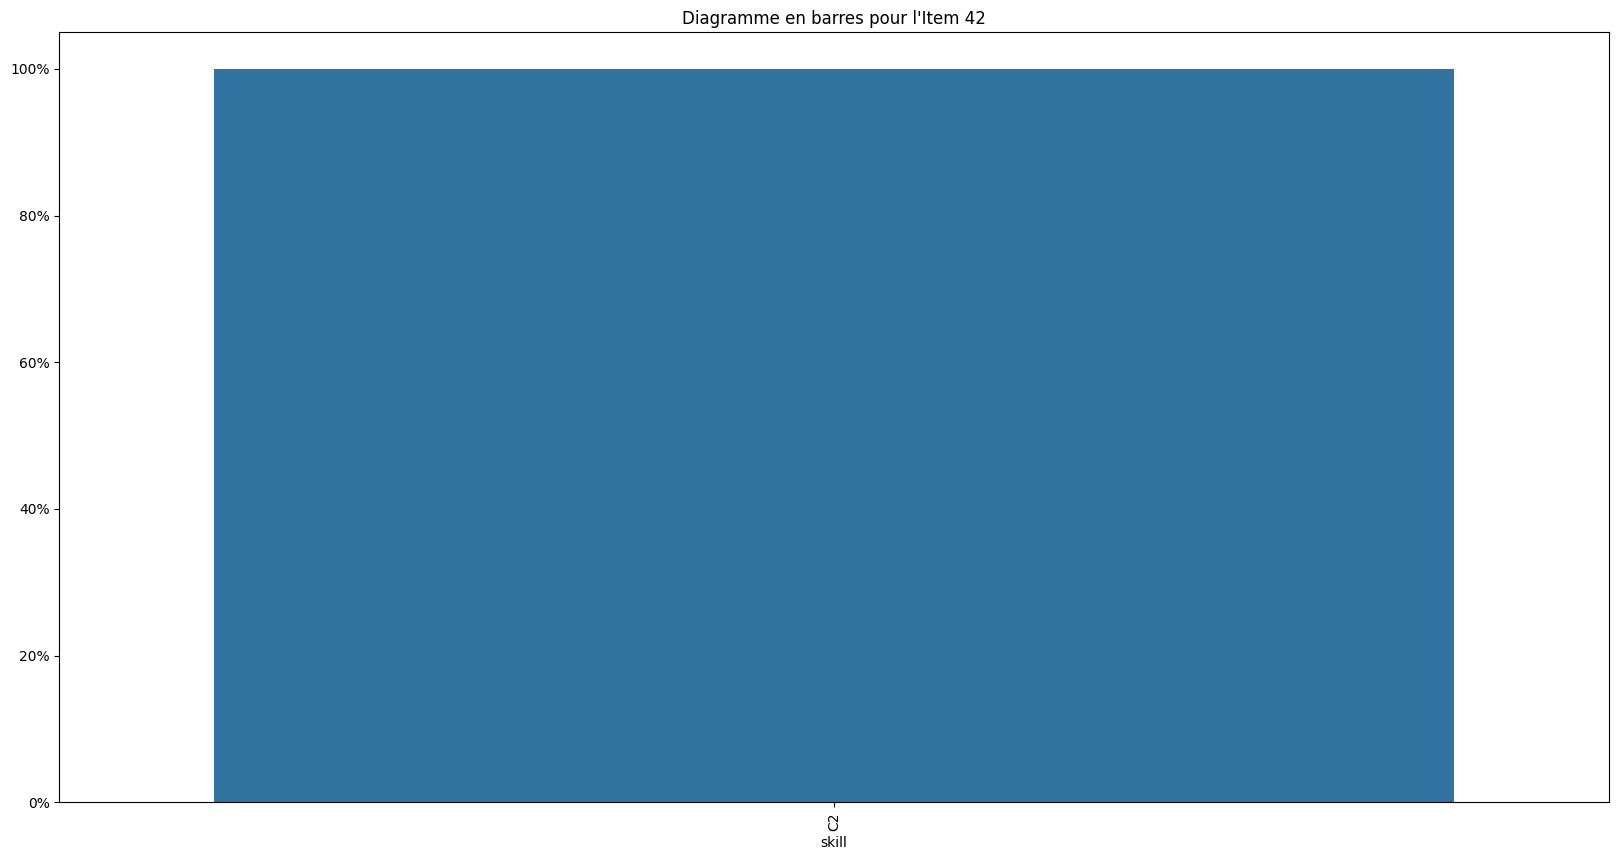

Item 42
skill      C2
ecn_item     
Item 42   1.0


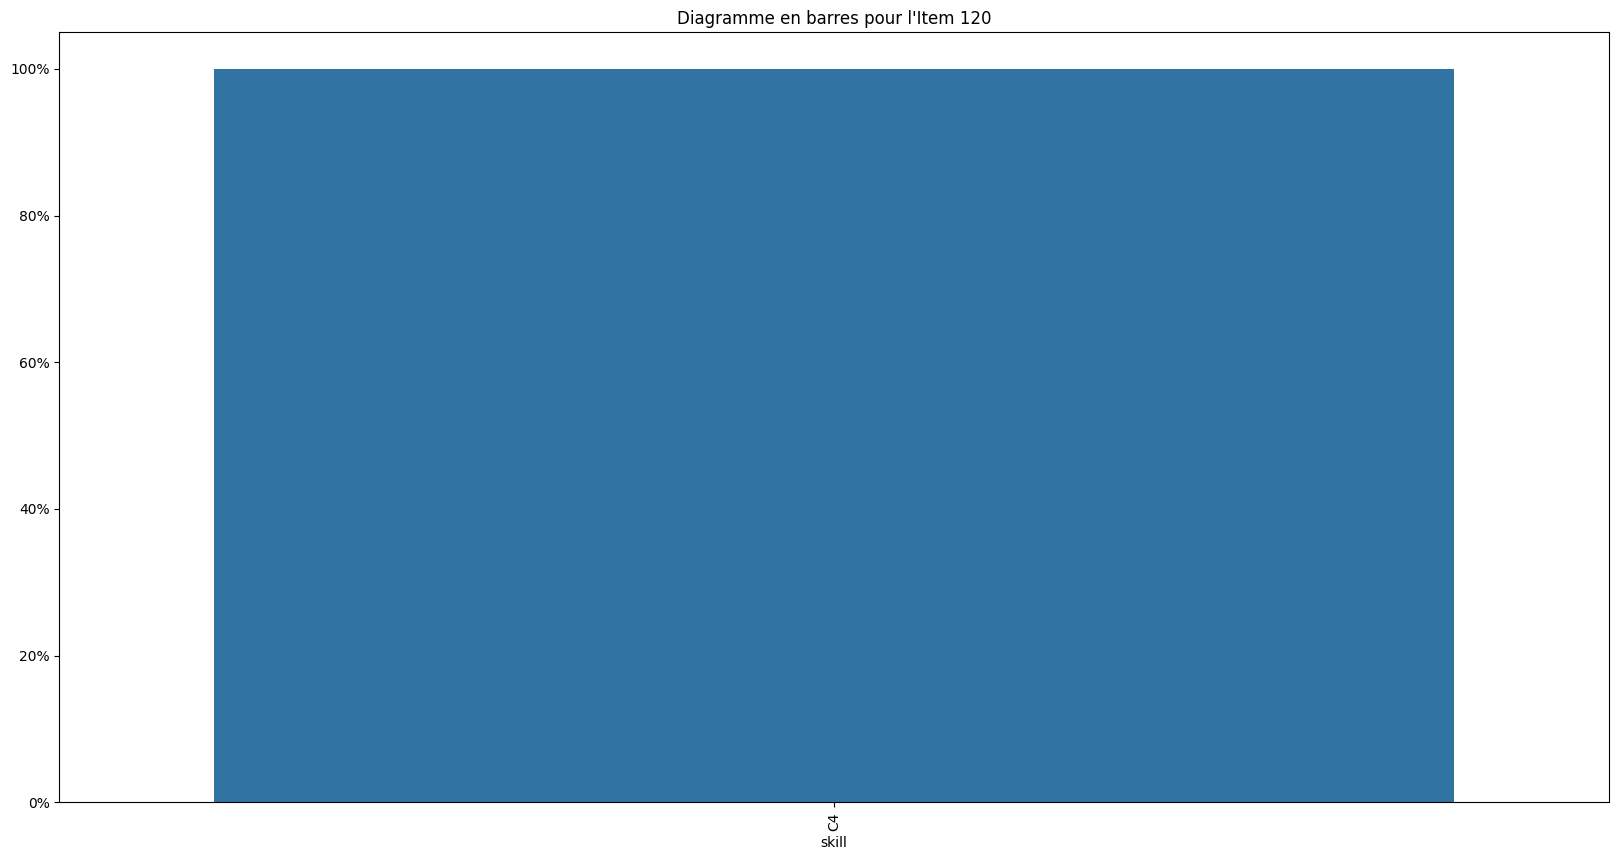

Item 120
skill      C4
ecn_item     
Item 120  1.0


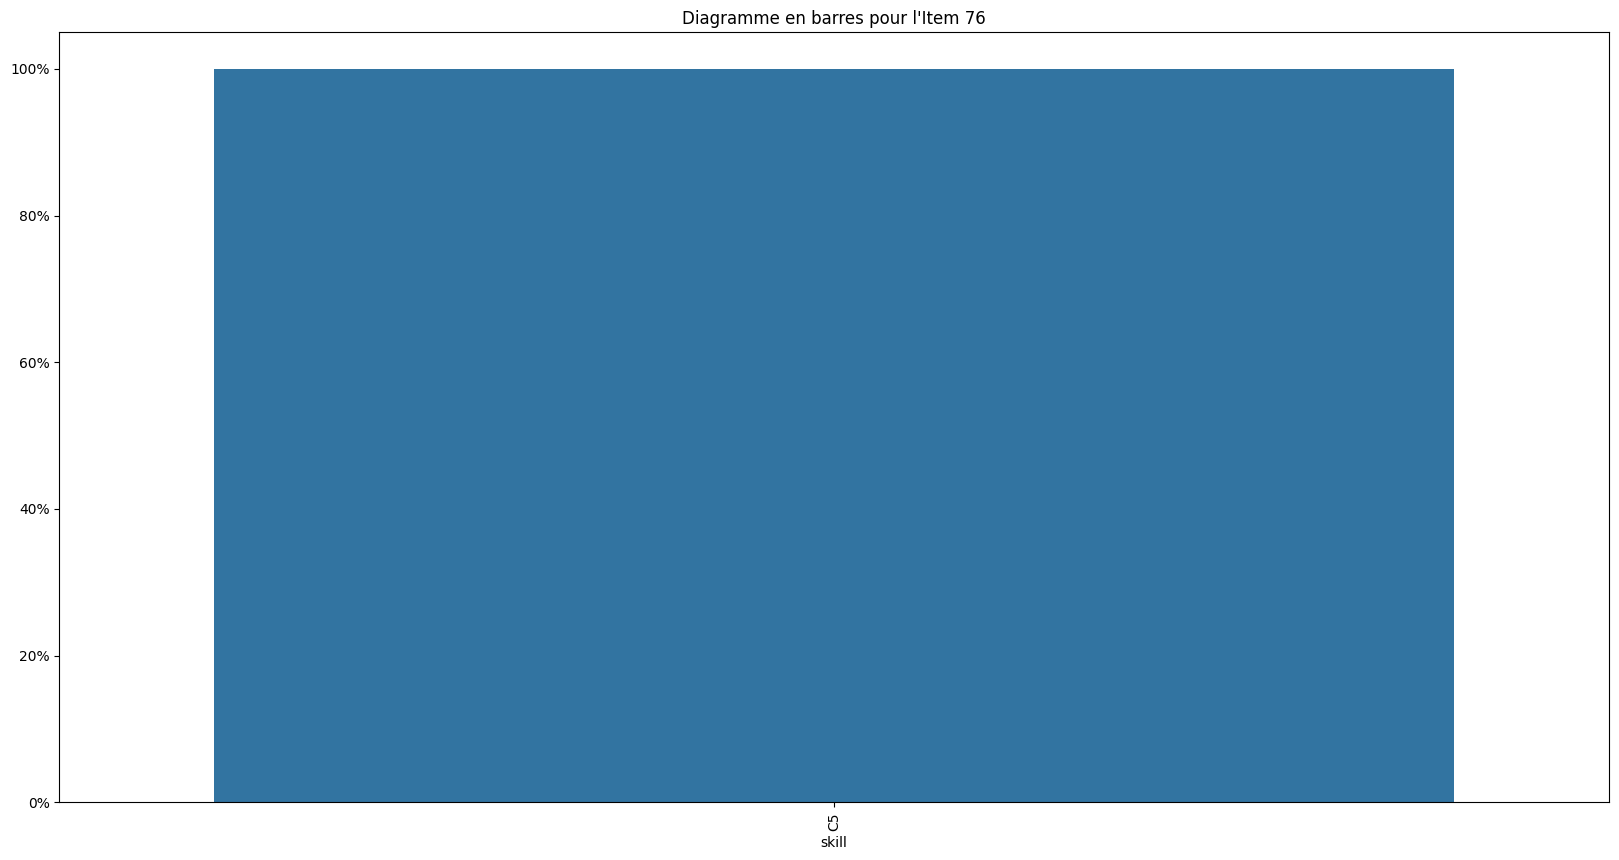

Item 76
skill      C5
ecn_item     
Item 76   1.0


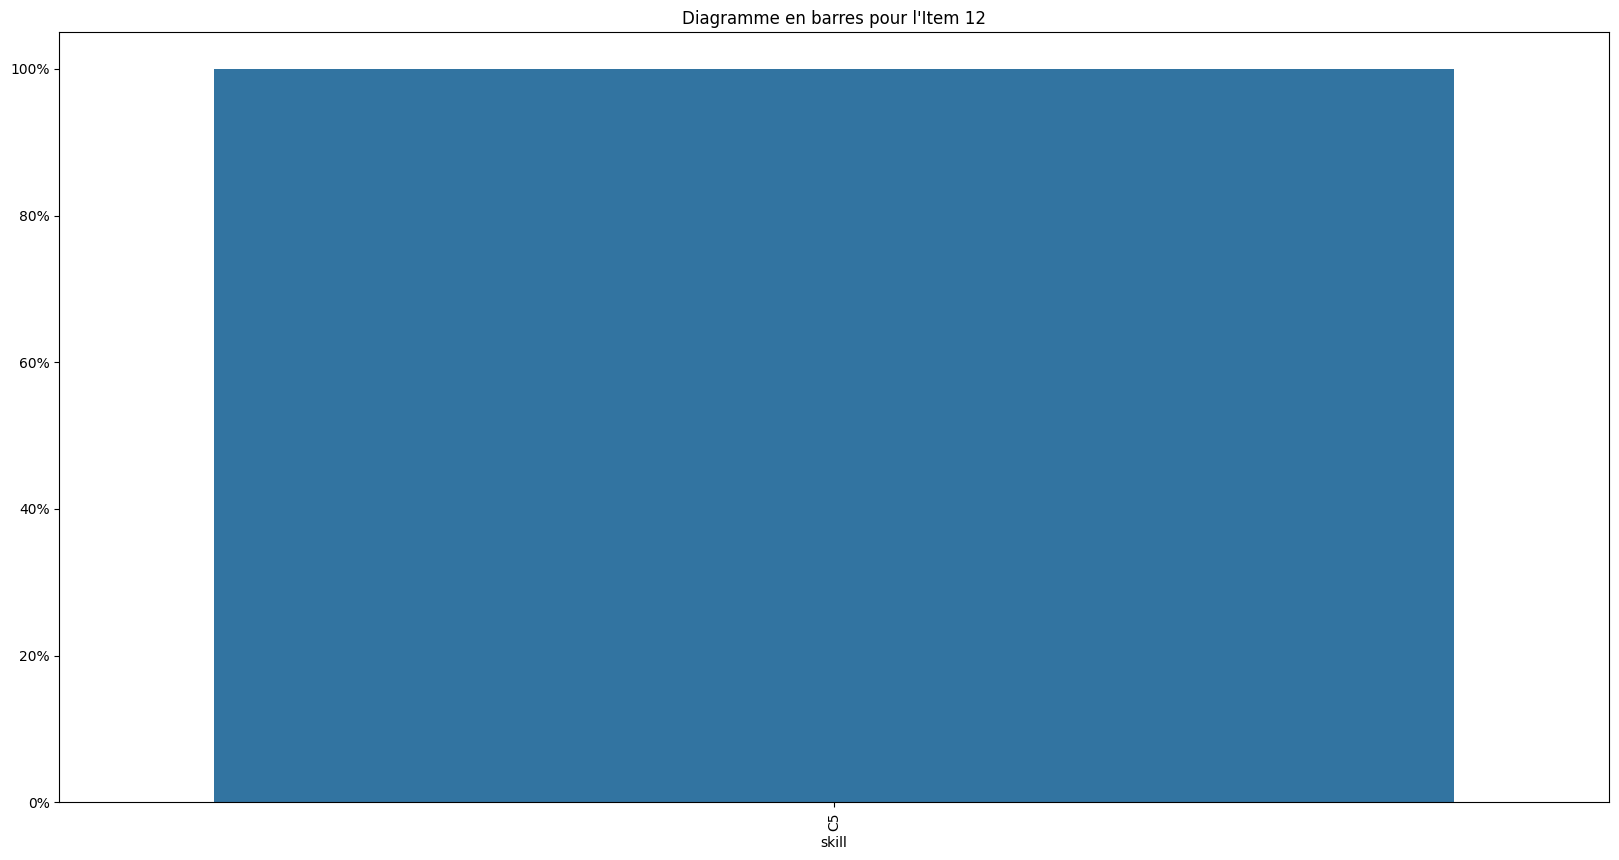

Item 12
skill      C5
ecn_item     
Item 12   1.0


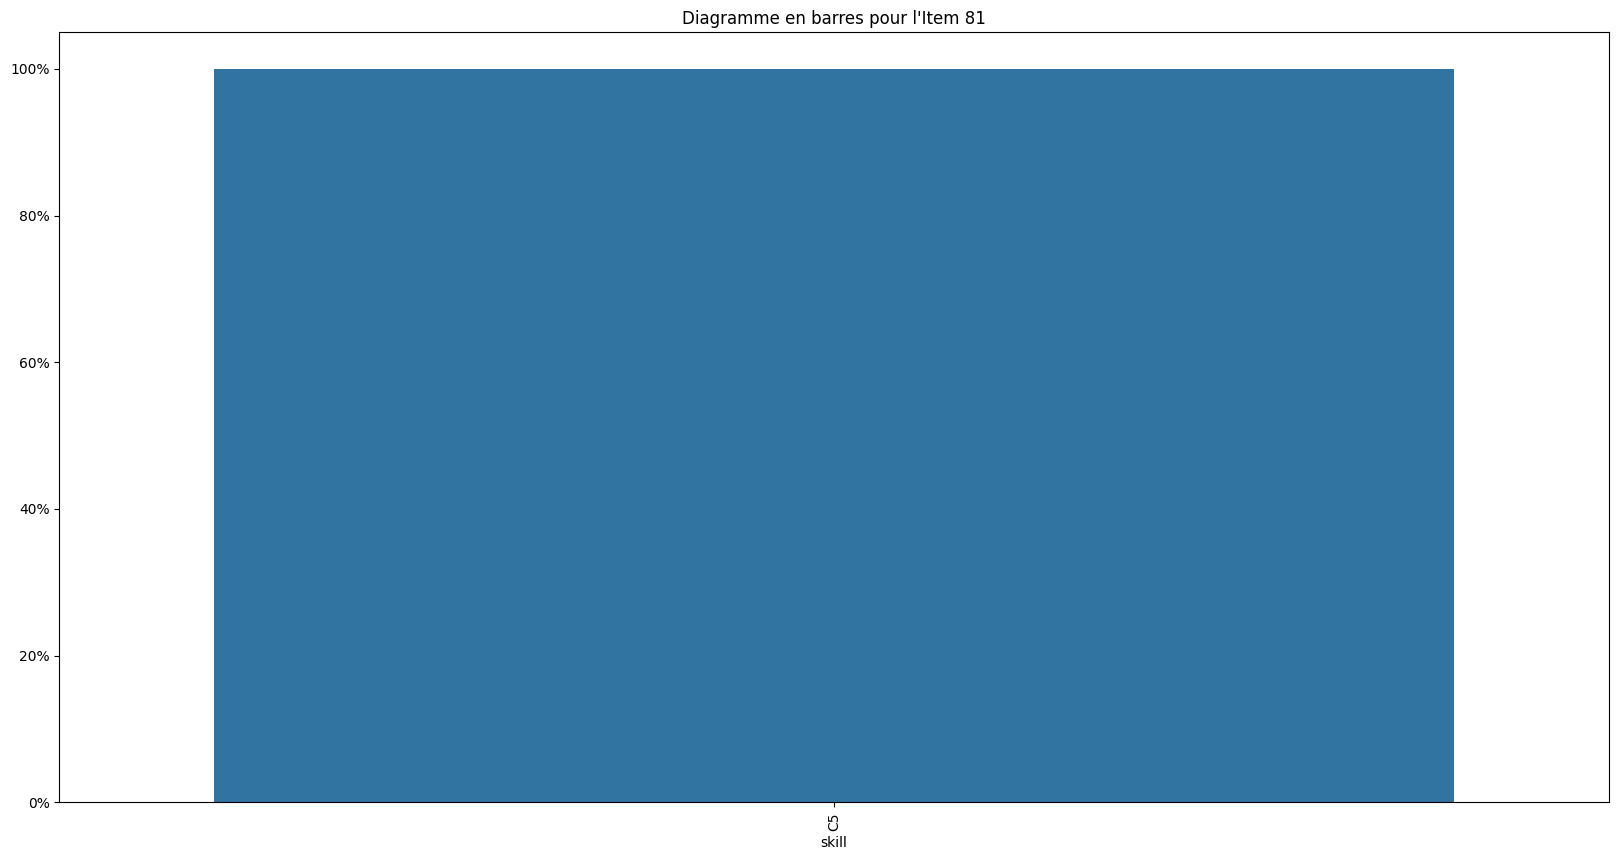

Item 81
skill      C5
ecn_item     
Item 81   1.0


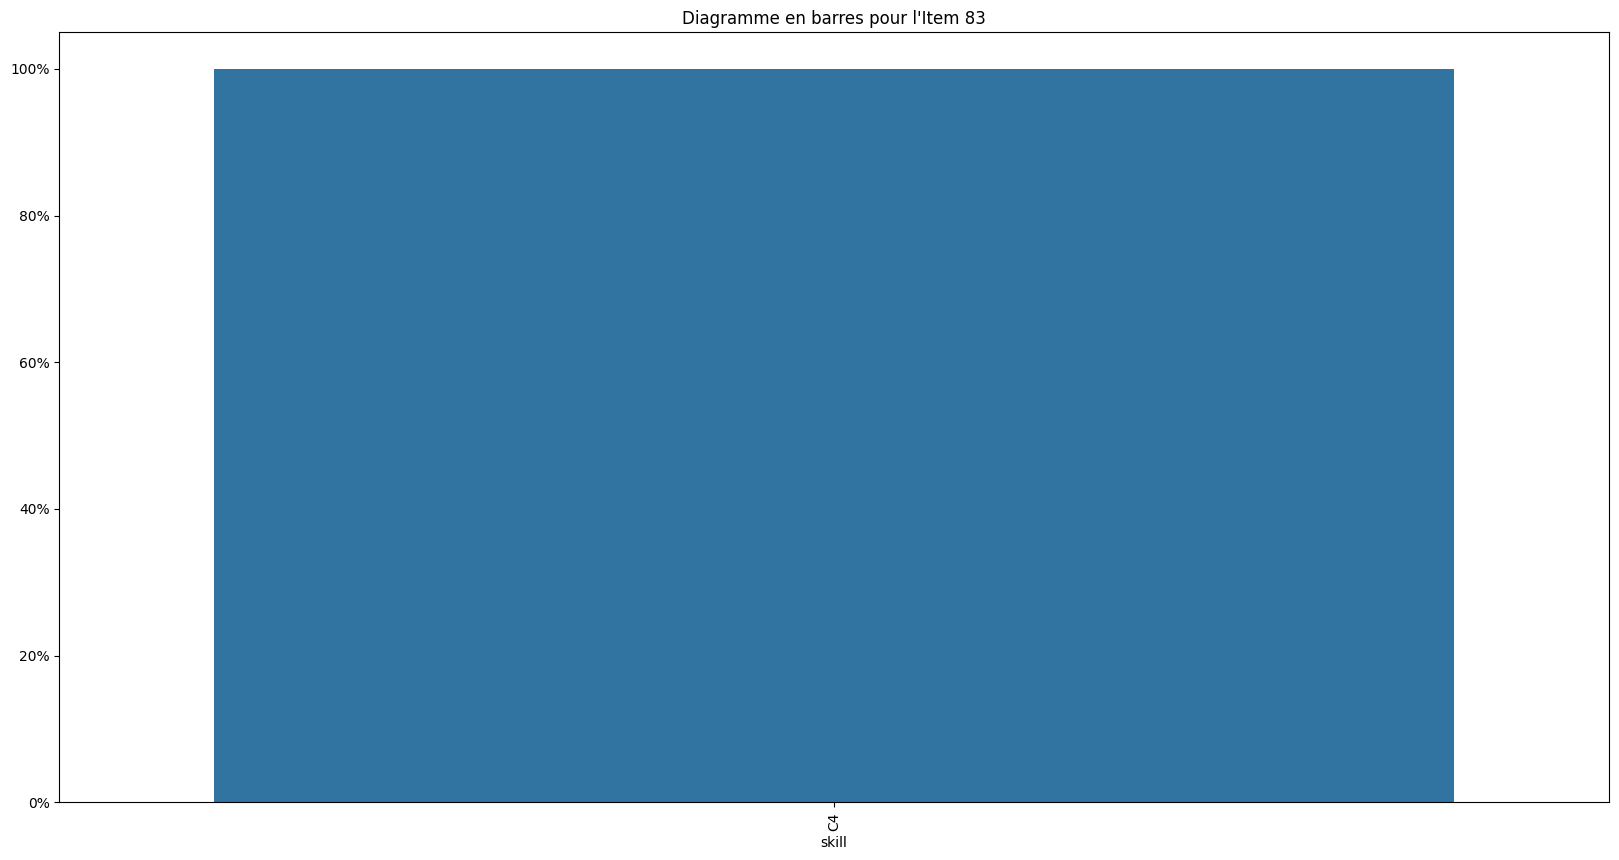

Item 83
skill      C4
ecn_item     
Item 83   1.0


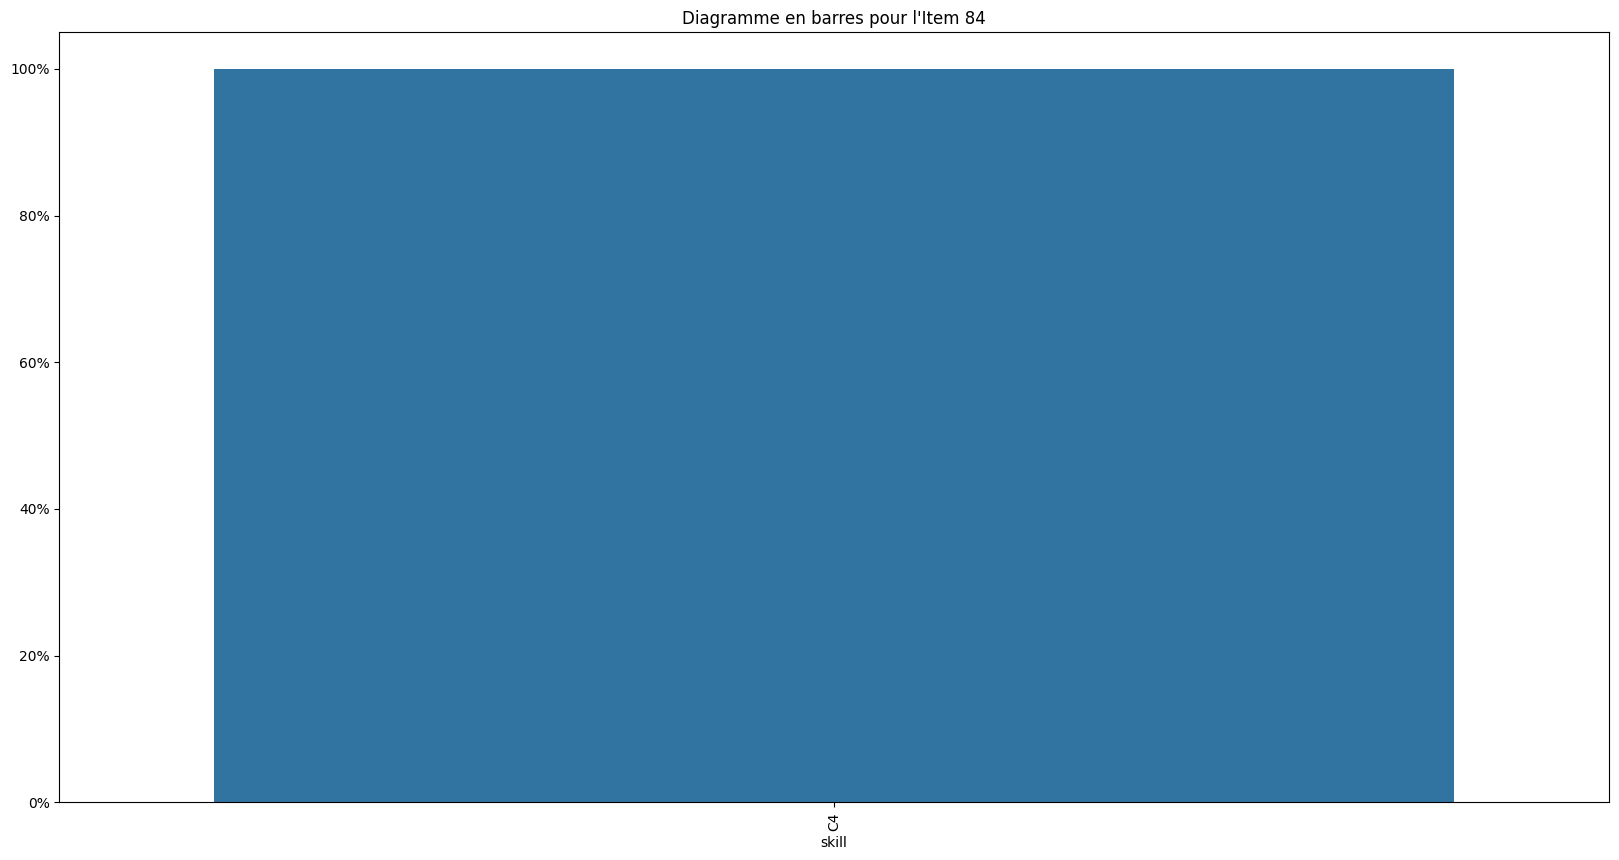

Item 84
skill      C4
ecn_item     
Item 84   1.0


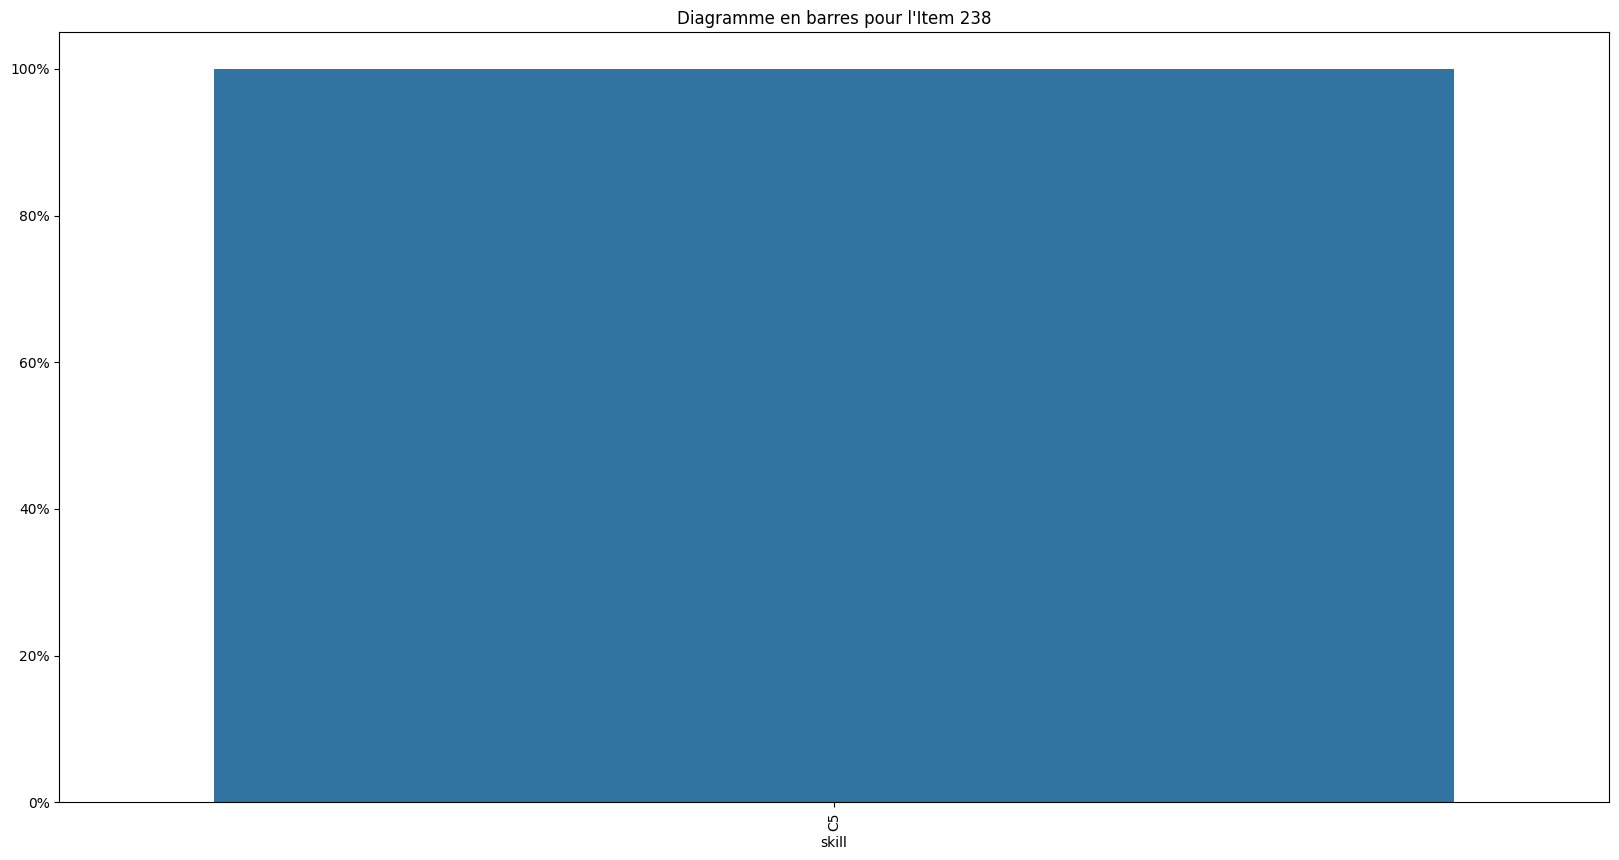

Item 238
skill      C5
ecn_item     
Item 238  1.0


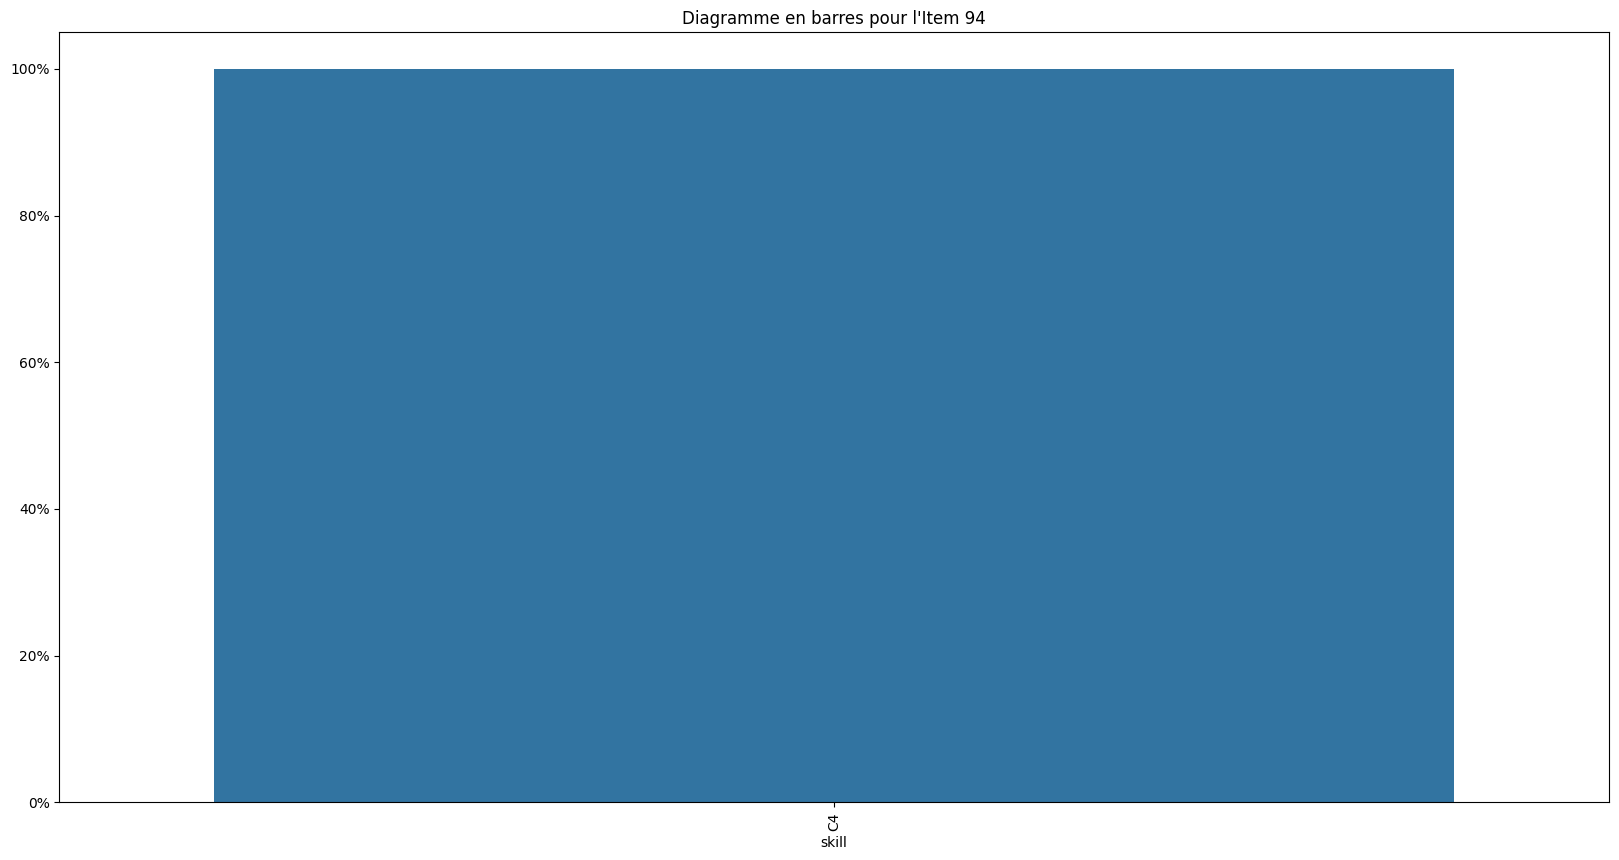

Item 94
skill      C4
ecn_item     
Item 94   1.0


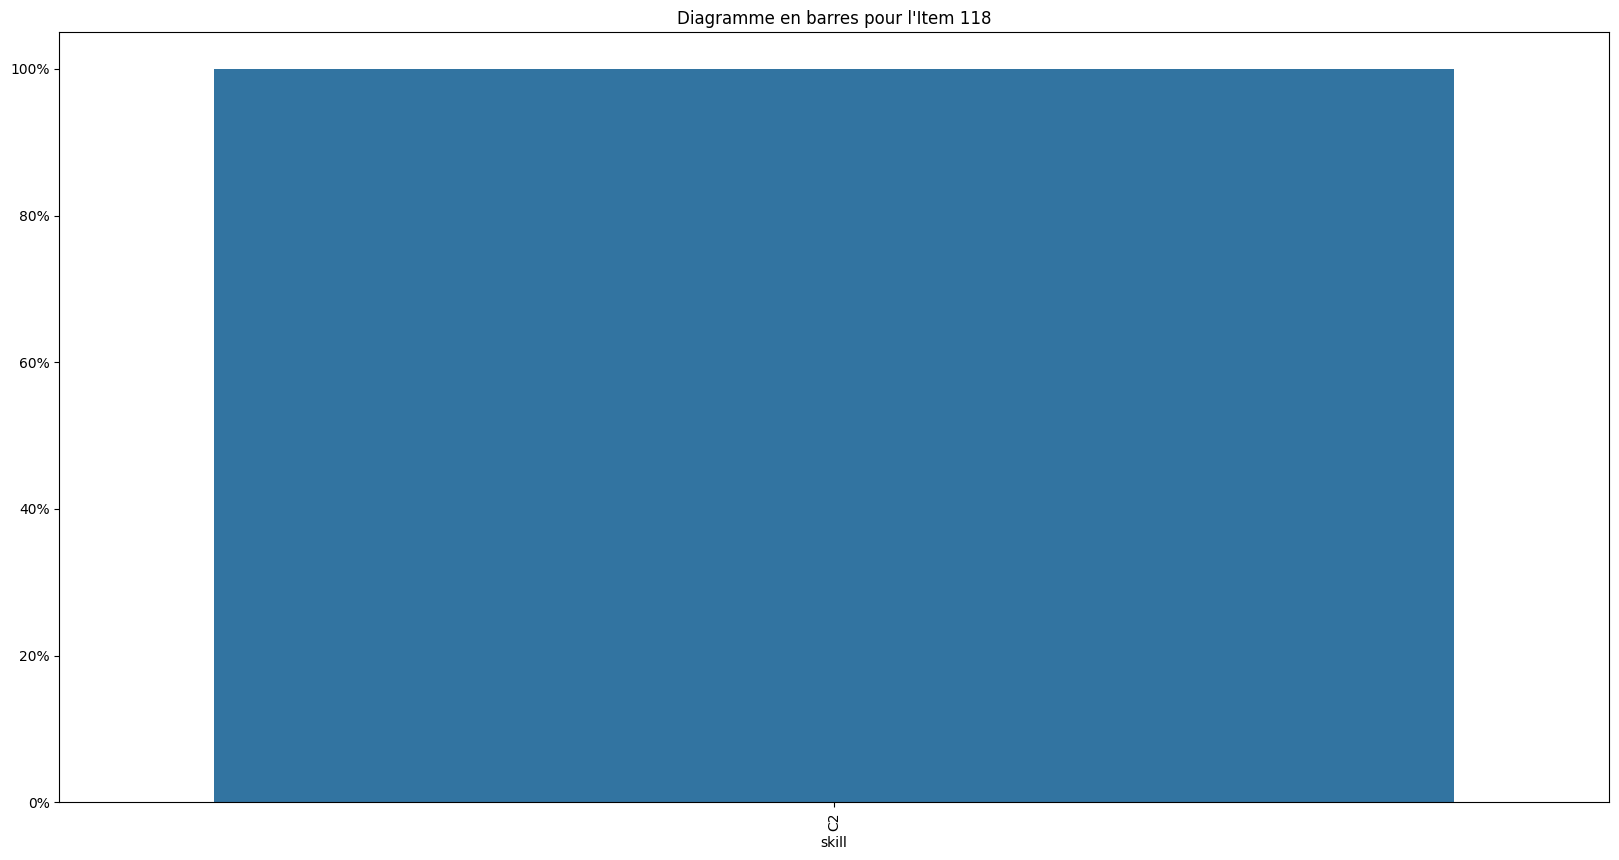

Item 118
skill      C2
ecn_item     
Item 118  1.0


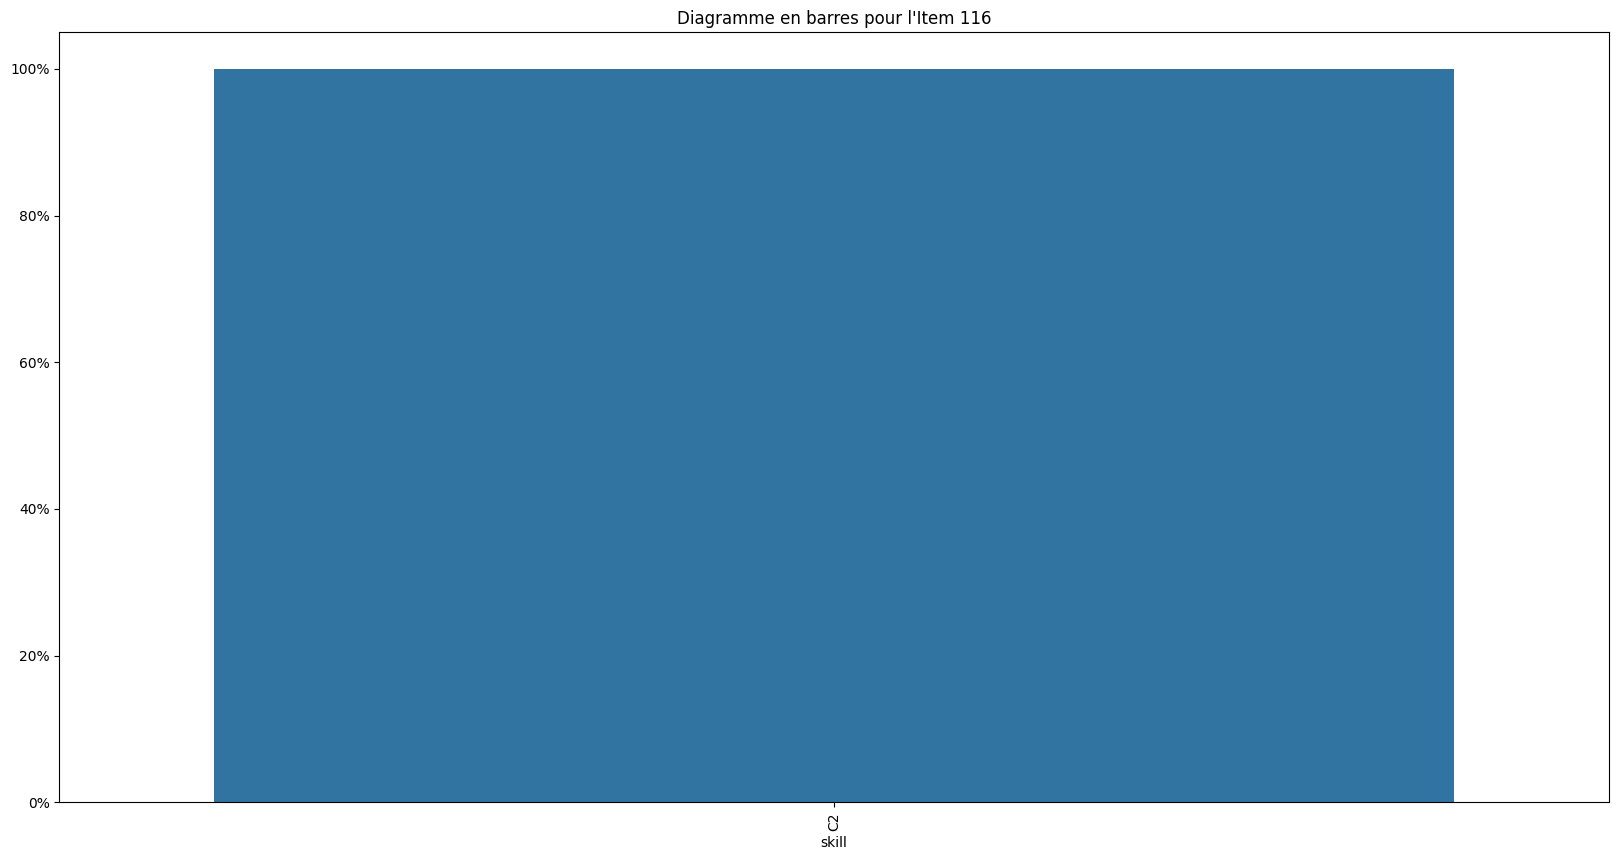

Item 116
skill      C2
ecn_item     
Item 116  1.0


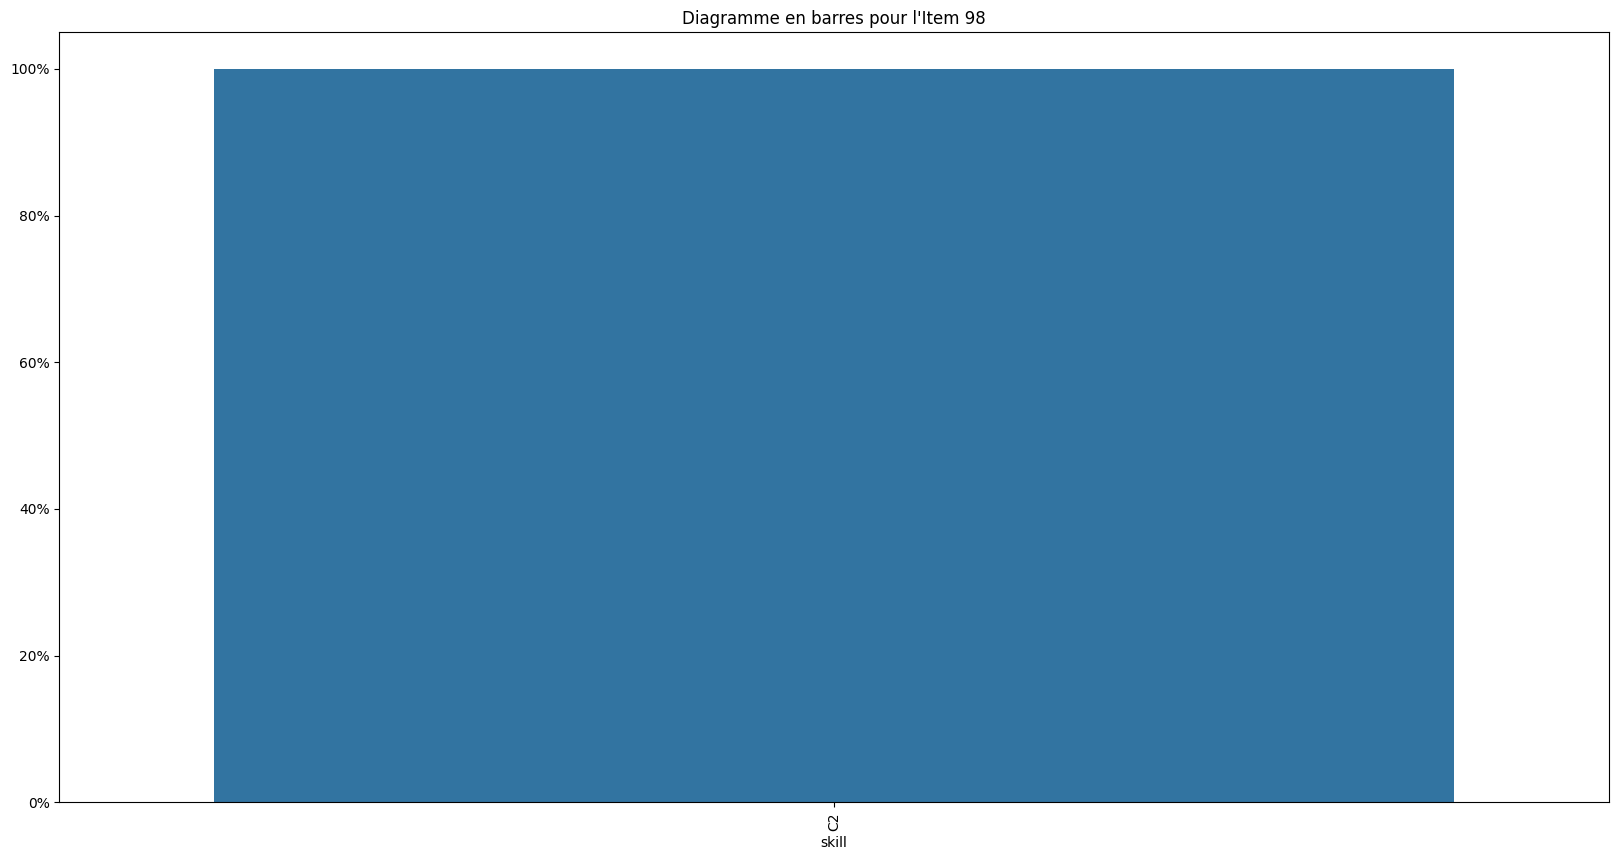

Item 98
skill      C2
ecn_item     
Item 98   1.0


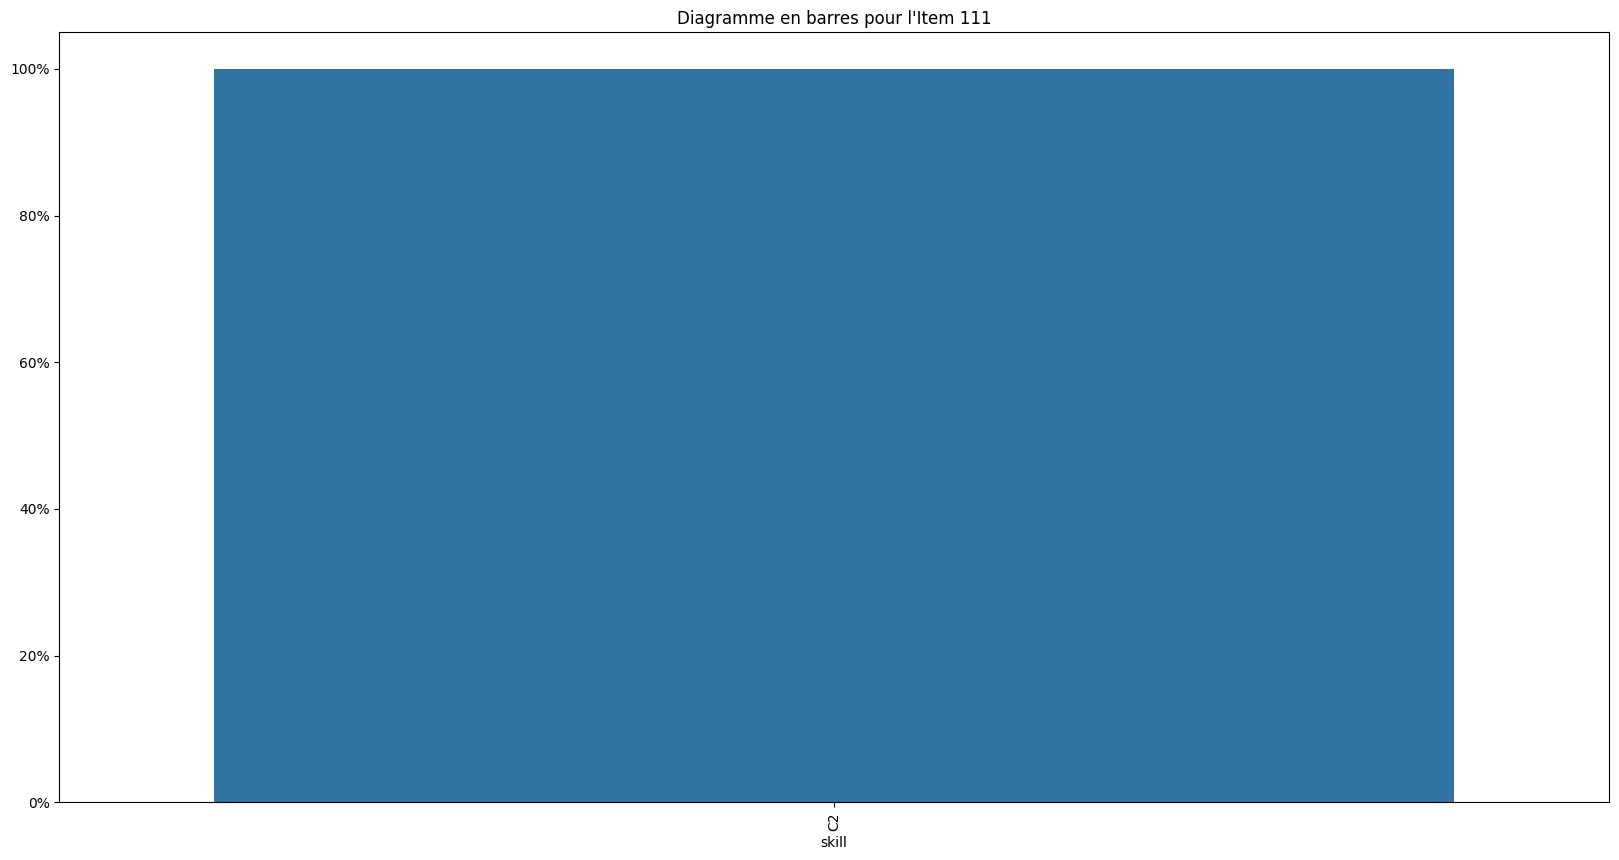

Item 111
skill      C2
ecn_item     
Item 111  1.0


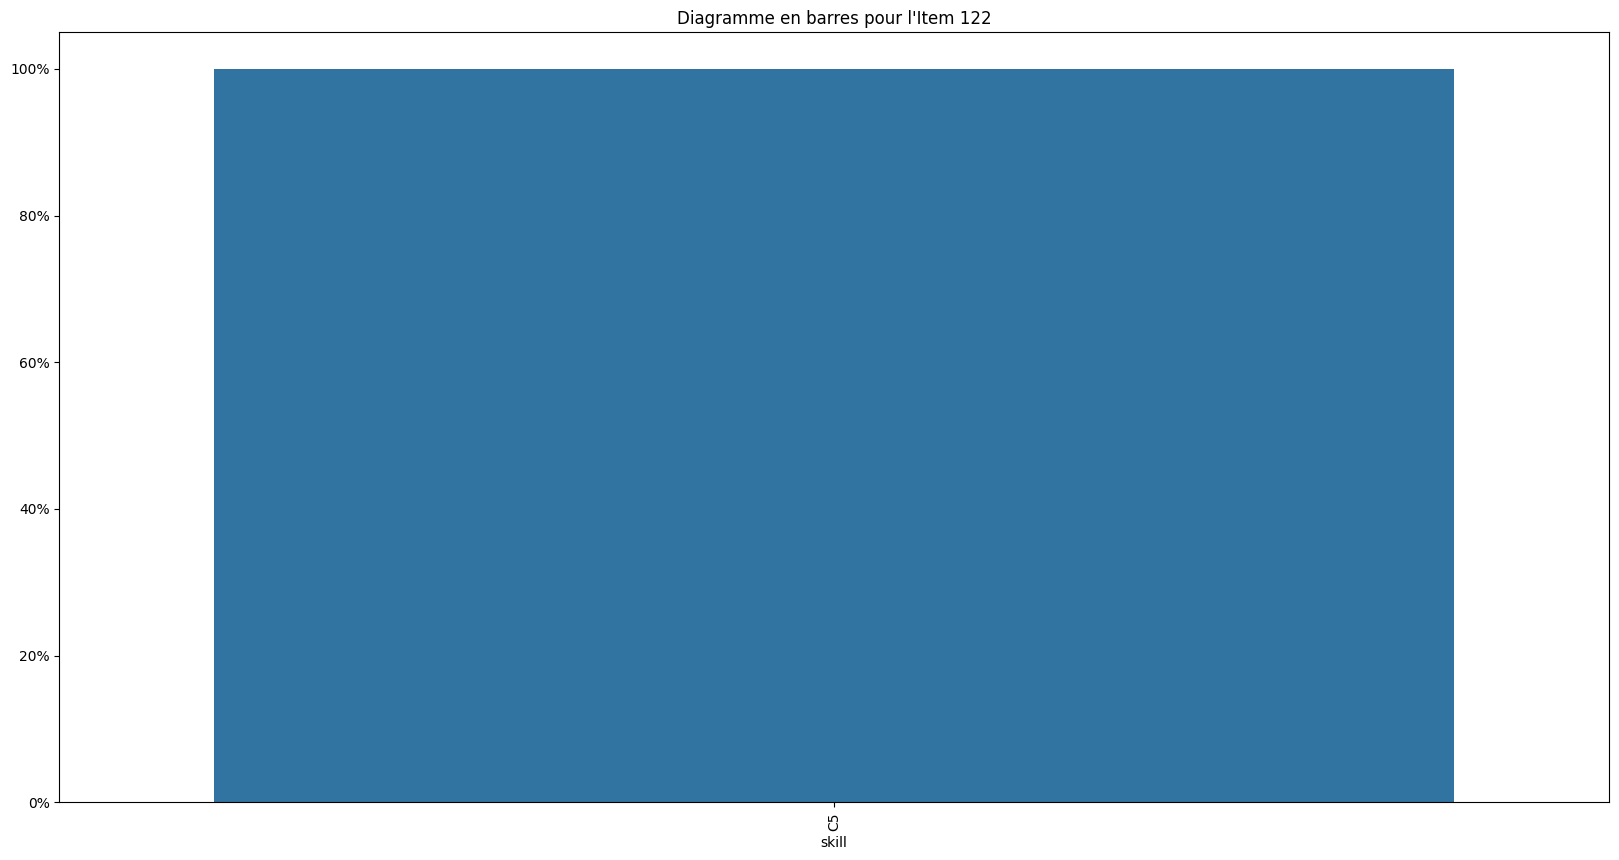

Item 122
skill      C5
ecn_item     
Item 122  1.0


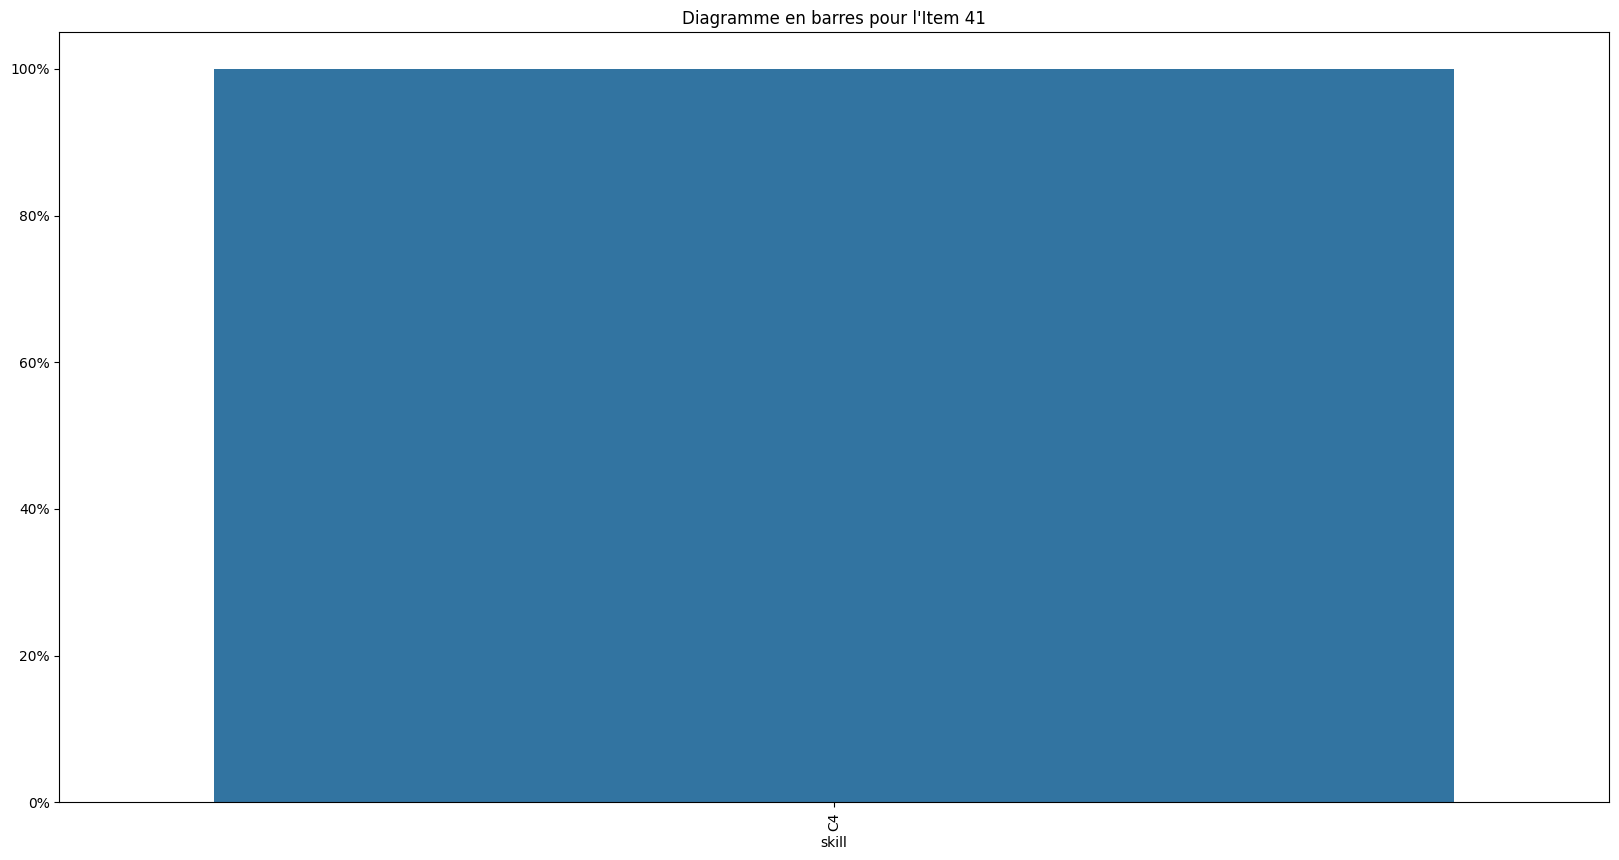

Item 41
skill      C4
ecn_item     
Item 41   1.0


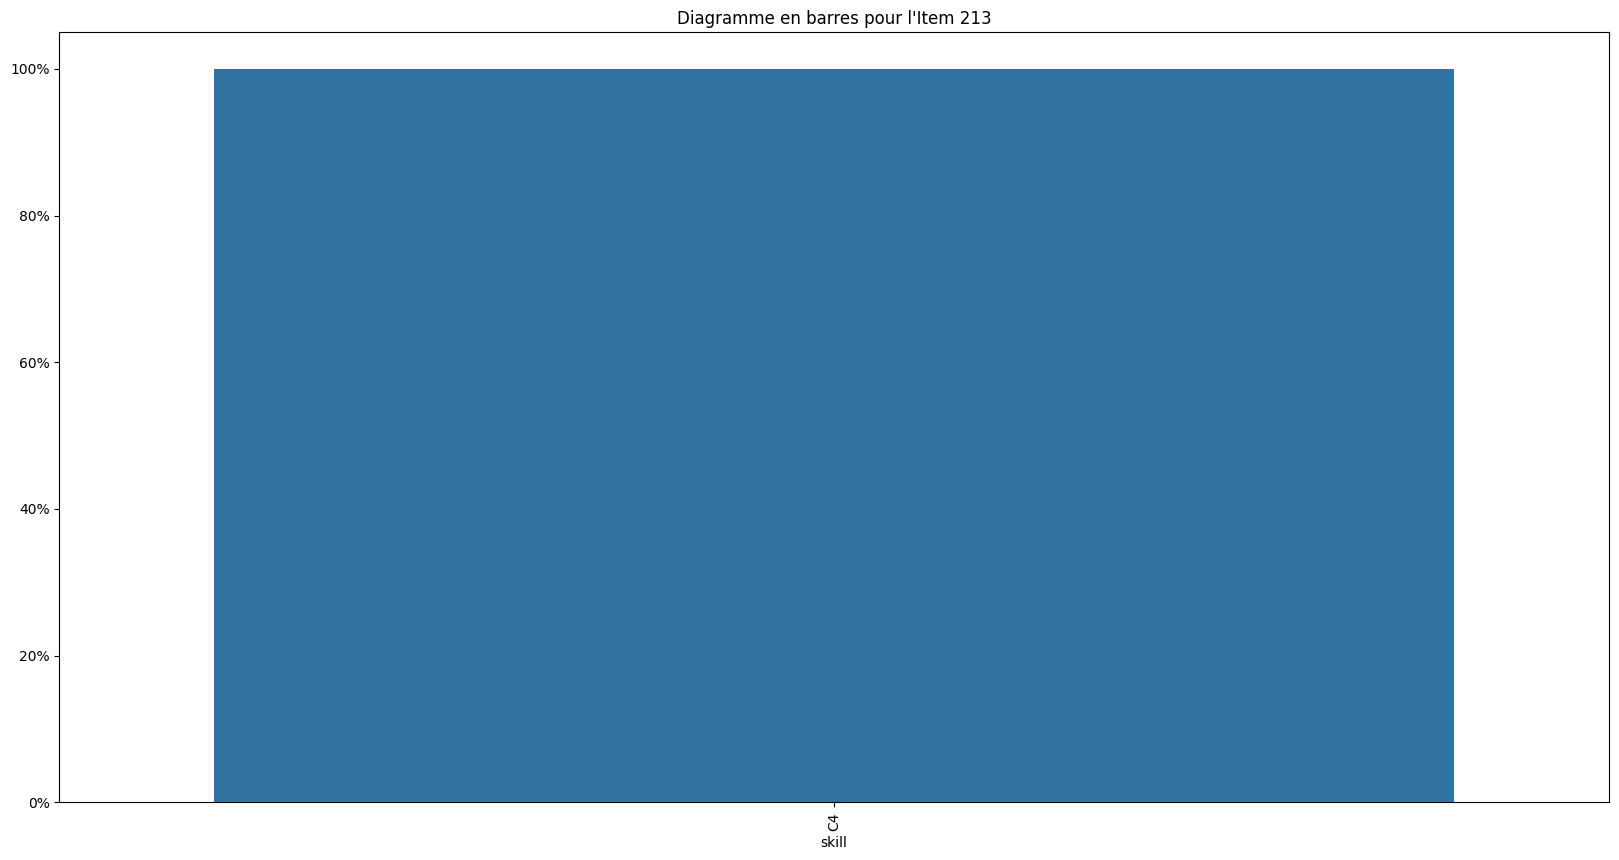

Item 213
skill      C4
ecn_item     
Item 213  1.0


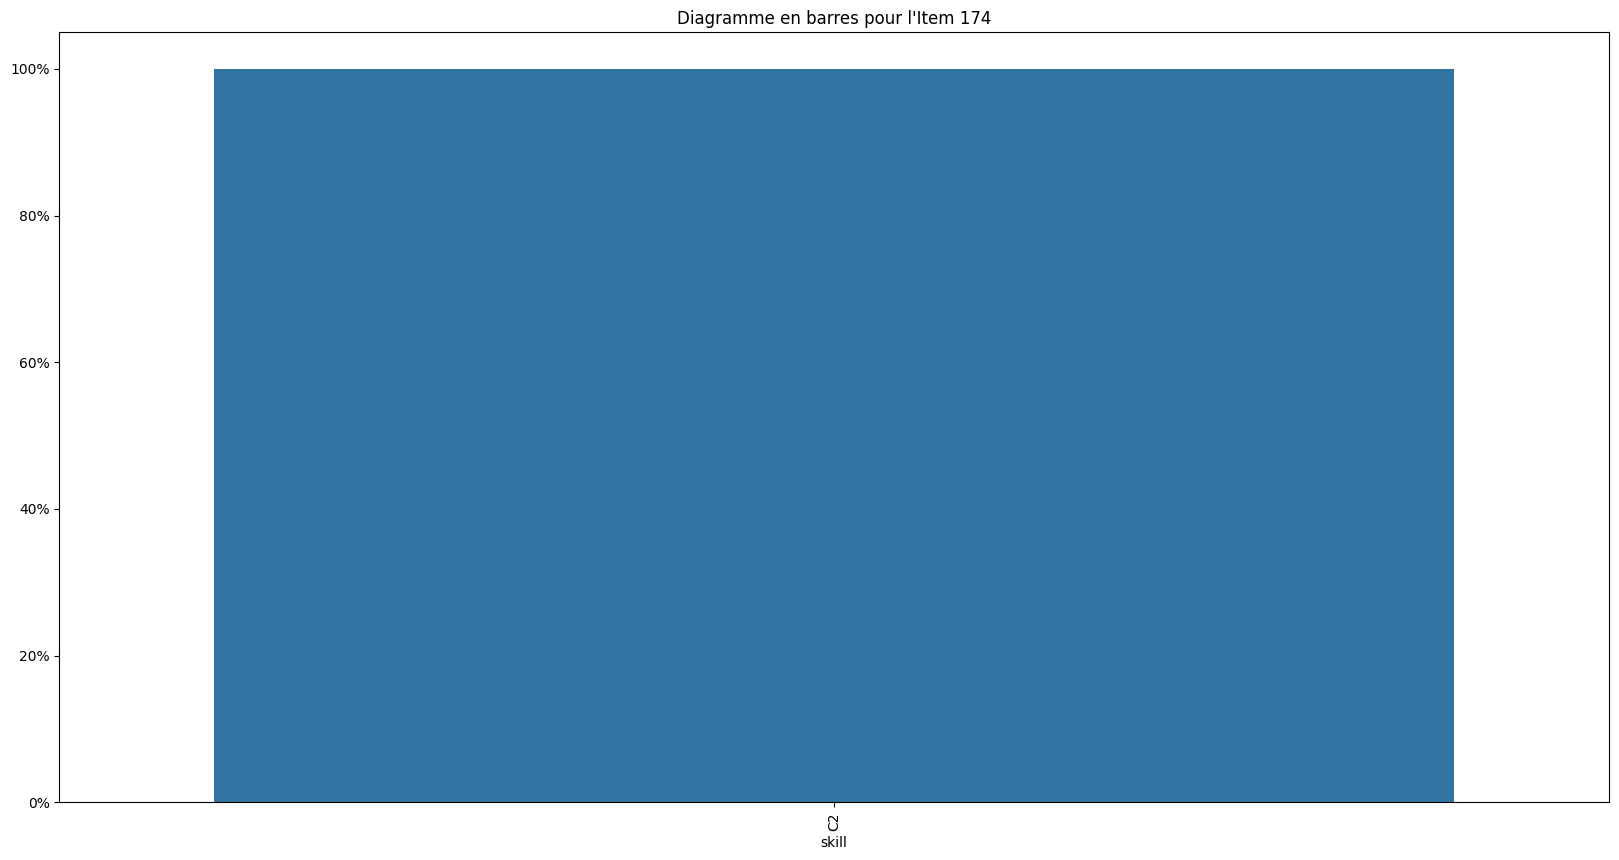

Item 174
skill      C2
ecn_item     
Item 174  1.0


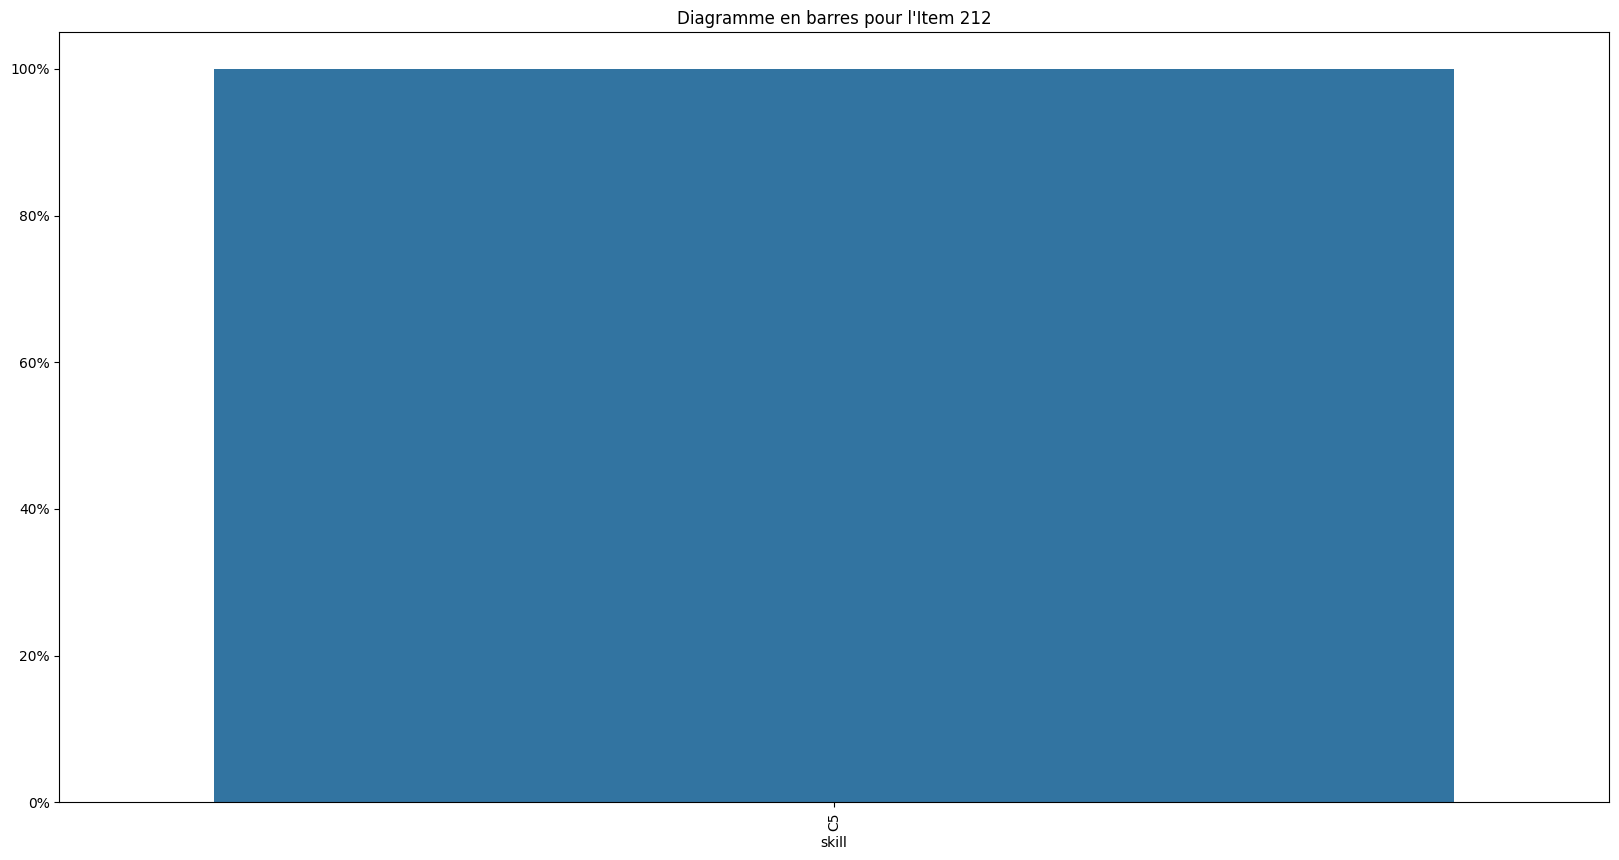

Item 212
skill      C5
ecn_item     
Item 212  1.0


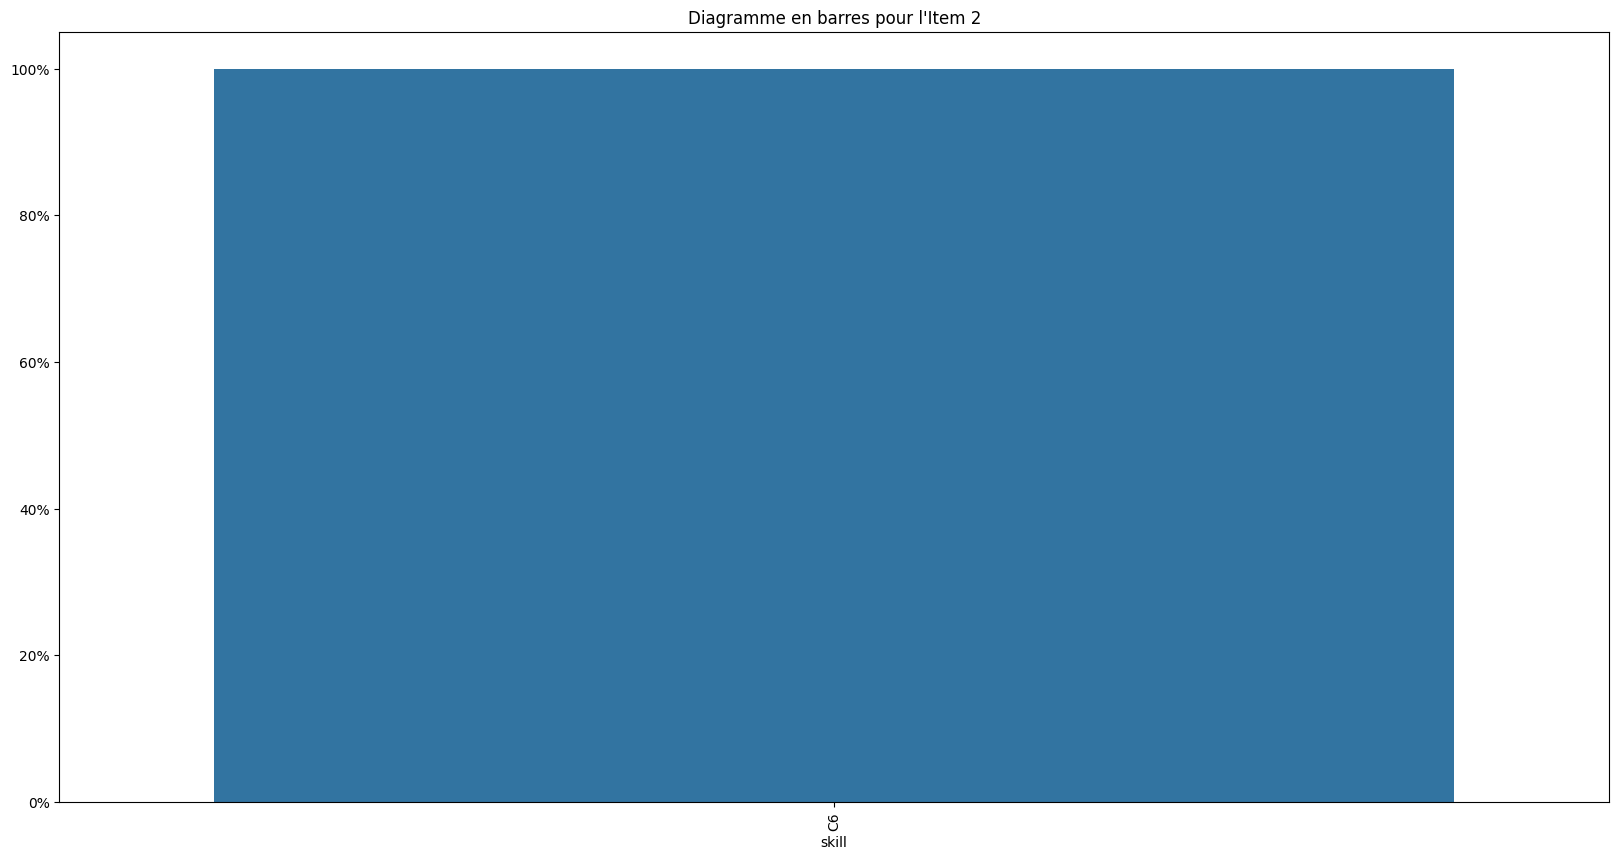

Item 2
skill      C6
ecn_item     
Item 2    1.0


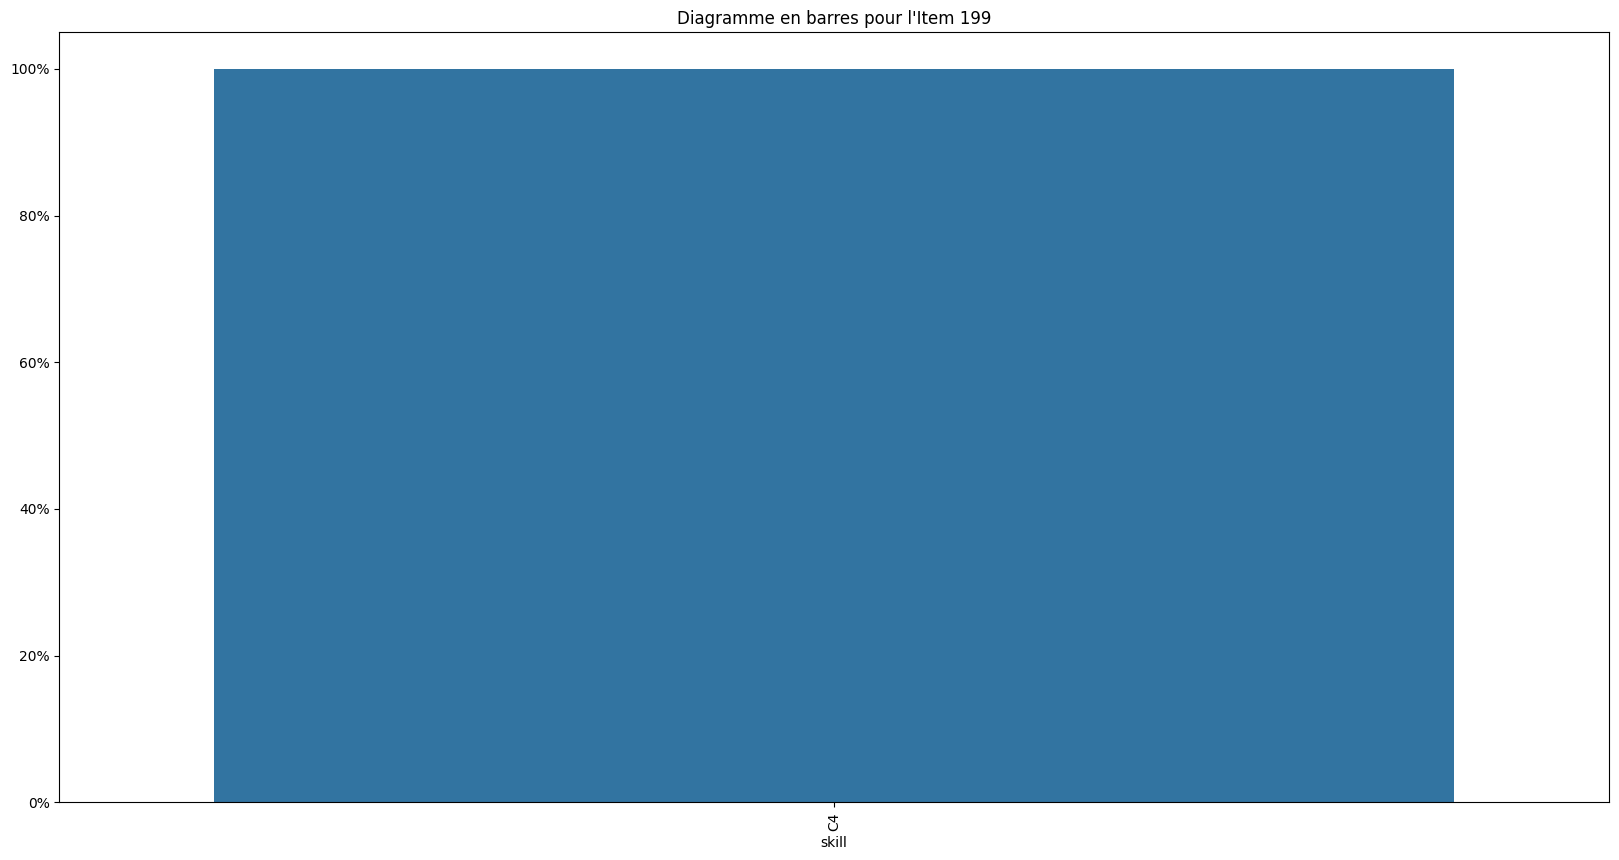

Item 199
skill      C4
ecn_item     
Item 199  1.0


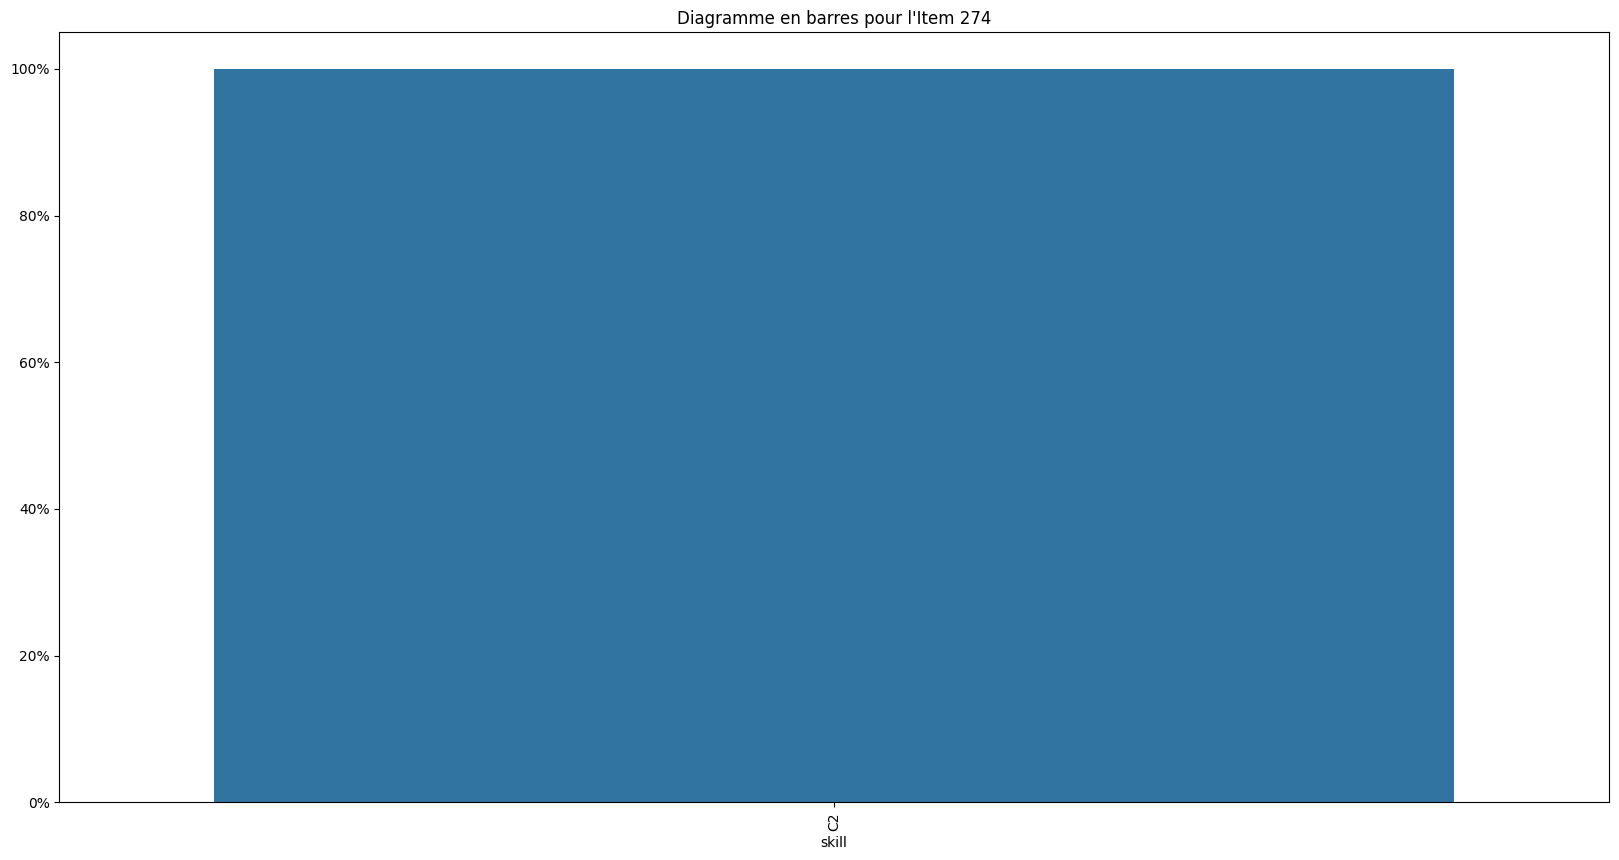

Item 274
skill      C2
ecn_item     
Item 274  1.0


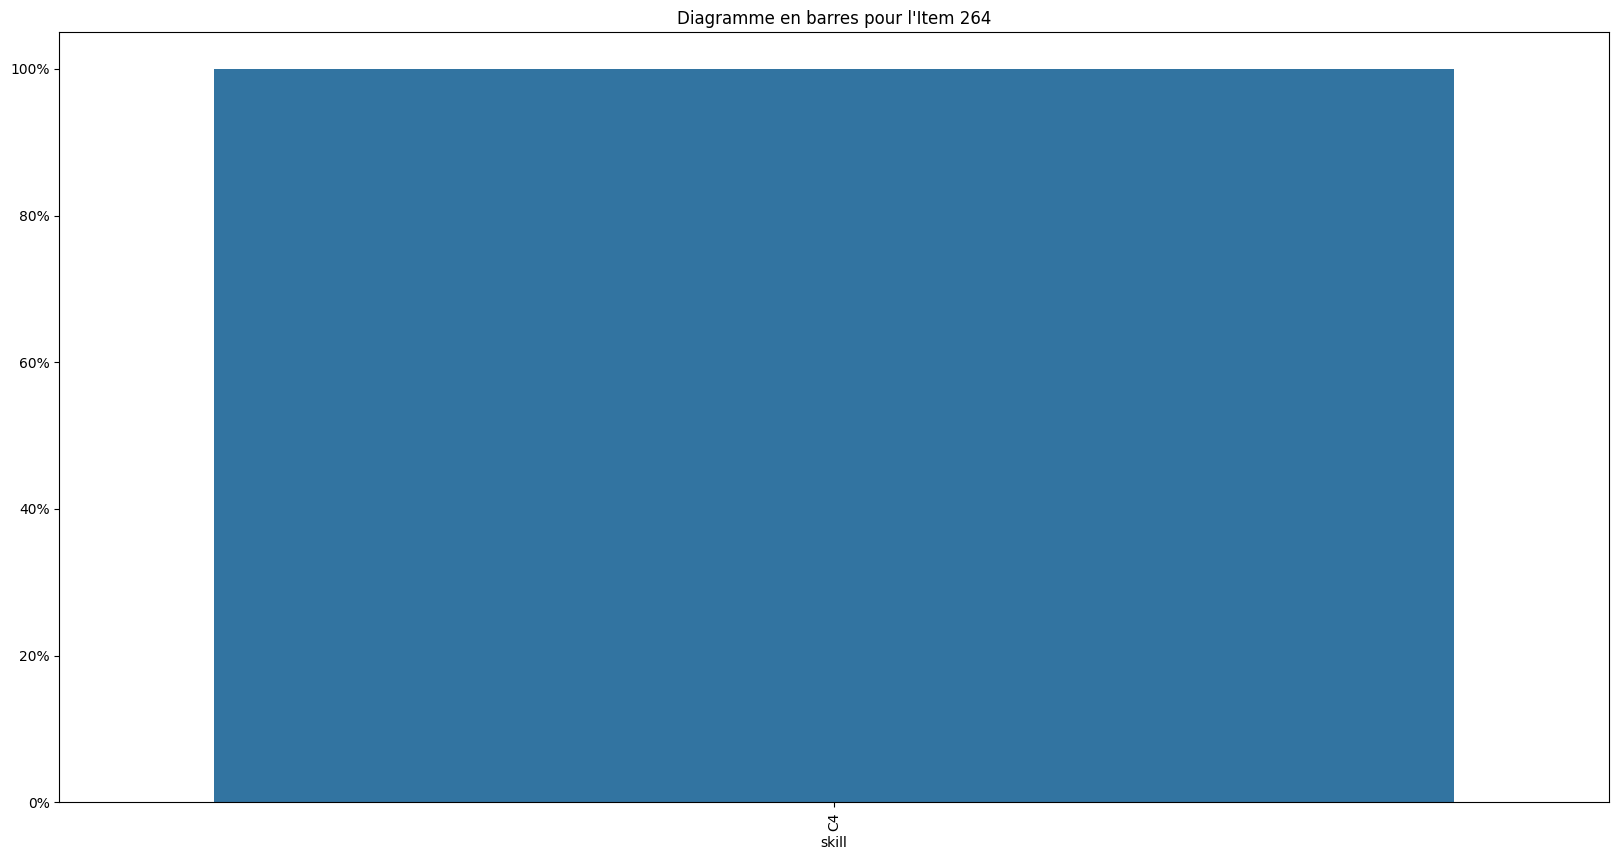

Item 264
skill      C4
ecn_item     
Item 264  1.0


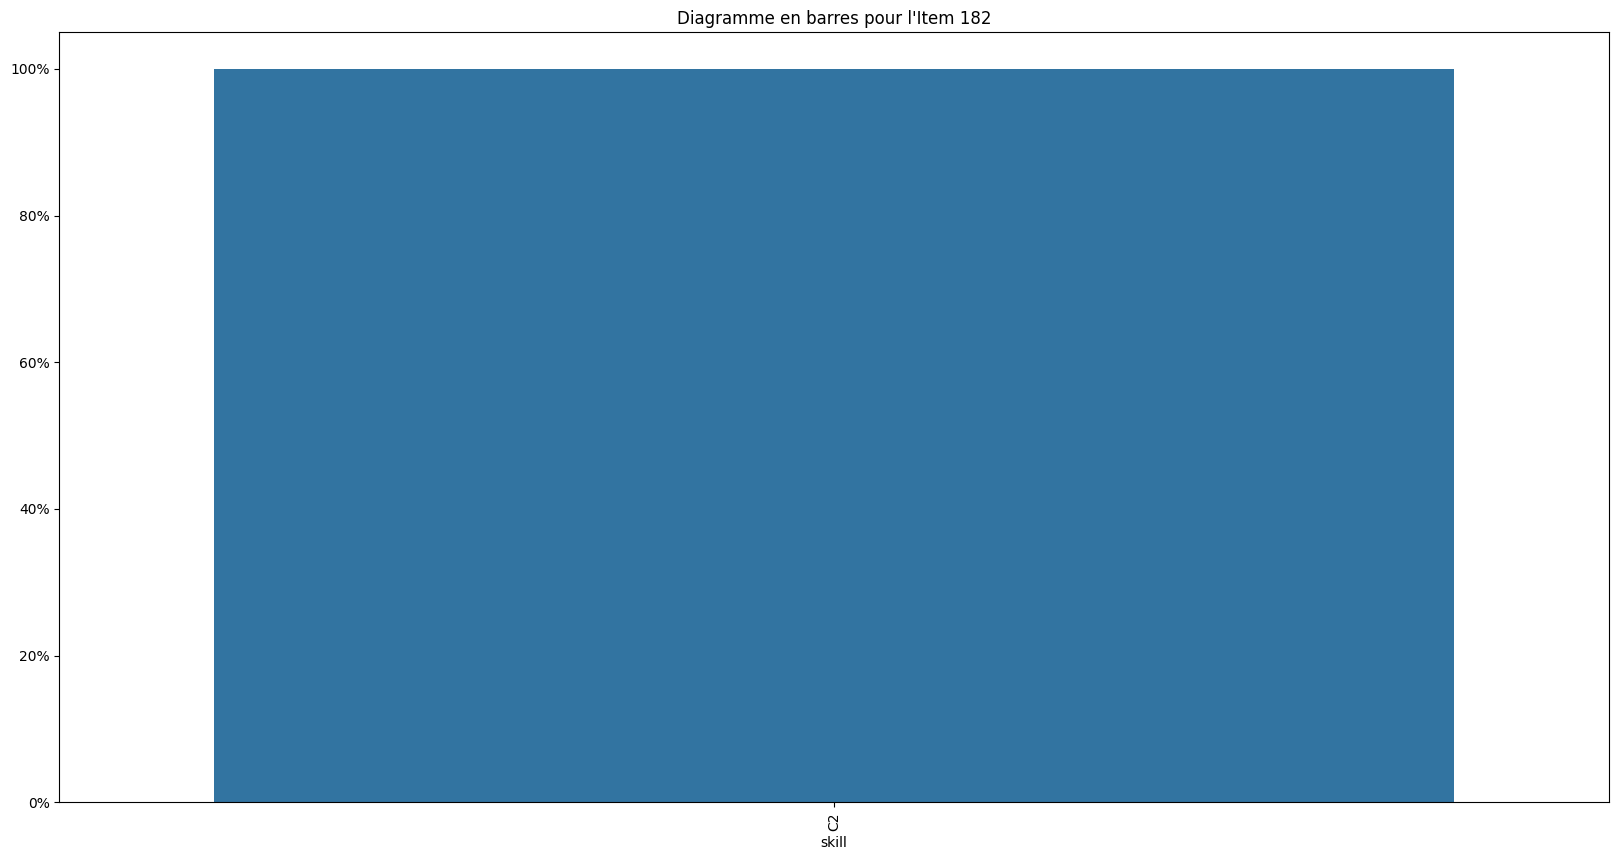

Item 182
skill      C2
ecn_item     
Item 182  1.0


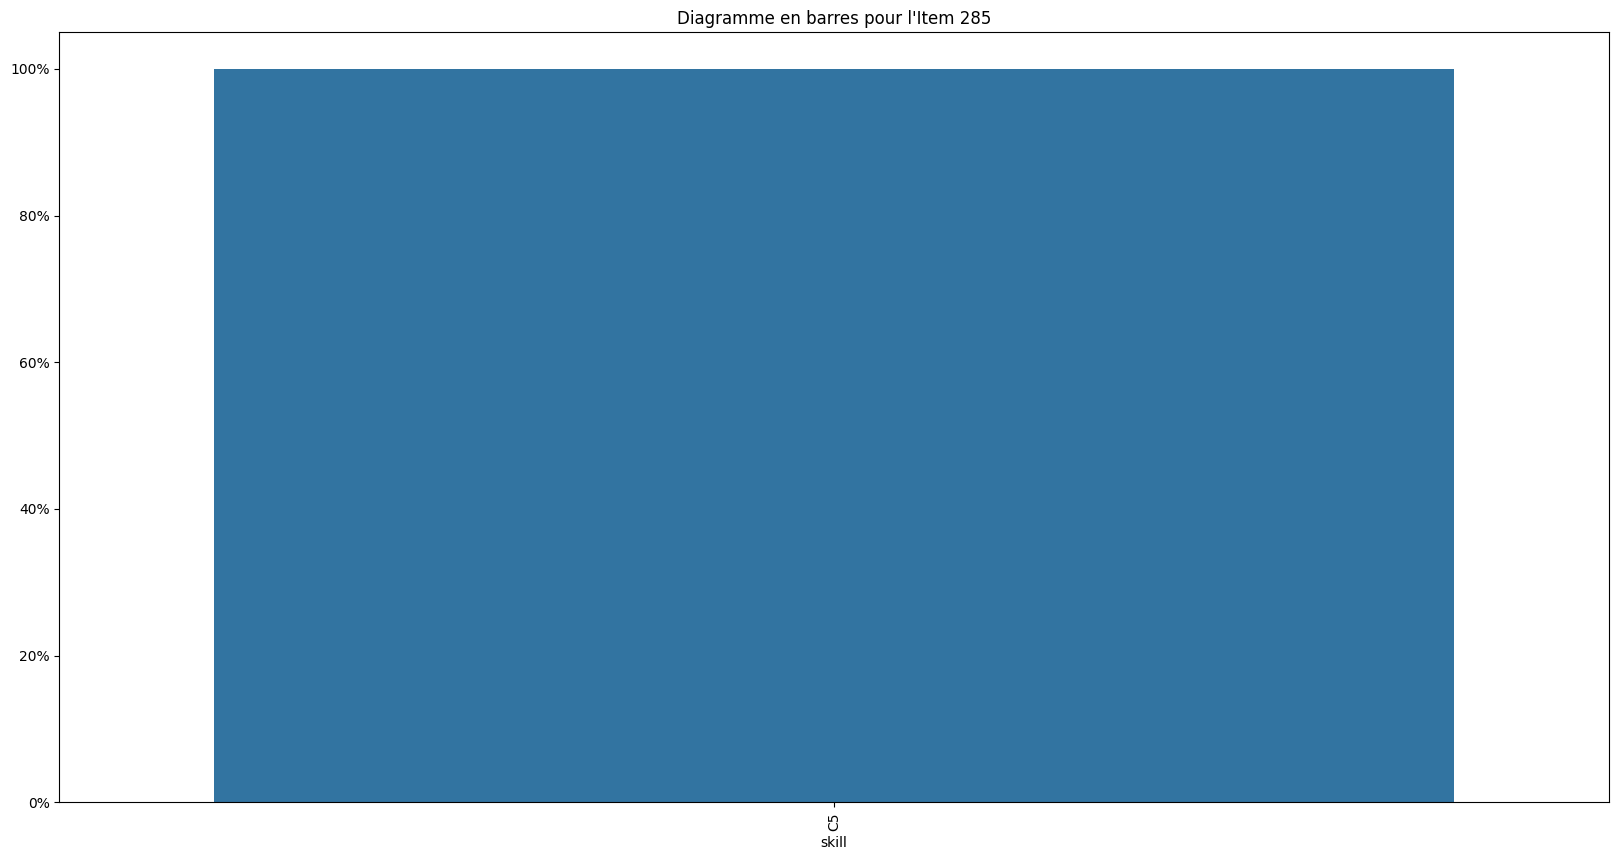

Item 285
skill      C5
ecn_item     
Item 285  1.0


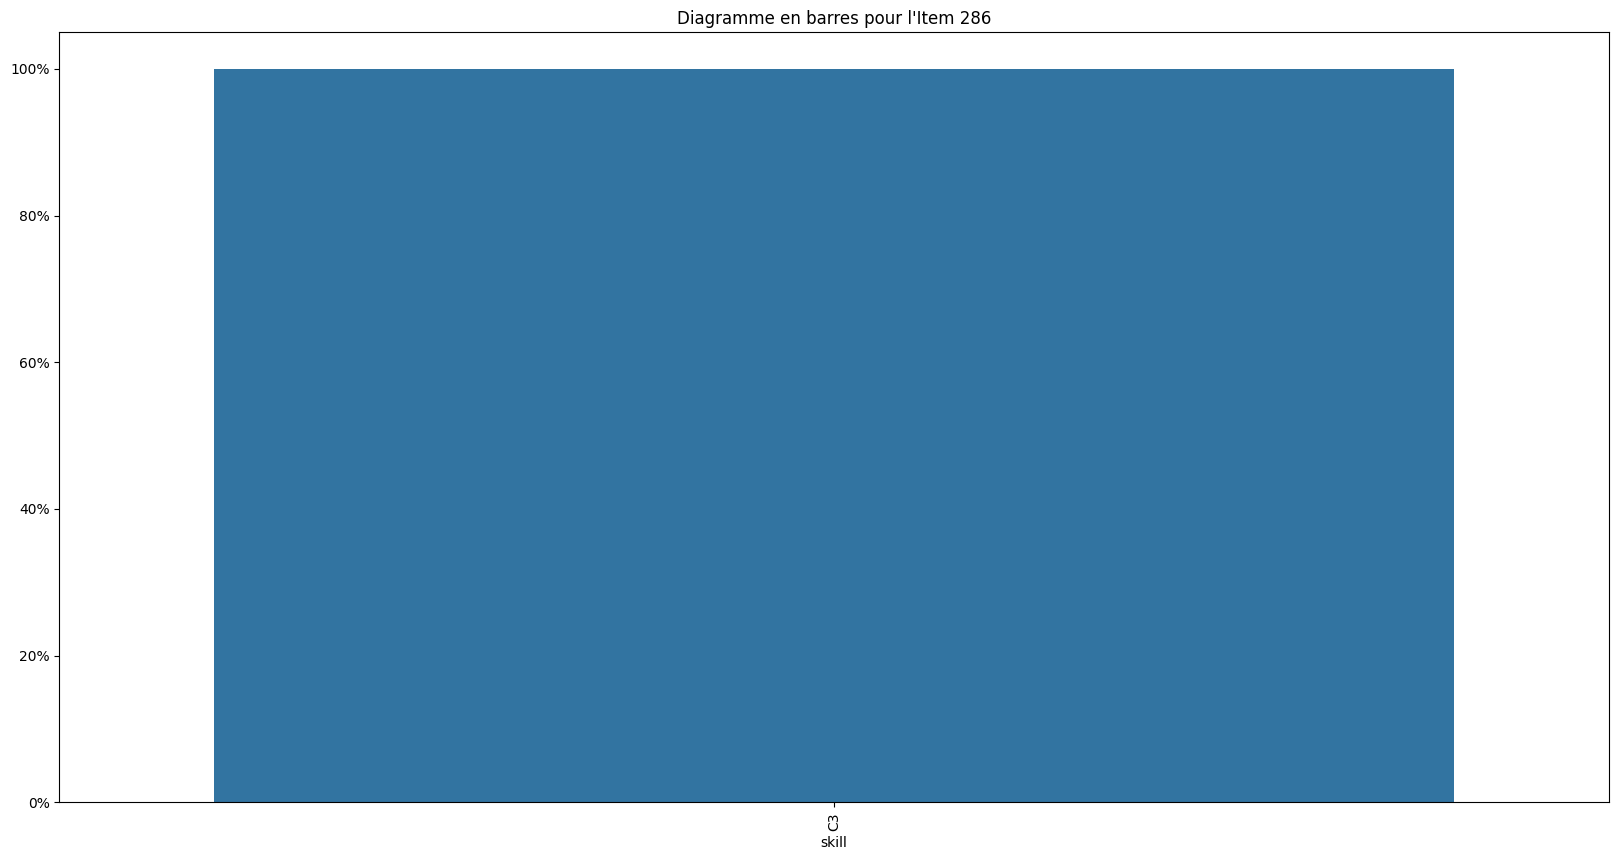

Item 286
skill      C3
ecn_item     
Item 286  1.0


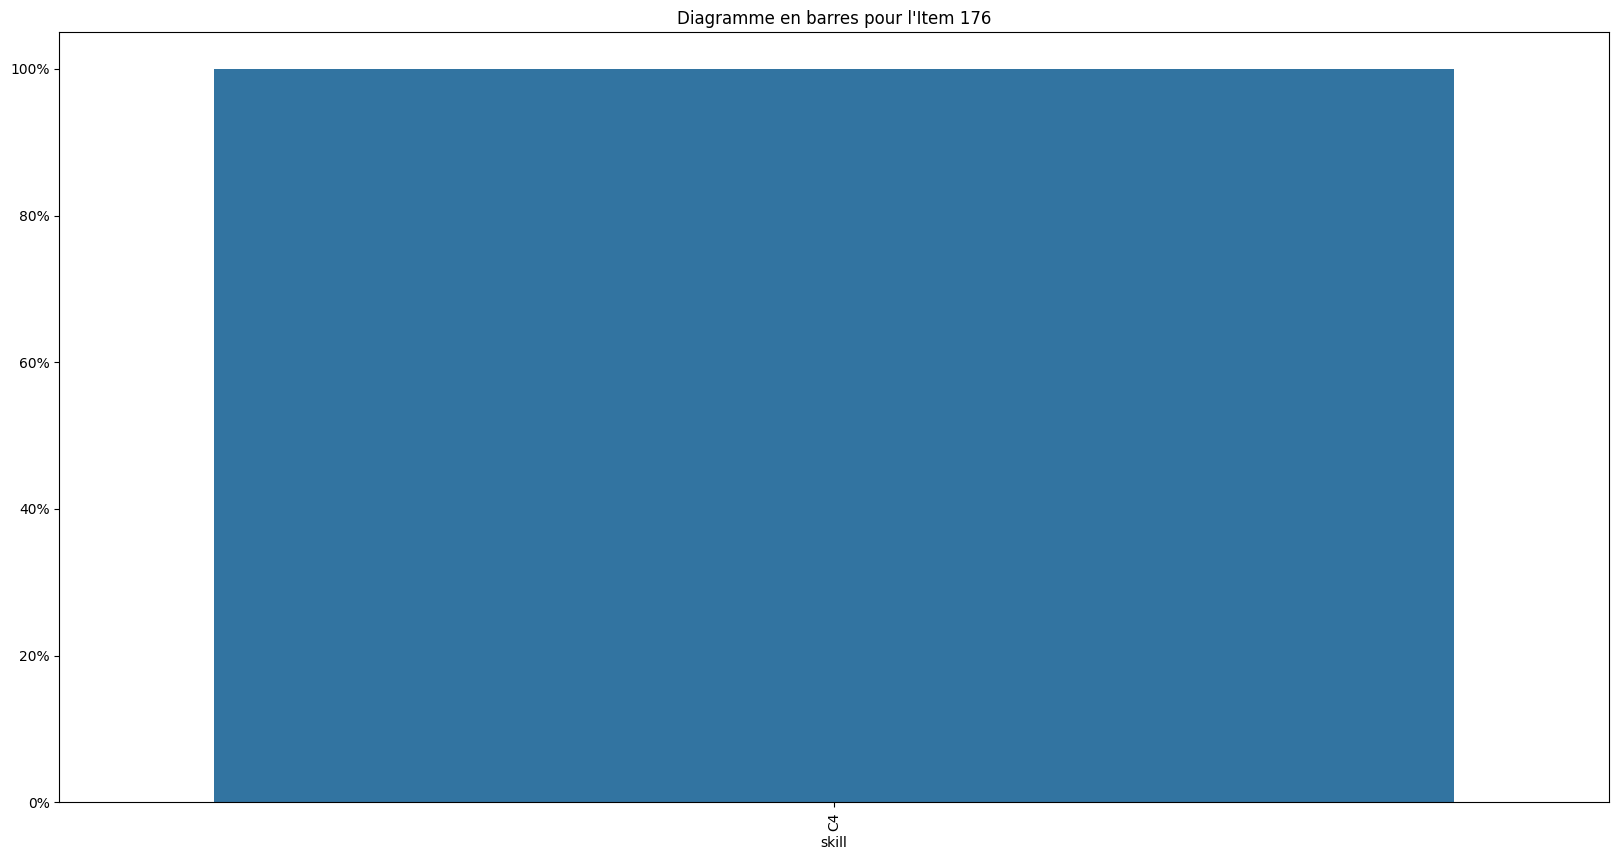

Item 176
skill      C4
ecn_item     
Item 176  1.0


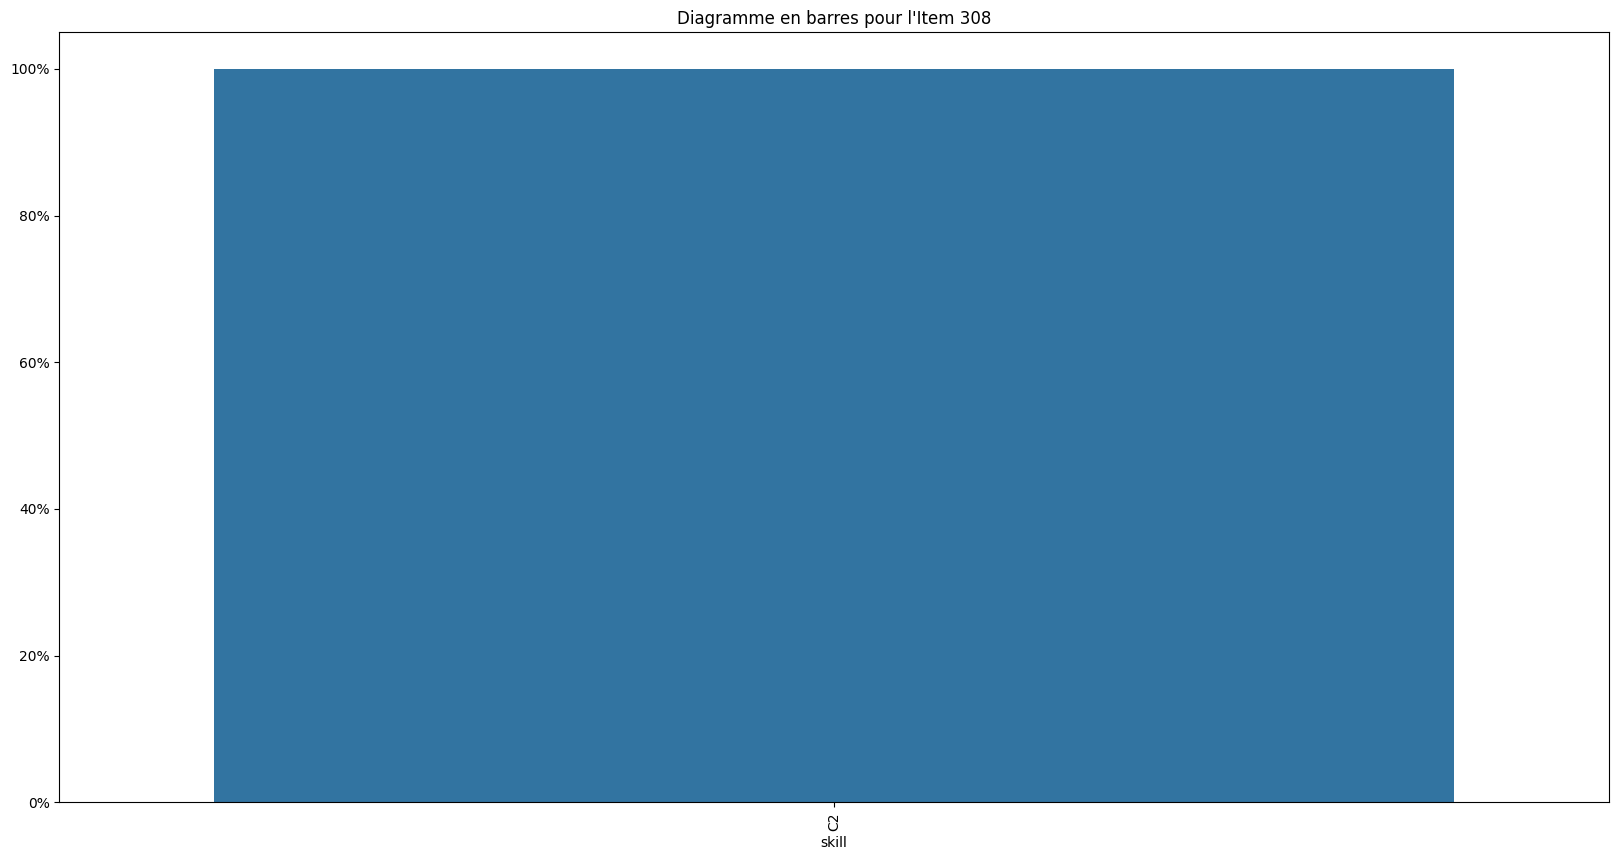

Item 308
skill      C2
ecn_item     
Item 308  1.0


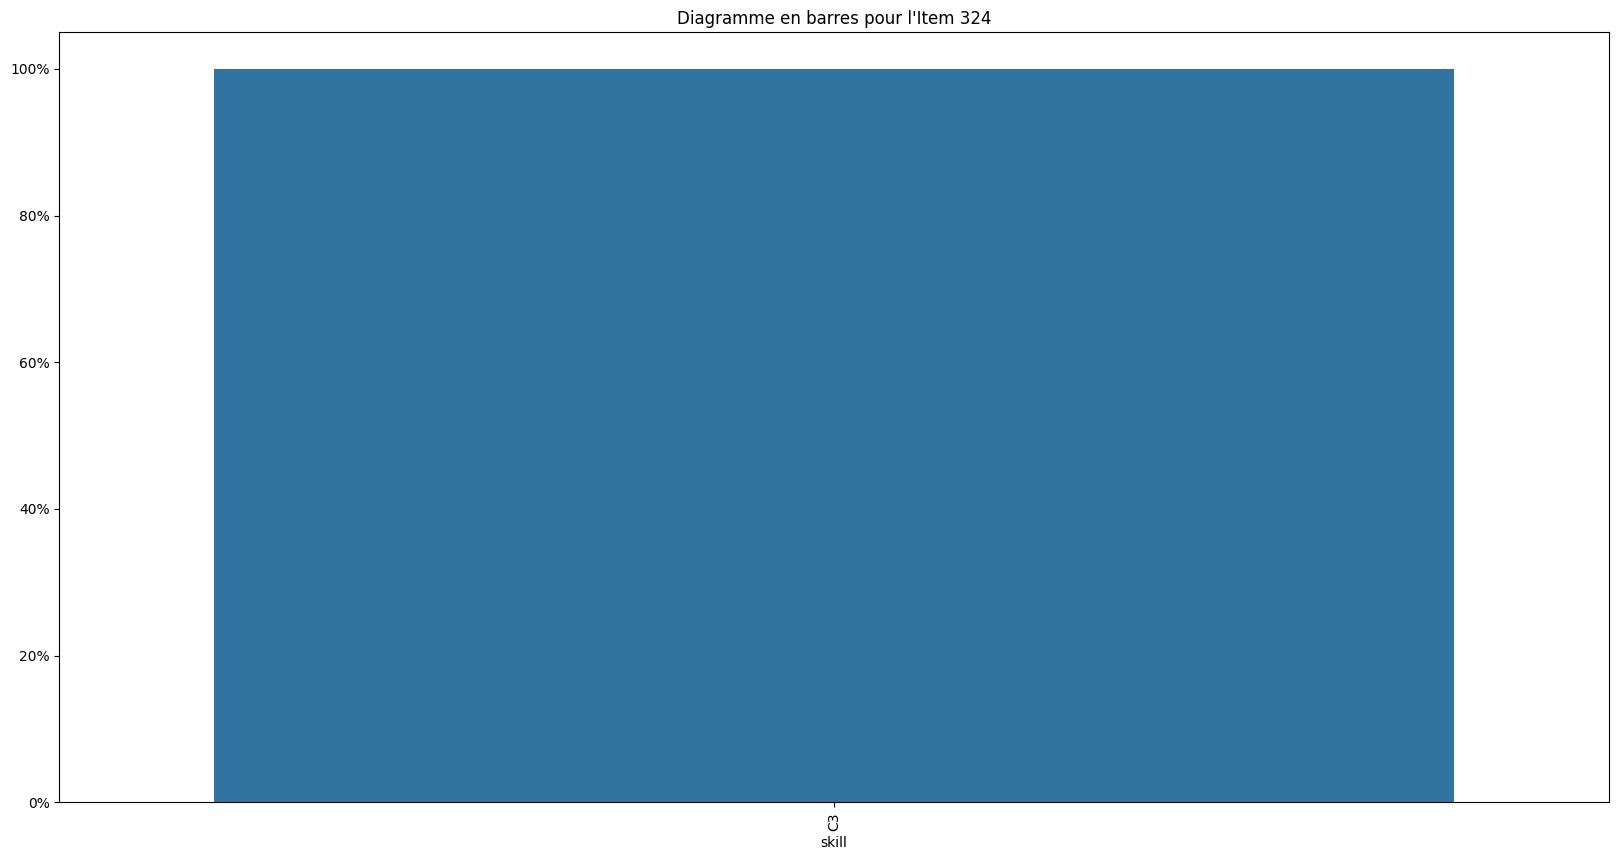

Item 324
skill      C3
ecn_item     
Item 324  1.0


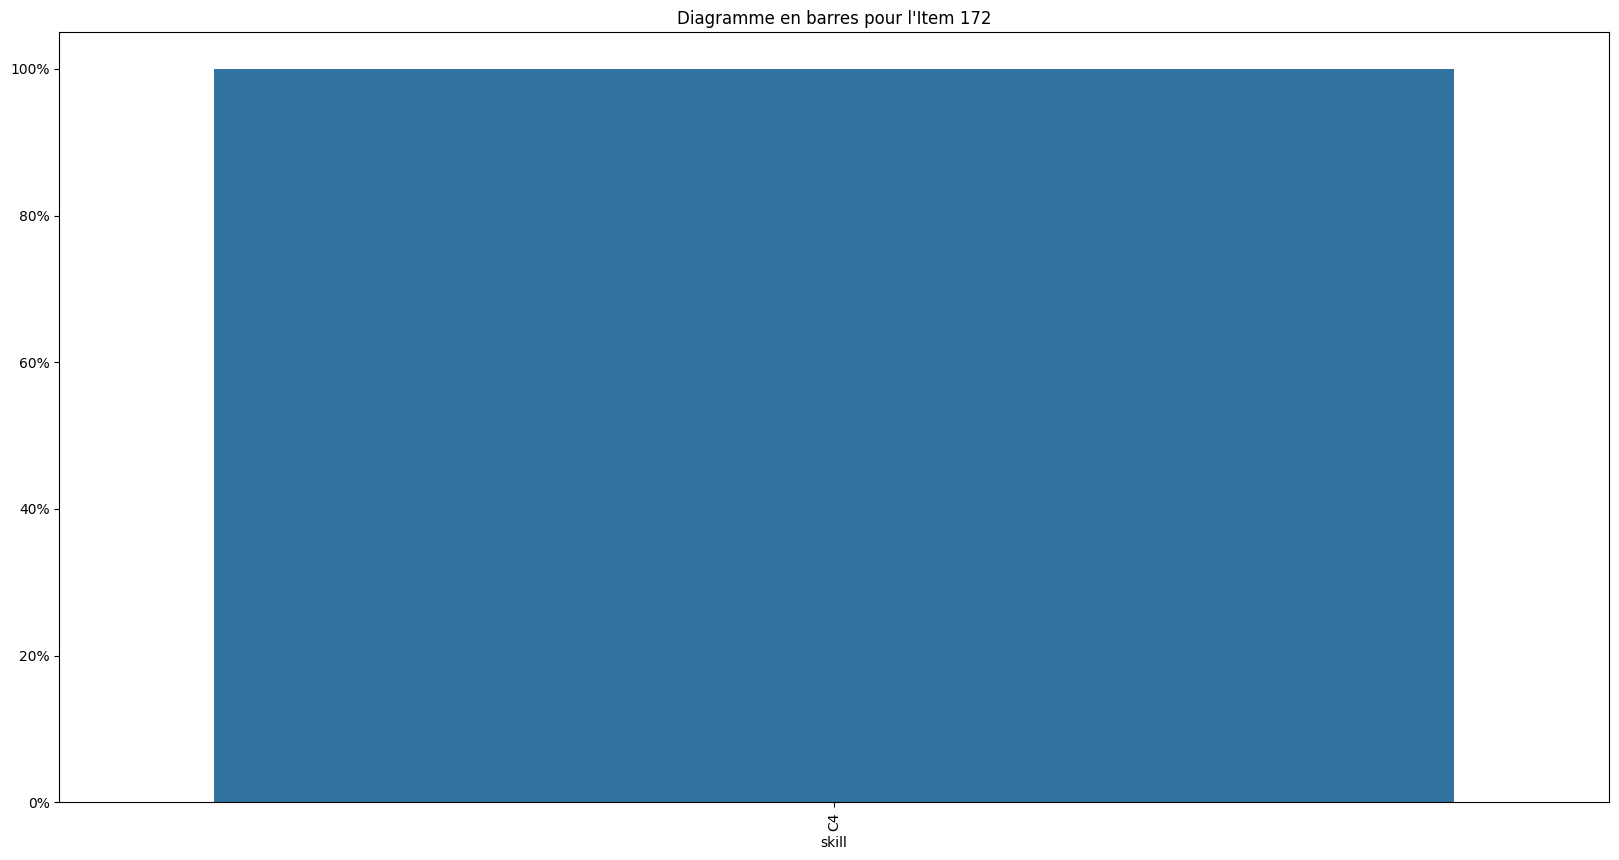

Item 172
skill      C4
ecn_item     
Item 172  1.0


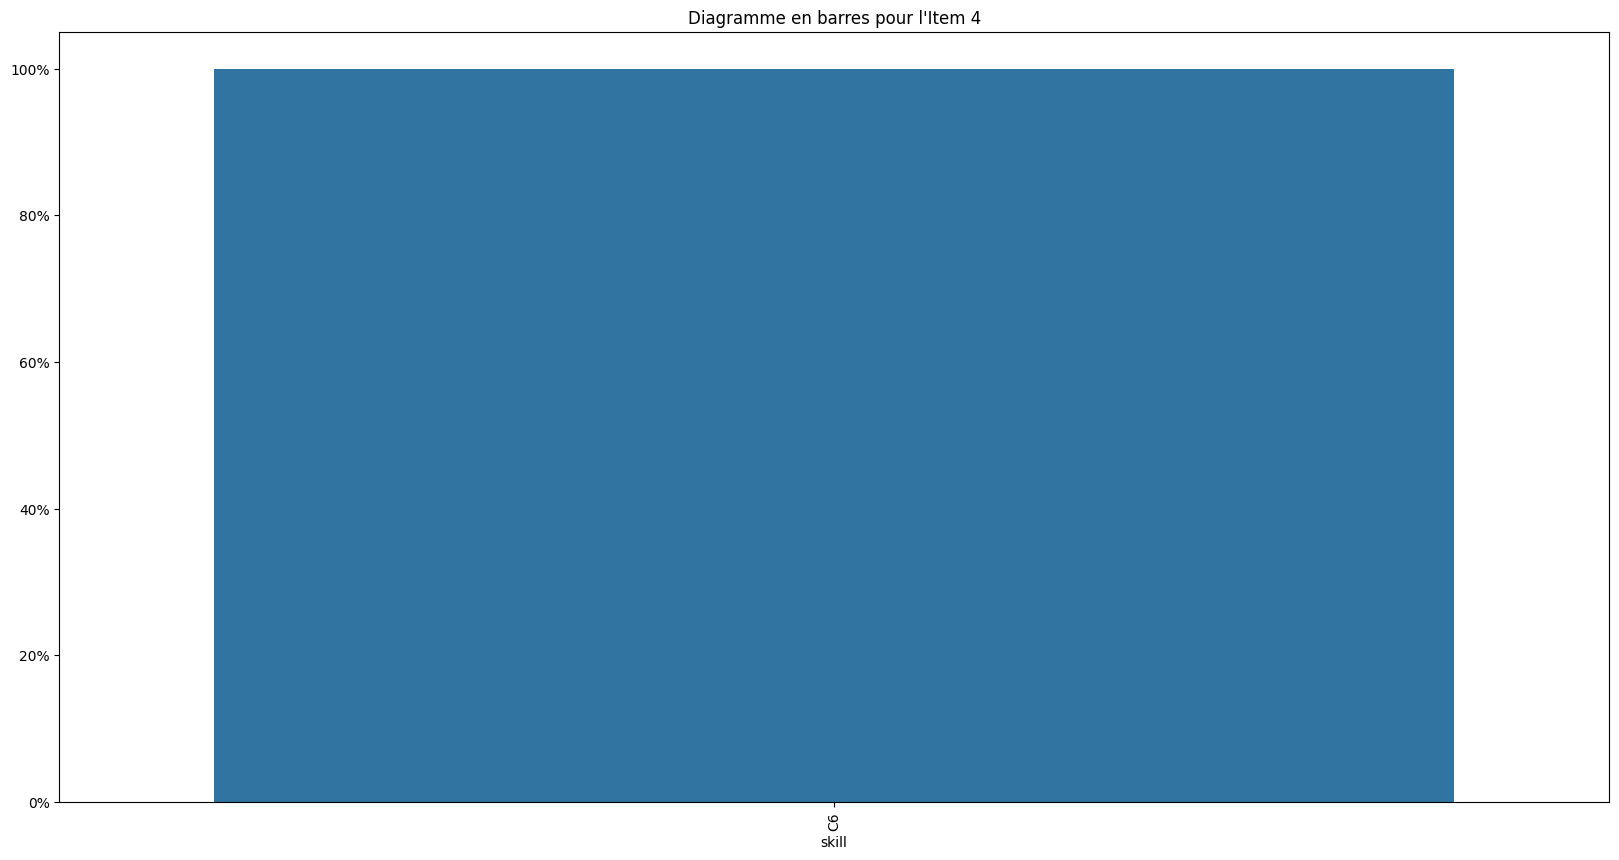

Item 4
skill      C6
ecn_item     
Item 4    1.0


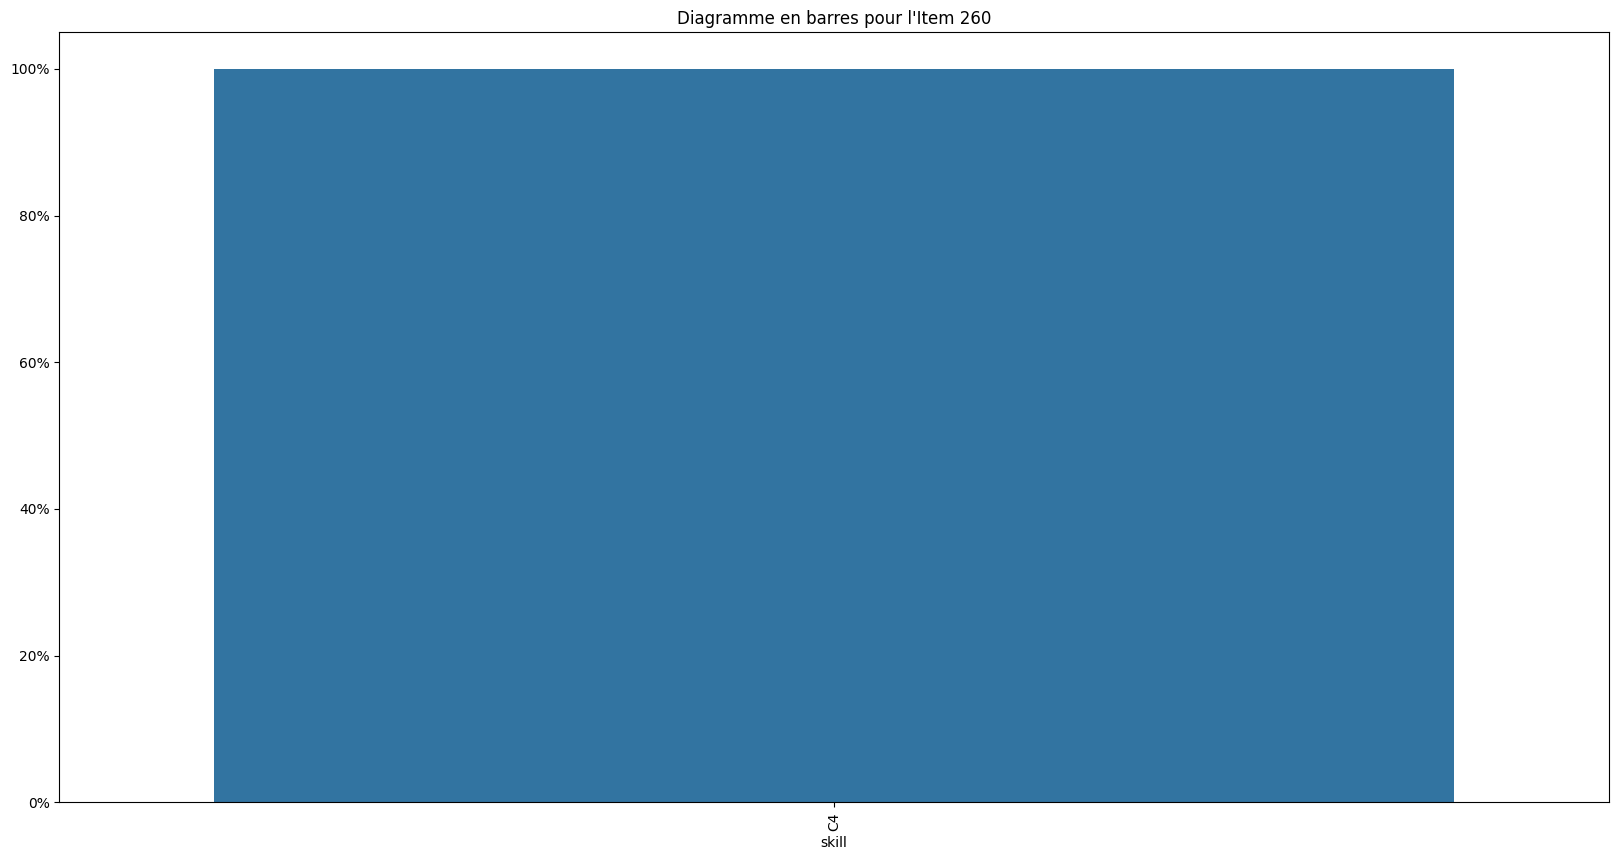

Item 260
skill      C4
ecn_item     
Item 260  1.0


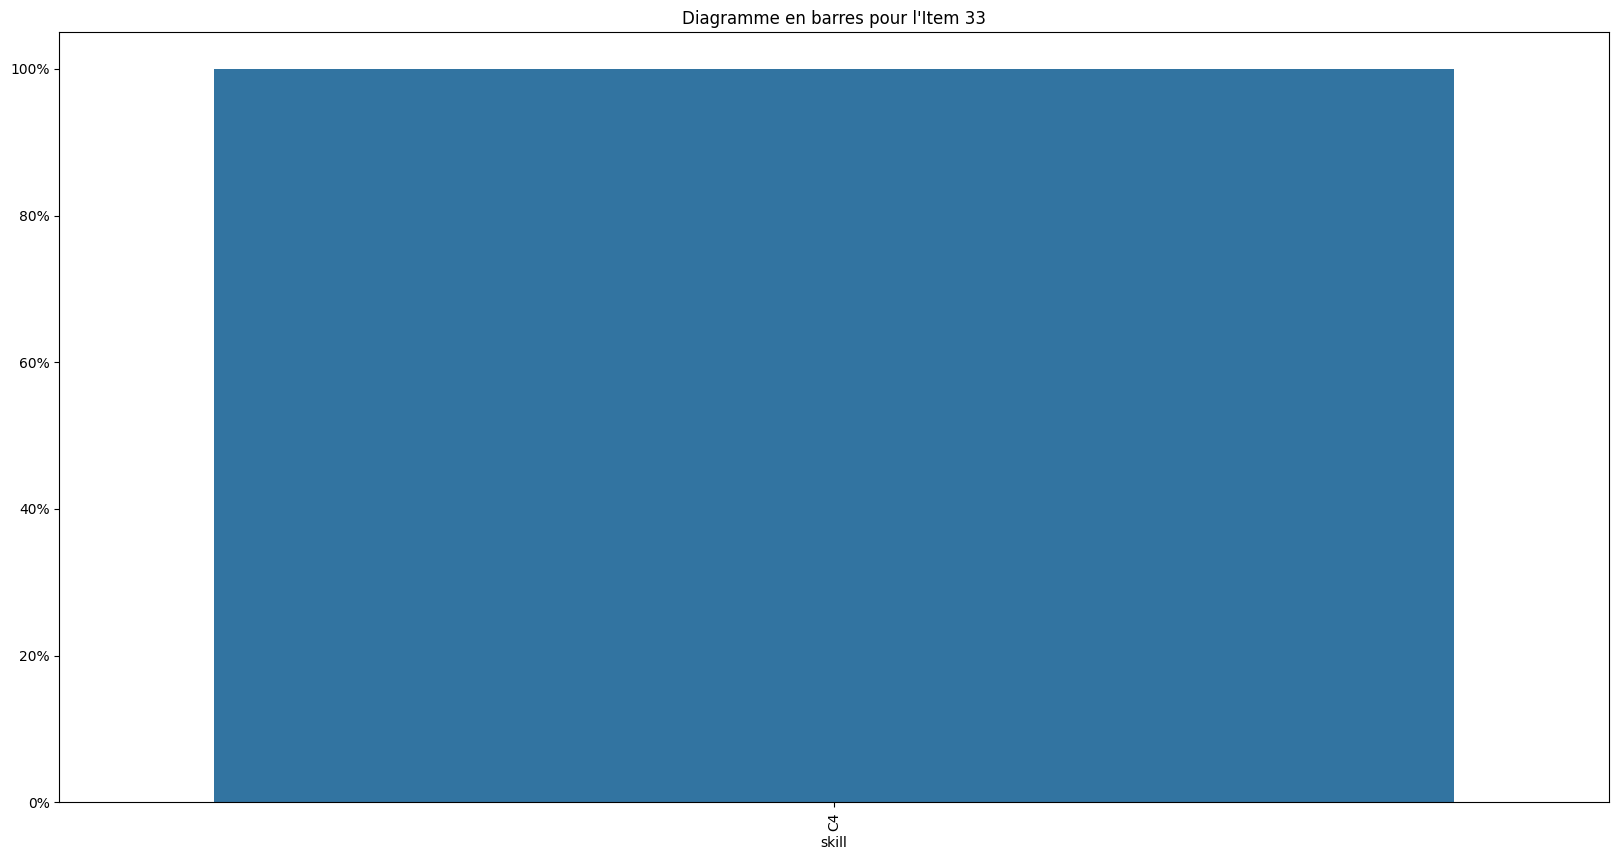

Item 33
skill      C4
ecn_item     
Item 33   1.0


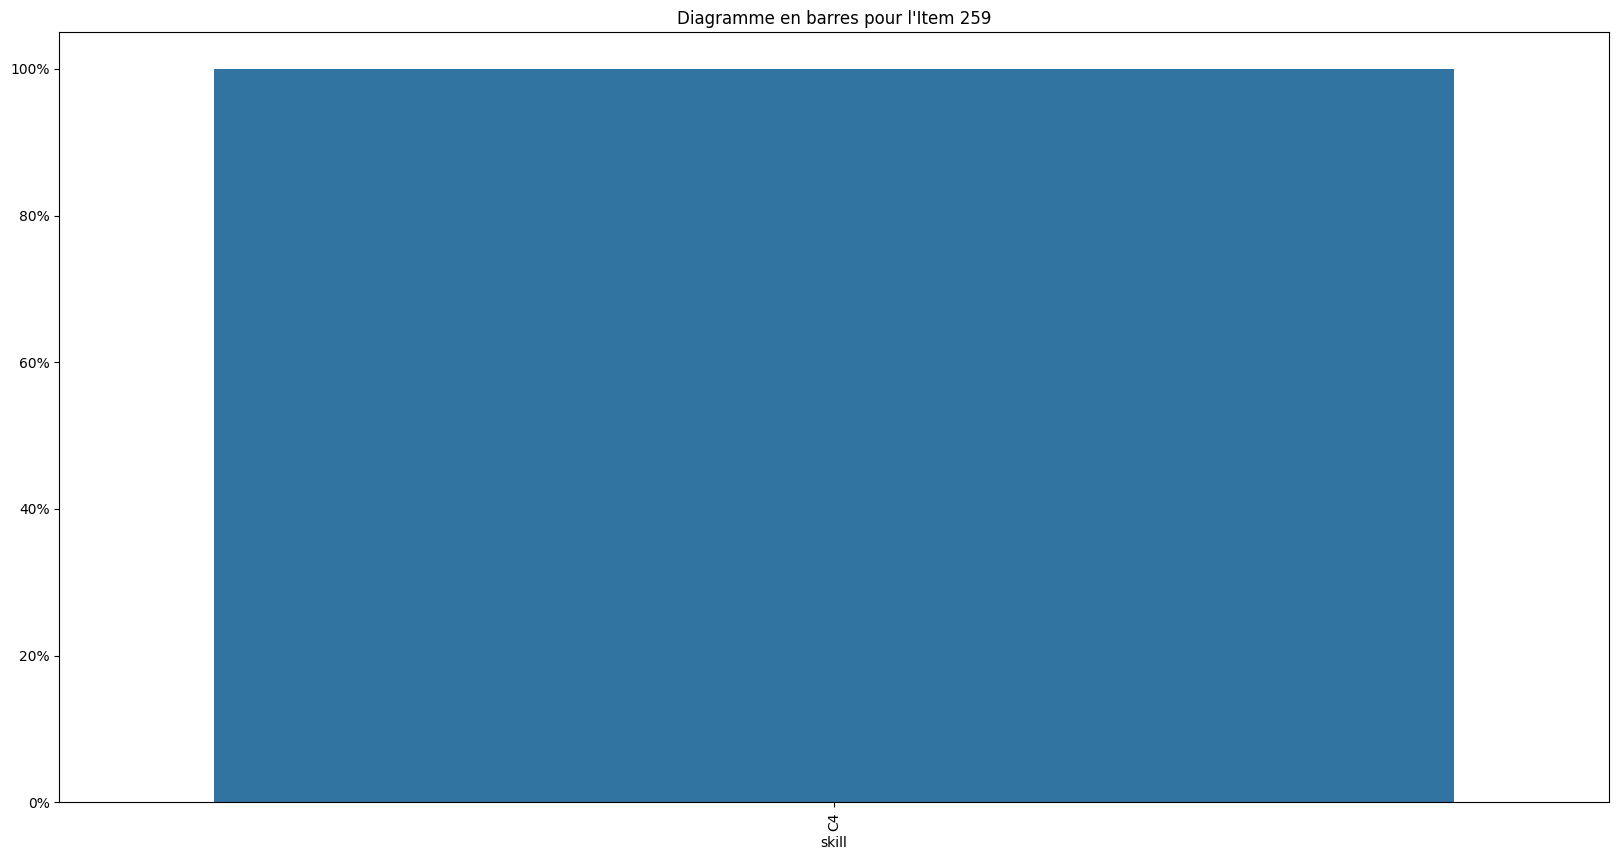

Item 259
skill      C4
ecn_item     
Item 259  1.0


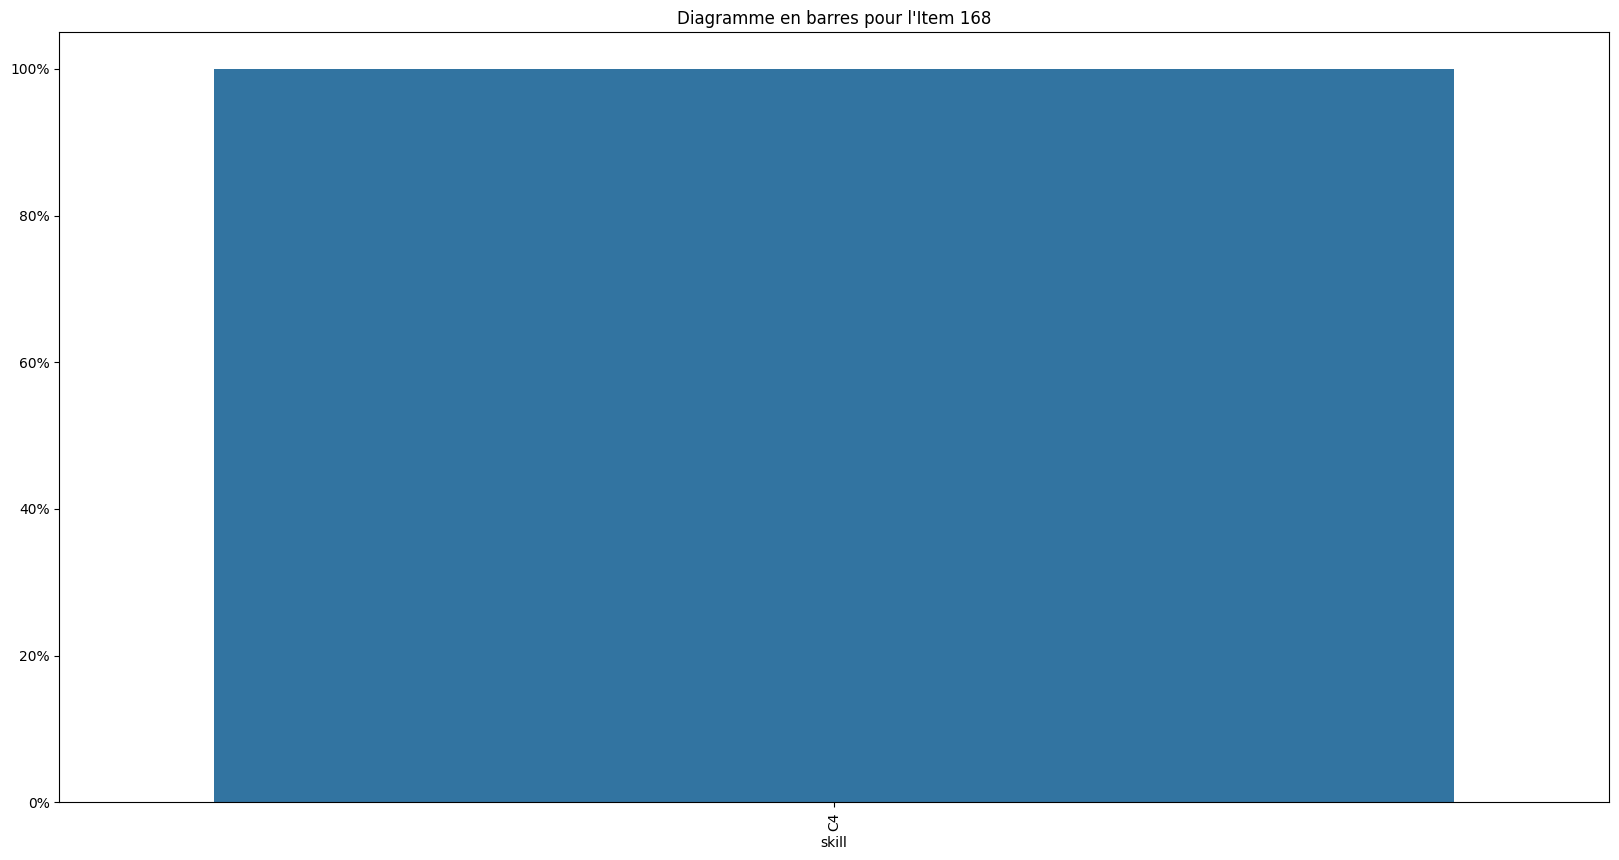

Item 168
skill      C4
ecn_item     
Item 168  1.0


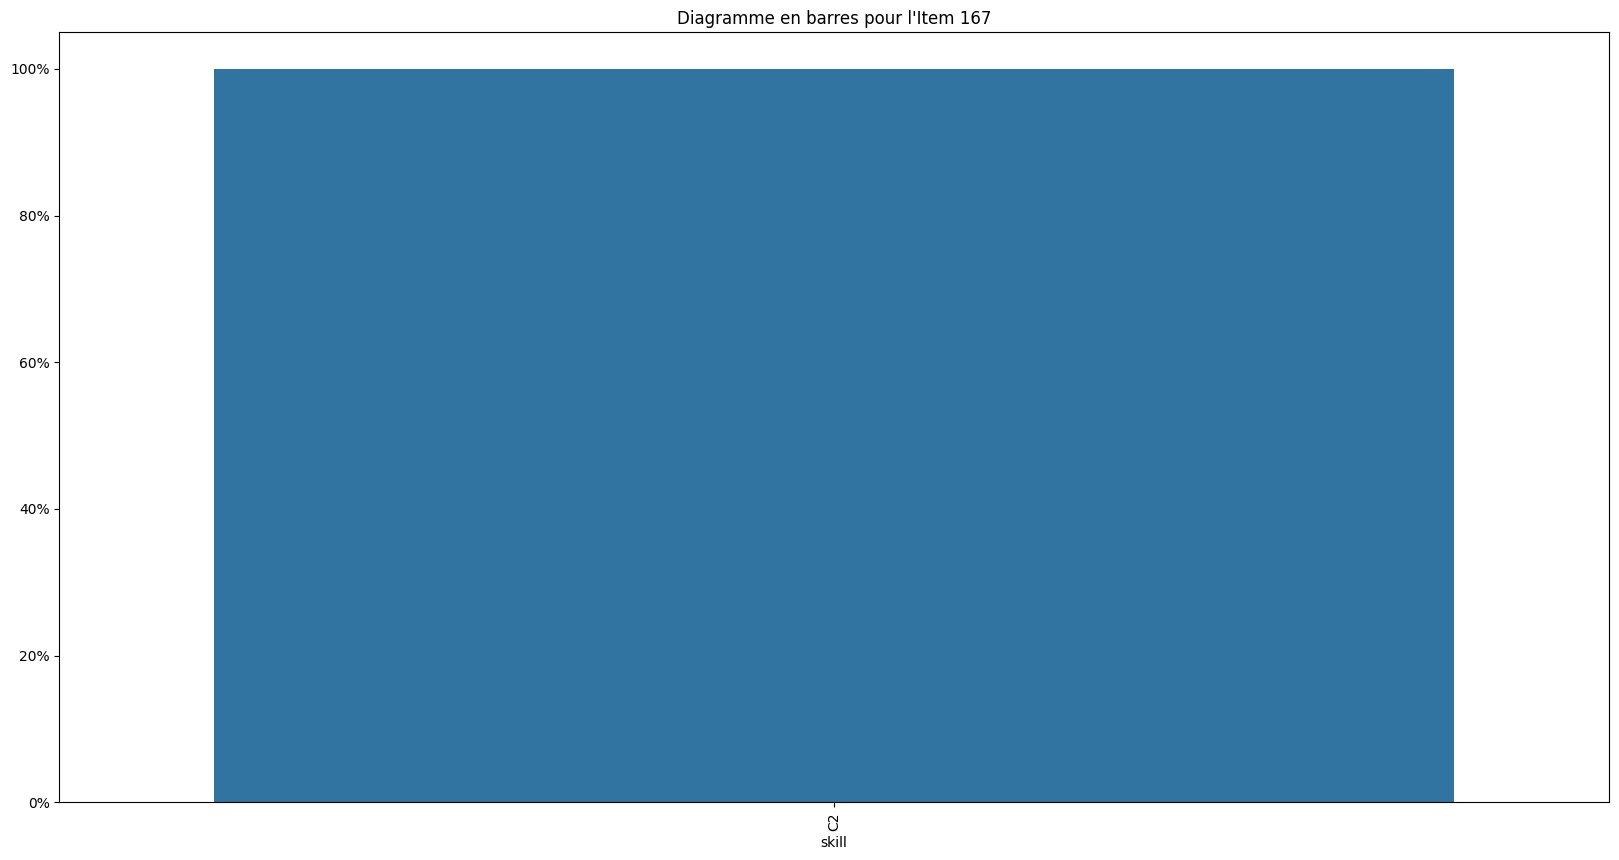

Item 167
skill      C2
ecn_item     
Item 167  1.0


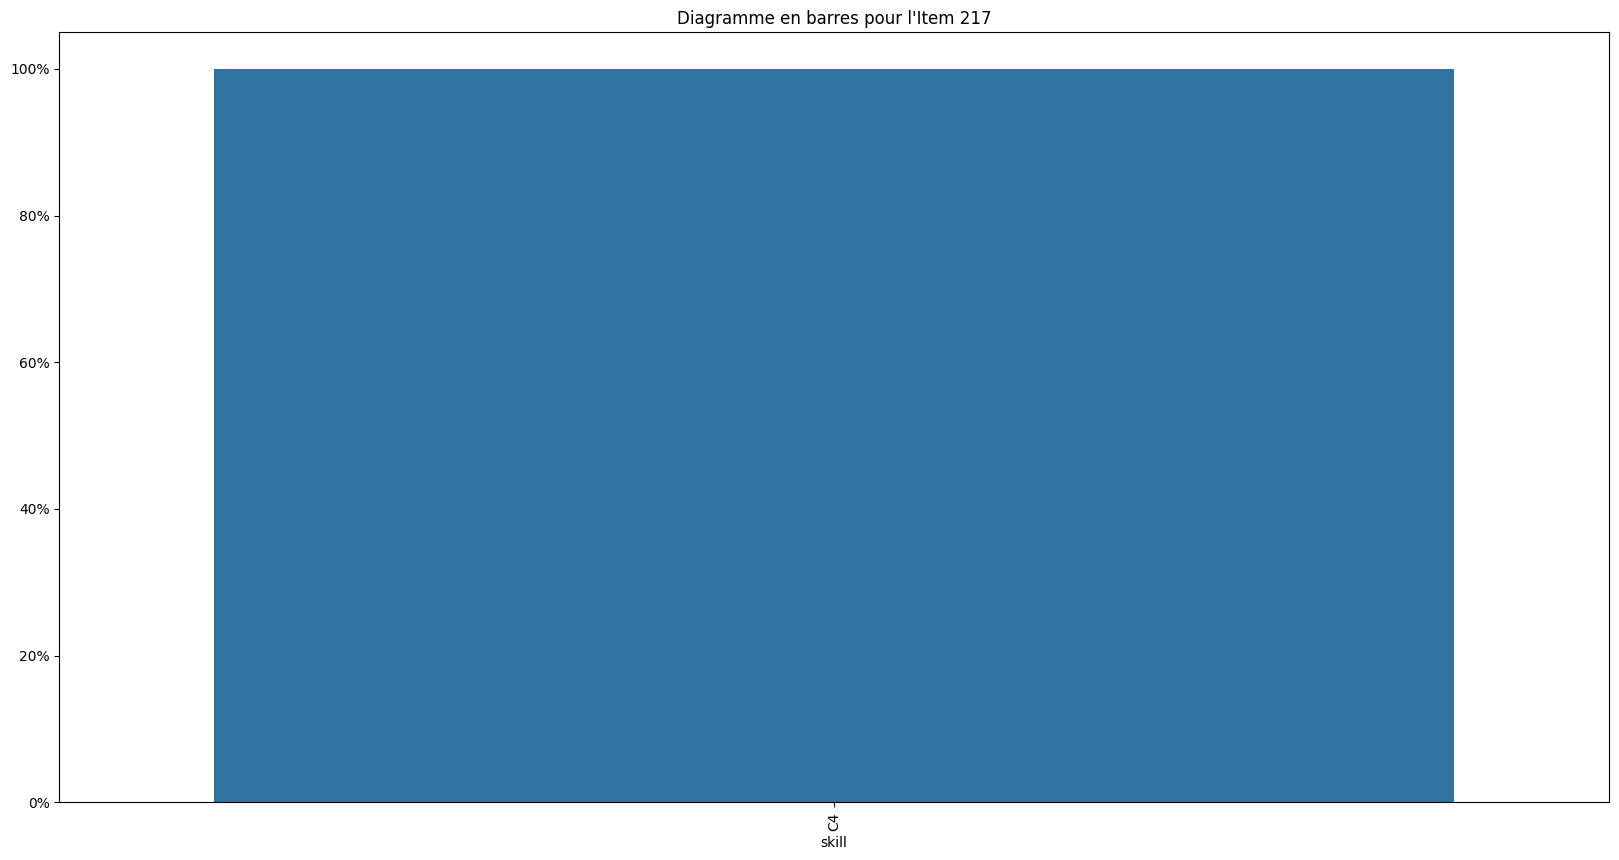

Item 217
skill      C4
ecn_item     
Item 217  1.0


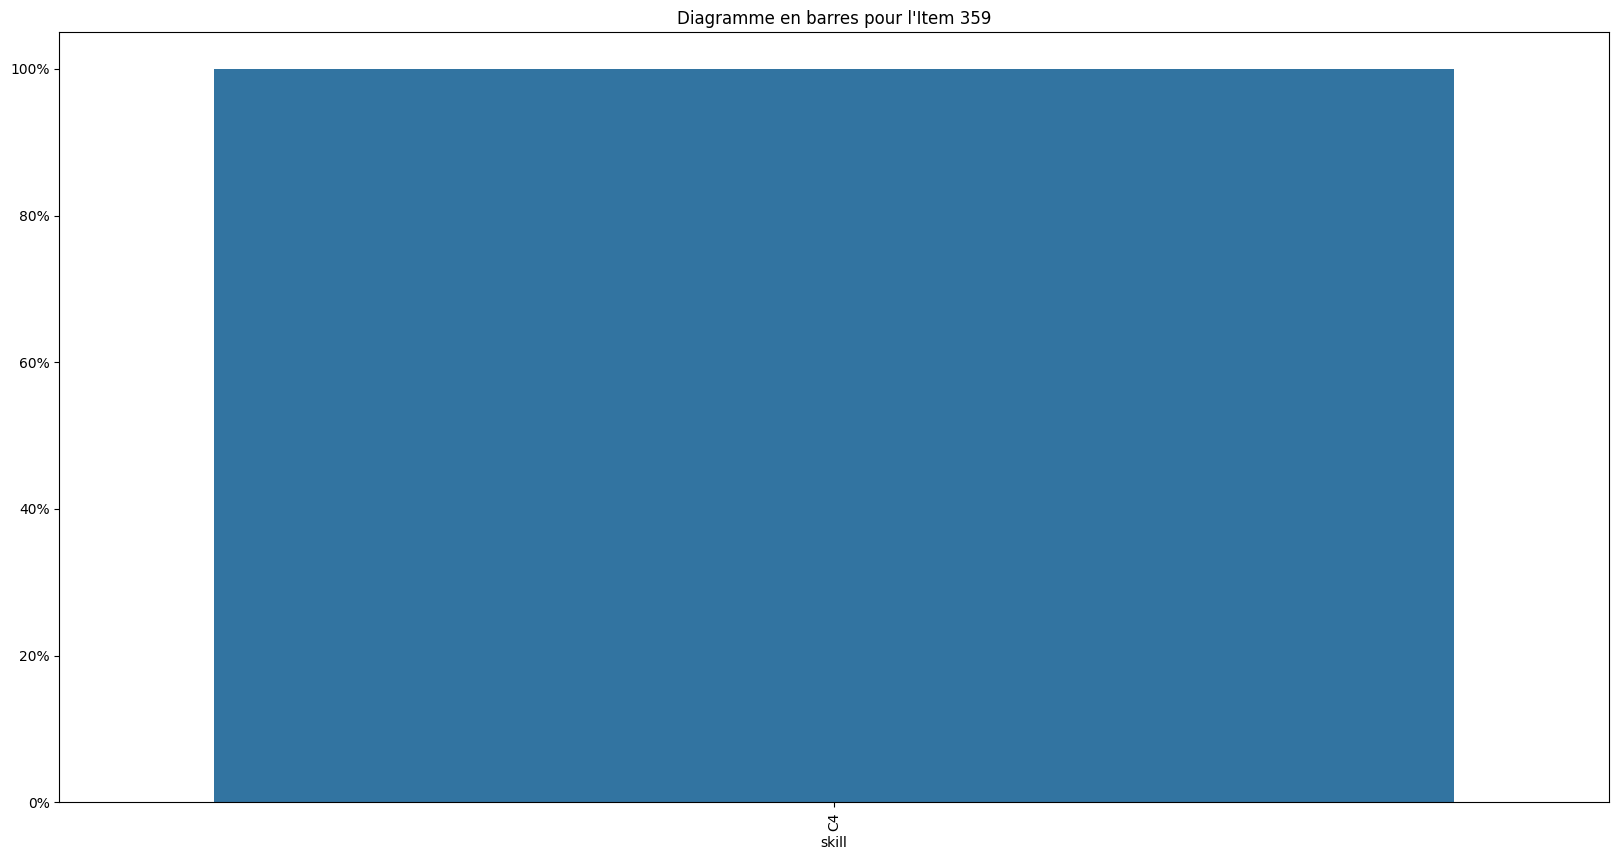

Item 359
skill      C4
ecn_item     
Item 359  1.0


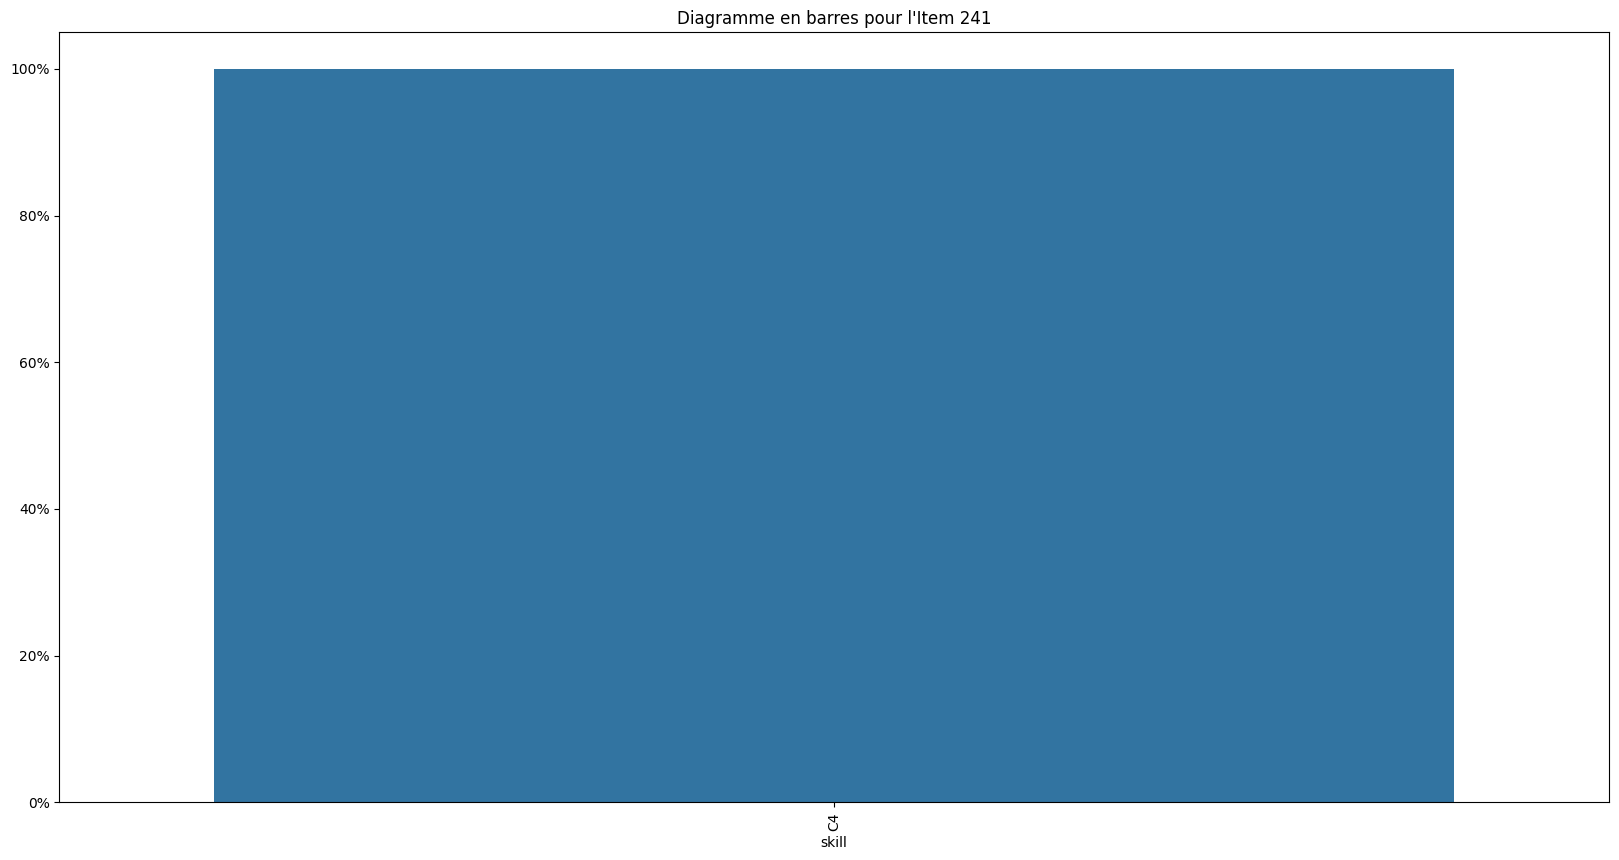

Item 241
skill      C4
ecn_item     
Item 241  1.0


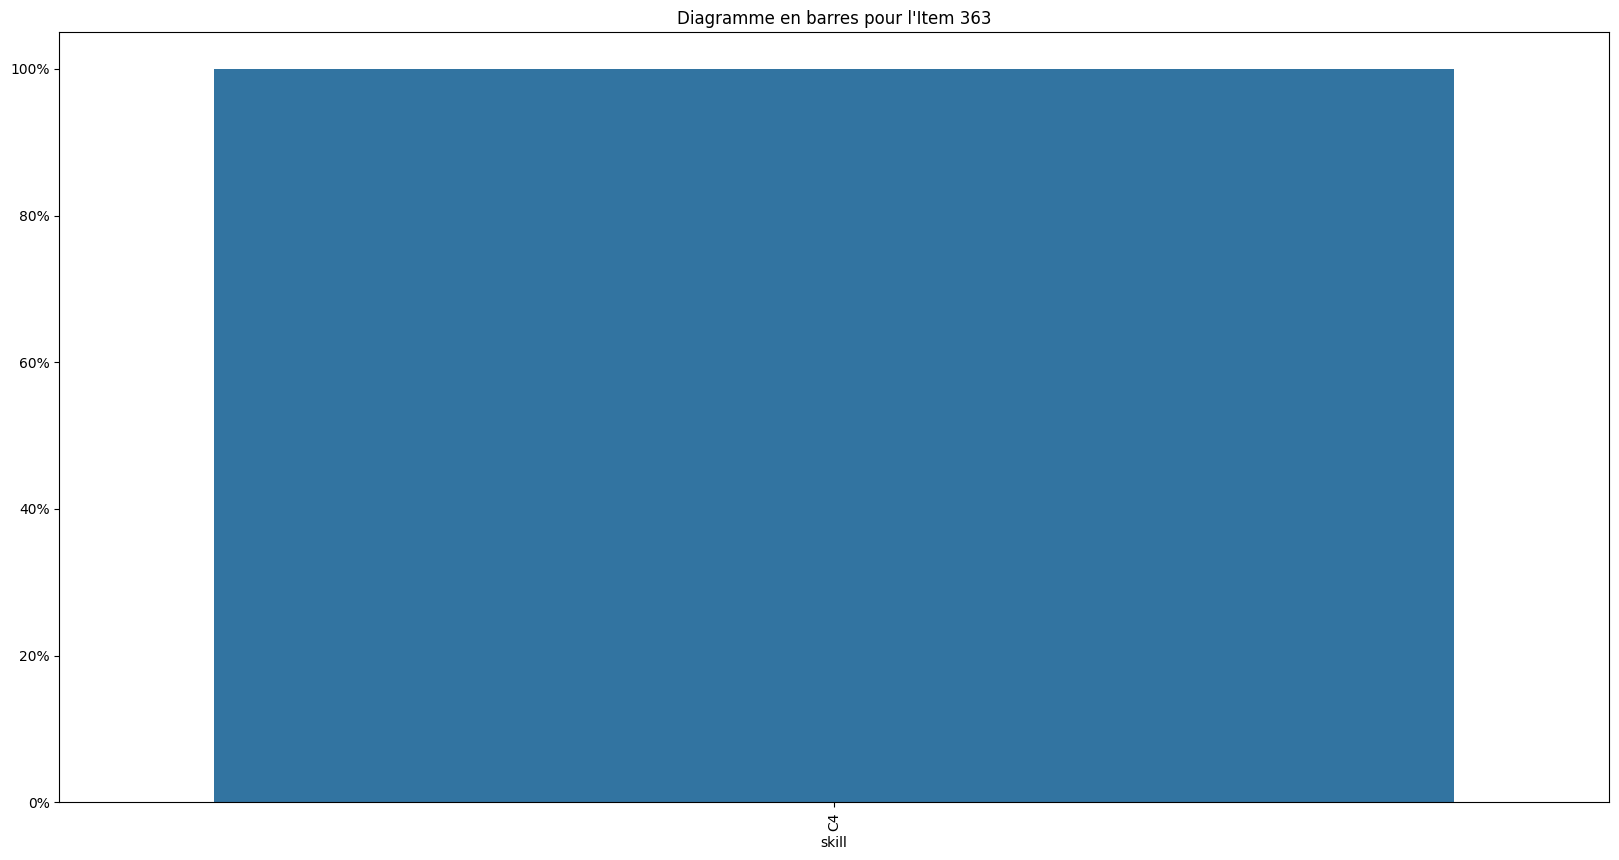

Item 363
skill      C4
ecn_item     
Item 363  1.0


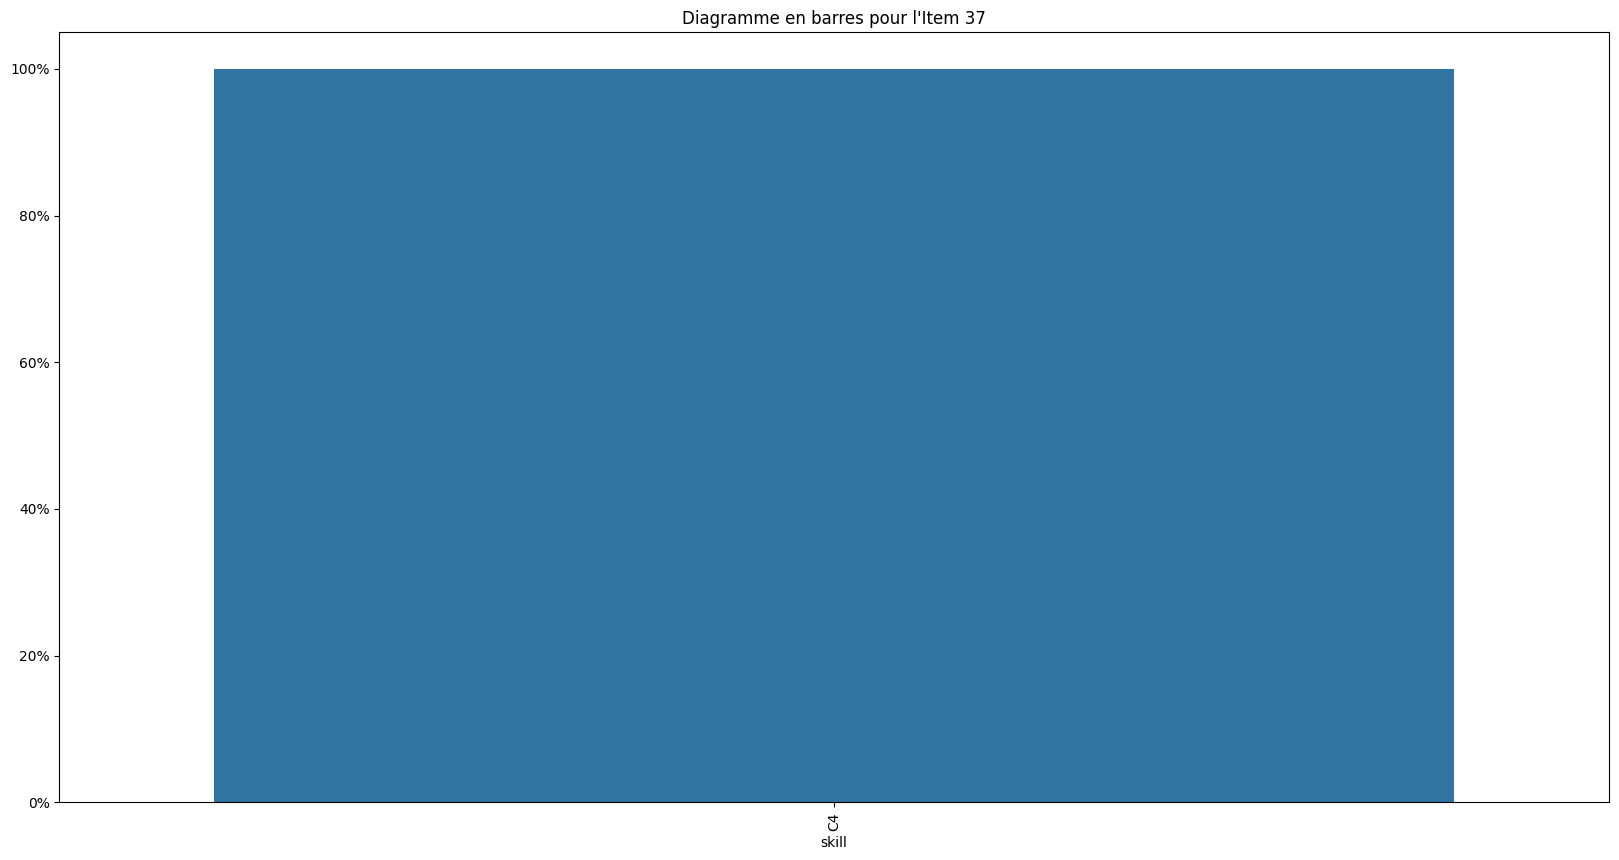

Item 37
skill      C4
ecn_item     
Item 37   1.0


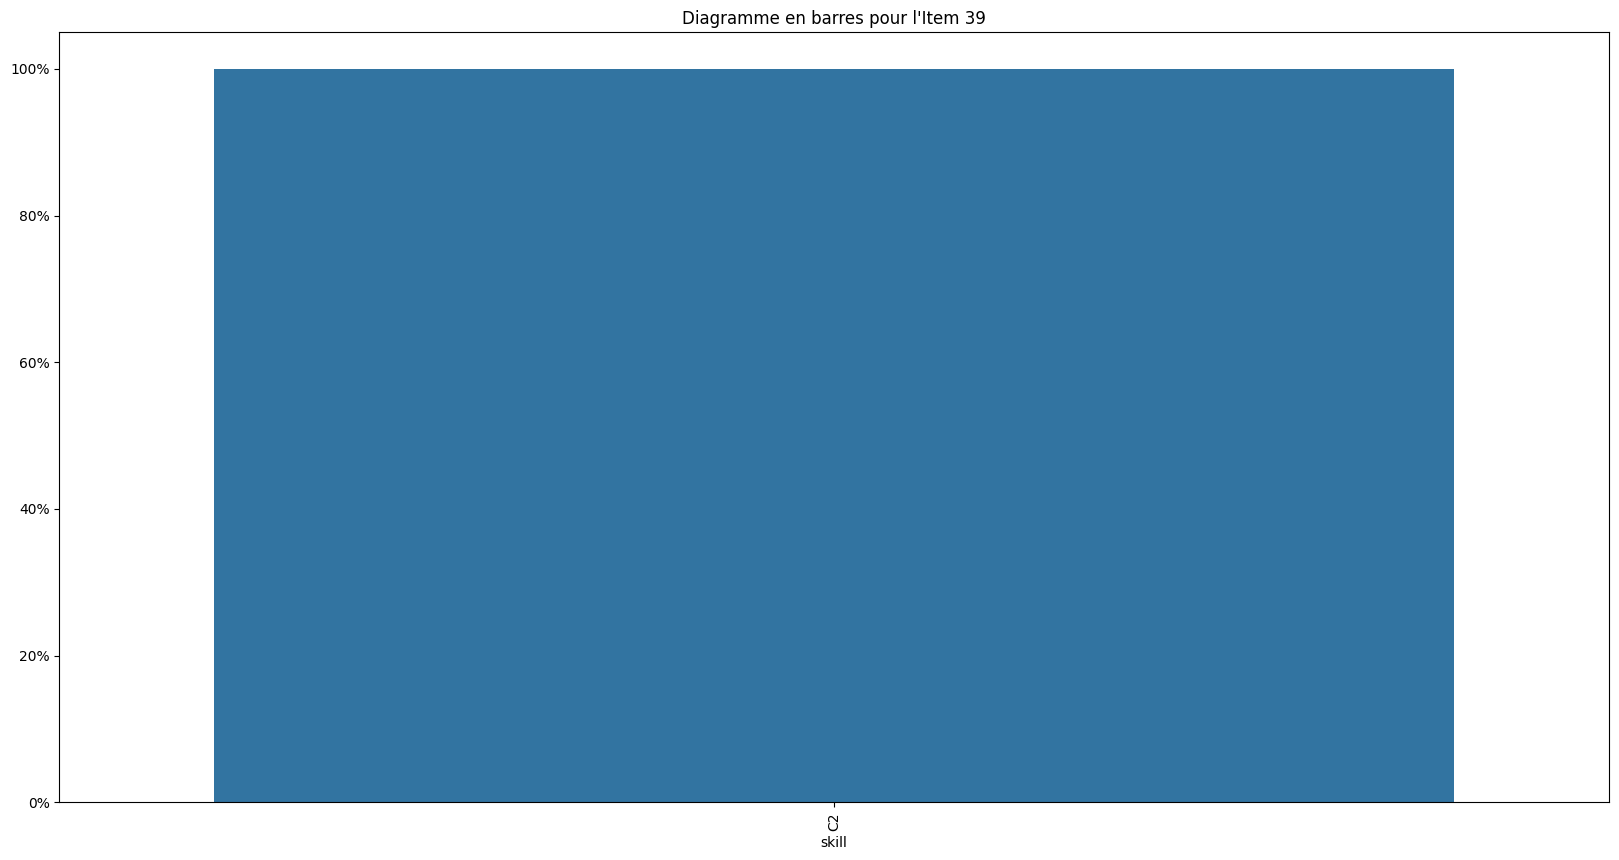

Item 39
skill      C2
ecn_item     
Item 39   1.0


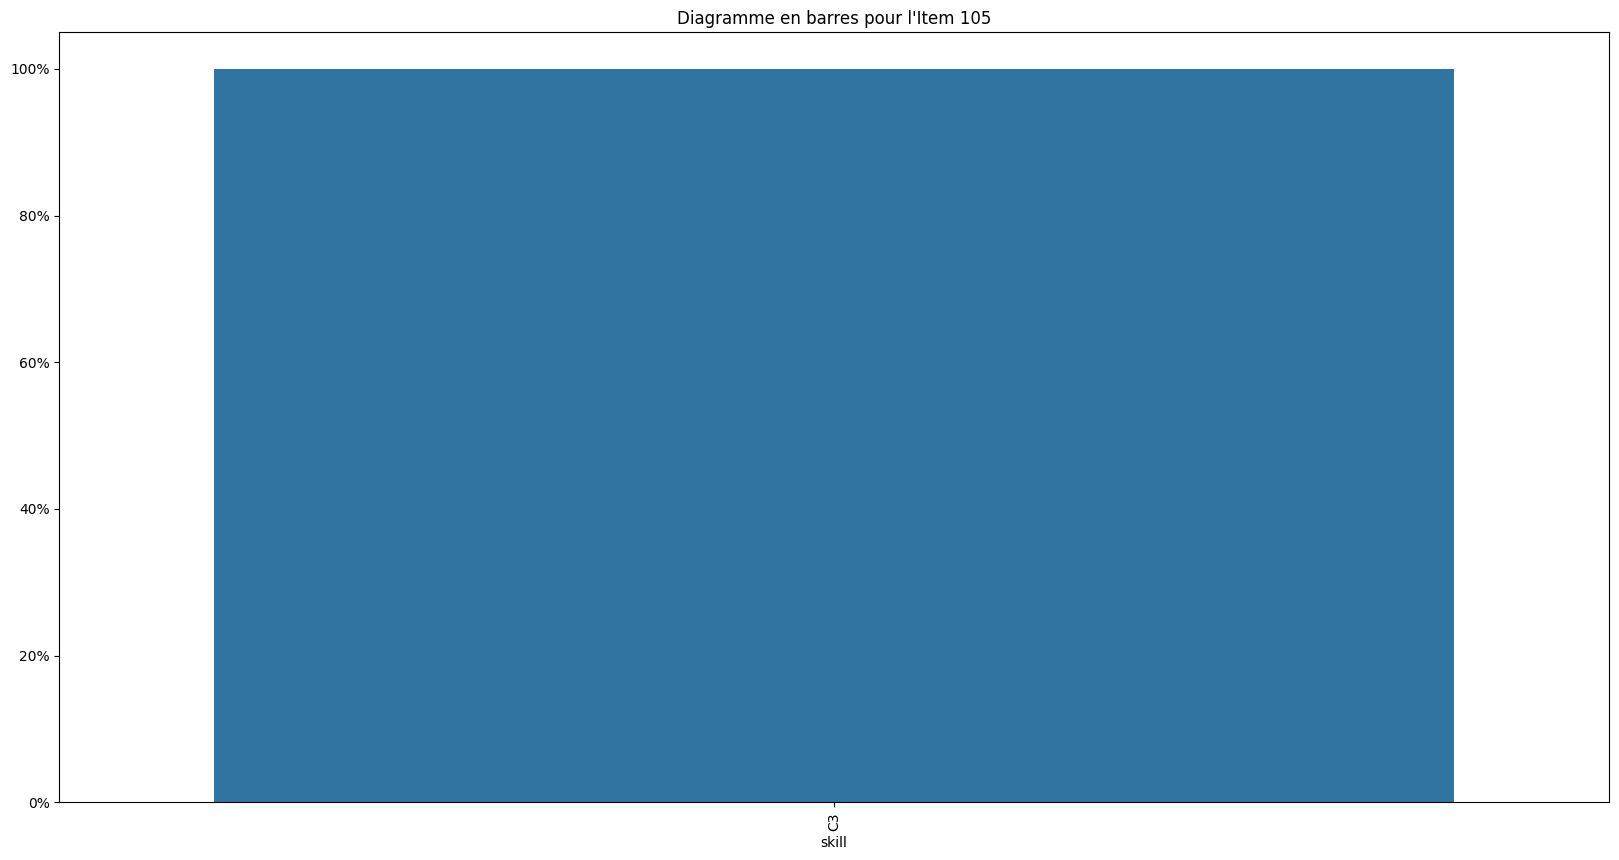

Item 105
skill      C3
ecn_item     
Item 105  1.0


In [3]:
data_gp = pd.pivot_table(data, values="record_id", index="ecn_item", columns="skill", aggfunc="count", margins=True)
data_gp = data_gp.sort_values(by=['All'], ascending=False)
data_gp = data_gp.drop(columns='All')
display(data_gp)

for i in range(1,data_gp.shape[0]):
    row = data_gp.iloc[[i]]
    row = row.dropna(axis=1, how='all')
    row = row[row.columns[row.iloc[0].argsort()[::-1]]]

    rowProp = row.copy()
    rowProp[row.columns] = row[row.columns].div(row[row.columns].sum(axis=1), axis=0)

    plt.figure(figsize=(20, 10))
    sns.barplot(rowProp)
    plt.xticks(rotation=90)
    plt.title(f"Diagramme en barres pour l'{data_gp.index[i]}")
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
    plt.show()  
    print(data_gp.index[i])
    print(row)

### Analyse factorielle des correspondances entre les variables "Item" et "Skill"

In [4]:
# Création et affichage du tableau de contingence. 

data_factor = pd.pivot_table(data, values="record_id", index=[data['ecn_item']], columns=[data['skill']], aggfunc="count", fill_value=0)
display(data_factor)

col_names = list(data_factor.columns)[0:]
row_names = list(data_factor.index)

X = data_factor[col_names].values


skill      C1  C2  C3  C4  C5  C6
ecn_item                         
Item 1    118   3   0   0   0   1
Item 100    0   1   0   1   0   0
Item 105    0   0   1   0   0   0
Item 107    0   1   0   2   0   0
Item 110    0   5   0   1   0   0
...       ...  ..  ..  ..  ..  ..
Item 94     0   0   0   1   0   0
Item 95     0   1   0   1   1   0
Item 96     0   3   0   0   0   0
Item 98     0   1   0   0   0   0
Item 99     0   1   0   2   0   0

[135 rows x 6 columns]

In [5]:
# Calcul et affichage des profils lignes (la somme de chaque ligne est égale à 1.)

row_sum = np.sum(X, axis=1)
row_profile = X / row_sum[:, np.newaxis]

print("Profil ligne:")
display(pd.DataFrame(row_profile, index=row_names, columns=col_names))

Profil ligne:


C1        C2   C3        C4        C5        C6
Item 1    0.967213  0.024590  0.0  0.000000  0.000000  0.008197
Item 100  0.000000  0.500000  0.0  0.500000  0.000000  0.000000
Item 105  0.000000  0.000000  1.0  0.000000  0.000000  0.000000
Item 107  0.000000  0.333333  0.0  0.666667  0.000000  0.000000
Item 110  0.000000  0.833333  0.0  0.166667  0.000000  0.000000
...            ...       ...  ...       ...       ...       ...
Item 94   0.000000  0.000000  0.0  1.000000  0.000000  0.000000
Item 95   0.000000  0.333333  0.0  0.333333  0.333333  0.000000
Item 96   0.000000  1.000000  0.0  0.000000  0.000000  0.000000
Item 98   0.000000  1.000000  0.0  0.000000  0.000000  0.000000
Item 99   0.000000  0.333333  0.0  0.666667  0.000000  0.000000

[135 rows x 6 columns]

In [6]:
# Calcul et affichage des profils colonnes (la somme de chaque colonne est égale à 1).

col_sum = np.sum(X, axis=0)
col_profile = X / col_sum[np.newaxis, :]

print("Profil colonne:")
display(pd.DataFrame(col_profile, index=row_names, columns=col_names))

Profil colonne:


C1        C2        C3        C4        C5        C6
Item 1    0.983333  0.034091  0.000000  0.000000  0.000000  0.047619
Item 100  0.000000  0.011364  0.000000  0.005952  0.000000  0.000000
Item 105  0.000000  0.000000  0.007299  0.000000  0.000000  0.000000
Item 107  0.000000  0.011364  0.000000  0.011905  0.000000  0.000000
Item 110  0.000000  0.056818  0.000000  0.005952  0.000000  0.000000
...            ...       ...       ...       ...       ...       ...
Item 94   0.000000  0.000000  0.000000  0.005952  0.000000  0.000000
Item 95   0.000000  0.011364  0.000000  0.005952  0.015873  0.000000
Item 96   0.000000  0.034091  0.000000  0.000000  0.000000  0.000000
Item 98   0.000000  0.011364  0.000000  0.000000  0.000000  0.000000
Item 99   0.000000  0.011364  0.000000  0.011905  0.000000  0.000000

[135 rows x 6 columns]

In [7]:
# Initialisation de l'objet CA et estimation du modèle. 
my_ca = CA(row_labels=data_factor.index.values, col_labels=data_factor.columns.values,stats=True)
my_ca.fit(data_factor.values)


CA(col_labels=array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6'], dtype=object),
   row_labels=array(['Item 1', 'Item 100', 'Item 105', 'Item 107', 'Item 110',
       'Item 111', 'Item 116', 'Item 118', 'Item 119', 'Item 12',
       'Item 120', 'Item 122', 'Item 124', 'Item 125', 'Item 128',
       'Item 129', 'Item 13', 'Item 132', 'Item 133', 'Item 134',
       'Item 135', 'Item 140', 'Item 146', 'Item 147', 'Item 148',
       'Item 149', 'Item 150',...
       'Item 33', 'Item 334', 'Item 349', 'Item 35', 'Item 353',
       'Item 359', 'Item 36', 'Item 361', 'Item 363', 'Item 37',
       'Item 39', 'Item 4', 'Item 41', 'Item 42', 'Item 47', 'Item 48',
       'Item 52', 'Item 53', 'Item 57', 'Item 59', 'Item 6', 'Item 66',
       'Item 67', 'Item 69', 'Item 7', 'Item 71', 'Item 73', 'Item 74',
       'Item 75', 'Item 76', 'Item 77', 'Item 81', 'Item 83', 'Item 84',
       'Item 9', 'Item 94', 'Item 95', 'Item 96', 'Item 98', 'Item 99'],
      dtype=object))

In [8]:
# Affichage des valeurs propres
my_ca.eig_

array([[  0.94498709,   0.66751629,   0.61700038,   0.48035072,
          0.4100494 ],
       [ 30.28898082,  21.39541206,  19.77626241,  15.39633083,
         13.14301388],
       [ 30.28898082,  51.68439288,  71.4606553 ,  86.85698612,
        100.        ]])

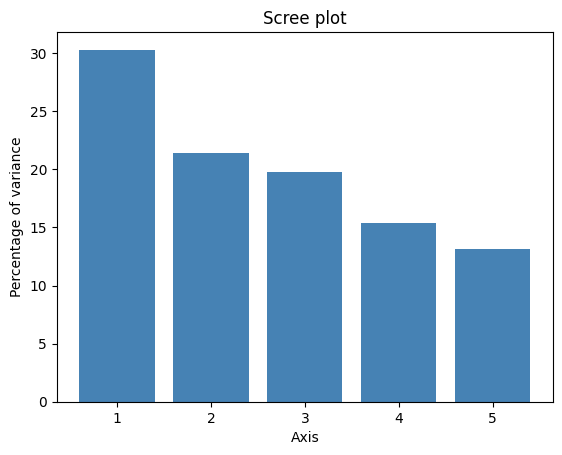

In [9]:
# Graphique des valeurs propres
my_ca.plot_eigenvalues(type="percentage")

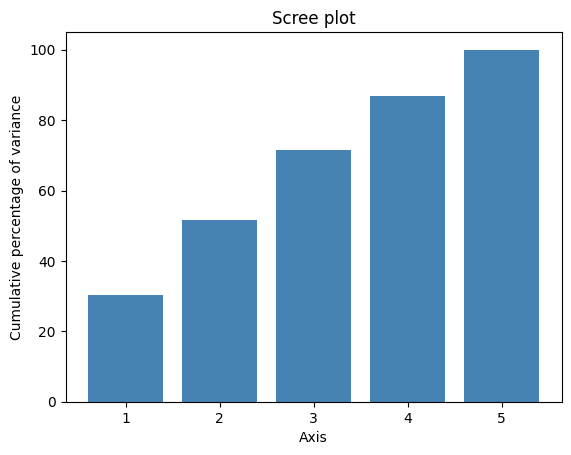

In [10]:
# Graphique cumulé des valeurs propres.  
my_ca.plot_eigenvalues(type="cumulative")

Premier axe factoriel


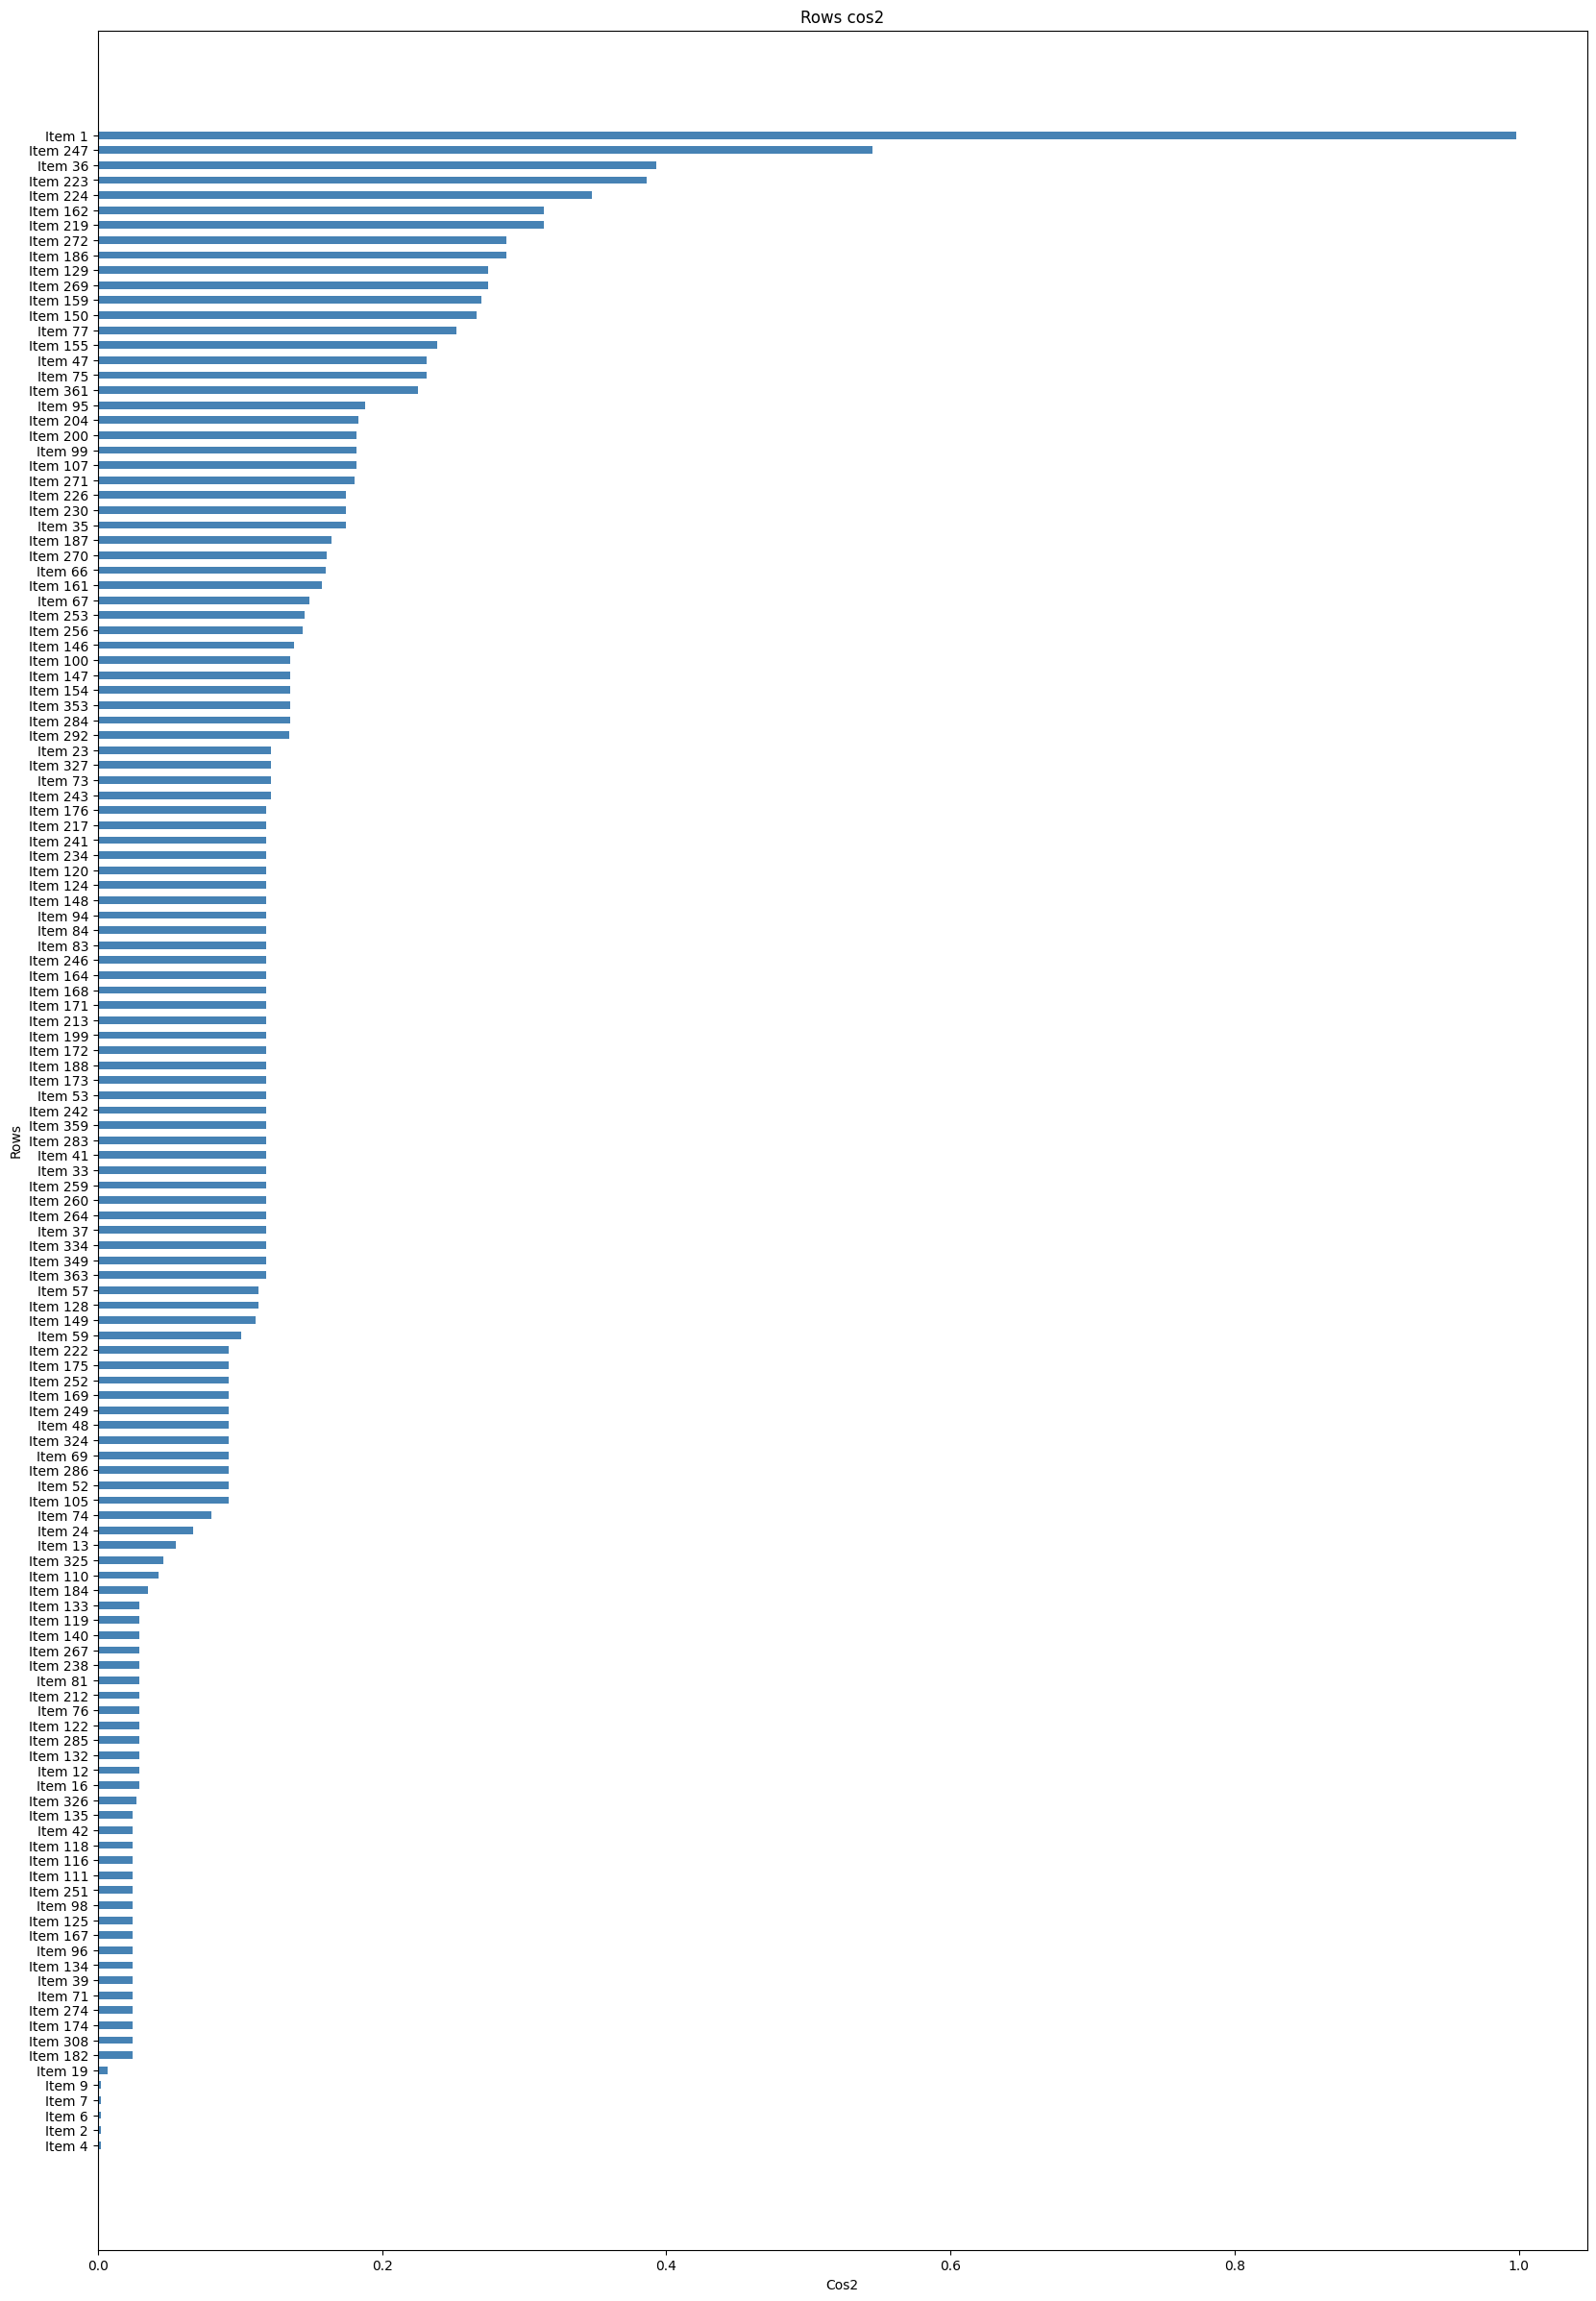

Second axe factoriel


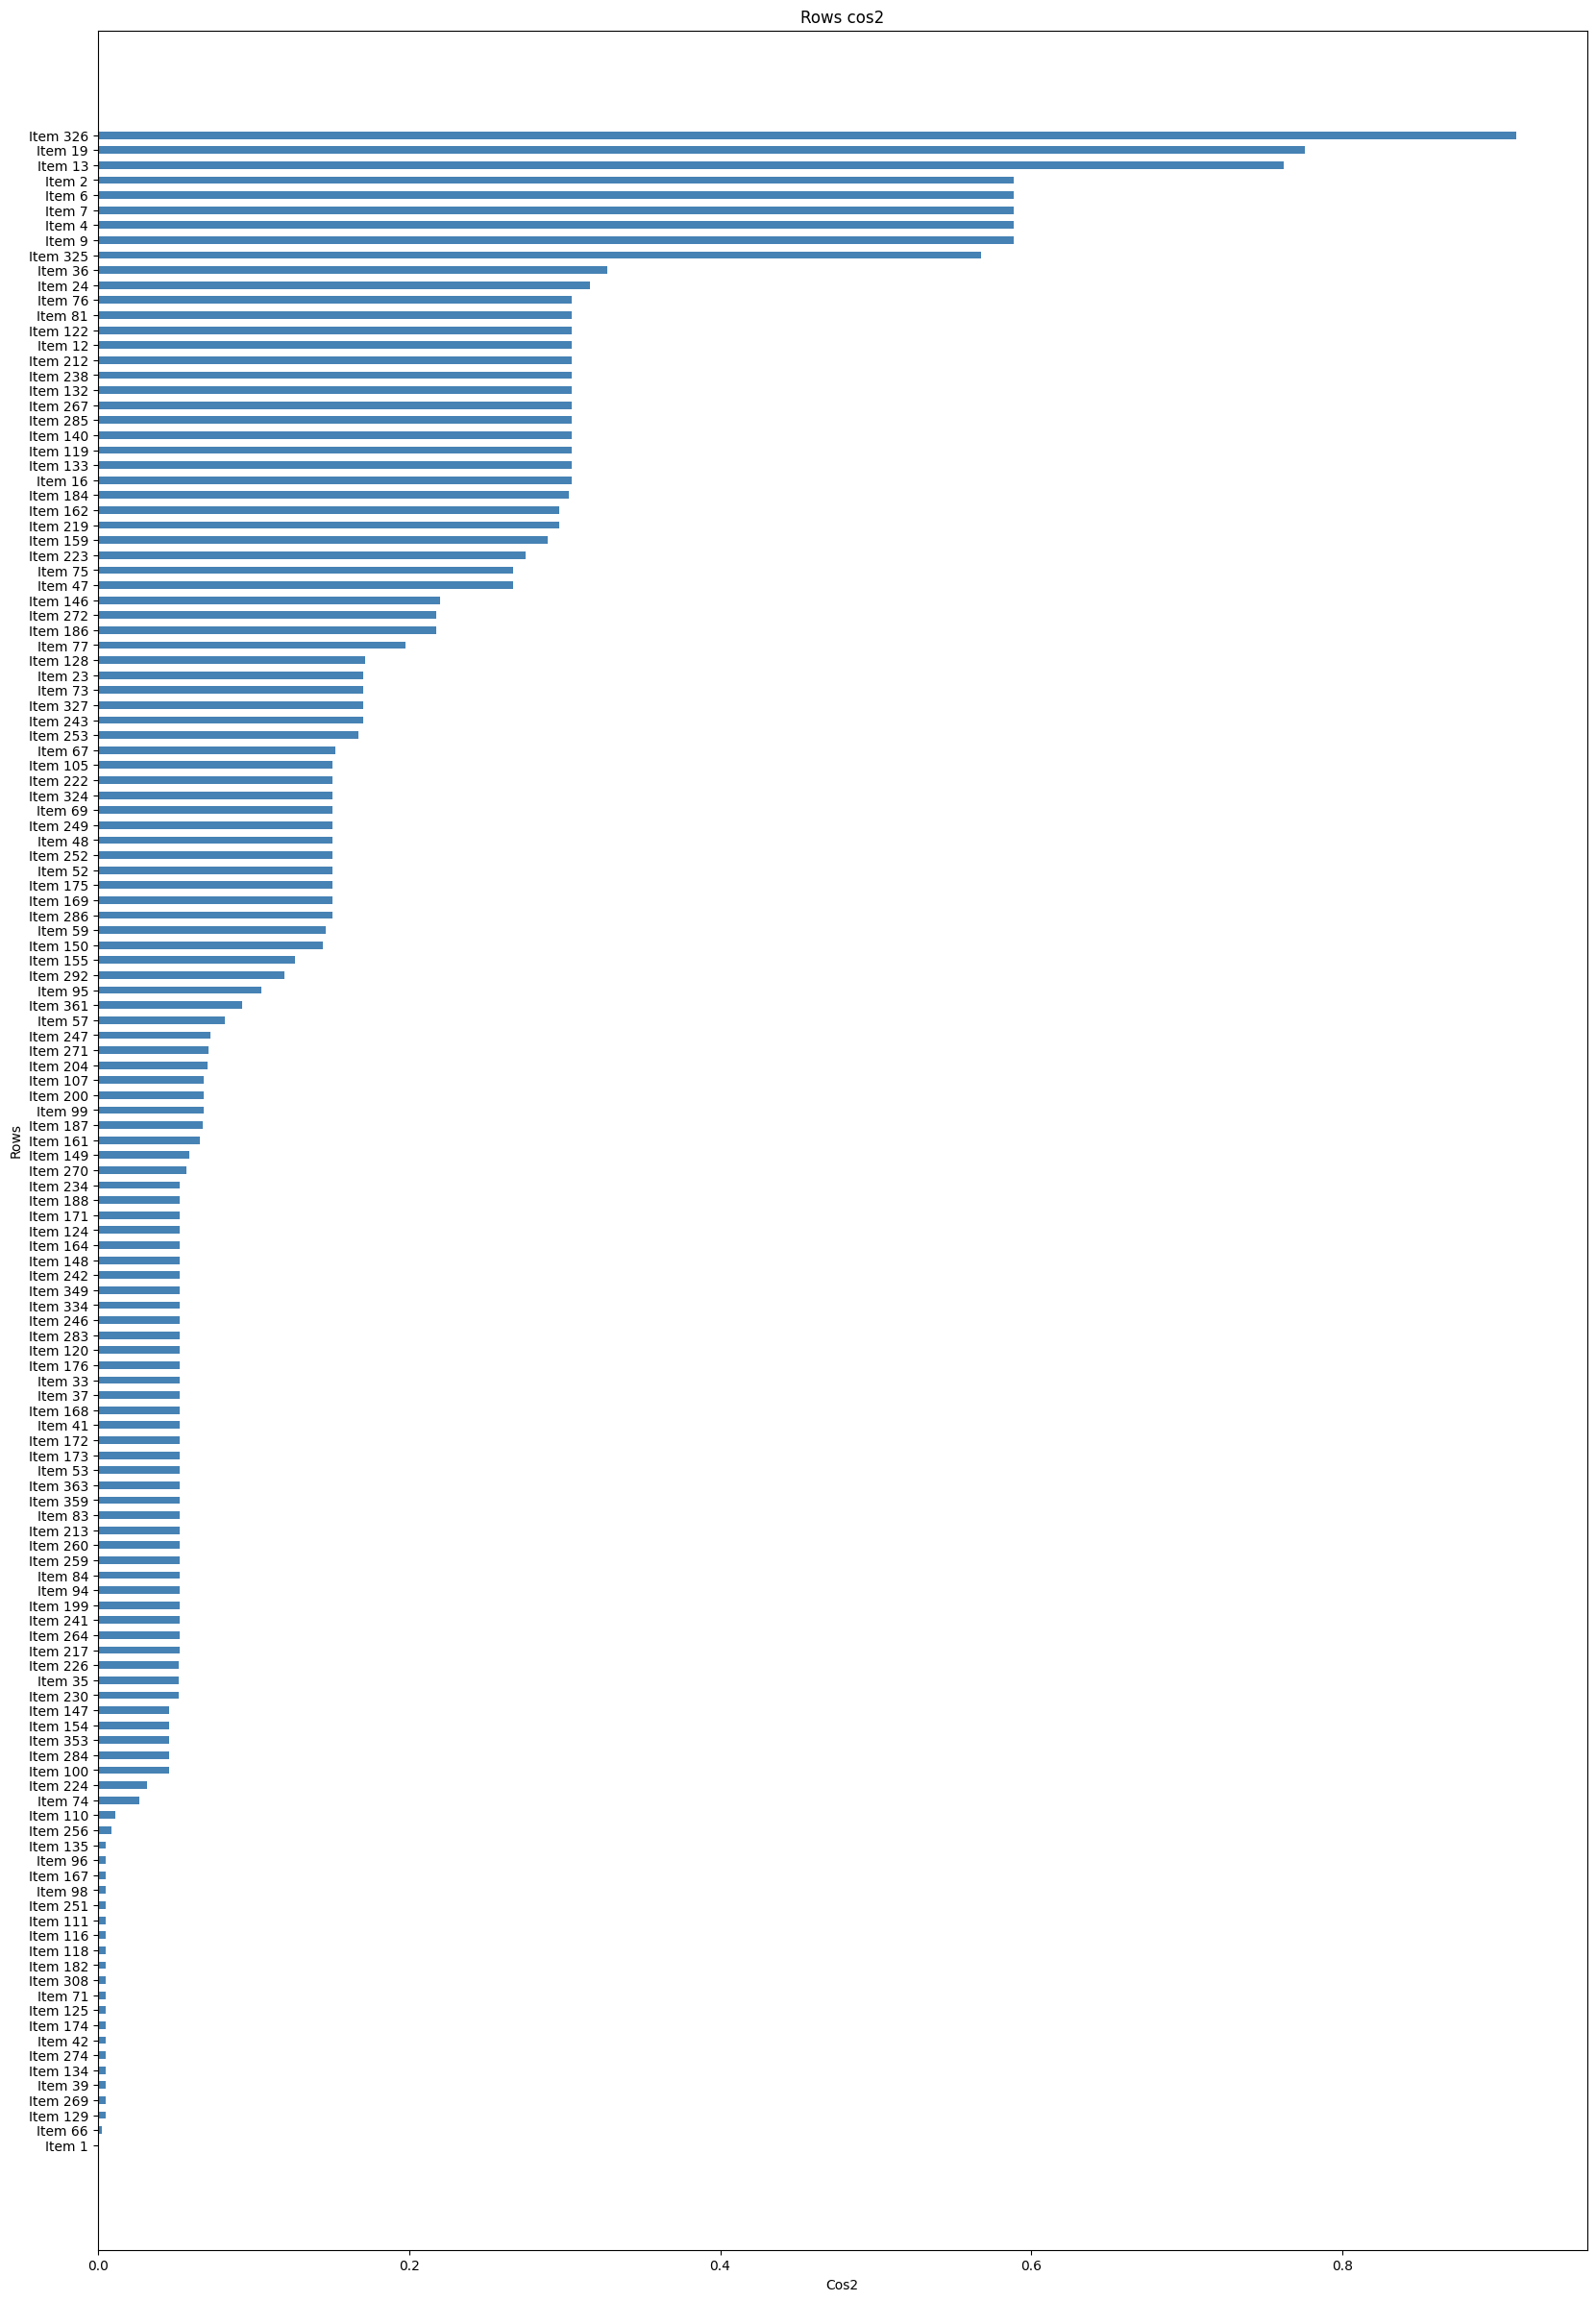

Premier axe factoriel


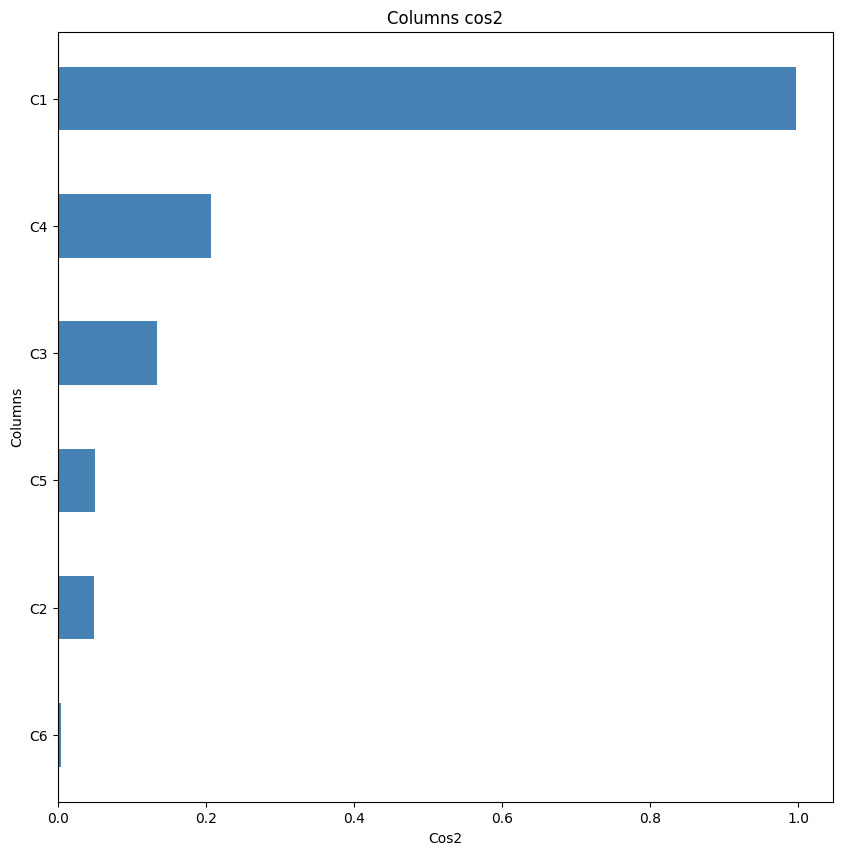

Second axe factoriel


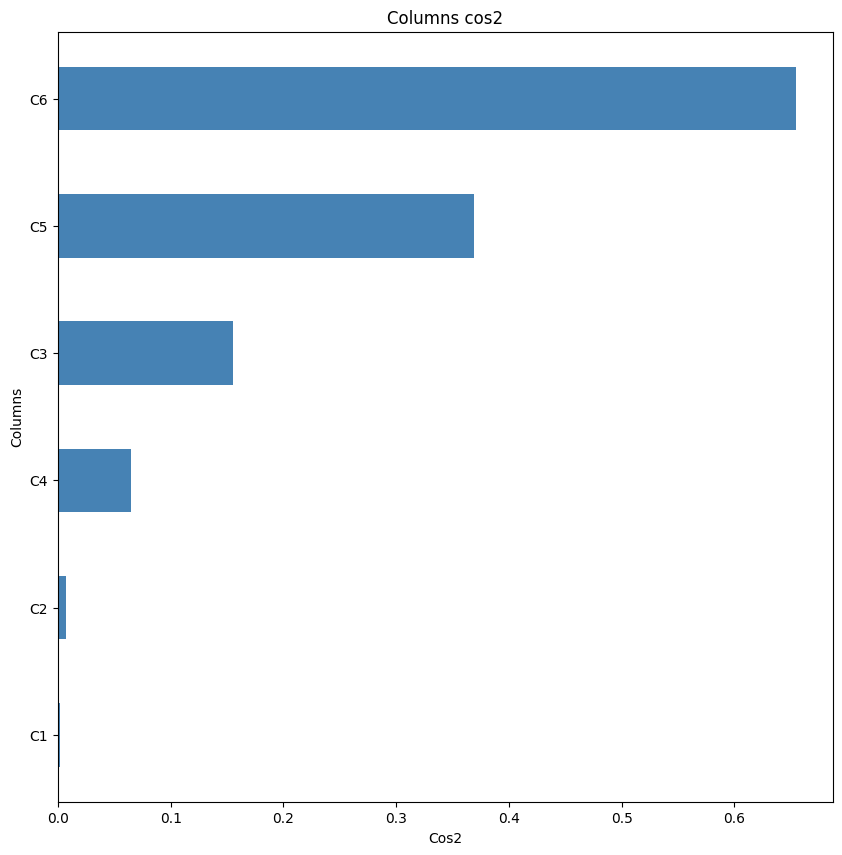

In [11]:
# Affichage des cos2 pour chaque variable. 

print("Premier axe factoriel")
my_ca.plot_row_cos2(num_axis=1, figsize=(20,30))
print("Second axe factoriel")
my_ca.plot_row_cos2(num_axis=2, figsize=(20,30))

print("Premier axe factoriel")
my_ca.plot_col_cos2(num_axis=1, figsize=(10,10))
print("Second axe factoriel")
my_ca.plot_col_cos2(num_axis=2, figsize=(10,10))

Premier axe


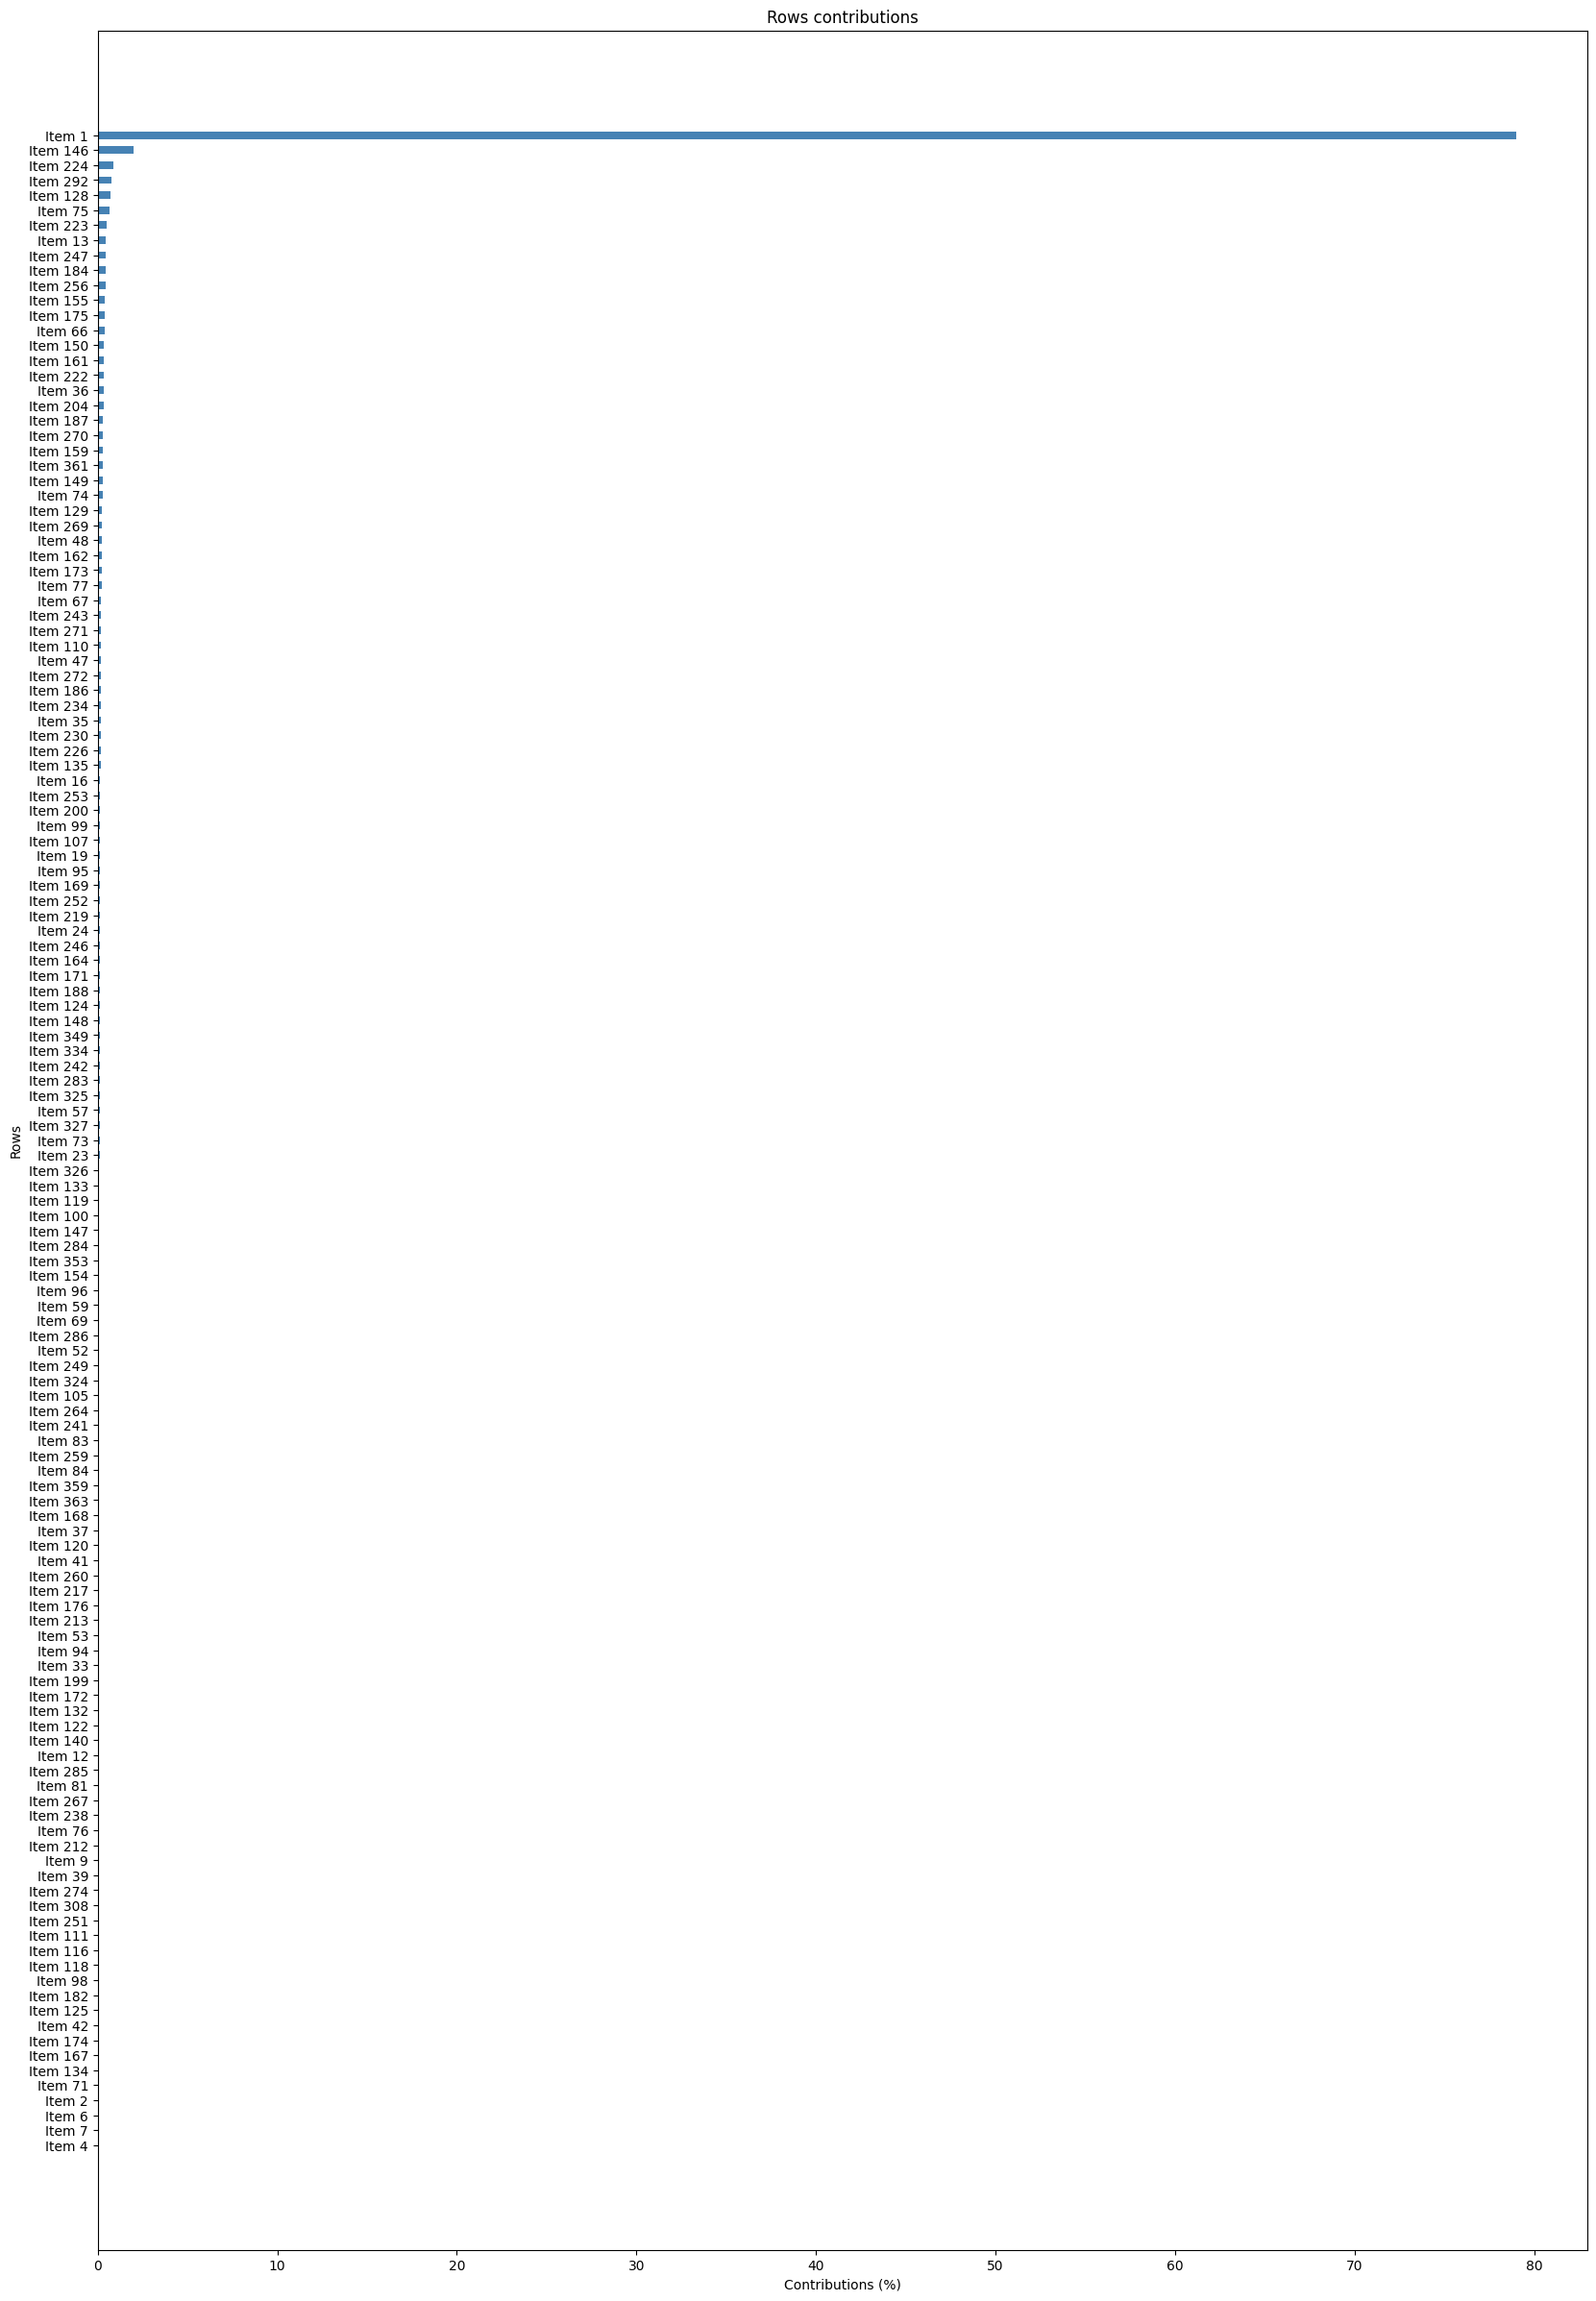

Second axe


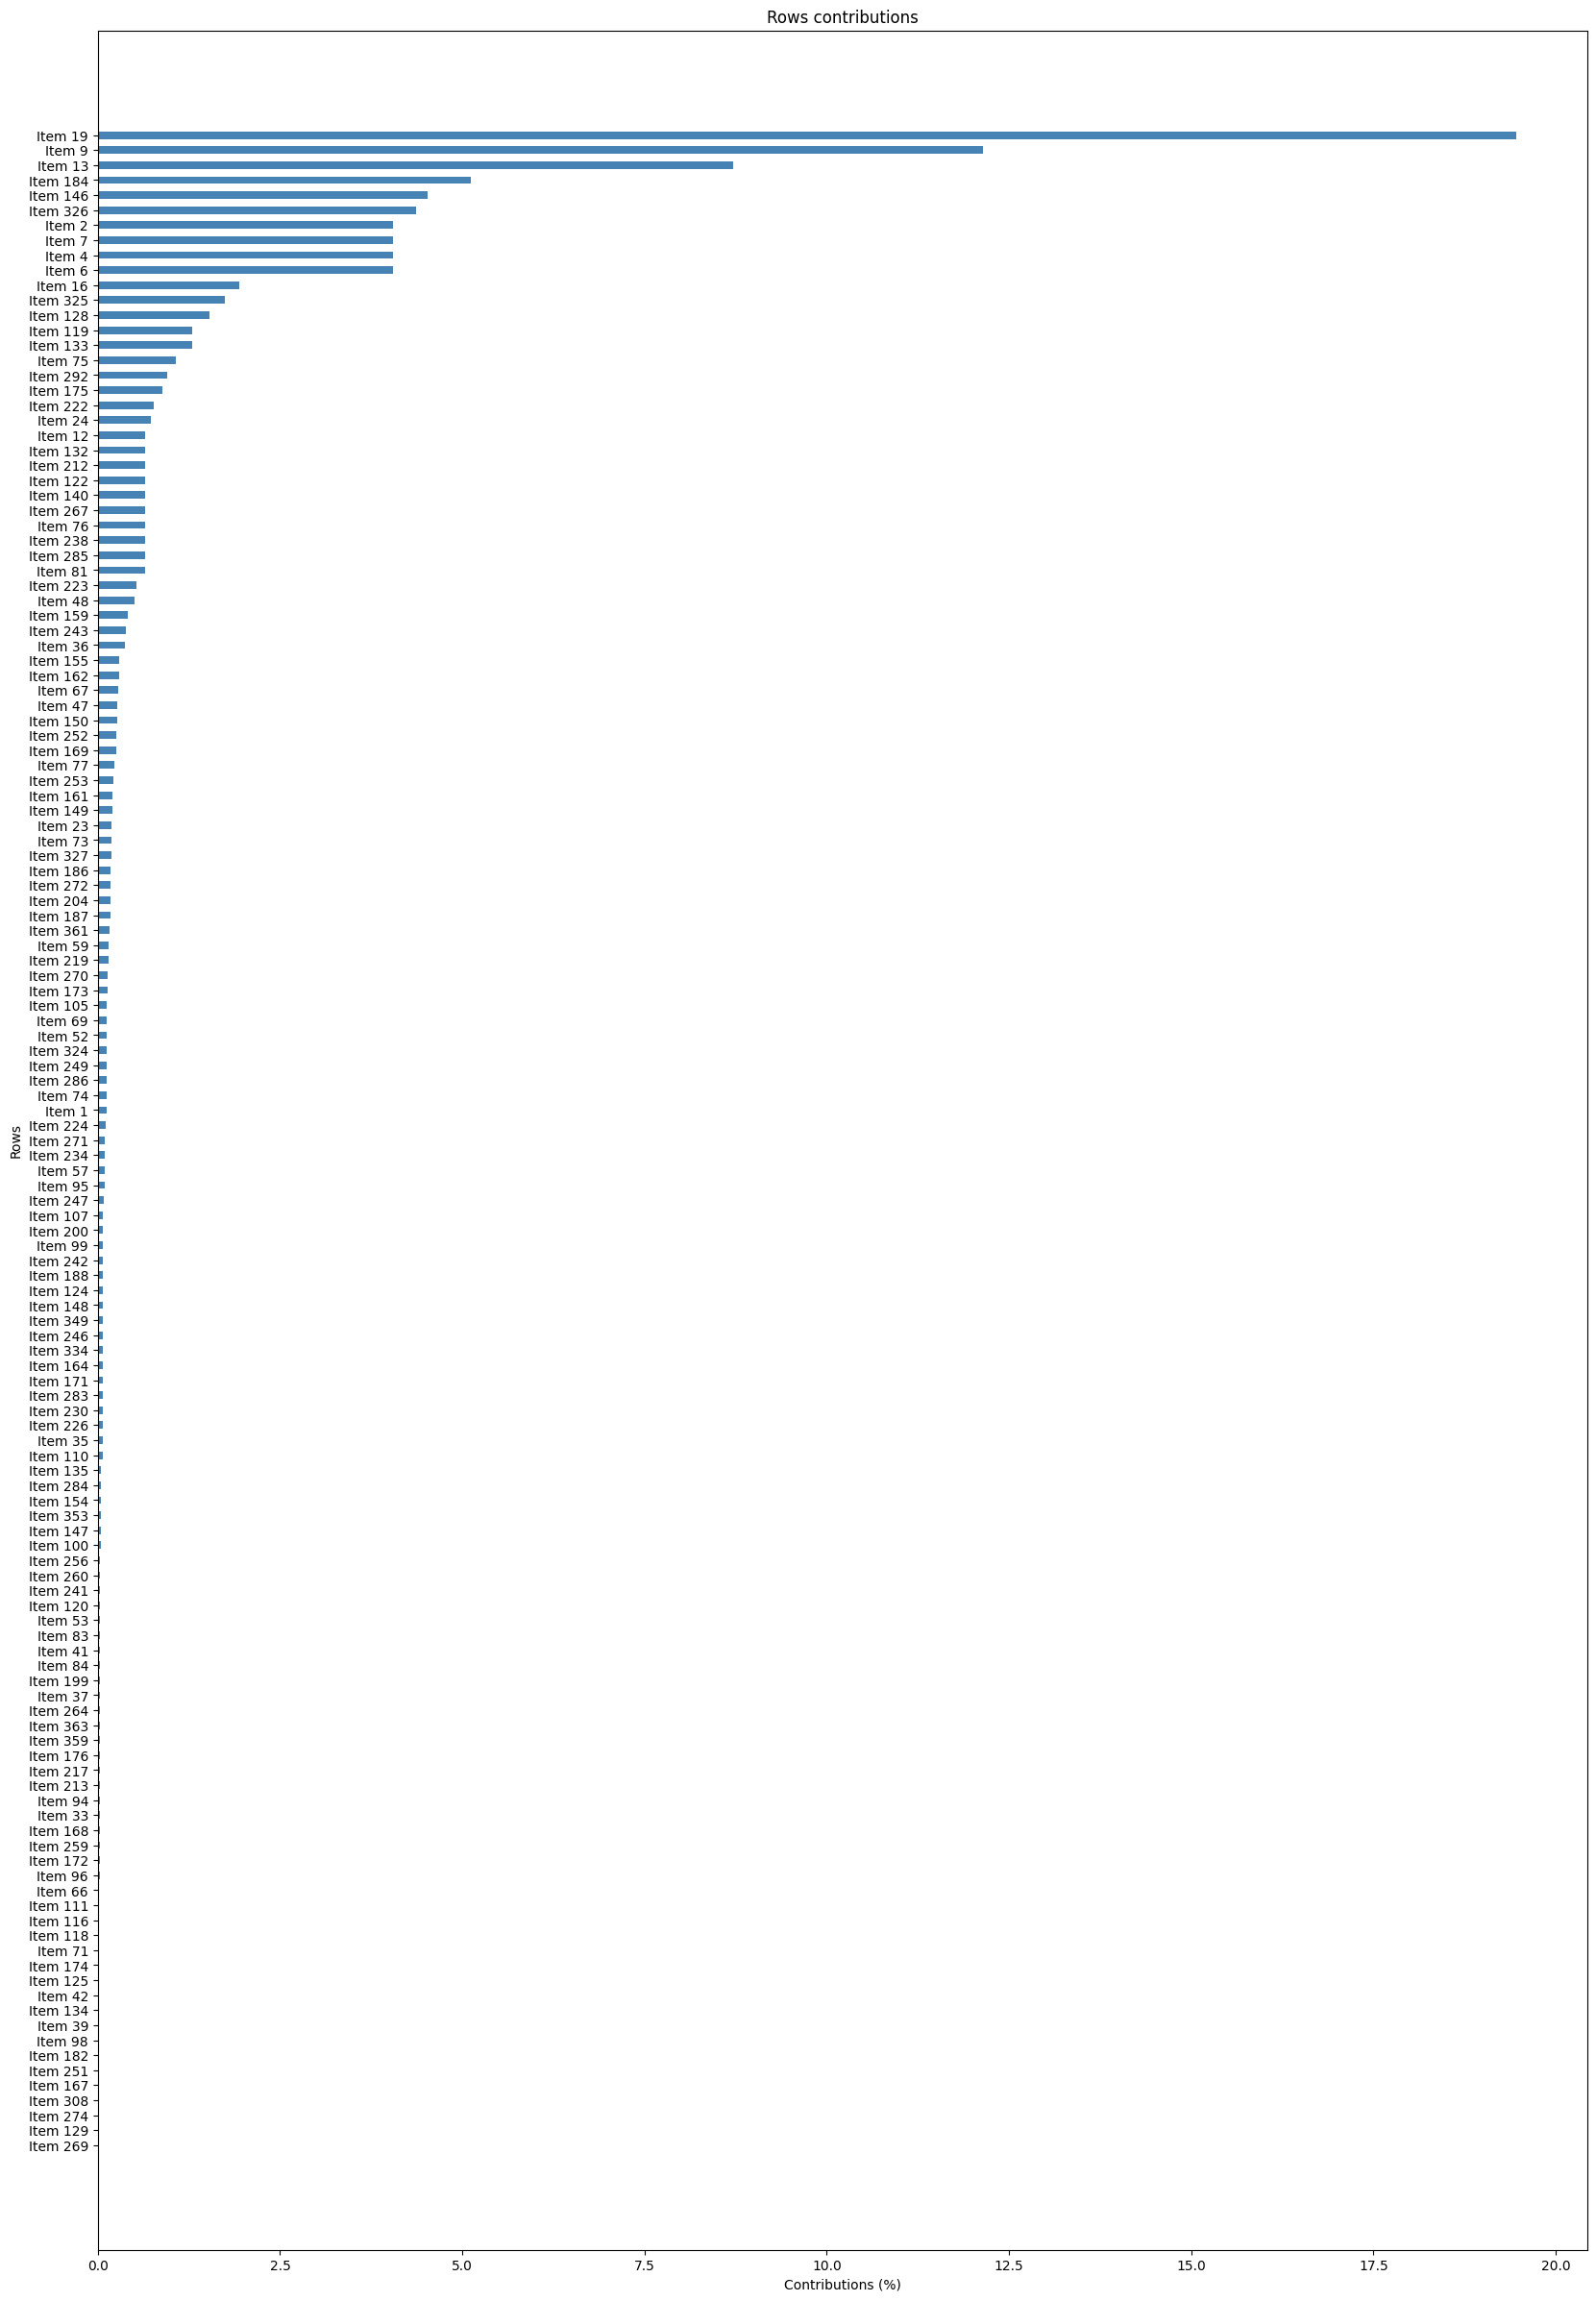

Premier axe


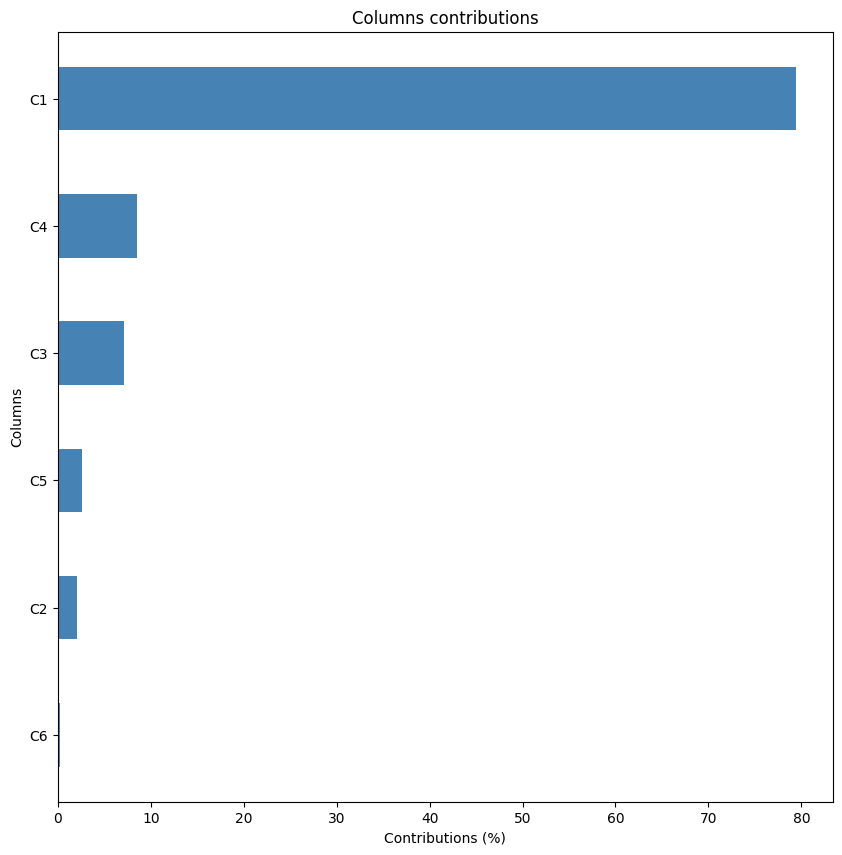

Second axe


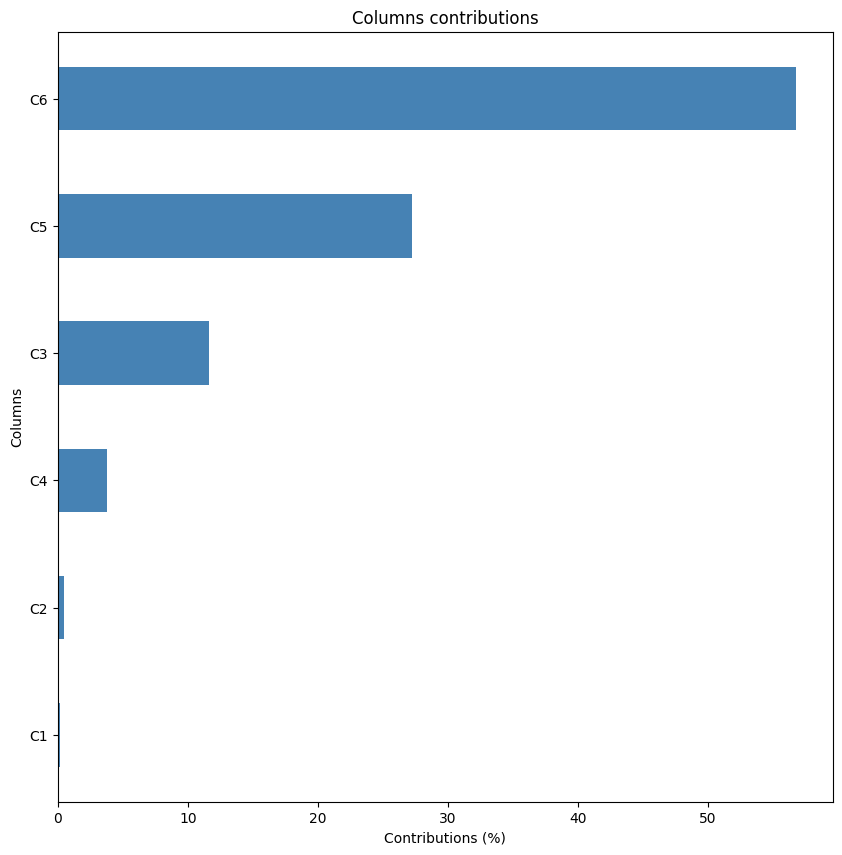

In [12]:
# Affichage des contributions pour chaque variable
print("Premier axe")
my_ca.plot_row_contrib(num_axis=1, figsize=(20,30))
print("Second axe")
my_ca.plot_row_contrib(num_axis=2, figsize=(20,30))

print("Premier axe")
my_ca.plot_col_contrib(num_axis=1, figsize=(10,10))
print("Second axe")
my_ca.plot_col_contrib(num_axis=2, figsize=(10,10))

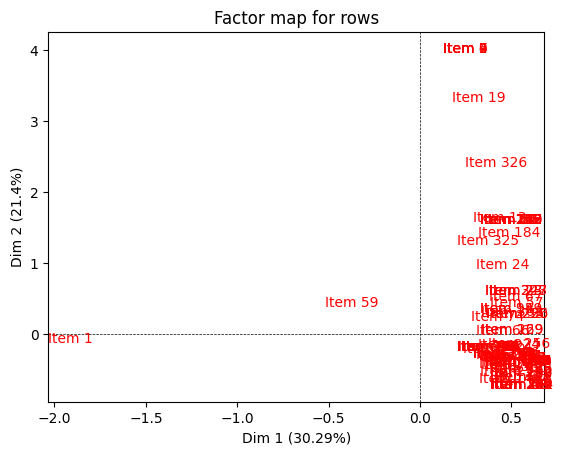

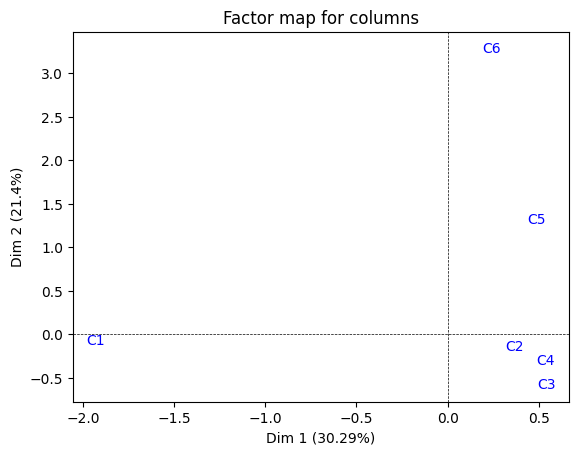

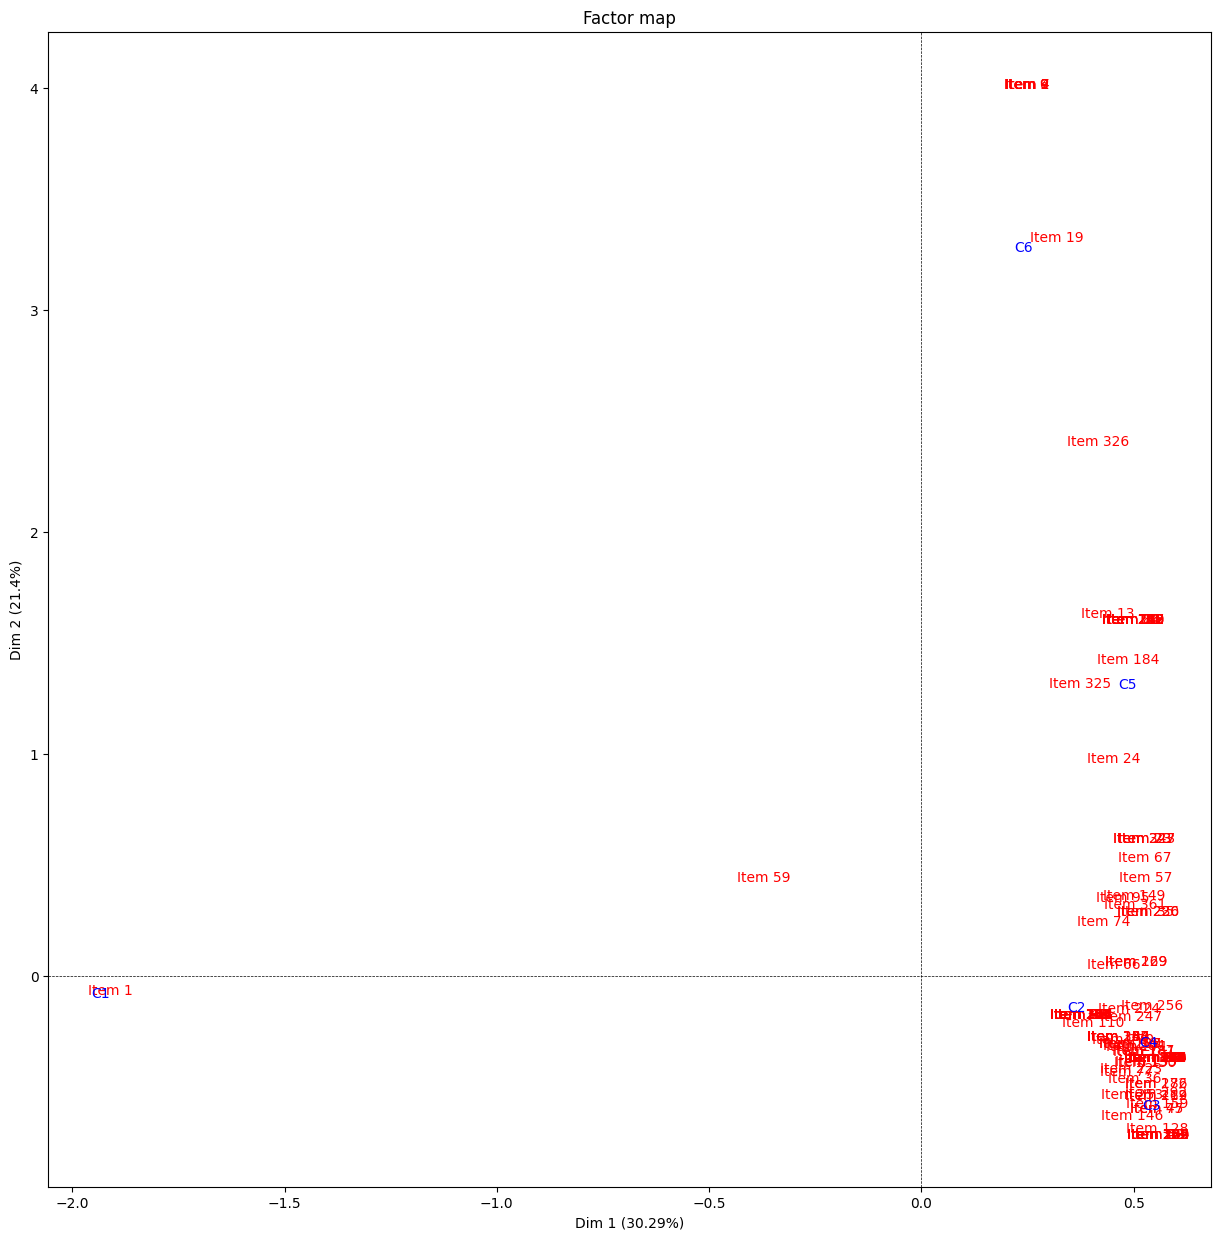

In [13]:
my_ca.mapping_row(num_x_axis=1,num_y_axis=2)
my_ca.mapping_col(num_x_axis=1,num_y_axis=2)
my_ca.mapping(1, 2, figsize=(15, 15))